# Temperature forecast using time series data

## Table of Contents <a class="anchor" id="0"></a>
* [Introduction](#1)
* [Prerequisites](#10)
* [Necessary Imports](#2)
* [Connect to your GIS](#3)
* [Obtain and Visualize England's Data for Analysis](#4) 
    * [Boundary](#5)
    * [Weather Stations](#6)
    * [Historic Temperature Data](#7) 
* [Convert to Timeseries Data](#8)
* [Model Building](#9)      
    * [LSTM](#11) 
        * [Temperature forecast by LSTM model](#12) 
    * [Support Vector Machine(SVR)](#13) 
        * [Temperature forecast by SVR model](#14)
* [Temperature Interpolation for England](#15)
    * [Result Visualization](#16)
* [Conclusion](#17)
* [Summary of methods used](#18)
* [Data resources](#19)

## Introduction <a class="anchor" id="1"></a>

Weather forecasting has been a significant area for application of advanced deep learning and machine learning methodologies over traditional methods to improve weather prediction. These new methods are appropriate for processing large chunks of data where massive quantity of historic weather datasets could be utilized for forecasting. This sample showcases two autoregressive methods: one using a deep learning and another using a machine learning framework to predict temperature of England.

Historic temperature data from various weather stations across England is collected from [here](https://rp5.ru/Weather_in_the_world). The data consists of daily temperature measurements ranging from February 2005 till September 2019 which are auto regressed to predict daily temperature for each of the identified stations for October 2019. The forecasted temperature obtained for the stations is then spatially interpolated using ArcGIS spatial interpolation tool to produce a temperature prediction surface for the entire country. Here is a schematic flow chart of the operation:

<img src="data:image/PNG; base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAKADhwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9mKK3PAOjW+uaxJFcp5iLCXA3Ec7lHb6muu/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAa8j/aA/az+AP7K8nlfEL4h+DvCtznH2W91cfahxnJhVjJj324oA0qK8Am/wCC5f7D0ErI3xw8KblODiO/PP18qm/8P0P2Hf8AouHhX/v1f/8AxqgD6Bor5+/4fofsO/8ARcPCv/fq/wD/AI1R/wAP0P2Hf+i4eFf+/V//APGqAPoGivn7/h+h+w7/ANFw8K/9+r//AONUf8P0P2Hf+i4eFf8Av1f/APxqgD6Bor5+/wCH6H7Dv/RcPCv/AH6v/wD41R/w/Q/Yd/6Lh4V/79X/AP8AGqAPoGivn7/h+h+w7/0XDwr/AN+r/wD+NUf8P0P2Hf8AouHhX/v1f/8AxqgD6Bor5+/4fofsO/8ARcPCv/fq/wD/AI1R/wAP0P2Hf+i4eFf+/V//APGqAPoGivn7/h+h+w7/ANFw8K/9+r//AONUf8P0P2Hf+i4eFf8Av1f/APxqgD6Bor5+/wCH6H7Dv/RcPCv/AH6v/wD41R/w/Q/Yd/6Lh4V/79X/AP8AGqAPoGivn7/h+h+w7/0XDwr/AN+r/wD+NUf8P0P2Hf8AouHhX/v1f/8AxqgD6Bor5+/4fofsO/8ARcPCv/fq/wD/AI1R/wAP0P2Hf+i4eFf+/V//APGqAPoGivn7/h+h+w7/ANFw8K/9+r//AONUf8P0P2Hf+i4eFf8Av1f/APxqgD6Bor5+/wCH6H7Dv/RcPCv/AH6v/wD41R/w/Q/Yd/6Lh4V/79X/AP8AGqAPoGivn7/h+h+w7/0XDwr/AN+r/wD+NUf8P0P2Hf8AouHhX/v1f/8AxqgD6Bor5+/4fofsO/8ARcPCv/fq/wD/AI1R/wAP0P2Hf+i4eFf+/V//APGqAPoGivn7/h+h+w7/ANFw8K/9+r//AONUf8P0P2Hf+i4eFf8Av1f/APxqgD6Bor5+/wCH6H7Dv/RcPCv/AH6v/wD41Wz4M/4LJfsYeP8AUktNM+Nvgt55HCKJ7i5tVyf9qVFUfUmgD2iiu18G23g74jeH4dW8PX2ma7pdx/qrzT78XVvL/uujFT+BrV/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8aP+Fe6T/wA+p/7+v/jQB5rRXpX/AAr3Sf8An1P/AH9f/Gj/AIV7pP8Az6n/AL+v/jQB5rRXpX/CvdJ/59T/AN/X/wAaP+Fe6T/z6n/v6/8AjQB5rRXpX/CvdJ/59T/39f8Axo/4V7pP/Pqf+/r/AONAHmtFelf8K90n/n1P/f1/8a8+1q3S01i7ijGEimdFGc4AYgUAbnwr/wCRhm/692/9CWu/rgPhX/yMM3/Xu3/oS139ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFBOBRXyn/wAFtv2xbz9hT/gmJ8VfiDpFybTxDbaYNM0aVfvRXt3IltFIvvGZfM/4BQB+c3/BZr/gvB8T/jL+0+/7Kf7HkV5qXi+a6/szV/Eek/PdG5GfNt7V/uxJFg+ZOSMFWAICktB+yh/wZ22HjGyj8UftKfE/xH4n8W6iTcXenaRc4gid+WV7iQGSRs55XYPau/8A+DQX/gn1pnwx/ZEv/wBoTXrRb3xv8VLy4h069uE3S2emwTNE2xjyDNOkrMf4gkf4/sbQB+ZFp/waP/sbQWyJJ4X8WTuow0jeJbwF/fAfFSf8Qkv7Gf8A0KPir/wp73/45X6Z0UAfmZ/xCS/sZ/8AQo+Kv/Cnvf8A45R/xCS/sZ/9Cj4q/wDCnvf/AI5X6Z0UAfmZ/wAQkv7Gf/Qo+Kv/AAp73/45R/xCS/sZ/wDQo+Kv/Cnvf/jlfpnRQB+Zn/EJL+xn/wBCj4q/8Ke9/wDjlH/EJL+xn/0KPir/AMKe9/8AjlfpnRQB+Zn/ABCS/sZ/9Cj4q/8ACnvf/jlH/EJL+xn/ANCj4q/8Ke9/+OV+mdFAH5mf8Qkv7Gf/AEKPir/wp73/AOOUf8Qkv7Gf/Qo+Kv8Awp73/wCOV+mdFAH5mf8AEJL+xn/0KPir/wAKe9/+OUf8Qkv7Gf8A0KPir/wp73/45X6Z0UAfmZ/xCS/sZ/8AQo+Kv/Cnvf8A45R/xCS/sZ/9Cj4q/wDCnvf/AI5X6Z0UAfmZ/wAQkv7Gf/Qo+Kv/AAp73/45R/xCS/sZ/wDQo+Kv/Cnvf/jlfpnRQB+Zn/EJL+xn/wBCj4q/8Ke9/wDjlH/EJL+xn/0KPir/AMKe9/8AjlfpnRQB+Zn/ABCS/sZ/9Cj4q/8ACnvf/jlH/EJL+xn/ANCj4q/8Ke9/+OV+mdFAH5mf8Qkv7Gf/AEKPir/wp73/AOOUf8Qkv7Gf/Qo+Kv8Awp73/wCOV+mdFAH5mf8AEJL+xn/0KPir/wAKe9/+OUf8Qkv7Gf8A0KPir/wp73/45X6Z0UAfmZ/xCS/sZ/8AQo+Kv/Cnvf8A45R/xCS/sZ/9Cj4q/wDCnvf/AI5X6Z0UAfmZ/wAQkv7Gf/Qo+Kv/AAp73/45R/xCS/sZ/wDQo+Kv/Cnvf/jlfpnRQB+Zn/EJL+xn/wBCj4q/8Ke9/wDjlc38Rv8Agz3/AGT/ABZo80GiL458K3ToVS5ttakuWjbs22fep/EV+q9FAH83H7Qn7Af7W/8AwbVeJh8Vvg5481Hx/wDB+2uVfV7Qo7RQwjjbfWuSpTBx50eNp5wuM1+1P/BJ7/gqH4M/4KsfsvWfjvwzs07WrJls/EehtLvm0a7xnae5jcAsjdxkdVOPo7xX4V07xz4Zv9G1iyttS0rVIHtbu1uIxJFcROCrIyngggkYr+en9gbSrn/giV/wc3638D7C6ng+GHxamFjY27k7GgvIzPp2B3aG5zbBuu3f6mgD+iaiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8jDff9fEn/oRr1ivJ/Ef/ACMN9/18Sf8AoRoA2fhX/wAjDN/17t/6Etd/XAfCv/kYZv8Ar3b/ANCWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr8r/+Dwm/ltP+CQ0scbFUuvGGlxSj+8o858f99Kp/Cv1Qr8qf+DxL/lEan/Y6aZ/6BPQB9S/8EKtKh0X/AIJBfs+wwLsRvCFtMQP70haRj+LMTX1jXyv/AMEQP+URv7Pf/Yl2P/oFfVFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV/Pn/wXplOif8AB0p+yXdWv7qcxeDpSwH3m/4SO9XJ/AAfhX9Blfz4/wDBf/8A5WhP2S/+vbwd/wCpJfUAf0HUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXk/iP/AJGG+/6+JP8A0I16xXk/iP8A5GG+/wCviT/0I0AbPwr/AORhm/692/8AQlrv64D4V/8AIwzf9e7f+hLXf0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFfn/wD8FAf+C4Nr/wAErf2x9H8H/GPwhen4XeOrJbzw74u0dTJJaSJtS5trmFjhyjlX3IRhJV+ViDQB+gFFed/s1/tafDf9sHwBD4n+GnjLQ/GGjSqGMthcBngJ6LLGcPG3s6g16JQAV+VP/B4l/wAojU/7HTTP/QJ6/Vavyp/4PEv+URqf9jppn/oE9AH1d/wRA/5RG/s9/wDYl2P/AKBX1RXyv/wRA/5RG/s9/wDYl2P/AKBX1RQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfz4/8ABf8A/wCVoT9kv/r28Hf+pJfV/QdX8+P/AAX/AP8AlaE/ZL/69vB3/qSX1AH9B1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5P4j/5GG+/6+JP/AEI16xXk/iP/AJGG+/6+JP8A0I0AbPwr/wCRhm/692/9CWu/rgPhX/yMM3/Xu3/oS139ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFcX8dP2i/An7MngefxJ8QfFuheENEgUk3Wp3aQK+BkqgJ3O3+yoJ9q/OX9of/g7x/ZW+EPn2/heTxd8Rb2PIjOm6f8AZrOXH/TWYhh/37oA/U6ivwW1H/g9fl8SXLR+Fv2c9UuW3bUEuum5Y9MZEcA/yRVWP/g7h+P2pDzbL9lS7mtm+4wtdRfP4hcUAfvnRX4Hf8RaP7RP/Rp97/4A6n/8TR/xFo/tE/8ARp97/wCAOp//ABNAH740V+B3/EWj+0T/ANGn3v8A4A6n/wDE0f8AEWj+0T/0afe/+AOp/wDxNAH740V+B3/EWj+0T/0afe/+AOp//E0f8RaP7RP/AEafe/8AgDqf/wATQB++NFfgd/xFo/tE/wDRp97/AOAOp/8AxNH/ABFo/tE/9Gn3v/gDqf8A8TQB++NFfgd/xFo/tE/9Gn3v/gDqf/xNH/EWj+0T/wBGn3v/AIA6n/8AE0AfvjXw9/wcFf8ABOJP+CkH/BOvxNoml2a3HjrwaG8R+F2C/vJLmFG32wP/AE2iLx46bih/hr87/wDiLR/aJ/6NPvf/AAB1P/4mkP8AwdoftEMMf8Mn3n/gDqf/AMTQB+HP7O/7U/xI/Y++IkPiP4d+Lde8Ha7ZPgy2Ny8JbB5SRejA4wVYc9K/bj/gm7/weUun2Dw1+0n4a80fLF/wlnh+EK/puuLXhT7mMrgD7pNfit+2x8Qf+FtftVeN/FTeCH+HM3ibU31Wfw6Y5Ixpss+JJAqyAMqszM4BHAcAcYryygD+7f8AZr/a0+G37YXgCHxP8M/GWh+MNGlVWMthcBngJ6LLGcPG3s6g1+d3/B4l/wAojU/7HTTP/QJ6/mb/AGcf2rfiL+yN4/tvE/w48Ya54R1m2bIn0+6aISDjKuoOGU4wQRgivvn9uL/guV8ZP+CmP/BKu78GfEr4evcxaH4i0+5PjzTrVraxnlQSL5E648rzn3kjyyOFOV70Af0M/wDBED/lEb+z3/2Jdj/6BX1RXyv/AMEQP+URv7Pf/Yl2P/oFfVFABRRRQAUUUUAFFFFABRRRQAV+QX/BHf8A4Kg/Gn9qX/gup+058HfG3ipdW+H/AMPf+Em/sLThZQxfY/sniC2s4PnVQzbYJGXknOcnmv19r8Af+DfL/lZz/bR/7nP/ANSuzoA/f6or69i02yluJ3WKGBDJI7HCooGSSfpUtc/8WfBP/Cy/hb4j8O+e1r/b2mXOn+co5i82Jk3D6bs0Afiv4Y/bI/az/wCDg39pPx7pP7PXxBHwK+APgS7OnL4mtoWN9qjknY2VZZGeRQX2KyqiFc5Y89b8S/8Agjv+3l+yb4YvPGnwi/bC8U/EDXNHhN1/wjWtLJ5WqlMnYPMkeJmxkBXXBJ6jrXyz/wAEU/8Agprb/wDBvp40+I37PX7SvgvxL4bj1HxCdSt9ZtLQzIsgjWBnAO3zbd1jjZZEJxk5BJwP2u/Z3/4LAfs0ftTWts3g74yeCrqe6+VLS9vhp9yW6bRHPsYn/dz7UAeEf8EEv+Cymof8FTPhJ4r8P+NdIh8N/GH4aSJa69axxmKK8VzIi3CRnmNg8bJInRWxjhsDxD/hkP8A4Kx/9HDfC7/wBj/+R6+w/wBjr/gj78Nf2Mf21PiZ8dvBureIn1v4sreNqmnS3EbaahuryO8Z4kVQch0O0kniRvWvragD+cez/bj/AOCjV7/wVdl/ZDX42+Ff+FhRZzfnS7f+zuNJ/tT73k7v9T8v3fve3NfYVv8Asi/8FYFuEMn7QvwuKBhuAsY+R3/5d6+d9A/5Xnb3/tp/6gor9/qAPxs/4OkP+CpHx3/4J8/Fj4L6N8GfFDaEPGVjqTXtumnw3bXcsUtqsQUOrHP71hgdc19j/wDBBP8A4KAaj/wUe/4Jt+EvHPiO+hv/ABrp1xc6H4lkjQJuvIHyrlQABvgkgfAGMucV8F/8HOFnHqH/AAVe/YOglVXim8S+W6sMhgdU0wEGrX/BAG8k/wCCdn/BYz9qD9kbUGa10PU7tvE3hKF/lj8uMiWNIwerNZXMe4j/AJ9D6UAftq7iNCx4AGTX8yn7Xn/Byh+0dqf/AAUj8T6V8OPG66T8KP8AhNToGiwLplvNHPb28sVvIyyshLeZ/revAmX2r9y/+Czf7Xw/Yb/4JofFj4gQ3H2bWLXRn07Rm/i/tC7Itrcgd9skqufZDX82/wC1D+yB/wAMpfsN/sA319beT4g+KGt+IfGOoMy/OY7ifQ0tQSeSPs0cTj0MretAH9dNFFFABRRRQAUUUUAFFFFABRRRQAV/Pj/wX/8A+VoT9kv/AK9vB3/qSX1f0HV/Nv8A8HUHxV1D4Ff8F8fgV410nSzrmqeEfCnh3WbPTgrMb+a31zUpUhwvzHeyBeOeeKAP6SKK/A3/AIi0/wBoj/o1C8/8AdT/APiaP+ItP9oj/o1C8/8AAHU//iaAP3yor8Df+ItP9oj/AKNQvP8AwB1P/wCJo/4i0/2iP+jULz/wB1P/AOJoA/fKivwN/wCItP8AaI/6NQvP/AHU/wD4mj/iLT/aI/6NQvP/AAB1P/4mgD98qK/A3/iLT/aI/wCjULz/AMAdT/8AiaP+ItP9oj/o1C8/8AdT/wDiaAP3yor8Df8AiLT/AGiP+jULz/wB1P8A+Jo/4i0/2iP+jULz/wAAdT/+JoA/fKivwN/4i0/2iP8Ao1C8/wDAHU//AImj/iLT/aI/6NQvP/AHU/8A4mgD98qK/A3/AIi0/wBoj/o1C8/8AdT/APiaP+ItP9oj/o1C8/8AAHU//iaAP3yor8Df+ItP9oj/AKNQvP8AwB1P/wCJo/4i0/2iP+jULz/wB1P/AOJoA/fKivwN/wCItP8AaI/6NQvP/AHU/wD4mkP/AAd3fHPRJBJq/wCyxdwW3r5GoQk8juyEf/rFAH750V+Dvh//AIPZbTSdTgg8V/s96zZRswEr2+uiN0HchJIee3Ga+sf2dP8Ag7E/ZK+OV3a2er654j+H19cMI2/t3TT9mRjwP3sJfj3KigD9MaK5/wCGfxX8MfGjwlb694R8QaN4m0W7GYb7TLyO6gfjONyEjPPI6jvXQUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeT+I/wDkYb7/AK+JP/QjXrFeT+I/+Rhvv+viT/0I0AbPwr/5GGb/AK92/wDQlrv64D4V/wDIwzf9e7f+hLXf0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX5b/APBcH/g4z0D/AIJ7ald/Cn4W2cfjb433arAYlQzWfh95QNnmKvMs53KViHqN390+9f8ABdj/AIKfL/wSx/YV1Xxhpgtrjxz4inGh+FrabBX7XIrEzsvdIY1ZyOhIRT96viD/AINmf+COFw2nN+1r8dLc+JPiF8QmbVfDUWqj7RJZwTnzDqMm7OZ585Q/wxnPV8AA8S/Za/4Nz/2iv+Cqur2XxY/a9+KHifQ7LWiLqLQ5JDNq5hY7lUq+YrVcdECkgEDCkYr9Tv2b/wDg3/8A2TP2YrW0OjfCDw5q+oWiqF1DXYzqdyXHVw027aSfTAr7MooA53SPhF4U0C0igsvDOgWkMChI0i0+JQgHQDC1px+F9NhTamnWKj0FugH8qv0UAUv+Ec0//nws/wDvwv8AhR/wjmn/APPhZ/8Afhf8Ku0UAUv+Ec0//nws/wDvwv8AhR/wjmn/APPhZ/8Afhf8Ku0UAUv+Ec0//nws/wDvwv8AhR/wjmn/APPhZ/8Afhf8Ku0UAUv+Ec0//nws/wDvwv8AhR/wjmn/APPhZ/8Afhf8Ku0UAUv+Ec0//nws/wDvwv8AhR/wjmn/APPhZ/8Afhf8Ku0UAUv+Ec0//nws/wDvwv8AhXm/7YHx78G/sY/syeNfih4pt7KLRfBmly6hKvlIrXDqMRwpkY3ySFEUd2cV6rX41f8ABypZfGv/AIKN/Efwp+yl8CPC2q65Z2MkXiDxxqq5g0yzkI/0S1nuGwo2qWnaMbmO6AheKAP5z/2k/j5rv7Uvx88XfETxNKsuueMdUn1S62DCRGRiRGg7Ii4RR2VQK9B/Yl/4JofGv/goX4uTS/hb4G1XXIBII7jVZEMGmWXqZLhvkGOu1ctjopr94P8Agm7/AMGevw4+C32DxH8fdY/4WR4hj2y/2FZ7oNGtn67XP358H+9hSOqV+w3w3+F/hz4O+EbTQPCuh6V4d0WwjEVvZafbJbwQqOgCqAKAPx5/4Ju/8Gevw4+C32DxH8fdY/4WP4hj2y/2FZ7oNGtn67XP358H+9hSOqV2H/B2T8L/AA58Hf8Agi/YaB4V0PSvDui2HjDSorey0+2S3ghUJPgBVAFfrpX5U/8AB4l/yiNT/sdNM/8AQJ6APq7/AIIgf8ojf2e/+xLsf/QK+qK+V/8AgiB/yiN/Z7/7Eux/9Ar6ooAKKKKACiiigAooooAKKKKACvwB/wCDfL/lZz/bR/7nP/1K7Ov3+r+Yf9in9vzRP+CV/wDwX2/a0+Ivjnwl421jQ/EGueLdBtRo2mmaQyy+I47hX+YqNmy3fkHqVoA/p4rj/j78d/DH7Mnwd8QePfGeof2V4X8MWrXupXflNL9niBALbVBY9ewr8zf+IvL4F/8ARMvjX/4I0/8AjlfQX7Nv7bfw2/4L7fskfGbwVo/h7xn4a0S60x/DepHXbIW0p+3W8yrJCAxyU2k57HFAHsHgPUfgD/wVq/Z0sfFsGh+GPif4C1p5oLeXVdJEiSmKRo5BtlXcMMpHTtXyT+1F/wAGoP7LHxztLu78KaPrXwu8QyKTBeaBfOIIX/h/0dy0YGeu0A4718Xf8Ewv+CiHib/g3G8XeJv2af2ovC3iG38CtrM2peGPFmm2hntW8zarlMkB4JAiyYVt8bF8qd1fbPxn/wCDr39kr4deBZtQ8O+Ite8d6yUItNI0zS5YpZ5TjajPKFVQSeSN2MHg0AfLH/BvN+018V/2NP8AgqH8SP2Ifid4quPGOj6BDdPoFxPI0ptJ7dI518osSUimtXLmMnCsBjnOf3Vr8TP+CAX7H/xV/ag/4KX/ABR/bf8Ai34QvPAtr4rS5i8L6VewmKeUz7Yd4VgHEcVtF5e5gDIZNw46/tnQB+AOgf8AK87e/wDbT/1BRX7/AFfgdoHhrUR/wfC3uofYL37B8/8ApPkN5P8AyI4X7+MdeOvWv3xoA/ET/g5j/wCUtf7BP/Y0L/6ddMqf/g4n06f/AIJ+f8FU/wBlv9sHSonh06PUk8MeKHiH+siRmbbju0tnNeJn0hX0qT/g5U0C+1X/AIKw/sHzWtld3MNt4mVppIoWdYh/ammHLEDA6Hr6V9uf8HBn7Hjftqf8Epvif4fsrRrvxD4dsh4o0VY03Sm6sv3xRB/ekiEsX/bWgD4t/wCDmzx7P+2t+0v+y1+yP4SvxOfiPr0HiTWJLd8+VZsxgt5jjgoI2vJT/wBcVNec/wDB3n4UsPAnxW/Yg0PSrZLPS9GutXsbO3T7sEMUuiJGg9gqgfhXJ/8ABrT8NPHX7a3/AAUJ1n47/E23v5h8F/Aum+D9Bku4HTy5fsws4dhfkkW0N0z4/juM8Zr0n/g8N8O6hrvx/wD2OWsrG8vFg1TWzKYIWkEebjRsbsA46Hr6GgD9z6KKKACiiigAooooAKKKKACiiigAr+fD/g4DjWb/AIOgf2TFZQyta+DwQRkEf8JJfV/QfX8+P/Bf/wD5WhP2S/8Ar28Hf+pJfUAf0A/8I5p//PhZ/wDfhf8ACj/hHNP/AOfCz/78L/hV2igCl/wjmn/8+Fn/AN+F/wAKP+Ec0/8A58LP/vwv+FXaKAKX/COaf/z4Wf8A34X/AAo/4RzT/wDnws/+/C/4VdooApf8I5p//PhZ/wDfhf8ACj/hHNP/AOfCz/78L/hV2igCl/wjmn/8+Fn/AN+F/wAKP+Ec0/8A58LP/vwv+FXaKAKX/COaf/z4Wf8A34X/AAo/4RzT/wDnws/+/C/4VdooApf8I5p//PhZ/wDfhf8ACj/hHNP/AOfCz/78L/hV2igCl/wjmn/8+Fn/AN+F/wAKP+Ec0/8A58LP/vwv+FXaKAKX/COaf/z4Wf8A34X/AApk3hTS7lcSabYSD0a3Q/0rQooA5PxX8B/BPjnSJrDWPCPhvUrK5G2WG402F1kHoQVr4+/ag/4NvP2SP2ndIvEk+GGmeDdUuQSmpeGf+JbLE5/j2phHPsykH0r7tooA/nP/AGiP+CJ/7V//AAQw8QN8W/2YfiL4g8deEtHl+0X2kwRn7bHbqc4uLQZjuo8Z3bFB5GFPUfpP/wAESf8Agvr4M/4Ku6FJ4X1ayi8G/F/RbXz9Q0Uyf6PqSLw89oW+YgHlozllBzlhkj9CHQSIVYBlIwQRwRX4Gf8ABxz/AMEu9Z/YP+L+m/tsfs9SyeFb7R9VgufFFnp67Es7l3CpfIgGPLkYhJk+6d4bHL0AfvpRXzx/wSv/AG8NM/4KQ/sNeCPipYi3g1DVrX7LrdnEeLDUofkuIsdQu751B52SJ619D0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5P4j/AORhvv8Ar4k/9CNesV5P4j/5GG+/6+JP/QjQBs/Cv/kYZv8Ar3b/ANCWu/rgPhX/AMjDN/17t/6Etd/QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUU2V/LiZv7oJoA/nk/4LPDUf8Agrf/AMHG/wAMf2YheP8A8IZ4De2tL6OFjhRJbrqWpS57P9mRIx6GMepr+hHw/oFl4U0Gy0vTbaGy0/TbeO1tbeFQscESKFRFA4ACgAD2r8Af+DcexP7WX/Bff9p74zaufOn0g6xLYqQT5D3epCGLB9Eto5Ix7H2r+gqgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKigsobaWV44o43nbdIyqAZDjGSe/FS0UAFFFFABX5U/wDB4l/yiNT/ALHTTP8A0Cev1Wr8qf8Ag8S/5RGp/wBjppn/AKBPQB9Xf8EQP+URv7Pf/Yl2P/oFfVFfK/8AwRA/5RG/s9/9iXY/+gV9UUAFFFFABRRRQAUUUUAFFFFABWVceBtEu53ll0fS5JJGLu72kZZyeSSccmtWigDH/wCFfaD/ANATSP8AwDj/AMKu6VoNjoSOLKztbMSEFxBCsYbHTOAM1booA5/4hfCjwz8WtI+weJ/D+j+ILL/njqFolwn5MDXAfD7/AIJ//BD4U60upeG/hP4B0W/QgrPaaLBG4I6chfc16/RQA2KJYI1RFVEUYVVGAB7U6iigCmPD9gNV+3/YbT7d/wA/Hkr5vTb97GenHXpVyiigCpfaHZapcRTXNna3EsBzE8sSu0Z6/KSMjoOnpVmSMSoVYBlYYIIyCKdRQBU0rQrLQ0ZbKztbNZDlhBCsYY++AKNS0Gx1p42vLK0u2hyYzNCrmPOM4yOOg/KrdFABRRRQAUUUUAFFFFABRRRQAUUUUAFfz4/8F/8A/laE/ZL/AOvbwd/6kl9X9B1fz4/8F/8A/laE/ZL/AOvbwd/6kl9QB/QdRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVx/7QHwT0H9pH4I+KvAXiezW/8AD/i7S7jSr6Bv44pUKHB7MM5B7EA12FFAH4Cf8GlvxL1n9lv9vH9on9lrxBfTGLSZ7q8s4JjhftmnXf2OdkHrLE6McdVhB7V+/dfz4Xtmn7O3/B6pB/Zf+g2Pi67V5olOFmN7oJWTI77p8v8A73Nf0H0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5P4j/wCRhvv+viT/ANCNesV5P4j/AORhvv8Ar4k/9CNAGz8K/wDkYZv+vdv/AEJa7+uA+Ff/ACMM3/Xu3/oS139ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVTXr1dN0O8uJM7IIHkbHXAUmrdZHj7/AJEbWf8Arxm/9ANAH4L/APBkhbP4p+IH7TniWbHnsNDRz3zcSajIf1ir9/6/Aj/gxn/5Bv7Tv/XXwv8Ay1ev33oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/Kn/g8S/wCURqf9jppn/oE9fqtX5z/8HU3wavvi9/wRp8fzafB9puPCN9p/iBkAyRDFcokzD/dikdj7KaAPcP8AgiB/yiN/Z7/7Eux/9Ar6or4B/wCDY/8AaF034+f8Ec/hhDa3CSal4HW68M6nCHBaCWGd3jB7jMEkLD6n0r7+oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv58f+C//APytCfsl/wDXt4O/9SS+r+g6v56f269aj/bs/wCDvn4Q+HPDmzUYvhTeaJaX8iNuiA0ySbV7oEjj5PNeMg/xqVoA/oWooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP59P+CkUx0L/g8D+Bk1v8kl1c+G1kP97fJLE3/jvFf0F1/Pj/wU6/5W+PgJ/wBffhj/ANKJa/oOoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAryfxH/yMN9/18Sf+hGvWK8n8R/8jDff9fEn/oRoA2fhX/yMM3/Xu3/oS139cB8K/wDkYZv+vdv/AEJa7+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArI8ff8iNrP8A14zf+gGtesjx9/yI2s/9eM3/AKAaAPwf/wCDGf8A5Bv7Tv8A118L/wAtXr996/Aj/gxn/wCQb+07/wBdfC/8tXr996ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsP4l/DrR/i98O9c8K+IbGHUtC8R2E2m6haTDKXMEyGORCPQqxFblFAH81HwX+KHxG/4NO/8AgpL4h8KeLNN1bxR+z38RZxJDdQJxd2ys3kXMTH5RdwKxWSPI3jPQFGH9An7K37a/ws/bX+H9r4l+GPjXQ/FenXMYkZLW4H2m26ZWWE4kjYZ/iUe2RzVn9qv9kP4dfts/CS98D/E3wvp3inw7e4YwXKfPA46SROPmjcdmUgivxz+O/wDwZxX3g/xjNrX7P/xy1rwhEZTLFp+rRu7QZ/hW4hdDgdBuVjjqaAP3Wor+fI/8G2H7d0R2p+0xb7F4X/ie3447Un/ENn+3j/0cxb/+D6/oA/oOor+fH/iGz/bx/wCjmLf/AMH1/R/xDZ/t4/8ARzFv/wCD6/oA/oOor+fH/iGz/bx/6OYt/wDwfX9H/ENn+3j/ANHMW/8A4Pr+gD+g6iv58f8AiGz/AG8f+jmLf/wfX9H/ABDZ/t4/9HMW/wD4Pr+gD+g6iv58f+IbP9vH/o5i3/8AB9f0f8Q2f7eP/RzFv/4Pr+gD+g6iv58f+IbP9vH/AKOYt/8AwfX9H/ENn+3j/wBHMW//AIPr+gD+g6iv58f+IbP9vH/o5i3/APB9f0f8Q2f7eP8A0cxb/wDg+v6AP6DqK/nx/wCIbP8Abx/6OYt//B9f0f8AENn+3j/0cxb/APg+v6AP6DqK/nx/4hs/28f+jmLf/wAH1/R/xDZ/t4/9HMW//g+v6AP6DqK/nx/4hs/28f8Ao5i3/wDB9f0f8Q2f7eP/AEcxb/8Ag+v6AP6DqK/nx/4hs/28f+jmLf8A8H1/R/xDZ/t4/wDRzFv/AOD6/oA/oOor+fH/AIhs/wBvH/o5i3/8H1/R/wAQ2f7eP/RzFv8A+D6/oA/oOor+fH/iGz/bx/6OYt//AAfX9H/ENn+3j/0cxb/+D6/oA/oOor+fH/iGz/bx/wCjmLf/AMH1/R/xDZ/t4/8ARzFv/wCD6/oA/oOor+fH/iGz/bx/6OYt/wDwfX9H/ENn+3j/ANHMW/8A4Pr+gD+g6mXFzHZ27yyukUUalnd22qgHJJJ6Cv59P+IbP9vH/o5i3/8AB9f0q/8ABrR+1/8AFIjTfG37TUA0dyBJ/pl9fcZ5/dl0B/OgD7O/4LQ/8HIHw1/YW+HereEPhdrel+P/AIx6hE9paQ6dKt1ZaDIwwJp5FyjupPESkksMNjofOf8Ag13/AOCTviz4E6f4m/aY+Mttdj4nfFOORtNt9RU/bbC0nk86e4mDcrNcPtODyqDnlyB6t/wTZ/4NfPgV+wl4tsvGXiN734rePbCZbm21DW0X7HYyjnfFbj5d2cEM+5gRwRX6XKoRQAAABgADpQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXGaV+0N4J1n4w6n8PofE2lDxtpEMdzcaJLMIr3yZF3LKkbYMkeM/Om5QQQSCCK7OgD+fH/AIKdf8rfHwE/6+/DH/pRLX9B1fz4/wDBTr/lb4+An/X34Y/9KJa/oOoAKK474n/tA+C/gxqeiWPifxLpWj6j4lvY9P0mxmmH2vU7iRgiRwwjLuckZKggdSQOa7GgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8jDff9fEn/oRr1ivJ/Ef/Iw33/XxJ/6EaANn4V/8jDN/17t/6Etd/XAfCv8A5GGb/r3b/wBCWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPH3/Ijaz/ANeM3/oBrXrI8ff8iNrP/XjN/wCgGgD8H/8Agxn/AOQb+07/ANdfC/8ALV6/fevwI/4MZ/8AkG/tO/8AXXwv/LV6/fegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPx+/4Oz/2GNa8XfADw9+0l8O5tQ0rx38HpBHqd3psjQ3MmkyOD5m5cH/R5iHHokkpr4O/4Ju/8HevxZ/Z6+weHPjdp/8AwtXwvFti/tQOINctU6ZMmNs+OSfMG49N4r+ln4h+AtK+KngPWfDWu2UOo6Lr9lNp99azLujuIJUKOjD0KsRX8Tn/AAVC/Ya1X/gnR+3D46+FeorM9not6Z9GupB/x/6bLl7aXPc7CFbH8aOO1AH3V+2P/wAFQPg9+0F/wcN/BT9oPRNfuIfhto39g3eqXd3aPHPpotppWmSSMbiXUY4QsDkYJr3b/gpH/wAHkus+I/t/hr9m7w3/AGHaHdF/wlWvQrLduOm6C25SP2Llzg9FNfg/XT/Bf4R678ffi14b8E+GbKTUfEHirUoNL0+2QcyzTOEQewyeT2GTQB+53/Bqt+zT46/bm/al8WftafGTW9c8YS+FGfSPDl3rFw9wZ9SlT9/Mm44AhgfYMcZn45Sv6B68b/4J+/sc6F+wL+x74F+FGgLG1t4U01Ibq5Vdpv7xvnuLg+8krO3sCB2r2SgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8jDff9fEn/oRr1ivJ/Ef/ACMN9/18Sf8AoRoA2fhX/wAjDN/17t/6Etd/XAfCv/kYZv8Ar3b/ANCWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPH3/Ijaz/14zf+gGtesjx9/wAiNrP/AF4zf+gGgD8H/wDgxn/5Bv7Tv/XXwv8Ay1ev33r8CP8Agxn/AOQb+07/ANdfC/8ALV6/fegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvxo/4PBf+Cbv/AAvj9lrSfjz4csPN8TfCv/Rtb8pMvdaPK/LHHJ8iUh/ZJJTX7L1j/ELwFpXxT8B6z4a12yh1HRdfsptPvrWZd0dxBKhR0YehViKAP4G6/cH/AIM3/wDgm7/wsj4z+Iv2jfElhv0jwPv0Xwv5qfLNqUqfv51/64wuFB/vT+q1+cv7bf8AwS98Zfsy/wDBTzVv2ddKsLrU9U1HX4bLwsSvOqWl3IPscmen3WCuegZH9K/rx/4J+/sdaF+wL+x74F+FGgLG1t4U01Ibq5Vdpv7tvnuLg+8krO3sCB2oA9kooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvJ/Ef/ACMN9/18Sf8AoRr1ivJ/Ef8AyMN9/wBfEn/oRoA2fhX/AMjDN/17t/6Etd/XAfCv/kYZv+vdv/Qlrv6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsjx9/yI2s/9eM3/AKAa16yPH3/Ijaz/ANeM3/oBoA/B/wD4MZ/+Qb+07/118L/y1ev33r8CP+DGf/kG/tO/9dfC/wDLV6/fegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvlb/gob/wWW+A3/BNHQZj8QPF1vceJRHut/DOklbrVbg4yMxg4iB/vSFRjOM9K+KP+C8f/AAcH6z+zt8RH/Z1/Zys38TfGXVitjf6lZRfazoUsvC21vGoPmXZByeojyOC33OF/4JZ/8GrVjrX2f4sftd3uo+NvHutzf2lJ4ZmvWltrZnO/N7LndPLk5ZQ3l8kHf1oA838a/wDB0x+09+2rrMuifsvfs+3UUcrmJNRksZtbuID0DM4VbaP1/eKQOOaiK/8ABaH45KzXX2jwnFKPlIfSNPwPb7Plh+PNfvT8PPhd4b+Enhm00bwvoOk+H9KsIlgt7TT7VLeKGNeiqqgAAVvUAfz5f8Mrf8Fjv+ig3/8A4UkP/wATR/wyt/wWO/6KDf8A/hSQ/wDxNf0G0UAfz5f8Mrf8Fjv+ig3/AP4UkP8A8TR/wyt/wWO/6KDf/wDhSQ//ABNf0G0UAfz5f8Mrf8Fjv+ig3/8A4UkP/wATR/wyt/wWO/6KDf8A/hSQ/wDxNf0G0UAfz5f8Mrf8Fjv+ig3/AP4UkP8A8TR/wyt/wWO/6KDf/wDhSQ//ABNf0G0UAfz5f8Mrf8Fjv+ig3/8A4UkP/wATR/wyt/wWO/6KDf8A/hSQ/wDxNf0G0UAfzU+MP+CS/wDwVC8f/tDeG/ivrF/Z6h8Q/CNs9ppGuza3btd2UTbwVVtuf+Wj49N7Y616T/wyt/wWO/6KDf8A/hSQ/wDxNf0G0UAfz5f8Mrf8Fjv+ig3/AP4UkP8A8TR/wyt/wWO/6KDf/wDhSQ//ABNf0G0UAfz5f8Mrf8Fjv+ig3/8A4UkP/wATR/wyt/wWO/6KDf8A/hSQ/wDxNf0G0UAfz5f8Mrf8Fjv+ig3/AP4UkP8A8TR/wyt/wWO/6KDf/wDhSQ//ABNf0G0UAfz5f8Mrf8Fjv+ig3/8A4UkP/wATR/wyt/wWO/6KDf8A/hSQ/wDxNf0G0UAfz5f8Mrf8Fjv+ig3/AP4UkP8A8TUsXgX/AILPfB8Cex1S68TsBu8tr7TL78MXGBX9BFFAH8+Wnf8ABxJ+3b/wT91X7P8AtKfAZ9e0iNs3GoPo7aaVHol1bBrXP1U1+jH/AATd/wCDir9nr/goqLXSLfWx8PfHU+F/4R7xFOkRnc9re44jl7AD5XJPCmvurWtAsfEdi9tqFna31vICGiuIlkRgeuQQRX5Vf8FTf+DVz4TftWaXqvi/4NRQ/Cn4nANdW8dlmLR9SnHO2WFf9UWOf3kWCCckNjFAH6wUV+B3/BJX/guh8Uv+Cfn7QVl+yt+2VZajpos7hNM0fxNqhPn6YCdkImlPE9oxACzA/IOpIXC/vfDMtxEroyujgMrKchgehBoAdRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5P4j/AORhvv8Ar4k/9CNesV5P4j/5GG+/6+JP/QjQBs/Cv/kYZv8Ar3b/ANCWu/rgPhX/AMjDN/17t/6Etd/QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVkePv8AkRtZ/wCvGb/0A1r1kePv+RG1n/rxm/8AQDQB+D//AAYz/wDIN/ad/wCuvhf+Wr1++9fgR/wYz/8AIN/ad/66+F/5avX770AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXwt/wAHBX/BUP8A4dh/sH6lq+hXkMXxH8ayHQ/CkZwzQzMuZrvaeqwx5boRvaIH71fdNfzsf8FMbD/h8N/wc9+BvgdJLPqHgL4bSW+malBG58nyoIzqGpN/ss4xbk+sSj0oA+mf+DYD/gjovwn+H1t+1H8Vo5da+KPxIhfUNEGoqZJdHs5yWN0xbk3FwDv39RG4Axuav2OqDS9Mt9E0y3s7OCK2tLSJYYIYlCpEigBVUDgAAAAe1T0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHwP/wAF7v8Agjbof/BVH9mee50mC20/4teDIJbvwzqe0KbrA3NYzN1McmBg/wADbW9Qfnn/AINSP+Co2t/tF/B3xB+z78S765b4ifCNdum/byRd3OlowhaF93zF7aXCHPO2RB/Aa/X6v51f+CrPh+H/AII4f8HI/wALvjfoCNo3gv4mXMGr6yIfkifzZTaasgA4O6N0mP8AtzZoA/oqopsUqzRq6MGRgGVlOQQe4p1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXk/iP8A5GG+/wCviT/0I16xXk/iP/kYb7/r4k/9CNAGz8K/+Rhm/wCvdv8A0Ja7+uA+Ff8AyMM3/Xu3/oS139ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWR4+/wCRG1n/AK8Zv/QDWvWR4+/5EbWf+vGb/wBANAH4P/8ABjP/AMg39p3/AK6+F/5avX771+BH/BjP/wAg39p3/rr4X/lq9fvvQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMnk8qB2/uqTX8/X/BsJZR/Gr/AILgftYfEydPtTY1mSCZxu8pr7W1kBB7HZEw+hIr+gHUv+QdP/1zb+Rr8Dv+DMsZ/aO/aoPfzNP5/wC3q+oA/fiiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/Ev/g9p+HkV3+yT8GvGHkIZ9G8Yy6UJtvzItzZyylc+hNov5Cv20r8h/8Ag9DGf+CXHg//ALKNY/8ApBqFAH6O/sB+NT8SP2FPgv4gZzK+t+BdEvnYnJLSWEDtk+uSc163Xzx/wSQ/5Rbfs7/9k50L/wBIIa+h6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvJ/Ef/Iw33/XxJ/6Ea9YryfxH/wAjDff9fEn/AKEaANn4V/8AIwzf9e7f+hLXf1wHwr/5GGb/AK92/wDQlrv6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsjx9/yI2s/9eM3/oBrXrI8ff8AIjaz/wBeM3/oBoA/B/8A4MZ/+Qb+07/118L/AMtXr996/Aj/AIMZ/wDkG/tO/wDXXwv/AC1ev33oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAINS/5B0/8A1zb+Rr8Dv+DMr/k4z9qn/rpp3/pVfV++Opf8g6f/AK5t/I1+B3/BmV/ycZ+1T/1007/0qvqAP34ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvyH/4PQ/8AlFx4P/7KLY/+kGoV+vFfkP8A8Hof/KLjwf8A9lFsf/SDUKAPvH/gkh/yi2/Z3/7JzoX/AKQQ19D188f8EkP+UW37O/8A2TnQv/SCGvoegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAryfxH/AMjDff8AXxJ/6Ea9YryfxH/yMN9/18Sf+hGgDZ+Ff/Iwzf8AXu3/AKEtd/XAfCv/AJGGb/r3b/0Ja7+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArI8ff8AIjaz/wBeM3/oBrXrI8ff8iNrP/XjN/6AaAPwf/4MZ/8AkG/tO/8AXXwv/LV6/fevwI/4MZ/+Qb+07/118L/y1ev33oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAINS/5B0//XNv5GvwO/4Myv8Ak4z9qn/rpp3/AKVX1fvjqX/IOn/65t/I1+B3/BmV/wAnGftU/wDXTTv/AEqvqAP34ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvyH/AOD0P/lFx4P/AOyi2P8A6QahX68V+Q//AAeh/wDKLjwf/wBlFsf/AEg1CgD7x/4JIf8AKLb9nf8A7JzoX/pBDX0PXzx/wSQ/5Rbfs7/9k50L/wBIIa+h6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorhfjp+098Ov2ZPD39qfELxv4X8G2JVmjk1fUYrUz46iNWIaQ+ygmvlbxP8A8HI37FfhXUPs03xw0i4lGd32XStQmVf+BCDafwJoA+46K+Cv+Imz9if/AKLPa/8Agj1H/wCMUf8AETZ+xP8A9Fntf/BHqP8A8YoA+9aK+Cv+Imz9if8A6LPa/wDgj1H/AOMUf8RNn7E//RZ7X/wR6j/8YoA+9aK+Cv8AiJs/Yn/6LPa/+CPUf/jFH/ETZ+xP/wBFntf/AAR6j/8AGKAPvWivgr/iJs/Yn/6LPa/+CPUf/jFH/ETZ+xP/ANFntf8AwR6j/wDGKAPvWivgr/iJs/Yn/wCiz2v/AII9R/8AjFH/ABE2fsT/APRZ7X/wR6j/APGKAPvWivgr/iJs/Yn/AOiz2v8A4I9R/wDjFH/ETZ+xP/0We1/8Eeo//GKAPvWivgr/AIibP2J/+iz2v/gj1H/4xR/xE2fsT/8ARZ7X/wAEeo//ABigD71or4K/4ibP2J/+iz2v/gj1H/4xR/xE2fsT/wDRZ7X/AMEeo/8AxigD71or4K/4ibP2J/8Aos9r/wCCPUf/AIxR/wARNn7E/wD0We1/8Eeo/wDxigD71or4K/4ibP2J/wDos9r/AOCPUf8A4xR/xE2fsT/9Fntf/BHqP/xigD71or4K/wCImz9if/os9r/4I9R/+MUf8RNn7E//AEWe1/8ABHqP/wAYoA+9aK+Cv+Imz9if/os9r/4I9R/+MUf8RNn7E/8A0We1/wDBHqP/AMYoA+9aK+Cv+Imz9if/AKLPa/8Agj1H/wCMUf8AETZ+xP8A9Fntf/BHqP8A8YoA+9aK+Cv+Imz9if8A6LPa/wDgj1H/AOMUf8RNn7E//RZ7X/wR6j/8YoA+9aK+Vvgr/wAFu/2T/wBoPV4bDwx8c/BM15cf6uK/nk0wuf7oN0kYz7Zye1fUllew6jZxXFvLHPBOgkjljYMkikZDAjggjuKAJaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvJ/Ef/Iw33/XxJ/6Ea9YryfxH/wAjDff9fEn/AKEaANn4V/8AIwzf9e7f+hLXf1wHwr/5GGb/AK92/wDQlr81f+DoT/grz4i/Y9+G+gfAr4TXVwnxZ+LMOJrmwYm90fTnk8lRCF5E9zJujQjlQkhHzFSAD1j/AIKX/wDBy18AP+CdniK+8KwT3fxM+IGnuYrrRdClVYLCQdUuLogojZ4KoHYEEMFIr4Nn/wCDr79q34pR/b/ht+ynFqOjz5kt5m0XWNUDR54PmQFFb6gYzX1H/wAEUP8Ag2n8Bfsh+AtJ+IHxt0aw8e/GXVUS/lg1FRdWPhp2G7yo0bKyTrn5pTn5gduByf1VsNDstLgWK2s7W3jUYCRRKgA+gFAH4Af8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfgFbf8AB2d+098IVjv/AIp/sqppmjRNuuZU0vVtH+TPaS58xVPuQRX6E/8ABMr/AIOK/gF/wUr1mz8M2N/deA/iHeHZD4c11lBvWxnFtOMJKewU7HJ6Ka+69V8N6frto8F7YWd3DIpVo5oVdWB6ggivyF/4Lgf8G0/hL40+B9V+Lf7OmjR+B/i34dVtUbR9HH2a08RlPnYRouBDdcEo64DscN1DKAfsPRX5e/8ABsj/AMFhdU/4KK/s76r8P/iJeGf4s/CuKKK6uZ2xca7px/dx3Tg8mVHHlynuTGx5c1+oVABRRRQAUUUUAFFFFAEGp6nbaLps95eXENpaWsbTTzzOI44UUZZmY8AAAkk8DFfk3+3t/wAHdXwQ/Zq8UXfhn4XaLqPxk1+2YwPeWc/2PSElztwkpVnmwc52KFPG1znNfP3/AAcM/t+/Er9vr9uDRf2FP2frmUtcXkVt4rurS4MYv7woZXtpZF+7a2sX7yX1cMCMxgH9Cv8Aglh/wQW+Cn/BMzwBpz22had4x+I5hB1PxXqlqstxJIcblt1bIgizwFXkgDcWPNAH5uXP/B0h+2t4nC3Xhn9kmCbT25Dv4W1673emHjdR+lRf8RNv7fP/AEaJZ/8AhE+Iv/jtf0CQ6db26bY4IUUdlQAU77LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jtH/ETb+3z/wBGiWf/AIRPiL/47X9A32WP/nmn/fIo+yx/880/75FAH8/P/ETb+3z/ANGiWf8A4RPiL/47R/xE2/t8/wDRoln/AOET4i/+O1/QN9lj/wCeaf8AfIo+yx/880/75FAH8/P/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jtH/ETb+3z/wBGiWf/AIRPiL/47X9A32WP/nmn/fIo+yx/880/75FAH8/P/ETb+3z/ANGiWf8A4RPiL/47R/xE2/t8/wDRoln/AOET4i/+O1/QN9lj/wCeaf8AfIo+yx/880/75FAH8/P/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jtH/ETb+3z/wBGiWf/AIRPiL/47X9A32WP/nmn/fIo+yx/880/75FAH8/P/ETb+3z/ANGiWf8A4RPiL/47R/xE2/t8/wDRoln/AOET4i/+O1/QN9lj/wCeaf8AfIo+yx/880/75FAH8/P/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jta3hv/g7/APjD8Gddsx8b/wBmSfQ9MnfypHto77R5Q3qgu1cMQMnbwT6iv3w+yx/880/75FYXj/4TeGPir4bu9H8S+HtG17Sr+MxXFpf2cc8UyHgqysCCDQB8+/8ABOH/AILC/BD/AIKh+Gnl+G/iQp4isoBPqPhvU0Fvqlip4LbMkSID/HGWAyu7aSBX1HX8+3/BcH/ghvqP/BMnWYf2sv2TLvU/B8Pg67S/1zRNPlONEXIBu7YdTb5OJYTlQrkgBAwr9Xv+CNn/AAUq03/gqd+w94f+I0cVrYeJraRtI8T6bC2VsdRiCl9oPIjkRklTPQSbckqaAPquiiigAooooAKKKKACuZ+MPxl8K/s/fDfVfF/jXXtN8M+GdEhNxe6jfzCKGBB79yTgBRksSAAScV0dzcx2du8srrHFEpd3Y4VFHJJPYV/N7+058UfiZ/wdJf8ABUu5+EPgDWrrQP2evhtcyPPexEm2NtHJ5b6lIvAlnnbKwIfuqc44kJAPpn9qr/g8h8GaP45l8L/AX4X678Tr7zvJt9SvWe2guyOvk20atNIp7ElD6rXkk/8Awc9/t1ai/nab+yLbNZScxFvB3iCUkf7yyAH8BX7BfsM/8EuPgn/wTx+HVtoHw48FaVZTrEqXmr3MCz6lqbgDMk07DcxJ5wMKM4AA4r6AWziRcCKMAdAFHFAH8/X/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jtH/ETb+3z/wBGiWf/AIRPiL/47X9A32WP/nmn/fIo+yx/880/75FAH8/P/ETb+3z/ANGiWf8A4RPiL/47R/xE2/t8/wDRoln/AOET4i/+O1/QN9lj/wCeaf8AfIo+yx/880/75FAH8/P/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jtH/ETb+3z/wBGiWf/AIRPiL/47X9A32WP/nmn/fIo+yx/880/75FAH8/P/ETb+3z/ANGiWf8A4RPiL/47R/xE2/t8/wDRoln/AOET4i/+O1/QN9lj/wCeaf8AfIo+yx/880/75FAH8/P/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47R/xE2/t8/9GiWf/hE+Iv8A47X9A32WP/nmn/fIo+yx/wDPNP8AvkUAfz8/8RNv7fP/AEaJZ/8AhE+Iv/jtH/ETb+3z/wBGiWf/AIRPiL/47X9A32WP/nmn/fIo+yx/880/75FAH8/P/ETb+3z/ANGiWf8A4RPiL/47R/xE2/t8/wDRoln/AOET4i/+O1/QN9lj/wCeaf8AfIo+yx/880/75FAH8/P/ABE2/t8/9GiWf/hE+Iv/AI7R/wARNv7fP/Roln/4RPiL/wCO1/QN9lj/AOeaf98ij7LH/wA80/75FAH8/P8AxE2/t8/9GiWf/hE+Iv8A47Sxf8HN/wC3qkimT9kS08sEF9vgrxEDjvg+bX9Av2WP/nmn/fIo+yx/880/75FAH4U/CT/g8k1j4f8AjWHR/j9+z/rHhNJyC1xpbTW1xbpnDN9luhmT8JF6V+v37Gv7dPwt/b8+FS+MfhV4ssfE+kKwiukjzHc6fKRnyp4mw8bdeowcHaSOa1f2h/2RPhn+1h4Au/DHxD8E+HvFWjXqlXgvrJHKHsyNjcrDqGBBB5Ffz6/t3fsefEj/AINcv22vDPxy+CGpapq/wV8UX/2O70y7mZo492XfS7s/xo0YZoZSNwKcncgZgD+lGiuE/Zh/aJ8Ofta/s9+D/iV4RuftXh3xnpcOp2bZBaMOPmifHR43DIw7MjDtXd0AFFFFABRRRQAUUUUAFFFFABRRRQAVwf7SH7TfgP8AZE+FGoeN/iP4n0zwn4Y0wDzr29kwGY/dRFGWkc84VAWODxxXU+NPGOmfDzwfquv61ewado+iWct/fXc7bY7aCJC8kjHsqqpJ+lfzeeG9A+J//B2f/wAFKtaub7VNU8Jfs5fDScKkUTYFlaM7CJEQ5Vr65CFmcghFX0VFIB9JftD/APB5Rp2qeOZvDnwA+C+uePZ0kYQ32qNIDdqvBZLSANJt7gl+nUCvO5/+DnP9vG5lL2v7Ilr9mfmPd4M8Qudv1EoB/Kv2j/ZH/wCCfnwf/Ya+Hdv4a+GfgXQvDtlCoEs0dur3d4wGPMmmbLyOfViTXsItIgP9XH/3yKAP5+f+Im39vn/o0Sz/APCJ8Rf/AB2j/iJt/b5/6NEs/wDwifEX/wAdr+gb7LH/AM80/wC+RR9lj/55p/3yKAP5+f8AiJt/b5/6NEs//CJ8Rf8Ax2j/AIibf2+f+jRLP/wifEX/AMdr+gb7LH/zzT/vkUfZY/8Anmn/AHyKAP5+f+Im39vn/o0Sz/8ACJ8Rf/HaP+Im39vn/o0Sz/8ACJ8Rf/Ha/oG+yx/880/75FH2WP8A55p/3yKAP5+f+Im39vn/AKNEs/8AwifEX/x2j/iJt/b5/wCjRLP/AMInxF/8dr+gb7LH/wA80/75FH2WP/nmn/fIoA/n5/4ibf2+f+jRLP8A8InxF/8AHaP+Im39vn/o0Sz/APCJ8Rf/AB2v6Bvssf8AzzT/AL5FH2WP/nmn/fIoA/n5/wCIm39vn/o0Sz/8InxF/wDHaP8AiJt/b5/6NEs//CJ8Rf8Ax2v6Bvssf/PNP++RR9lj/wCeaf8AfIoA/n5/4ibf2+f+jRLP/wAInxF/8do/4ibf2+f+jRLP/wAInxF/8dr+gb7LH/zzT/vkUfZY/wDnmn/fIoA/n5/4ibf2+f8Ao0Sz/wDCJ8Rf/HaP+Im39vn/AKNEs/8AwifEX/x2v6Bvssf/ADzT/vkUfZY/+eaf98igD+fn/iJt/b5/6NEs/wDwifEX/wAdo/4ibf2+f+jRLP8A8InxF/8AHa/oG+yx/wDPNP8AvkUfZY/+eaf98igD+fn/AIibf2+f+jRLP/wifEX/AMdo/wCIm39vn/o0Sz/8InxF/wDHa/oG+yx/880/75FH2WP/AJ5p/wB8igD+fn/iJt/b5/6NEs//AAifEX/x2j/iJt/b5/6NEs//AAifEX/x2v6Bvssf/PNP++RR9lj/AOeaf98igD+fn/iJt/b5/wCjRLP/AMInxF/8do/4ibf2+f8Ao0Sz/wDCJ8Rf/Ha/oG+yx/8APNP++RR9lj/55p/3yKAP5+f+Im39vn/o0Sz/APCJ8Rf/AB2j/iJt/b5/6NEs/wDwifEX/wAdr+gb7LH/AM80/wC+RR9lj/55p/3yKAP5+f8AiJt/b5/6NEs//CJ8Rf8Ax2nRf8HOf7eVvJvuf2RLX7OnzSbfBniFCB35MpAr+gT7LH/zzT/vkUG0iI/1cf8A3yKAPw8+AH/B5RaaH46i8PfH/wCCeueBZHdRLe6U0m+0U/xPaXAVyO+RJ07Gv2F/Zj/ar+H37ZPwmsfG/wANPFOmeLPDV+SqXVm5zE46xyIQHjkGRlXAOCD0INYP7V/7BPwi/bc+Htx4Z+JfgXQfEunzKQjzWyrc2rEY3xTLh43HZlINfgL8T/AXxP8A+DTP/go/oWv+HNT1Xxb+zz8RZzHJbTv8t9bKw822mA+VbyAMHjkAG4e3mLQB/S1RWL8OPiFo/wAWvh9oninw9fQ6noPiOwg1PTruI5S5t5kEkbj2KsDW1QAUUUUAFFFFABRRRQAV5B+2d+3f8K/+Cf3wrbxh8VfFlj4Z0t2MVrG+ZLrUZQM+XBCuWkbpnAwMjcQOa3/2qf2kfDf7IH7OvjH4meLrj7N4f8GaZLqV0QQGl2D5Ikz1eRyqKO7Oo71/Pn+wH+xb8Rv+Dn/9s/xJ8e/jrqWpaZ8GPDeofY7PSrWdkjm27XTS7T/nnGiMpmlHzMX4O5iygHuHxZ/4PI9c+IfjWfSPgD+z9q/iuOAkrPqhnuridM4Vvs1qMx/jI3XrXJP/AMHN/wC3szkp+yJabCcrnwV4iJx2582v3F/Z9/ZL+Gv7KvgO08M/D3wV4d8KaNZqAkFhZJHuPdmYDLMepYkknk16B9lj/wCeaf8AfIoA/n5/4ibf2+f+jRLP/wAInxF/8do/4ibf2+f+jRLP/wAInxF/8dr+gb7LH/zzT/vkUfZY/wDnmn/fIoA/n5/4ibf2+f8Ao0Sz/wDCJ8Rf/HaP+Im39vn/AKNEs/8AwifEX/x2v6Bvssf/ADzT/vkUfZY/+eaf98igD+fn/iJt/b5/6NEs/wDwifEX/wAdo/4ibf2+f+jRLP8A8InxF/8AHa/oG+yx/wDPNP8AvkUfZY/+eaf98igD+fn/AIibf2+f+jRLP/wifEX/AMdo/wCIm39vn/o0Sz/8InxF/wDHa/oG+yx/880/75FH2WP/AJ5p/wB8igD+fn/iJt/b5/6NEs//AAifEX/x2j/iJt/b5/6NEs//AAifEX/x2v6Bvssf/PNP++RR9lj/AOeaf98igD+fn/iJt/b5/wCjRLP/AMInxF/8do/4ibf2+f8Ao0Sz/wDCJ8Rf/Ha/oG+yx/8APNP++RR9lj/55p/3yKAP5+f+Im39vn/o0Sz/APCJ8Rf/AB2j/iJt/b5/6NEs/wDwifEX/wAdr+gb7LH/AM80/wC+RR9lj/55p/3yKAP5+f8AiJt/b5/6NEs//CJ8Rf8Ax2j/AIibf2+f+jRLP/wifEX/AMdr+gb7LH/zzT/vkUfZY/8Anmn/AHyKAP5+f+Im39vn/o0Sz/8ACJ8Rf/HaP+Im39vn/o0Sz/8ACJ8Rf/Ha/oG+yx/880/75FH2WP8A55p/3yKAP5+f+Im39vn/AKNEs/8AwifEX/x2j/iJt/b5/wCjRLP/AMInxF/8dr+gb7LH/wA80/75FH2WP/nmn/fIoA/n5/4ibf2+f+jRLP8A8InxF/8AHaP+Im39vn/o0Sz/APCJ8Rf/AB2v6Bvssf8AzzT/AL5FH2WP/nmn/fIoA/n5/wCIm39vn/o0Sz/8InxF/wDHaP8AiJt/b5/6NEs//CJ8Rf8Ax2v6Bvssf/PNP++RR9lj/wCeaf8AfIoA/n5/4ibf2+f+jRLP/wAInxF/8do/4ibf2+f+jRLP/wAInxF/8dr+gb7LH/zzT/vkUfZY/wDnmn/fIoA/n5/4ibf2+f8Ao0Sz/wDCJ8Rf/Hafb/8ABz5+3Tpj+fqn7ItstlGMyMng/wAQRED/AHmkIH5V/QH9lj/55p/3yKRrOJ1wYoyD1BUc0Afi5+yd/wAHkHgfxD43i8L/AB4+GeufDC/87ybjU7Nnure0Y/8APa2dVmjA7kFz/s1+wnwi+MHhf49/DnSvF3gzXdN8S+GtbhFxY6jYTCWG4Q+hHQg8FTgqQQQCMV4z+3V/wSt+CP8AwUQ+HtzonxF8E6VdXbQulnrNrAsGp6Y5HDwzKNwIODg5U4wQRxX4j/sofFr4mf8ABr1/wVMg+DHxE1u4139n74j3Mb299KSLZLaWTy49SjXkRTQthZ0H3lGccxkAH9IVFMhnS5hWSNlkjkUMrKchgehB9KfQAUUUUAFFFFABRRRQAUUUUAFFFfMn/BXX/gozpH/BLz9iLxN8Tb2K3vtaTbpvh3TZX2jUtSmyIkPcooDSPjnZE2OcUAL/AMFFv+CuPwS/4Jg+Eo7z4meJQmtX0LTad4e05PtGqaiBxlY8gImcjfIVU4OCSMV+U/in/g8E+LPxk8Q3cfwO/Znude06B/KR7tL3V5mbnBZbRUC54+XJPuawP+CKH/BFHWv+CsPjC8/az/ayvtS8Vab4qvZLvQ9EvJCo1va5Xz5gPuWikbY4VwGCdNmA372/Dn4OeE/hB4Xs9E8LeG9E8PaRp8YitrPT7KO3hgUdAqqAAKAPwZ/4ibf2+f8Ao0Sz/wDCJ8Rf/HaP+Im39vn/AKNEs/8AwifEX/x2v6Bvssf/ADzT/vkUfZY/+eaf98igD+fn/iJt/b5/6NEs/wDwifEX/wAdo/4ibf2+f+jRLP8A8InxF/8AHa/oG+yx/wDPNP8AvkUfZY/+eaf98igD+fn/AIibf2+f+jRLP/wifEX/AMdo/wCIm39vn/o0Sz/8InxF/wDHa/oG+yx/880/75FH2WP/AJ5p/wB8igD+fn/iJt/b5/6NEs//AAifEX/x2j/iJt/b5/6NEs//AAifEX/x2v6Bvssf/PNP++RR9lj/AOeaf98igD+fn/iJt/b5/wCjRLP/AMInxF/8do/4ibf2+f8Ao0Sz/wDCJ8Rf/Ha/oG+yx/8APNP++RR9lj/55p/3yKAP5+f+Im39vn/o0Sz/APCJ8Rf/AB2j/iJt/b5/6NEs/wDwifEX/wAdr+gb7LH/AM80/wC+RR9lj/55p/3yKAP5+f8AiJt/b5/6NEs//CJ8Rf8Ax2q2s/8ABy1+3trWkXVnJ+yNaql1E0LMvgnxFkBgQcfvfev6D/ssf/PNP++RR9lj/wCeaf8AfIoA/kv/AOCR37YP7W//AAR3g8fx+A/2bfEviUfEJtPa+/t/wbrLfZ/sf2ny/L8ny/vfan3bs/dXGOc/ZX/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz/W3/AAdHftseGQ114l/ZJgh09MbnTwrr1rtHfLyOy/pX0l+wh/wd5/BX9ofxPa+GfivoGp/B3XpmEAvbib7bpTS52kO4VZIctx8ysB/Ew61+ts2nwXCbXghdT1DICK+L/wDgp/8A8EJ/gh/wUv8AAGojU/D2n+FPiAYT/ZvizSrVIry3lH3BMFwJ4s8FH7E4KnBAB9m6NrVn4j0i11DT7q2vrC+iWe2ubeUSxXEbAMroykhlIIIIOCDVmvwI/wCCBv7dnxM/4Jm/t9ap+wx8frt3sJr5rTwteXM5kjsLt1EkEcDt1tbtCCi/wyOowCziv33oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCDUv+QdP/ANc2/ka/A3/gzMGf2iv2qsdfM07/ANKb6v3y1L/kHT/9c2/ka/A7/gzK/wCTjP2qf+umnf8ApVfUAfUfxa/4J2/8FFfEnxV8Taj4a/az0bR/Dl/q11c6VYNp7M1jaPM7Qwk45KRlVz7V8G/tG/tAft/fs4f8FN/AX7MOoftMNfeJfHwsDa6rBaKtpbfa5pYk3KV3HaYiTj1Ff0j1+A3/AAVR/wCVur9m3/rn4a/9LrugD6FX/gmp/wAFMAwz+2JoeM8/8S1v/ia/VT4T6NrXhz4WeGtP8Sagur+IbDSrW31S+UYF7dJCizSgdg7hm/GrPj/x5pHwt8Dax4l8QX9vpeh6BZy6hqF5O22O1giQvJIx9Aqk/hX4qfDz/gov+2x/wXW+L/itv2YL7Q/gt8EfCd8bAeItStg93qLDJT5yjsZipVzHGUVFZQzEkFgD9wqK/EnxN/wUy/bD/wCCHPx78G6T+1nfaD8XPgz43vDY2/irSbYR3mnMMbiSqIfMUEv5cm7eqttYEHH2L/wcI/tfeLv2Yf8Agkv4j+Jvwp8Ty6LrYu9IfTtWs9r7oLi7hUlcggq8bn8DQB940V+G/wCxD+0x/wAFBv8AgsD+y/4Xvvhn4r0H4TeDfDtkunaj4z1eEXGqeMtTjz57xKEOyFWIXK7eVIy5yF838Cf8F1f21f2If2lfG37LHxF8O6L8YvjRcXNrpfg29ULGkd1cCNopHZFTz4Ghk3/PtZWHzMAGFAH9CFFfhz+1noH/AAVJ/Yh+BWo/HrXfjd4K8S23haH+1vEPhizsovItbVSDIEUwqkiqv3sbCAGKkkDP6Ffsff8ABQ+b9u7/AIJF/wDC89Ktx4e1+88ManLc28Lbhp+o2izRuUzk7fMj3rnJ2uueaAPryiv5zP8Agk9/wV2/bs/4KJ+B9X+EXwz1Wx1Xx22otqmsfELxHEklt4Z0sxxJHCibCnmPIsxGVZjngLtZh65+0x+1P/wUN/4Iaa/ofxB+LHi7w/8AHr4N319FaawY7ZY2s2dgNpbYJIGIyI3DMhbAZegIB+69FePaH+3R8Oda/Ymg/aA/tpbb4by+Hf8AhJnvpVw0NsIy7Iy9fMUgoVGTvGBmvyc+Cf7an7e//BdbxT4h8VfAfWtA+AXwQ0e/ksdOvr62El5qbLyPnKM8jjI37Cka7sDcVNAH7iUV+LHhr/gq7+1L/wAEdP2tvBXwz/bOufD/AI8+Gnj6U22k+OtKgWOSyw6oXkKom/YXQyI6lgrZV2wRX0f/AMHOX7ZPxE/Ym/4J0aZ4z+Fvie68L+ILjxbY2BvrUKzPbyQ3DMvIIwSin8KAP0Yor8HPgp+3v/wUE/4Kp+EfhhqfwJ0q58L/AAz8L6XpOneJPE+otb29x4v1SGGFdSmVnBYx+cJgBGNvBy275V+sf+C5/wDwV6+Jn7JXxr+GX7P37P8Aoumav8afiwFltri+jEyaXBJMYIWWNvlLPIkvzOCqrC2Qc8AH6ZUV+Nvi/wDZE/4KufCvwNc+NdP/AGh/BnirxDYQm8m8MiyjMNxtG5oYi8PlsxxgAqgOeo6177/wRo/4Km+Nf+Cxn/BPr4hyyRad4J+MXhYXPh+W7tUYW0d1LbMbS9EbZKfPu3Jk/NESMAhQAbF5/wAFntUtf+C7Wn/se/8ACFWB0y+s3uj4h+1v567dIl1DHlY29Y9nXoc19+1/K7ffsvftRR/8HGumfD5/jTYt+0JLYSSQ+Ofsx8mOMaHNMV2Yzzah4vq2a/Rr/gvn+1j+0P8A8Ey/+CZXwFaw+J1z/wALOn8QR6P4m8QWUagav/olzIx2sDgFlQ/8BoA/YiiuT+A+vXfin4HeDNTv5muL7UdCsbq4lbrLI9ujMx+pJNflvqP/AAUG+L0P/B1xo/wEXxlfj4T3OmyzyeH9qeQzjw7PdA5xu/1yK/XqKAP10or8Zv8Ag44/4KsfE7/gnV+3v+z7b+GvF2saN4B1GEal4o0uxjR21O3ivoxKoDD7xi3qOR1ruP8AgnB8Yf2/v2xP29/CHxZ+IuhJ8Ov2adXjvriHwtJJBHOtpJYz/YmkTHnO/nmBi0hU5zhVXAoA/WGivyF/4KBf8Fmvjl+0P+31d/so/sXafotx4u0TeniXxjfxrNbaU8fE6DcrJHHEWVHkKMxkOxBkfNwf7QniX/gph/wSQ+Hknxf8TfEfwb8dvAGg7LjxPo72X720hLAM6/IsgjXPLo4KjkqVBwAfttX5D/8AB6H/AMouPB//AGUWx/8ASDUK/Q7/AIJ7ftxeFv8Agot+yX4V+LHhJZbaw8QwstzZTMGl026jYpNbuR1KsDg4G5SrYGcV+eP/AAeh/wDKLjwf/wBlFsf/AEg1CgD7x/4JIf8AKLb9nf8A7JzoX/pBDX0PXzx/wSQ/5Rbfs7/9k50L/wBIIa+h6ACiiigAooooAKKKKACiiigAooooAKKKKACvza/4L/8A/Bdi0/4Jc+BLLwV4EitNd+Nfi+Dfp9pIvmxaJbsSgu5U/iYsCI4/4ipJ4XDfo9qmoR6TplxdTMEito2ldj0CqMn+Vfzt/wDBDj4ZL/wWh/4LgfF39pbx5Cda8M+Ab3+0tHtLpN8SSySPDpURU8Yht4Xcf7cSk9TkA1/2N/8Ag2b+Mv8AwUovovi/+2F8S/F2mXHiIC7i0QTedrLRnlPOeQMluuOkSqWUEDKEYH3T4Y/4NMf2LtF04RXvgfxJrEwABnuPFOoRsfwjlVefpX6V0UAfnN/xCk/sRf8ARMda/wDCu1X/AOSKP+IUn9iL/omOtf8AhXar/wDJFfozRQB+c3/EKT+xF/0THWv/AArtV/8Akij/AIhSf2Iv+iY61/4V2q//ACRX6M0UAfnN/wAQpP7EX/RMda/8K7Vf/kij/iFJ/Yi/6JjrX/hXar/8kV+jNFAH5zf8QpP7EX/RMda/8K7Vf/kij/iFJ/Yi/wCiY61/4V2q/wDyRX6M0UAfnN/xCk/sRf8ARMda/wDCu1X/AOSKP+IUn9iL/omOtf8AhXar/wDJFfozRQB+c3/EKT+xF/0THWv/AArtV/8Akij/AIhSf2Iv+iY61/4V2q//ACRX6M0UAfnN/wAQpP7EX/RMda/8K7Vf/kij/iFJ/Yi/6JjrX/hXar/8kV+jNFAH5zf8QpP7EX/RMda/8K7Vf/kij/iFJ/Yi/wCiY61/4V2q/wDyRX6M0UAfnN/xCk/sRf8ARMda/wDCu1X/AOSKP+IUn9iL/omOtf8AhXar/wDJFfozRQB+c3/EKT+xF/0THWv/AArtV/8Akij/AIhSf2Iv+iY61/4V2q//ACRX6M0UAfnN/wAQpP7EX/RMda/8K7Vf/kij/iFJ/Yi/6JjrX/hXar/8kV+jNFAH5zf8QpP7EX/RMda/8K7Vf/kij/iFJ/Yi/wCiY61/4V2q/wDyRX6M0UAfnN/xCk/sRf8ARMda/wDCu1X/AOSKP+IUn9iL/omOtf8AhXar/wDJFfozRQB+c3/EKT+xF/0THWv/AArtV/8Akij/AIhSP2Iv+iY61/4V2q//ACRX6M0UAfkf+0J/wZy/s1/EHw/OPAOqeNfh1rCqWtpotSbUbcP/AA+Yk+5iuf7rqfevif4b/tKftUf8GuP7SujeC/izcX3xI/Z/8QT+VbSpK81m0ecvJZs5JtrlFyWhY7XH97G5f6SK8C/4KafsMeHP+CiX7GXjT4Z+ILe3Muq2Mkuk3rxhn0u/RS0Fwh6gq4GcdVLDoaAPVPgj8afDX7Rfwk8P+OfB2qQa14Y8UWSX+nXsJ+WaJx6dQwOVZTyrAg8iupr8Sf8AgzX/AGq9cvvhf8WP2ffFElwL34aakup6ZbzHLWkUsjw3cHsqTojAeszmv22oAKKKKACiiigAooooAKKKKACiiigArK8ceOdG+GnhHUdf8Q6pY6LomkwNdXt9ezLDBaxKMs7uxAAA9a1GbaMngDqa/ng/4Kt/tSfE7/gvf/wU9j/ZF+CuqPp/wx8HX8kOu6hDIfs15JbsFu7242n54YWzHGmcO/OfnGAD6P8A20f+DxH4WfC7xbceGPgn4K1j4taqH8iLU5Hay0+WXPHlR7TNMO3SM56e/hd3/wAHQf7cWtSfaNE/ZGgfT3/1bSeEtfuCf+BpIoP5V+q3/BOf/gjR8Dv+Cavw+s9P8HeFLDUfEvkBNR8TanAk+p6i/wDES5HyJnoiYUenevqqOxhiXCwxKB2CAUAfz9f8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfz8/8RNv7fP8A0aJZ/wDhE+Iv/jtH/ETb+3z/ANGiWf8A4RPiL/47X9A32WP/AJ5p/wB8ij7LH/zzT/vkUAfz8/8AETb+3z/0aJZ/+ET4i/8AjtH/ABE2/t8/9GiWf/hE+Iv/AI7X9A32WP8A55p/3yKPssf/ADzT/vkUAfz8/wDETb+3z/0aJZ/+ET4i/wDjtH/ETb+3z/0aJZ/+ET4i/wDjtf0DfZY/+eaf98ij7LH/AM80/wC+RQB/Pz/xE2/t8/8ARoln/wCET4i/+O0f8RNv7fP/AEaJZ/8AhE+Iv/jtf0DfZY/+eaf98ij7LH/zzT/vkUAfgp4R/wCDwn4pfB7xJaw/HP8AZpu9A0+4fy2ks1vNKnQ9yqXauHxz8uR9RX6v/wDBPL/gq58Fv+CnHgmTU/hh4mS51OyiWTUdCvlFvqmm5/vxZO5c8b0LLyMkE4r2j4m/BTwh8aPCl5ofizwzofiLR9QjMVzaahZRzxTKeoKsDmvwJ/4LP/8ABG3xB/wRu+IWnftYfspahqvhzQfD9/HPrejW8pcaHvcKJEB5ktHY7JImyF3/ANzIUA/oeryfxH/yMN9/18Sf+hGuI/4JR/8ABQnRv+Cm/wCxP4V+KOmxwWepXatYa9p0T7hpuoxYE0frtOVkXPOyRc85rt/Ef/Iw33/XxJ/6EaANn4V/8jDN/wBe7f8AoS1+FPwG0Jf2/P8Ag8c8baj4kCahpnwjvr6e0tWG+KL+yII7K3AB6bbp1m/3wfWv3W+Ff/Iwzf8AXu3/AKEtfiB/wRK/5Wvf2uf+5y/9SCzoA/f6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+eX4O6JF/wT8/4PKNV8NeHtun+GfiXd3Cz26LsR49U0sX5jAHG0X6rgf7Ar+hqv58f23v8Alc1+Fv8A196D/wCm9q/oOoAKKKKACiiigAqh4p1+Hwp4Z1HVLji3021kupTnGFRSx/QVfrjv2iP+SAeOf+xfv/8A0nkoA/Cn/gzs8CSftJfte/tJftC+K1S98Vs8FvFcOu7Fxqtzc3d5IpP3T/o8a5/uyMK/oHr8Mv8Agx+/5IB8e/8AsYNK/wDSeev3NoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAyPH/gfS/id4F1nw5rlnDqGja9Yzadf2sq5S4glQpIjD0KsR+Nfgn/AMGiGvX/AOz3/wAFCv2ovgDJeST2OkRy3QSXhvO0vUmsGkA7FhdLu/3V9K/oCPSv58/+Ddn/AJWZ/wBsH/r18Zf+pVYUAf0G0UUUAFFFFABRRRQB8pf8Fx/jfqH7PH/BJT48eKNKn+y6jF4Xm063nBw0L3jpZh1PZh5+QfUCvkP/AIM5v2dNO+GP/BMDUPHi26f218S/E93NNc7AHNrZ4tYYs91WRbhh7ymvd/8Ag5s/5Qd/HT/r20n/ANPNjWJ/wavf8oO/hF/1865/6eb2gD9DaKKKACiiigAor5b+KX/Baz9ln4KfEbWvCXir4zeGNG8R+HbySw1KwniuTJaTxna8bbYiMgjsTWB/w/8AP2Ov+i8+Ef8Av1df/GaAPsOivjz/AIf+fsdf9F58I/8Afq6/+M19S/C/4naD8afh1ovi3wvqUGs+HPEdnHqGm30IYR3cEihkkXcAcEEHkCgDeooooAKKKxviL8QdG+Evw/1zxV4jv4dK8P8AhrT59V1O9lBMdnawRtLLK2AThUVmOATxQBs0V57+zR+1Z8Pf2xvhw3i74ZeKbDxf4bW7ksDf2auIxPGFZ0+dVOQHXt3r0KgAooooAKKK+c/2hv8Agrb+zj+yh8Ur3wV8RPiv4e8K+KtOjiludOu45zLEsqCSMnZGw5VgevegD6Mor48/4f8An7HX/RefCP8A36uv/jNH/D/z9jr/AKLz4R/79XX/AMZoA+w6K4n9nr9o3wT+1b8LLHxt8PPENn4p8K6lJLFa6jaK4imaJzHIBvVT8rqw6dq7agAooooAKKKKACiiigAooooAK+Wv+C1/7PGnftO/8ErPjj4a1C3SeS38KXutWBKBmivLKJru3ZfQ+ZCoyOzH1r6lryz9uX/kyn4vf9iVrH/pDNQB+b//AAZo/HC9+In/AATH8R+E76czf8IB4yurWxUn/U2lzDDchf8Av89yf+BV+udfiH/wZE/8mqfG3/sarL/0kNft5QAUUUUAFFFFABRRRQAUUUUAFFFFAH58/wDB0L8b7/4I/wDBGX4nHTJzbXviuSx8OCQdfJubmMTqP96BZV+jGqv/AAa3/s6ab8Bf+COnw81C2gVNV+IU154m1SbZhpnkuHhhyepAt4YQPxPevPf+Dw4/8ahT/wBjrpX/AKDcV9Lf8EEP+UOf7Pn/AGKkX/oySgD68ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr4A/wCDnD9nvTfj5/wRx+KM13bxPqPgeO38T6ZOygtbS28yeYVPbdbvOn/A6+/6+S/+C7n/ACh8/aG/7E28/kKAPFv+DU/426h8Zf8Agjb4Jt9SnNzN4K1XUfDkcjfe8mOUTRKT/spcKg/2VA7V+jtflL/wZx/8ojLz/sfdU/8ASeyr9WqACiiigAooooAKKKKAPyA/4POPjbf+Av8Agm94R8H2E/kx+PfGVvDfqDzNbW0E1xsx6ectu3/ABX3P/wAEcf2ddN/Za/4Jg/BLwlp1ukDDwpZapfFUCmW9vIlurhj6nzZnHPOAPSvzW/4Pcv8Ak234Gf8AY03v/pKK/YP9lTj9l74b/wDYraZ/6SRUAd9RRRQAUUUUAFFFFABRXD/tD/tI+B/2TvhbeeNfiJ4isvCvhbT5IobjUbtXMUTyuI4wdisfmZgOnevnT/h/5+x1/wBF58I/9+rr/wCM0AfYdFfHn/D/AM/Y6/6Lz4R/79XX/wAZr6T+Avx98H/tQfCbSfHXgHXbTxN4S10Smw1K1DCK58qZ4ZNoYBvlkjdeR1U0AdhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+Rv/B5D+zvpvxF/4Jo6P4+MMa638OPE9q8FztG/7NeZt5Ys9cNI1u/1iFfrlX5tf8HZH/KFPx//ANhfRf8A04wUAfQH/BEv423/AO0P/wAEn/gT4q1Sf7VqNx4WgsLmcnLTPaM9mXY92PkZPuTX1LXwr/wbSf8AKED4D/8AXjqf/p3vq+6qACiiigAooooAKKKKACiiigAr8Bv+Dw3xXqnxo/a2/Zm+BtpdGGy1iR7541533F5dxWcTsO+wJKB/10av35r8Af8Ag5J5/wCDgT9j/wD7gH/p/koA/eH4X/DjSfg98NtA8J6Bax2Oh+GdOg0vT7dBhYYIY1jjUY9FUVu0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfgP8A8HlPwu/4U98cP2dvjv4bYad4qtrqfS5ruNQHZ7SSG7s3z6ozT9fUelfuz8KvGy/Ev4XeG/EaKqpr+lWupKqnKgTRLIAPb5q/Fv8A4Pcv+TcvgZ/2M97/AOkor9eP2L/+TO/hP/2Juj/+kUNAHpdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBBqX/IOn/wCubfyNfgd/wZlf8nGftU/9dNO/9Kr6v3x1L/kHT/8AXNv5GvwO/wCDMr/k4z9qn/rpp3/pVfUAfvxX4Df8FUf+Vur9m3/rn4a/9Lruv35r8If+Cn3w18R61/wdhfs7a5Z6Brd3otonhwT6hDYyvaw7b26LbpQu1cAgnJ4yKAPu7/g5l8cah8P/APgiP8b73TZTDPc2um6a7DvDdapaW0y/jHK4/GvzN/4Ip/8ABST9p39lX/gnV4K8L/C79kXUfiH4TM9/eReJoLpo11mV7yYO+B3Qr5P/AGxr9wv2/f2T7H9uX9jT4ifCjUJltY/GmjTWMFyy7haXGN8E2O+yVY3x/s1+NP8AwSQ/4K6v/wAELfB2rfst/tZeE/FPhL/hFdUurnw1rlpY/abW5t5ZPMkUHI3xGRmkWRNx/fFWCkcAGN/wVl/aM/bG/wCCq37J03ww1n9i3xD4cxqlrqtpqkMxnltJYSc7VY/xIzofZjXtf/BXjQfFHhL/AINN/COjeNNMvtG8U6Ho/hXS9Rsrz/X28lvd20O1/fag/Os39rb/AILx/Ef/AIKh/Evwl8G/2ENP8Z2upXGrxy+IPG9zp4gtrG1CkFTncI4vm3s7FWPlhVUlufoX/g5Z+GPiST/ghPrfhhJNX8beI7CXw9a3N3FatLd6rLFd2wluGjjBO5yrO2BgZNAHuf8AwQO0C08N/wDBHf4A29lAlvC/hlLllUdZJZpZJG+pd2P41+bviOxh1H/g918PJPFHMi6XJKquuQHTwrcsrfUMAR6ECv04/wCCIei3nh3/AIJMfAWx1C0ubG9tfCsEc1vcRNFLCwZ8hlYAg+xFfnNqvw48Qt/welaF4hGg6ydAXSZlbUxZS/Ywf+EWuUwZduz7xC9epx1oA/Rr/gt5/wAojP2if+xE1T/0navjH/g3iP8Axze+Iv8Arh4o/wDQHr7X/wCC0uj3fiD/AIJQftA2Vha3F7e3XgfU4oLe3iMkszmBgFVQCST6Cvjj/ggT4S1XwT/wbp+JbDWdM1DSL5LfxOzW17bPbyqDG5BKuAcH6UAed/8ABkx4LsLD9in4t+II4VGp6p4xisLiXHLxW9nG8a/g1xKf+BV91/8ABfHwtpni/wD4I8ftAW+qpC9vb+FLi+i8zGBcQbZoSM9xKiY75xivwu/4Nvf+Cq97/wAEq/AvjDWPiH4S8T6l8BfG+rx2MniDSbUXA0HWII0OJFyMLJFPGDuIzsXbuKsK+nv+Cvn/AAXGtv8Agrv8Mbf9l79kzw14s8aat8Rrm3i1zU208wLDapKknlpySqF1XzJZNqqgYc7sgA8n174leINK/wCDL/S7IzyxWt94vOkId5y9n/bDXBUc9POVhj0zxzXqP/BKz/gp9+1V+zP/AME/vhp4N+HP7GepeLPB+l6az2GuQXTImr+bNJK9xgHqzuxr758Y/wDBFez1v/ggzB+yZDfWw1mx8OxtBqRU+V/ba3H28y+oja7LD18tiK+H/wDgkj/wXT03/gk78FYv2Y/2s/C3jDwH4j+G8s8Gj6iunG4hu7N5XlCNggttd2CSR7kZSo425IB5l/wWI+K37Yn/AAVz+AHh7wTq/wCxr4k8Jz+G9fj1y11O2l8+YbYJoWiwx+6wlBPvGvpXv3/BywNeX/g3e+CY8U2VzpvicXPhcavaXJzNa3n9lS+fG/8AtLJuB9wah+OP/BaH4w/8Fhf2lvBHwp/Ygj8YeE/DVjqfn+LfH17pyxwQwYCkHO5VjVWZ9pYPI2wBRjn1n/g7g+HeueJ/+CTPh/SNIstY8S6ja+MdMEn2a1e5uJgltcq0rKgJ5PJOMZNAH2n/AMEj/CeneC/+CW37O9npdpFZ20nw60K9eONcBpp7CGeZ/q0kjsfdjXyv/wAFfP8AgsR8PP2Jf2pfCngfwh8H4vjZ+0hf28R060trUNPo8TF2hDSKjSFm3SMI0xhSWLKCM/YH/BMjTbjRv+CbX7PdpdwTWt3a/DTw5DPBMhSSF10u2DKynkMCCCDyCK/Gj/gpJ4r1b/gkV/wcvWn7Uvj/AMJ6xrnwk8aWsSW+pafb+b9kb+x002WNSxCidGi80IxXcj8HIJAB9It+0f8A8FWf2nNHurbTvg/8Jfgrp9/A6JqGp3fm3NsjKf3mPNuPmGcgFByo4ryf/gyIupL74MftBTTO0ks2u6S7uxyXYw3ZJJ9c17h8bP8Ag5Y8M/tNeGr34efsk+CPHfxW+LHiW0a00+b+yzbabobSgoLm4kLEgRk7vmCqccuK+Uf+DQf9orw7+yv8fPi1+zj41/tHSvil4q15ItPsDakxO+m21892rP8AwlVjYjI54xQB2Orf8rvWgf8AYHm/9RO6ruv+D1v/AJMl+EH/AGPy/wDpBdV5X/wVKn8cf8E3f+DlPwn+0/cfDLxj498AXejLtfQrOSUbn0ufTJYi6oyrKm8ShWxuBAB6kfQH/Bwp8OPE3/BVb/giB4L+JfgHwdrsWpaJq1n44fQLi2J1WOzEF1bTR+WBkugnEhUDJERwCcCgD9Pv2Zv+Tb/h/wD9i1p3/pLHX4t6t/yu9aB/2B5v/UTuq9P/AGPf+Dsz9n/Qv2OvB+neMdP8bQfErw9otpo95oOn6SJzqN5DCkWbdt4G2RlyA2GXOMHGT8n/APBObSvjT8XP+DpPwR8Yfin8P9e8I3HxCt9V1+O2mtJWj0iwk0C+gsYJpNoVZRBFCCDg5YZCsSoAPVP+Dnnwtp/jn/gsh+xpourWsV9perXtpZ3dvKMpPFJq1urow9CpI/Gv3f1I/ZdIn8sBfLhbaAMAYU4r8Sf+Di74deIPFf8AwWg/Yv1DS9C1nUrDTtUsWu7m1spJobUDV7diZHVSFGATyRwK/b2WMTRMjdGBU/Q0Afyqf8G/n7dXxz+BfxU+OHjn4ZfAW7+OfiPxjcWcuuXsE5jfRzLLdzkE9SJ33H/thX6KfGL/AIK1fto/Gr4TeJfB+rfsIaxJpnijS7nSrtWvGcGKeJo24JweGNeG+C9Y8T/8Gun/AAVR+JOueKPB+u67+zN8aJ2lh1jSLYS/2Xmd5bdDyFEsBlki2Oy70fcpJGB9D/tk/wDB1j8OPG/wf1Hwl+zLpHjnx98YPFdo9joSw6Myppk8g2idlyzSPHncEClSVGSBQB2f/Bpt+zj8Vf2UP2J/Hvg74peDtd8G3P8Awl7app1vqahTNHLaQI7IATxuhH4muY/4PQ/+UXHg/wD7KLY/+kGoV9w/8Ek/h98bfh/+xP4eP7Qnim88T/FDW5ZNV1EXOzdo6SBBFZZT5SUVNzEfxyOASADXw9/weh/8ouPB/wD2UWx/9INQoA+8f+CSH/KLb9nf/snOhf8ApBDX0PXzx/wSQ/5Rbfs7/wDZOdC/9IIa+h6ACiiigAooooAKKKKACiiigAooooAKKKKAPPf2ttTm0X9ln4j3lu5jntfDOoyxsOqsttIQfzFfjv8A8GQdlFH+z38d7gIBNLr+lxu3dlWC4Kj8NzfnX7Aftl/8mi/FD/sVNT/9JZK/IT/gyG/5Nu+Of/Yxab/6TzUAfuLRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTZRmJvoadTZP9W30oA/AP/g2phGl/8F/v2xbKDMdrF/wkarED8oC+I4VXj2BI/Gv3+r8A/wDg24/5WEv2yfr4m/8AUlgr9/KACiiigAooooAKKKKACiiigAooooA8l/b2+Md1+zz+xD8XfHdi6JfeD/B2q6xbM3TzYLSWRP8Ax5RX5N/8GUvwFsYv2dfjB8W7pPtWv+IvEieHRdSjdJHFbQJcyAMef3j3aFvUxr6V+kf/AAWg/wCUTH7Rv/ZPNa/9I5a+Jv8Agy6/5RTeL/8Asp2pf+m3SqAP10ooooAKKKKACiivG/2r/wDgoJ8Gv2GptCj+LPj7SPBL+JhO2li+SVvtgg8vzduxG+75sec4++KAPZKK+PP+H/n7HX/RefCP/fq6/wDjNH/D/wA/Y6/6Lz4R/wC/V1/8ZoA+w6K534TfFjw78dPhvo/i/wAJapb634b8QW63en38AYR3URzh13AHHB6iuioAKKKKACiiigAoryT9oL9uz4SfsreOvC/hn4heONK8L6740kMWiWd0kpfUWDpGQmxGH3pEHJH3hXrdABRRRQAUUUUAFFFFABRTJplt4Wkc7URSzE9gOteVfsqftz/Cb9t/SNXvvhT430rxraaDLHBqEtisqi1eQMUVt6L1Ct09KAPWKKK+cf2gv+CuP7OH7KvxRvvBXxC+LHh7wv4p01I5LnTrqO4MsKyIHQnZGw5Ug9e9AH0dRXx5/wAP/P2Ov+i8+Ef+/V1/8Zo/4f8An7HX/RefCP8A36uv/jNAH2HRXFfs/ftE+Cv2qfhbYeNfh94gs/FHhXU2kS11G1VxFMY3Mbgb1U8MpHTtXa0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyfx3+FGj/Hb4LeKvBniC1S90TxRpVzpl7A65EkUsbIw/I11lRX3/AB5Tf7jfyoA/Bb/gzQ8ean8N/jH+0f8ABe9ujNb6JcQajFG3HlzW9xLaTuB23bos/wC4tfst4j/5GG+/6+JP/QjX4nf8GrX/ACmU/aw/699V/wDT4lftj4j/AORhvv8Ar4k/9CNAGz8K/wDkYZv+vdv/AEJa/ED/AIIlf8rXv7XP/c5f+pBZ1+3/AMK/+Rhm/wCvdv8A0Ja/ED/giV/yte/tc/8Ac5f+pBZ0Afv9RRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/Pj+29/yua/C3/r70H/ANN7V/QdX8+P7b3/ACua/C3/AK+9B/8ATe1f0HUAFFFNMyrKE3LvYFgueSBjJx7ZH5igB1FFFABXHftEf8kA8c/9i/f/APpPJXY1x37RH/JAPHP/AGL9/wD+k8lAH4x/8GP3/JAPj3/2MGlf+k89fubX4Zf8GP3/ACQD49/9jBpX/pPPX7m0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAIelfz5/8G7P/KzP+2D/ANevjL/1KrCv6DD0r+fP/g3Z/wCVmf8AbB/69fGX/qVWFAH9BtFFFABRTUmWR2VWUshwwB5U4zz+BFOoAKKKKAPg3/g5s/5Qd/HT/r20n/082NYn/Bq9/wAoO/hD/wBfOuf+nm9rb/4ObP8AlB38dP8Ar20n/wBPNjWJ/wAGr3/KDv4Q/wDXzrn/AKeb2gD9DaKKKACiiigD5l+Jv/BGz9l/4y/EHWfFfij4J+Atb8ReILuS+1G/utMSSa8nc7nkdiMkkmvxF/4Lz/sG/B/9nP8A4LO/steBfBHw+8N+GvCPi99GGs6VY2ixW2o+brbQyeYo4bdH8p9q/pUr8Bv+DlL/AJT7fsbf9dNB/wDUhagD9Qv+HEP7IP8A0b/8N/8AwUR/4V6BpX7UfwH/AGVfin4L/Z0tPEugeFPFL6fb23hvwjFDIjfZcOsKxBUKBcROANw+5Xu9fzj/APBwt4L8d/Er/g5H+E3hr4Z6xN4e8ceJfDGj6Rpmqxff0xrm4v4ZLgEcjy43d8ggjbkEEA0Afu94D/bt+D/xS/aF1T4U+G/iF4c174g6Lby3V/o1hcG4ltEidY5d7KCgZHZVZd24E4Iqz+0l+2x8Jf2PtMhuvid8Q/CvgtblDJBFqV8kdxcqM5aOEZkcDBGVU88da+bf+CZ3/BAr4L/8EwviHH458JT+J9b8fzaTLpWoa1quotJ9tSZo3lJhGI1JeJSCFyPU18w/s6f8EANc/aI/4KKfGz45/tlWuh+MdJ1HUXn8GaOuqvcWNvatLNtFwhVAFgtkt0VDlTvcnlQaAP0A/Z//AOCqv7Of7UniaPRfAfxi8Ea9rE7bYbAXwtrm4b0jjmCNIfZQT19K9A/ay0PwZ4o/ZZ+JWm/Ea6+w/D7UPC2p23ie58x4/s+lvaSrdvuT51xCZDleRjjmvw7/AODlT9gr9kP9mH9kiz8bfCCTwX4D+Lmja5aQ6dp/hjU41m1GJ3ImD28T/L5YG/zdoIKbc/Pg/ob4p+LOs/HX/g2W8SeMPEVy17r3iH9nTUL3Ubpzlrq4bw9L5krH+87ZY+7GgD0z/gjv8Nf2ePhL+yLNpn7MutjXvhr/AG7dTvdC7uLnF8Y4RMu6cB+FEXHTmu2+DP8AwU4+AP7QXw78S+LfCfxV8J6j4Y8HNEmt6pLcGztdNaUMYxI84QAtsbHrivhn/gzu/wCUQV7/ANj1qv8A6Is6/MD/AINev+CW2jf8FK/HHj9viRf6vd/Cb4fT6ffXPhmC7kgtNe1SYTrA02xhuWKKKXI6nzlGcFgQD+gr4Q/8FgP2Y/jz8QovCnhT41eB9U8QXEwt4LM3ht2uZSSAkTSqqyMSMAKSTxjORX0jX4ff8HKP/BFH4E/s9f8ABOXV/jH8KfBGl/DvxV8ONR06RpdFU2yXtvc3kNoUdF4LB7iNw+Nw2Yzgmv0F/YL/AG59I8Pf8Eb/AIR/Gv4x+KYdHsR4Q0tte12/3uGmZo7RZZCqli0sxTPH3pPxoA+vK+fPj7/wSn/Z3/al+Jt54y+IPwj8F+LPFGoRxRXGpajp6TXEyxoEQFiM4VVAHsK8/X/gv5+x0xx/wvnwjz/0xu//AIzX2HQB/OH/AMHcP/BP/wCDX7Fvw/8Agfc/Cz4d+GfA8/iDU9Vh1F9Ks1gN2kcdqUD46hS7Y+pr9bfh5/wQv/ZH1TwBodzP8A/hzLPcafbyyO2kx5dmjUknjuTX55/8HwP/ACTH9nf/ALC+s/8Aoqzr9uvhrOtr8K9AkdgqR6VbszMcAAQqSSaAPOrST4H/APBMP4AWmm/bPBXwi+HumzSm0t5riKwtBLIzSusSkjc7MWbaoJPJxWJ+z1/wVW/Z0/ar8VpoXgH4weCtf1uZtkOnrefZ7m5b+7FHMEaQ89EBPX0r8a/2GfhUP+Dnf/gqn8Vvid8W73Ur/wCBvwimitPDvhiKeSG2uIppZls4yVI6pbyTTEYLO6A4U7a+sP8AgsD/AMG7XwOvP2KfGXjP4M+CrD4bfEv4daRPr+kXehF7YXv2VDPJA6IQGaREZVcjcGK84yKAP1lrwP8AaM/4Kkfs8/sleKDonxD+Lvgzw3rSMFl0+S88+7tyRuHmRRB3jyMEbwM5HrXx3/wSp/4Kd+Pv2pf+De3xz8Unnm1v4sfCrw54h0k3RiMsup6jp+nm5tJGXkvI8ctru7s+496+H/8Ag2s/Z9/Y+/bI+Dvi3V/jpN4V8cfHrWPEVxNfWvjO9VppLZgjRyWySsFl3u0hZhl9xIOFC0Afuz+zl+178MP2uvDcurfDPx34a8a2VuQJ20u9WWS2J6eZH9+PPbcozX4uf8Hen/BQjwpq/hHwJ8P/AId/Eh4/HvgzxTcr4k0zTJ57e4sENqMCVgFUjJHQnrXv9r/wQn8X/sN/8FePhn8Yv2VF0rwz8JtQMVr4+8P3GrypH9mkm23PkRlWDqYWWREJAWSFcYyMfNf/AAeWfslfDj4T/D/4d/ELw54P0TSPGnjjxbcjXtYtrcJdaoBa5Hmv1bBA6+lAH7HfsKftxfCv9tP4Yib4ZeNtN8Z/8Ixa2drq7Wiyj7HM8WVV96rydj9M/dNe414l+w3+xh8Lf2QPhfGvwz8EaB4MXxPZ2d1qo0u1WAX0qRfK746kb3/76Ne20AFFFFABXln7cv8AyZT8Xv8AsStY/wDSGavU68s/bl/5Mp+L3/Ylax/6QzUAfkt/wZE/8mqfG3/sarL/ANJDX7eV+If/AAZE/wDJqnxt/wCxqsv/AEkNft5QAUUUUAFFFFABRRRQAUUyOdJiwRlYo21sHO09cH35H50+gAooooA/K3/g8O/5RCn/ALHXSv8A0G4r6W/4IIf8oc/2fP8AsVIv/RklfNP/AAeHf8ohT/2Oulf+g3FfS3/BBD/lDn+z5/2KkX/oySgD68ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5L/4Luf8AKHz9ob/sTbz+Qr60r5L/AOC7n/KHz9ob/sTbz+QoA+Wf+DOP/lEZef8AY+6p/wCk9lX6tV+Uv/BnH/yiMvP+x91T/wBJ7Kv1aoAKKKKACimQzpcJujdXXJXKnIyDgj8CCPwp9ABRRRQB+H3/AAe5f8m2/Az/ALGm9/8ASUV+wf7Kn/Jr3w3/AOxW0z/0kir8fP8Ag9y/5Nt+Bn/Y03v/AKSiv2D/AGVP+TXvhv8A9itpn/pJFQB31FFFABRRRQAUUUUAfm7/AMHYn/KE/wCIf/YW0X/05W9edf8ABDX/AIJC/s0/tBf8Eovg14y8afBrwN4j8T67pdxNf6le6aks9063twgLMRkkKqj6AV6L/wAHYn/KE/4h/wDYW0X/ANOVvXxD/wAEn/8Ago1+3L8Hv+Cefwx8NfDD9lLS/HngPStPmj0jXpL7y21KM3UzM5X7SuMOzr90fdoA/Un/AIcQ/sg/9G//AA3/APBRH/hX0V8DPgV4R/Zp+FmleCfAegab4X8KaIJRY6ZYQiK3tfNleaTao4G6SR2Puxr8tYv+Csf/AAUgaVQ37EujBSQCf7S6D/wLr6S/4OGv+CiWr/8ABNv/AIJu6/4p8LTra+NvFd7D4X8PXJ5NlcXCSO9wB3aOCKZl7Bwmc9CAe0/tF/8ABUn9nn9kvxQdD+IXxd8GeHNbRgsunyXnn3duSMjzIog7x5HI3gZyPWvRPgN+0v8AD79qLwide+HfjLw54z0lWCSXGk30dyIGOcLIFO6NuM7XAOO1fl5/wRZ/4N5vg5qv7HXhX4o/HTwxB8UviX8VdOh8TXs/iAvcx2EN2gmhiWNzjzPLdWd2G7ezDOABXzd/wUb+A1r/AMG3P/BTr4LfGT4KT33h/wCEfxJvH0zxR4bFxLLaKkcsX2qPDNyrwyh4wfuSQEjjAoA/oIvLyLT7SSeeWOCCFDJJJIwVI1AySSeAAO9fL3jL/gtl+yf4B8XtoWpfHfwCmorIImW3vGuolYnGDNErR9evzcd64X/gvt+yj8dP23P2Io/hn8DL7S9Ov/EOtQf8JFLe6g9kJdMjSR2hV1Rj80wgyOMqrDoa4j4S/wDBAT9i79l79njQ/D/j7wT4D1DVINNjXVde8TXca3d7ceXmaYSyMNgLByAmAoHGMUAfdvwg+OHg79oHwbD4h8DeKNB8XaHOdqX2k30d3Du7qWQkBh3U4I7ivwZ/4On/APgpD4P8Z/tLfALQvhr8Tme/+HPiDXdO8b2umXE8B0yZLrTY/Ln4UMQ0FyONw+RvXm1/wQrvfC/7LP8Awca/Gj4OfBbxW+vfBLUNHuxZRxX5u7NnhS1uAUfcRIYJXuIFkySV3cndmue/4O1f2Ofhh8Ev2m/2cdX8KeCtB0LUvij4g1++8V3FpbLHJrs7XWluZJyPvtuuZzk/89W9aAP2z+Hf/BSz4F/Fn4A+KPil4c+I+iar8P8AwXI0Wt61DHMINOZVRyHBQNwsiHgH7wrvf2e/2jPBP7VvwssfG3w88Q2finwrqTyx2uo2quIpmicxyAb1U8OrDp2r4s/4Ku/sgfDT9jX/AIIh/tH6D8L/AAZoXgnR9S0Ca/urTSrZYIp5/wB0nmMB1baijPooqh/wanf8oS/hn/2ENZ/9OVxQB9e/tN/t2/CP9jXVvDFj8TvHGleD7vxnJNFosV4krHUHiMSyBNiN90zxdcffFa/7TP7WHw7/AGN/h0ni34neKtP8IeHJLuOwW+vFkaMzuGZE+RWOSEbt2r8aP+Dyj/ku/wCxn/2Ftd/9H6JXvX/B5H/yiX03/sfNN/8ARF3QB94/E7/gpP8AAj4MeFfBes+KPih4X0ax+Ilnbaj4b8+dvO1e2uFVoZo4Qpk8tw64YqBzg4New+KPFOmeCPD15q+tajY6RpWnRNPd3t7cJBb20ajLO8jkKqgdSTivxV/4JL/8G7HhP9rP9lz4XfG39ozxB4r8YeLtY8P6VP4c06LUXtbPQNHtoIk02FQmGY/Z44mOTt+YDGcs2F/wWy+K3i//AIKsf8Fnvh7+wr4b8Q3vhzwBpTQ33jCWzY7ruX7I1/KXI4IitAgjVuPNlOc8AAH6baN/wWn/AGU9f8f/APCM23x4+Hrat5nk4fUPLty3HS4YCEjkc78V9NafqEGrWEN1azRXNtcxrLDNE4eOVGGVZWHBBBBBHXNfB/if/g2l/Y/134Gv4Kt/hVpunSC18mHXIJpBq8UgXCym5Lb2bPOGJB7jFfKv/Br/APtC+O/gt+0z8fP2MvH2t3PiD/hTt1c3vh65nLMYraC8FrcBCxJELma2lRe3mP60AftBRRRQAUUUUAFFFFABX5tf8HZH/KFPx/8A9hfRf/TjBX6S1+bX/B2R/wAoU/H/AP2F9F/9OMFAHd/8G0n/AChA+A//AF46n/6d76vuqvhX/g2k/wCUIHwH/wCvHU//AE731fdVABRRRQAUUUUAFFMnnS2haSR1jjQFmZjgKB1JNLHIs0aspDKwyrA5BHqKAHUUUUAFfgD/AMHJH/KwL+x//wBwD/0/yV+/1fgD/wAHJH/KwL+x/wD9wD/0/wAlAH7/AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH4ef8AB7l/ybl8DP8AsZ73/wBJRX68fsX/APJnfwn/AOxN0f8A9Ioa/If/AIPcv+TcvgZ/2M97/wCkor9eP2L/APkzv4T/APYm6P8A+kUNAHpdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBBqX/IOn/65t/I1+B3/AAZlf8nGftU/9dNO/wDSq+r98dS/5B0//XNv5GvwO/4Myv8Ak4z9qn/rpp3/AKVX1AH78VDJp8EtyJmghaVejlAWH49amooAK5z4hfB/wp8WbEW3ifw5oniCBSCI9Qso7gDHI+8DXR0UAYXgX4YeHPhhpgsvDmhaToVoOkVhaJAn5KBWzcW0d3FsljSVD/C6gj8jUlFADYoVt4wiKqIvAVRgCo/sEH2rz/Ji87/npsG7069amooAbLEs8ZR1V0YYKsMg15z+1nax2f7J/wASkijSJP8AhF9SO1FCj/j1k7CvSKh1DT4NWsJrW5hjuLa4RopYpF3JIpGCpB6gigD8Y/8AgzI8L6b4x/4Ju/E+w1aws9SsZ/HkqyW91Cssbj7BadVYEV+vHw5+Bvgz4QLMPCvhXw/4d+0HdL/Z1hHb+YcY52gdqsfDj4SeF/g/pU1j4V8P6P4ds7iXz5YNOtEt45JMAbiFABOABn2roqACuX+IfwS8HfFyNF8UeF9A8QLEcp/aFjHcbfpuBrqKKAMfwZ8PtC+HOkJYaBo+maLZRgKsFlbJAigeygCtS5tIr2PbNFHKuc7XUMM/jUlFADY0ESBVAVVGAAMACszxj4G0b4h6FNpmvaVp+s6dcDbJbXtus0Tj3VgRWrRQBzfw9+DvhP4TWjQeGPDeh+H4XOWTT7KO3DfXaBTLP4KeENP+IUni2DwxoMPiiVSj6qljGt4wK7SDKBu5HHXpXT0UARXVlDeqBNFHKByA6BsfnTlto0g8oRoI8bdgX5cemKfRQBxFv+zT8PLTxifEMfgfwrHrpbeb9dLhFxu9d+3Oa7H7BALkTeTF5oGA+wbgOnXrU1FAEM9hBcyq8kMUjp91mQEr9DU1FFAFHxF4Y07xdpcllqthZ6lZyjDwXMKyxt9QwIrm/h/+zx4D+FF08/hnwb4Z0GaT70lhpsUDN+KqDXZUUAFfkP8A8Hof/KLjwf8A9lFsf/SDUK/XivyH/wCD0P8A5RceD/8Asotj/wCkGoUAfeP/AASQ/wCUW37O/wD2TnQv/SCGvoevnj/gkh/yi2/Z3/7JzoX/AKQQ19D0AFFFFABRRRQAUUUUAFFFFABRXyv/AMFY/wBvPxV/wTX+BWm/FnTvBkfjnwTo2ox2vi+xhmaC/srSYhI7uB+V/dylVZWU5EmcrtJqf9gH/gsT8A/+CkmiQt8OvGtp/wAJAybp/DmqFbPV7c4yR5LHEgHdoi4HcigD6hooooA81/bL/wCTRfih/wBipqf/AKSyV+Qn/BkN/wAm3fHP/sYtN/8ASeav17/bL/5NF+KH/Yqan/6SyV+Qn/BkN/ybd8c/+xi03/0nmoA/cWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmyf6tvpTqbJ/q2+lAH4C/8G3H/ACsJftk/XxN/6ksFfv5X4B/8G3H/ACsJftk/XxN/6ksFfv5QAUUUUAFFFFABRRRQAUUwTo0xjDqZFAZlzyAc4OPwP5Gn0AFFFFAHzJ/wWg/5RMftG/8AZPNa/wDSOWvib/gy6/5RTeL/APsp2pf+m3Sq+2f+C0H/ACiY/aN/7J5rX/pHLXxN/wAGXX/KKbxf/wBlO1L/ANNulUAfrpRRRQAUUUUAFfz/AP8Awe+RLceN/wBltHAZHHiNWB7gyaTX9AFfz+/8HwUjw+Mf2XmjXfIqeJCi/wB479JwKAP1L/4cQ/sg/wDRv/w3/wDBRH/hR/w4h/ZB/wCjf/hv/wCCiP8Awr49/wCHsn/BSH/oyTRv/Bl/911JZ/8ABWD/AIKPS3cSyfsTaOkbOA7f2l90Z5P/AB90AfpTrviH4Zf8E/v2ahc30uk/D/4Z+BbSOEFYmW00uAuERQqAkDc4AAHeuY1T/gpj8A9D/Z/0T4pX/wAVvCFh4C8Sed/ZOrXV35C6l5MrxSiGNwJJCrxuCFUn5a8L/wCDk7/lCp8cP+wfZ/8Apfb18Ef8G3X/AARH+G/7VH7EXhj4xfHGyn+I8d815p/hDQdVmeTS9DsIrudZNsOdrNJcm5Y5GBnIGSSQD9df2Y/+Ci3wO/bL1Key+GPxO8KeL9QtkMsllaXW27CDq/kuFkKjjLBcDPWvZ5JVhjLuwVVGWYnAAr+eH/gt/wDsS+EP+COf/BR79mP4v/APT/8AhBY/E2uNDqOladM0Vr5lvNbZCJyFSaKeRHQfKQvT5jX1x/wdeftz+Mfgd8Afh58Ffh3f3Gm+KPjtqcun3NxayFLgWERiSSFSvK+bJcRKT3USDucAH2d4x/4LLfsteAfiHJ4V1X45eALbW4pTDJCt/wCbHE4JBVpkBiUggggsMEc13ur/ALenwd0T4veDfAc3xB8PSeK/iFarfeG7K3la4GswMWCywyRho2U7Gwd3avlD9mH/AINm/wBlj4MfADTfDPin4daR488Sy2cY1nX9V3S3V3dFP3skTE5hXcTtCYwMZyea/MHRv2FLj/gnH/wc/wDwG+GFhretav4BhuI9Y8Gw6lctcPpWn3Iut9qrE9EuI58dyCCckkkA9y/4Op/+UmH7FX/YVl/9OOn1+6tzcx2du8szpFFEpd3dtqoBySSegr8Kv+Dqf/lJh+xV/wBhWX/046fX6F/8F2/2Y/jb+2R+wnd/Df4G3umafrfifVbe31ua81B7If2WFkeVFdUYkvIsKleMqz89iAdZ48/4LVfsp/DXxc2hav8AHXwDFqUcnlOkF4bqNGzjBkiVoxg9ctxXunwZ+PXgr9orwdH4g8B+K/D/AIv0WQ7ReaRfR3cSt/dYoTtb/ZOCPSvg34Af8G/n7Hf7Lf7NXh7Q/iV4J8Car4iGlxHXNd8SXSeddXZjzPIkkrDy037toXAAA7818I/8EdZPB/7Iv/BzH8QfhD8CvFf9s/BfXtKuo0trfUWvLJXjso7vakm5llMM4kjWTJIVmXJ5JAP2y+OH7dvwk/Zt+KvhbwP448caV4d8V+NpEi0PTblJTLqLPIsShCqFeXZV5I5Ncp8e/wDgrF+zh+zD42fw346+MXgvQtehfy57Brs3E9s392VYg5jPs+DX46f8HcfhrX/Gf/BTD9mHSPCl7NpnifU7QWuk3cLlJLW6fUIlikVhyCrlSCPSv0W+Cv8AwbXfsq/Dr4LxeHPEvw+svH+v3VvjVvE2tu82p6hcsuJJlkLZhyckKhAH15oA+0/g/wDGrwj+0D4FtfE/gfxLovizw/eErDqGl3aXMDsPvLuUkBh3U8juKb8ZPjh4O/Z58C3Pifx14m0Twl4ftCFlv9VvEtoFY9FDMRlj2UZJ7CvxS/4NqtF1b9jb/gsX+1V+zNY6re3vgXw5a3Wq6fBNMXERt9QtoYGwePMNveAOwxuKD2xyP7Wen6p/wX4/4OHbv4A6xrepW3wQ+CSzNqNhZTlBc/ZQgu3OOkkl1Ilvu6qigjBzQB+vPwd/4Ko/s7ftU6veeG/AHxe8G+I9feGVItPiuzDcXBCEkRJIFMhwCfkzwK/Lz/gyB/5IR8e/+w3pP/om6r6m/ba/4NvPgF4o/Zq1E/B/whb/AAt+JvhSzbUPC3iLQpZILuO8hXfEJmDZlDFQCWJYZyCCAa+Wf+DIH/khHx7/AOw3pP8A6JuqAP3Pr56+PX/BKP8AZ1/ag+Jt74y8f/CLwX4r8UaikcdzqWoaek08yxoEQFiM8KAB9K+haKAP5wf+DtD9gD4NfsY6B8C5Phd8O/DPgh/EOpalFqLaVZrB9sWNbYoHx1xvbH1Nfrj4C/4IXfsjal4F0W4n+Afw5kmnsIJJHbSY8uxjUknj1Nfnd/we2/8AIs/s5f8AYW1X/wBAtK/bbwvr1v4W+DOm6leSLDaafo0VzNI3RESAMxP4CgDzt9c+BP8AwS6+AlhpU+peCPhD4CsJJfsNpNcRWNuZHYySCGMkF2LMWIQE8k4qj+zl/wAFQ/2e/wBrbxJ/Y3w8+LngzxJrLNtj0+O88i7nOMny4pQjycf3Aa/GX/gmP+z2P+Dln/goH8Vvjx8dZdQ1T4V+AryLT/DfhTz5IrUrIZDbwnaR8scUe+UDG+SYE8Eg/Sn/AAW0/wCCAHwc8F/sUeLPit8DPCtr8L/iR8KNPfxLZ3OgM9sl5BagzTRtGhwX8tWKMBu3KvOCQQD9bPG3jTS/hx4O1XxBrd5Hp2jaJaS319dSA7LaCJC8jnAJwFBPA7V4z4U/4Kh/s++NfgJffFCw+LPhE+AdO1F9Jn1q4uTawC8SOORoFEoVnk2So21QSQ31r5H/AGLf25da/wCCgn/BuJ4z8ceKJ/tni2x8DeINB1u6I5u7m1tJVEx/2niaJ2Pdmavzy/4NZP8AgkZ4L/b1+DPiXx98YI7zxd4F8IeIpdP8O+FLi4kGljUXt7d7u7liB2yMYvsigHj5eQcLgA/dL9mL/gpB8Cv2zNZuNN+GPxQ8K+L9TtY2mlsbS5KXQjXG5xFIFcqMjLAEDI5rmPir/wAFhv2Yfgn8QpPCvib42eBdO16Cb7PNarem4+zyZwUkeIMkbA8EMRjnOMGvw0/4OKv2APDH/BP3/goD8Dn/AGcLe4+F2sfFC0uNOeLRbp7SGCfzobcPHtP7velyVYLgfKDjJJP6qeC/+DZr9kzwX+zY/g7Vfh3a+JNWewKX3ia9mkOr3Nxs+edZt26IluQqEKOmKAPvbwT440b4leE7DXvD2q6drmiapEJ7O/sLhLi2uoz0ZJEJVh7g15T8Pv8Agoz8D/ij4/8AHHhfRPiV4budb+GouD4oglla2XQxbzeRMZpJVWNQkvyk7sZ9q/L/AP4Myvi3reo/CH4/fDK9v7y+0P4c+JLGXShPLv8AIF0LyORVH8IJs0bA4yx4HOfhX9if9gp/+CkP/BwV+0h8ONX1nWtN+HMfjfxNrnjG00+5e3Os2dvrcnl2rspGFa4khz3ABIwQCAD9/vAn/BY/9lz4l/EVPCmi/HHwDea7LKIIoDf+Uk0hIAVJXCxuSSAArHPavpZXDqCCCCMgjvX5nf8ABQH/AINm/wBnP4y/sra7p3w18AaX8PfH2jafJc+HtX0jMMhuo0LRpPziVHICtv5G4kEEA1wP/Bs9/wAFRNU+KX/BKbx7J8SdRn1G+/Z3EqT3twxM7aSts88AkJ5LJ5M6An+FEHagD9Kf2jP2vvhf+yN4di1T4mePPDPgqzuN3kHVL5IZLnb97yo875MZGdinGa5j9mv/AIKR/Af9sHV2074a/FTwf4r1RQW+wW16I7xlHVlgkCyMB3IUgV+M3/BF/wDYpg/4OCf2ifij+1L+0r9q8VeHLDWzo/h3wu9xINPt5Aiy+UQCAYoIXhUJ0dpGZ8nr6/8A8F7P+CHfwz/Zq/ZLv/2gP2d9CT4U/EP4SzQa076BNJaRXdrHIvmEIp2pJHkSB1AJ8sgnB4AP2H+K/wAVvD3wO+HGs+LvFmqQaJ4b8PWj32o384Yx2kCDLu20E4AHYGvKP+HnfwBX9nWH4tSfFTwrb/Du6upLK31q4naGK5nTO+KNHUSSOMH5VUnAPpXxv8Qf2yL39vj/AINa/GvxP1bb/but/DPVbbVyq7Q95bCa2mkx0HmNEZMDgCQdOlfn3/wb8f8ABD7T/wDgqZ+ydZ+Mfjj4l8T3Xwy8I6nd6T4P8K2F2bSBpCyy3d07L83zO6oCpDHyyCSFUAA/oh8D/F3w18R/hZp3jbRtZsrzwnq1guq2uqF/Kt5LVk3ibc+Nq7ectjA6189+J/8Agtz+yb4P8Xtod98ePAI1BH8siC7a4hByR/ro1aLqOu6vA/8Agst/wTL+Lfxs/wCCc/w8/Z4/ZtuLDR/DGiXNrZauupatJBJLpVrCVit/M2Oz5k8tjnGfLGTya2PC/wDwQQ/Ye/Zr+Cen+GfGHgnwFPNbWKx3mu+JLyOK/vX2/POZpHBTcQxAUgL0GAKAPuf4XfGHwp8b/Btv4i8G+JND8U6FdDMV/pV7Hd27+o3oSMjuOo7ivwO/4OKv+CmXgfxt/wAFEv2dF+HvxS83TfAWtXNp4zTTp7iGPT3jv7QOk67V3bRHN03fdPrW3/wbl69oXwB/4Lm/tD/Bj4U+KpfEfwTOlXlzpSi8NzbM1vc2vlvG+SH8vzp4hJk715yc5rj/APg5X/Yo+FXwZ/4KSfsx23hfwL4e0SD4k63c3PidLW1VBrckmoWe9p8ffJ82TOf759aAP238I/8ABS34FePP2a9e+MGkfEfRL74aeGLw2Gqa/Gk32aznHlExsCgfP7+Hop++K9E+BHx58IftOfCfSfHPgPXbTxL4T11ZWsNStgwiuRHK8L7QwDcSRuvI6qa+BP8Agt5+yl8Ov2PP+CC3x38L/DLwjovgvw/dLbalNY6XbiCGS5e7s42lKjjcVijGfRBXb/8ABsf/AMoNfgT/ANe+sf8Ap71CgD6Y/aB/bt+En7K3jvwv4Z+IPjjSvC+veNJDFolndJKX1Fg6IQmxGH3pEHJH3hWh+1H+2J8M/wBirwPY+JPil4u07wboep366Xa3l6sjJNctHJIsQ2KxyUikPTHymvxy/wCDqX/lJn+xX/2FZf8A04afXp3/AAeskr/wTW+G23r/AMLOtMfX+y9ToA/SH4m/8FFfgh8G7zwdbeJviX4Y0i98fxW8/h+0lnJudTiuMeRIsSguEfcMMygZ4zkGvWfFXizS/Avh281fW9SsNH0nTomnur29uEt7e2jXku8jkKqjuScV+Pv/AASy/wCDdbwj8afg/wDDP49/tBeIPFvjT4o61p2l69psH9oPbWmg2scUT2FuqJgsUhWLcrHaPuhRgk+c/wDBaH4o+Lf+Csf/AAWj8B/sOeHvEN94d+HmiNFfeLpLJjuu5fspvpi5HBEdqFWMHjzJTnPAAB+nOh/8Fpv2U/Efj7/hGbT47/D1tW83yQJNQ8q3LcdLhgIT16h8V9M2F/BqtjDc200VzbXMaywzROHSVGGVZWHBBBBBHWvg3xf/AMG0v7IPiH4GSeC7T4V6bpcwtfJt9ct5pBq0UoXCym43b3OeSGJB7jFfLf8Awa9/tF+OvhJ+0N8eP2OfH2tXOvt8HLq4u/D9xOWZoraG8FtOqliSInMtvKi9vMf1oA/ZyiiigAooooAKivv+PKb/AHG/lUtRX3/HlN/uN/KgD+fv/g1a/wCUyn7WH/Xvqv8A6fEr9sfEf/Iw33/XxJ/6Ea/E7/g1a/5TKftYf9e+q/8Ap8Sv2x8R/wDIw33/AF8Sf+hGgDZ+Ff8AyMM3/Xu3/oS1+IH/AARK/wCVr39rn/ucv/Ugs6/b/wCFf/Iwzf8AXu3/AKEtfiB/wRK/5Wvf2uf+5y/9SCzoA/f6iiigAooooAKKKKACiiigAooooA5n4ufGbwn8A/A1z4m8a+ItI8K+HrN4459R1O5W2toWdgiBnYgAsxAHqSK8f/4e0fsyf9F5+Ff/AIUVt/8AFV8z/wDB17/yhJ+JH/YU0T/0529eBf8ABE7/AIIO/stftV/8EtvhB8QfHXwyttb8WeJdNuJ9Rvm1G6jNw63txGp2rIFHyIo4HagD9QPhN+3x8Efjv4iTR/Bvxb+HXiXV5TiOwsPEFrNdS/7kQfe3UdAeor1uvym/bG/4NMP2fPiZ8Ob64+DcOr/CX4hWkJl0rULTVbiezknUZRJ4pGbCE4y0e1hwcnGDm/8ABs5/wVZ8eftDzeO/2avjlcXEvxd+DPmRQ3d42681Gzt5/stxFcN/HNbTeWpfOXWQE5KFiAfrXRVLxH4l07wfolzqerX9lpem2aeZcXd5OsEEC/3ndiFUe5NePeHf+Clv7PHi3xONG0344fCi81Nm2JBF4psiZWyBtQ+ZhySRgKTntQB7dRWZ4q8ZaT4H8H6j4g1jUbPTdD0izl1G+v7iUJb2ttGhkkmdzwEVFLFjwACa/Cjwp/wVa08f8HUviWe5+O8P/DPX9nJ9lZ/En/FNeZ/wjVsDt+fyc/a/M/7abu9AH71UVleB/HGj/EzwfpviDw/qVlrOh6zbpd2N/ZyiWC7hcZWRHHDKQcgjrXlvjz/gov8AAP4X+K30LxD8Z/hjo+sRP5ctndeJLRJoGzjEi78of97FAHs9FZHgfx/oXxO8NW+s+Gtb0jxDo92MwX2mXkd3bTD/AGZIyVP4GtegAooooAKKKKACiiigAooooAKKKKAP58f23v8Alc1+Fv8A196D/wCm9q/oOr+fH9t7/lc1+Fv/AF96D/6b2r+g6gAr49/4Ldfsy+OPj1+xNq2v/CbW9b8N/GD4Xs3ijwpfaRcPBdTvCh+0WQKkFlnh3qEPBcRZ6V9hUhGRQB/O7/wTh/4PKPEXhOSx8N/tJeGh4ksQViPinQYUgv4h03T23EUv1QxnqfmNfuX+yX+3J8J/25vASeI/hX440PxdYbA00drNi6sif4ZoGxJEf95Rntmv5Zv+Dlj/AIJvf8O+v+CjOtXei2P2X4f/ABU8zxNoGxMQ20jv/plovYeVM24KOFjmiFfEnwQ/aA8bfs2ePbPxP4C8U654S1+wffDe6XdvbyqfTKkZB7g8GgD+8yuO/aI/5IB45/7F+/8A/SeSvwL/AOCbv/B5N4i8IfYPDX7SPhv/AISawXbF/wAJVoMKQ38Y6bp7biKX6oYz1J3Gv2c8J/tyfCf9ub9kPxr4j+FfjjQ/F1h/wjl800drNi6sibaTiaBsSRH/AHlAPbNAH5d/8GP3/JAPj3/2MGlf+k89fubX4Zf8GP3/ACQD49/9jBpX/pPPX7m0AFFFFAHi3xL/AOCjXwF+DXjnUPDPiz4v/D3w74h0l1jvdO1DW4ILm1ZlDgOjMCCVZTz2IrC/4e0fsyf9F5+Ff/hRW3/xVcN+0V/wQg/Zb/at+NGu/EHx38MrfXPFviWVJtRvm1G6jNw6RpEp2rIFGERRwO1fiX/wcy/8EyPgr+wd+0P+ztovws8HReGNN8bNejWYUu5pvtnl3NkicuzEYWVxxj71AH72/wDD2j9mT/ovPwr/APCitv8A4qurt/29vgrdan4Qso/il4Ge78f+X/wjUI1eHfrvmTtbJ9mG797umVoxtzlgR1r5m/4hmv2Lf+iO2n/g1vP/AI7XKfHj/glR+x/4I/a4/Zs/tXxpH8PPFvwlm05fh74TXXooRqBj1d7yBBFMGlm8y8dk4bnOBQB+j9FcB8d/2qfht+y/aabP8RfHPhjwTDrDyR2L6zqEdot2yBS4QuRuIDLnHqKpfGz9tD4R/s3axb6d4/8AiZ4G8HajdqHhtNX1q3tLiRf7wjdg23/axj3oA9Morm7L4x+EdS+HH/CY2/irw5ceEfJNz/bkepwtpvlA4Mn2gN5e0HjO7FcZ8JP27fgt8e/F7+H/AAV8V/h74p1xASNP0zX7a5uZAM5KRq5ZwMclQQOPUUAer0UV518bf2u/hZ+zXJAnxA+IvgrwZNcjMMOsaxBaTTD1VHYMR7gYoA9FormPhT8a/B/x28MLrXgnxV4d8XaQxAF5o+oxXsIPoWjZgD7HmulllWCJndlREBZmY4CgdSTQA6ivEtV/4KU/s9aF4wbQLz43fCq21dJPKe2k8UWatG/91j5mA3sTnNezaZqdtrWnQXdncQXdpcoJYZ4ZBJHKhGQysOCCOhFAE9FZfjLxvovw68OXOseINX0vQtJs13XF9qN0lrbQD1eRyFUfU1538JP27vgr8evEx0XwX8WPh54o1gHAsdN1+2uLmT/djVyzD3UGgD1iignArzH4Y/tpfCP40eEde1/wp8SvBOvaF4XVX1jUbPWIHtdLVgxUzy7tsYIVjliOhoA6T4x/HHwf+z14LfxH458S6L4T0GOVIH1DVbpLa3WRzhFLsQMk9K1fA/jjR/iX4P03xB4f1Ky1nQ9Yt0u7G+s5RLBdwuMrIjjhlI5BHWvk7/gonoH7N3/BSn9gS7tfHfxW0Sy+EV3rVuX8S6XrdvFbfa4JDtiFw26PO7giveP2Lvh14P8AhF+yX8OvC/w+1j/hIfA+gaBaWOhan9oW4+3WccSrFL5igK+5QDuAwaAPTqK4P42/tR/Db9myyhuPiD498IeC47nHkf21q0Fk0+Tj5FkYM/Q/dB6H0NXPg7+0F4F/aG8PtqvgPxl4Y8ZachCvcaLqcN6kR/usY2O0+xwaAOwopHcRoWYgADJJ6AV4p4i/4KS/s+eEvGD6Bqfxt+FljrEUnlSWs3iezR4X6bXzJhW9mIIoA9soqto2tWfiPSbe/wBPu7a+sbuMSwXFvKssU6EZDKykhgR0INWaACiiigBD0r+fP/g3Z/5WZ/2wf+vXxl/6lVhX9Bh6V/Pn/wAG7P8Aysz/ALYP/Xr4y/8AUqsKAP6DaKKKAPyx/wCDlbQvjB+y58PvDn7VXwF8U6z4a8TfD1o9I8W21o3mWuraRLLmGS4gbMcqwXD4wynC3LMeErwf/gm7/wAHkHhH4g/YPDf7Rvh3/hENUbbF/wAJTokTzadKem6e35ki9S0ZcZPCKK/aX4tfC3Q/jh8LvEPg3xNYxan4e8U6dPpWpWko+W4t5o2jkU/VWNfxH/8ABRL9i/XP+CfX7Znjz4Ta6JZJPC2osljduuP7RsX/AHltcDt88LISB0bcvVTQB/bR8HPjf4P/AGhfAdp4n8DeJdF8WeH75cw3+l3aXMLHAO0lSdrDPKnBHcCupr+GX9j/APb7+L37BvjtPEPwr8c614VvAQZoIJt9peKDkJNA2Y5Vz2ZSK/dT/gm7/wAHkHhH4g/YPDf7Rvh3/hENUbbF/wAJTokTTadKem6e35ki9S0ZcZPCKKAPtT/g5s/5Qd/HT/r20n/082NYn/Bq9/yg7+EP/Xzrn/p5vao/8HBPxv8AB/7Qv/Bv/wDGnxP4G8TaL4s8P31rpJhv9Lu0uYWP9sWB2kqTtYZ5U4I7gVe/4NXv+UHfwh/6+dc/9PN7QB+htFFFABRRRQAV+A3/AAcpf8p9v2Nv+umg/wDqQtX781+c/wDwVJ/4IkeIf+CgX/BRb4IfG3TPHOleHtP+E7ac1xplxp7zy6h9m1I3h2yB1CblO3kHB5oA/Rivwn/4KN/8rg37Nv8A2BdJ/wDQ9Tr92K/Pn9p3/gjLr/x7/wCC1nwv/aotvGul6fo3w/sbO0m0GSwd7i7MBuiWWUOFXP2gfwn7p9aAPuv4l+NY/ht8Odf8RTQvcQ6Dp1xqMkSHDSrDE0hUH1IXFfz6/wDBM39kT4gf8HNviT4h/GT49fGPxrpHg3Qdf/srS/C3h268iC2cxLMY4w4ZIoUjkjXhS7lmJbOSf6Gte0O18TaHeabfQpc2WoQPbXELjKyxupVlPsQSK/EvwH/wRC/bQ/4JR/HbxbL+x18S/B1z8MvGVz9pbR/FD/PaY3CNZEeGVXZFbb5ylWYAAigDyv8A4OCv+CKP7N3/AATN/wCCZ9z4o8H2Gqt8QNX8R6fpWn6lrOtT3lxMrNJLMkcbN5Y/dxsSwUHA688/e3gX/lVHuv8As2zUP/Ufmr54/aM/4NzP2g/+ChnwM8T+If2ifj1B4w+NCaeE8GaZZq1t4X8N3HnRSSkoiLuMscbRF1iXaH3FXKrj6K/4J9/sD/tI2H/BIn4mfs6/HTXvBlvean4QvfA3gy50gfaE0uwm02W0RrjEcRkKNID1JKr1BoA89/4M7v8AlEFe/wDY9ar/AOiLOvA/+DHj/kjn7Qn/AGGdF/8ARN5X6Mf8ETP+CaGr/wDBKn9i2f4Waz4nsfFt5N4gvNZF/aWjW0YWeOFAmxmY5HlHnPevOv8AggZ/wRk1/wD4I7eCfiTpWu+NtL8Zv45vrG7hksrB7QWot0mUhgzvuz5o9OlAD/8Ag6R/5QV/G/8A3tB/9P8AptR/8E4v2RvBn7dv/BvV8HPhX8QbS7vvCPijwlpxv4La6e2lf7PeLdR4kQhhiWFDweQCO9e7/wDBWz9h/Uf+Cj//AAT88e/BnStdtPDV/wCMDpxi1K5t2uIrf7NqNreHKBlJ3C3K9RgsD2rqf+CeX7MF5+xZ+xN8NvhVqGqW+t3vgbRo9Lmv4ITDHdMpY71QklRz0yaAPjFP+DST9jZGBHhTxXkHP/IzXn/xdfppRRQB+En/AAfA/wDJMf2d/wDsL6z/AOirOv2o0fRpfEX7Plrp8BVZr7w8lvGzdAz2wUZ/E18V/wDBfD/gjDr/APwWH8KfDTTtC8baX4MbwJe311M97YPdi6FwkCgKFdduPKPr1r728I6M3hzwppmnu4kewtIrZnAwGKIFz+lAH8sn/Bvd/wAEltN/4KEeKfjL4R1/4qfEL4V+Lfh5c2Ym0vQbiOA3iM9zFM0gYEkwyxKp6Y80dc1+ivxR/wCDW7wP8Mfhtr3iLxZ+1X8atL8MaJYTXuq3d5qEHkW9tGhaVn/d/dCg5GDn0rvP2+f+CCvxI0b9tO8/aX/Y7+Idh8LfijrRkk13Sb8FdK1eWTHmy5COB5hG6SN43R3w3ytknzf4nf8ABL//AIKNf8FL9Hh8DftC/GnwH4M+Fk0kf9r2XheFTc6qisGKskcMQcHAwHcqrKDsOOQD6R/4IufCP9nb/gmz/wAE8fHfiP4f/GK58efCCTXLjW9V8SanblYbKRLe3gmUKkSEqFjjyQp5J5448x+JH/Bu3+xl/wAFSfCifF74QatqnhG38WTXE8OteDLow2N3MkzxSkW0yFI8SxuCERMkE98195/C3/gn18MfhF+w4v7PWl6Gv/Ctn0Gfw/dWcjfvL2G4RluJJHGCZZC7uzddzZGOK/Lr4T/8Ehf2/wD/AIJW3ureGP2X/jH4I8R/Ci91CW7s9J8URqJ7Pfkg7HglRWxje0TIHYA7OcAA+f8A4x+EP2j/APg2P/a7+DVvpvxo1P4l/Bz4j6wbI6JfF9jQxS26zwtbu7Ksvl3ClJoiOQchRgN7x/we4f8AJrXwQ/7G26/9JDXoH7Ov/BDX9oT9q79tDwd8cv22/idofjCb4ezrd+H/AAloK/6BFKriSPfiOKNFEiozKiEyGNNzkAg/XX/BaX/gk5pf/BXf9lqy8DT+IW8Ja74f1ZNa0bVhbfaUgmEUkTJJHuUtG6yHOGBBVT2oA+ovhb/yTLw7/wBgu2/9FLW9XyJ/wSP/AGJ/jb+xH8PPEehfGT42Xnxm+0tZx6DJcRyqdHghjkR4h5kjkhsx9/4K+u6ACiiigAryz9uX/kyn4vf9iVrH/pDNXqdeWfty/wDJlPxe/wCxK1j/ANIZqAPyW/4Mif8Ak1T42/8AY1WX/pIa/byvxD/4Mif+TVPjb/2NVl/6SGv28oAKKKKACiiigAooooA/HP8A4OS/EXxv/wCCbHxG8KftWfAjxVqmi6fqMkPh3x3pP/Hxpl5IoP2K6nt2yh3KGgLkZGIACCar/wDBN3/g8B+F3x6+weHPjvpH/Cr/ABNLti/tqzD3Oh3LnjLDmW3ycdfMXqSyiv1L/bA/Zh8O/tn/ALMnjX4XeKoRLonjTS5dOmbaC1s7DMc6Z/jjkCOp7Mgr+Ib9pr9nvxF+yf8AtA+MPht4stja+IfBeqTaXeLghZGjbCyJnqjrtdT3V1PegD+6nwD8Q9B+KvhKz1/wxrWleIdD1FPMtb/TrpLm2uF9VkQlT+BrZr+IX9hv/gqN8b/+Cdni1dT+F3jnVdGtXcPdaTK/2jTL4DtLbvlDxwDjIzwQa/eX/gm7/wAHgXwu+PP2Dw58eNI/4Vh4ll2xf21Zh7nQ7lzxlhzLb5OOvmL1JZRQB6H/AMHh3/KIU/8AY66V/wCg3FfS3/BBD/lDn+z5/wBipF/6Mkr5Q/4Oz/iJoPxW/wCCK9nr/hjWtK8Q6HqPjHSpLXUNNukuba4XbccrIhKn8DX1f/wQQ/5Q5/s+f9ipF/6MkoA+vKKKKACiiigAooooAK5n4vfGfwn8AfAd54o8beI9G8K+HtPANxqGp3SW0EZPQbmIBY9Ao5J4ANdNX4Of8FMLZv8Agrb/AMHK/g39lPxpq2p2Pwm+G9it3e6Xaz+SNVuDpY1WU5HOZEeCEnqqI5XBOaAPvDUf+Dmb9inTPEj6c/xmtX8uTy3uo9F1B7cEdfmEGSAe4B9sivrn9n/9pv4fftV+B18SfDjxj4f8Z6IWCNc6VeLOIXxnZIoO6N8c7XAOOcV5PZ/8Eef2WrHwT/wjyfAP4VnSimxom8O2zFunzFiuS2QDuznIzmvyI+N37O2pf8G+n/Bdr4Rap8Gn1+D4LfGy6gtda0FDLcWtnDLdLb3UJGDlIvNiniLcg5UHC0Af0E0UV478Qf8AgoX8CPhR40bw74l+Mfwz0LXY5PKlsb3xHaQzW75xtkUv+7Of72KAPYqKoeGfFGmeNdAtNV0bUbHVtLv4xLbXllcJPb3CHoySISrD3Bqh8Rvip4Y+D3hqTWfFviPQfC2jxECS+1fUIrK2QnoDJKyqPzoA3qRm2jJ6DrXkHws/4KCfAz43+I49H8I/F/4b+IdXmYLFY2XiG1kuZif7kYfc/wDwEGvXLv8A49ZP9w/yoA4X4E/tT/Df9p+y1G4+HXjjwx41g0h0jvZNG1CO7W1ZwxQOUJ2khWxn0NJ8Of2qPhv8XviTr3g7wv448Ma/4q8LPLHrGk2GoRz3emNFL5MgmjUlkKyfIcjhuK/Gf/gx6/5Iz+0F/wBhnRv/AETd192f8E+P2K/2bPgR/wAFEvjr49+FvxJHin4reNbzU5vGOhjWYLr+x5JtT8+4XyUUPFsufkwxOOh5oA+66K4C2/ap+G158dZ/hhF458MSfES2TzJvDa6hGdSiXyRPkw53geUyv0+6Qa5rxL/wUQ+Avg3x43hjVvjN8MNO8QJJ5MlhceJbOOaGTkbHBk+RuPutg9OORQB7JRUVneRajaRXFvLHPBOgkjkjYMkikZDAjggjoRXNfF345+C/gB4XOteOfFvhzwfpAO0Xms6jDZQs391WkYBm9FGSfSgDqqK8y8BftofCP4p+BNa8TeGviZ4F1/QPDVpLf6vfafrdvcRaXbxKWklnKOfKVVUkl8cDPSuo+Enxk8KfHvwNbeJvBXiHSPFPh69d0g1HTLlbm2mZGKOFdSQcMCD6EGgDpaKKKACiiigAooooAK+S/wDgu5/yh8/aG/7E28/kK+tK+S/+C7n/ACh8/aG/7E28/kKAPln/AIM4/wDlEZef9j7qn/pPZV+rVflL/wAGcf8AyiMvP+x91T/0nsq/VqgAooooA/C3/gvZ8fvj/wD8ERf23dJ+Nfwd8R3R+FvxekJ1rw3qCm70VNZiUeaDETiI3EQWQNGVctHMc17t/wAE3f8Ag7J+B37Wv2Dw/wDFJP8AhT3jSfbF5t5KZdEvJDx8lxjMOT2lG0DrIa+y/wDgrR+wTpv/AAUk/YP8c/C+6WBNWv7Q3ugXcg/48dTgy9tJnqFLDY2OqSOO9fxS+L/CepeAfFmp6FrNnPp2r6Ldy2F9aTLtktZ4nKSRsOzKykH3FAH98Gg6/Y+KdGttR0y9tNR0+9jE1vdWsyzQzoeQyOpKsD2IOKt1/Fh/wT6/4LRfH/8A4JtazF/wgPjO7uPDnmb7jw3qxN5pVz6/umP7tj/fjKt71++X/BN3/g7J+B37Wv2Dw/8AFJP+FPeM59sXm3kpl0O7kPHyXGMw5PaUbQOshoA8b/4Pcv8Ak234Gf8AY03v/pKK/YP9lT/k174b/wDYraZ/6SRV+OP/AAeq6/Y+Kf2U/gFqOmXtpqOn3viS7mt7q1mWaGdDaAhkdSVZT2IOK/Y79lT/AJNe+G//AGK2mf8ApJFQB31FFFABRRRQAUUUUAfm7/wdif8AKE/4h/8AYW0X/wBOVvXpf/Buj/yhW+An/YGuv/ThdV23/BYj9gPU/wDgpp+wj4k+EOkeIbPwvfa7eWF0mo3Vs1xHELe6jnIKKyk5CY68Zrqv+CZX7Il9+wZ+wp8O/hHqWsW2v33gmxltJdQt4DBHcl7maYEISxHEgHU9KAPd6/Hj/g9K8A6n4j/4Jv8AgTWrOBprDw548t5NQZf+WEctndxI59vMZF+rrX7D1wH7Uv7M3hD9sb4AeKPhp4701NV8LeLbNrO9gJwy8hkkRuqyI6q6sOVZQR0oA/HX9ib/AINrfC37UX7IHwy+IelftMfGq3svGHhmw1MW1nfwCGyeSBDJbqNhx5Um+PGTgoR2rnf2wP8Ag3a/Zt+AmueENG+M/wC118TNPvvE1y6+H7HV5YrqS8lVo0by0EDkcyRjOBncBXoHwp/4JRf8FCv+CXC3/gv9mn4x+B/Fnwmku5bjTdP8VRqLnTt7FsBHglVf9oxsqsxLbBmvUP2Kf+CEPxW+IH7ZmjftE/tm/Eyw+KXjzwvsk8P6Dpqf8SnS5kYtHJyka7UY71jjiRQ43HdQBz//AAc7ft8fFT9l7wv8EfgP8JNfuvDOu/GG4ksL3xFFMYbuOKF7W3SJJF+ZPMe4y7r82EwOGNbHwd/4NHvgpp+nW938UvHnxP8Aid4inxLqc1xrT2VrcSkfNsWLEiqTn70jNyea9x/4Ls/8EX7f/grf8IfDUuia+nhL4mfD24mufDuqSqzW8iy+WZbeYL8wVjFGyuOUZAQCCwPzX4E/Y5/4Ks/FrwzaeAfHPx8+H/gnwtFH9jv/ABHpMS3Wu3EPI3I628Tl8fx+Yjcgkk5oA+a/+CR/wj8BfAL/AIOtvid4J+GVtbWfgnwrpGo6Zp9vBO06wNFaWqToXYlmYTiUMSSdwau//wCDyj/ku/7Gf/YW13/0folaej/8G6f7QH/BO3/goX4Z+KP7KnjHwze6PLpsdhrVx4wuTJfNJIqpfSODDIr+cQZQV2lWYqBgCvuf/guD/wAEa7P/AIK+fCDwlYWvixvBHjHwFqEt/ourG1N1EFlRRLC6BlOGMcLBg2VMY6jIIB1P/BeTS5tY/wCCPX7QkUIBdPB91OcnHyx4dv8Ax1TXjn/BqRdR3H/BE/4cLHIjtBqespIFYExt/aM7YPocMpx6Eetes/sO/wDBPn4leBf2NPiD8Jv2jvixefHNfHIudPa/uVlSSDTZ7Rbd7bMju2c+Y27PV6/Pr4A/8Eev+ChH/BKrW/EPg/8AZp+K/wAPNY+F2u38l5ax+IVXzbV22qJXhe3lVJNgQM0bYcpkqMAUAcj/AMHi/wAQNL1T9rn9knwxDdRPrGiz6lqV3bhgXhhurvTY4WI7BmtJsf7hr6U/4PI/+US+m/8AY+ab/wCiLuvK/jN/wa2fFP8Aaj8QeFfiZ8Sfjvb+I/jXJrS6l4m1O6sHlsfssXl/Z7GzjVkEaIRIScAHcMKoHP3l/wAFvP8AgmZq/wDwVe/Y4tfhjoviiw8JXdv4htdaN9d2jXUZWGOZCmxWU5PmjnPagD0n/glb/wAowP2cP+yXeGf/AE02tfgr+21+xdB+0L/wdeeKfhx4u8X+IvhzZ/EmWG60rXdGlWK4ctokbQojOCMSSwPB0OW496/og/ZE+Ctx+zZ+yf8ADD4dXd9Fqd14B8JaV4cmvIozGl29nZxW7SqpJKhjGSBk4z1r5O/4LQf8ERdJ/wCCn0Phrxp4X8STfDr41+ASp0DxNbqfnRJPNWCfaQ+Fky0bqd0bMSMgspAPnv8A4hNNI/6Oc+PH/gwh/wDiK0f+CKX/AATT/Z2/ZR/4KEfEDXvhf+0J4i+LHxJ0HSLzQfFGl3wST7GGuoVkaSVYlDOssCrw56H0yOWu/wBl3/grp468LHwFqnxn+FGk6PKn2W58S2e0ak8GMZSRbNZPMwR8wKsSv3+cn7S/4I8/8Eh/Cf8AwSa+COo6VY6lN4r8deLZ1vfFHia4i2S6lMudqIuSUiQs5ClicuxJJNAH1/RRRQAUUUUAFFFFABX5tf8AB2R/yhT8f/8AYX0X/wBOMFfpLX5tf8HZH/KFPx//ANhfRf8A04wUAd3/AMG0n/KED4D/APXjqf8A6d76vuqvhX/g2k/5QgfAf/rx1P8A9O99X3VQAUUUUAFFFFADLiBLqB4pFDRyKVZT0IPBFfzWftgft5ftJ/8ABtt/wUO8QfDnwvr8nir4J6tJ/wAJB4U8O+Iy95YJpk7yEW8DlvNgMEpljOxwW8pGYEMBX9K1fmN/wdQ/8E3f+G2/+Ce13410Gx+0eO/gv52v2XlrmW704qPt9uOf+eaLMBgktbBR980Aav8AwTh/4OgP2eP26VstE8Saj/wqHx1PhDpviG5UWFy/zf6m9wsZ4A4lEZywA3Gv0ihmS5hWSNleNwGVlOQwPQg1/AMrFWyOCOQR2r7c/wCCcv8AwcBftE/8E4JrTTdB8UN4t8EQN83hjxEz3liq/MSIWyJIDlif3bKCcZBHFAH9j9fgD/wckf8AKwL+x/8A9wD/ANP8lfbP/BOH/g6A/Z4/bpWy0TxJqP8AwqHx1PhDpviG5UWFy/zf6m9wsZ4A4lEZywA3GviT/g5CmS5/4L//ALHkkbK8bjQGVlOQwOvyYINAH9AFFFFABRRRQAUUUUAFFFFABSE7RS180f8ABYH9sxP2CP8AgnN8UPiQk4h1fTtJey0XnltRuSLe2wOp2ySKx/2UY9qAPSvhT+2f8Jfjp8Qr/wAJ+DfiP4N8T+JtLjllu9L03VYbm6t0jcRyMyKxICuyqfQkV6bX8lf7AXhzxl/wRi/bh/ZB+OPi+78vwx8ddNa+v3diBFYXly9rN5hP3ylvNaXYPrIo/hyf61KACiuA1X9qn4baH8bbT4bXnjjwxbfEC/QSW3h6TUI11GdSjOCsOdxG1WPA6KfSpvCf7Tfw68efFfVvAuh+OPCuseMtBt2u9S0Wx1OG4vdPiV0RmliRiyANIgO4DBdfUUAdzRXmnwz/AGyvhP8AGXS/El74V+I/gzXrLwcFbXbiz1aGSLRw3mbTcNuxED5UnLEfcb0rf+Dnx28GftD+En17wJ4p0LxfoiXL2jX+kXiXdv5yAFk3oSuQGXPPcUAdZRXk3xd/by+CfwD8QnSPGnxZ+HnhjVl+9Y6jr9tBcx/70Rfev4gV2nwu+MvhH43+Hf7X8GeKfDvi3Si237Zo2pQ30G703xMy59s0AdLRXnXiv9rn4X+BPjHp3w81rx94U0rxzq5iFjoN3qUUV/dmUlYvLiYhm3kEDA5IIFei0AFFeeWv7WvwxvvjtJ8MIfHvhWX4iQ58zw4moxtqSYh885hzvGIvn6fd5q98Z/2kPh9+zno8eoePvG3hXwZZzHEUutapDZCY+ieYwLH2XNAHa0V598Ev2svhh+0os/8Awr74heDPGjWo3Tx6NrEF5JAM4y6IxZR7kCvQaACiiigAooooAKKKKACiiigD8PP+D3L/AJNy+Bn/AGM97/6Siv14/Yv/AOTO/hP/ANibo/8A6RQ1+Q//AAe5f8m5fAz/ALGe9/8ASUV+vH7F/wDyZ38J/wDsTdH/APSKGgD0uiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAg1L/kHT/9c2/ka/A7/gzK/wCTjP2qf+umnf8ApVfV++Opf8g6f/rm38jX4Hf8GZX/ACcZ+1T/ANdNO/8ASq+oA/fiob+c21hNIv3o42YZ9QM1NVbWP+QTdf8AXF/5GgD8AP8Agnj/AMFpv+Civ/BUKDxbJ8JdF+E2pL4JazXVPttotr5ZuvP8rbkndn7PJn0wPWvpP/hY/wDwV3/6FH4If9/Y6+Zv+DJP4ieH/AelftKDXNc0fRvtUvhnyft17Hb+dtGrbtu8jOMjOOmR61+73/DQvgH/AKHjwf8A+Dm2/wDi6APmz/glp4l/bE1/V/GI/am0fwNpdpHDanw8fDzKTI5Mnn+Zj0HlY+pr7DqjoPifTfFWkrf6XqFjqVi+dtzazrNE2ODhlJHH1r8m/j7/AMF6/jP+1X+1j4j+DH7EPwx0r4g3HgyRoNf8Yay5Gm27qzIxi+dECh1IVmLGTa21CBuoA/XKivxk17/guX+1v/wTF+I/h6H9sr4L6Cfhz4kuRaR+KvCb5NrKeSDh2jYquT5bLGWCnaxwa/RX9uT9r6T4Vf8ABND4hfG34b6hpertpPgy48T6BeFRPaXQEHmwuR/EpGOKAPoaivwL+EX/AAc//tCftF/su+G/Dnwn+F6fE79oLUri6uNdl0/RZn0zw9YiQpb5RCB5rgE7nYIBj7xbC/pX8Yv+CpEP7Af/AAS48I/Gb4/2Mmn+ONQ0WyW78N2yrBdX2syxAvaRISQu1g5Y8hURjzgAgH2TRX4wfDX/AIKR/wDBTv8AbA8FJ8UPhn8Bvh5ofgC/jF7ommarKFvNZtT8yMpkmVjuXGGPlK24FRg5r6g/4I+/8Fw7X/god448UfCr4heEJfhb8dvA2/8AtXw7KW8m7SNgkskG/wCYFGI3IxY7WVgzAnAB9/0V8N/8Fnv+C1vh3/glN4Q0HSNP0KXx38WfHDGPw54ZgZhvG4J5820Ftm8hVRRukbIBGCR8g+Lv+Cgv/BVD4L/DGb4r+J/gT8OLvwhY251LUPD9su6/srQDc52JOZchATgM7DPK8EUAftFRXzL/AMEpf+CnfhL/AIKp/sl2nxL8O2kui3drcPp2u6PNL5kmk3kaqzJvwN6MjK6tgZDY6g18C6j/AMF3v2nP+Cif7QHjHwf+xV8JPDms+EPBF2bS98YeIpcxXBDMqSJl1jVJNrFV2yOVAY7c4AB+ylFfix4g/wCC8n7WP/BMn4weFdI/bI+DPhyPwN4suRaweJvDEnzRnI3sMO0blFbPlMsbMFOG4Jr9Pv26P26PBv7BX7IXiT4x+KJHvNA0OzSe2htmHmapNKVW3hjPTMjugz0AJJ4FAHtNFfjD8Nf+CjP/AAU5/bP+Hlv8U/hb8E/hpoPw/wBXjN5oWn6lODeapa5OxgZJQTuAwGPlBsggAEGvpX/gjb/wWt1T/goB438b/CL4p+C1+Gnx7+HCNJqmiqWFtexIyxvLEHLMpR3Tcu5gVkVlYgnAB6N+2P8A8FkPBn7GX7evwj+AOteGdf1PxB8X7iwt9O1C0kjFrZm7vvsaGQH5jh/mOO1fYdfy0/8ABVXxJ+17ff8ABZr9n65+JOkeCLb4vW2q6X/wr63sWX7DcY1djZ/aMcc3GA2e1f0Tf8E89V+OGs/s12U/7Q1j4f0/4lG9uBcw6KQbQW4YeSRjvt60Ae4UUV+Y/wDwUm/4LveLfhr+1tD+zX+zB8O4fi58bGUf2k1wzf2boZKh9j4ZAzqhDMzOqJlQdxJUAH6cUjNsUk9AMmvxg+KH/BWD/goX/wAE4NJt/HX7QfwO8D+KPhak0Y1i78OTbbnSkdgoyyOQnJxueNkyQCRkV9sfFj9s34h/tm/8E3NE+K37HP8Awj2veI/E0kElvBrxVUtIgxW6hmXJCzRkEYz1AIyCCQD4p0L/AILZ/taft7/8FDfiJ8M/2afAXgZfA3wr1l7DVdS1Y77ieCK6a3aUuz7cyFJGRUThRyTjNfs9X8uX/BATxH+13pf7Wnxzb4IaR4IvtUudbtv+FgDVmULb/wCmXWfs+f8AaM/T0Wv6jaACvyH/AOD0P/lFx4P/AOyi2P8A6QahX68V+Q//AAeh/wDKLjwf/wBlFsf/AEg1CgD7x/4JIf8AKLb9nf8A7JzoX/pBDX0PX83f7JP/AAdBfHr9nr9lz4eeBNG/ZvTXdJ8HeHLDRrPUvsmot9vht4EiSbKDadwUH5eOeK9D/wCIuP8AaM/6NaT/AMAtT/woA/oBor+f7/iLj/aM/wCjWk/8AtT/AMKP+IuP9oz/AKNaT/wC1P8AwoA/oBor+f7/AIi4/wBoz/o1pP8AwC1P/Cj/AIi4/wBoz/o1pP8AwC1P/CgD+gGiv5/v+IuP9oz/AKNaT/wC1P8Awo/4i4/2jP8Ao1pP/ALU/wDCgD+gGiv5/v8AiLj/AGjP+jWk/wDALU/8KP8AiLj/AGjP+jWk/wDALU/8KAP3Z+Nnwg0L9oD4ReJfBHieyj1Hw/4r02fS9QtpBxLDMhRh+R4Pav4m/wBtj9mPxd/wTW/ba8ZfDu5vdQ0/WfBGqsun6lA7QSXVsSJLW5RlxjfEUbjocjqK/Yv/AIi4/wBoz/o1pP8AwC1P/Cvze/4LWf8ABQ/xP/wUt+KXhXxz4z+Di/C/xFpthJpT3kcFzENYgD741fzhyYiz4K9pTntgA+kv+Cbv/B2z8a/2WvsHh74twf8AC4PB8O2L7TdzeTrlonTK3OD5uOuJQxOAAy1+9/7AP/BYr4B/8FJNEhb4deNbT/hIGTdP4b1QrZ6vbnGSPJY4kA7tEXA7kV/FJV/w34n1HwbrdvqWk313puoWjiWC5tZWiliYHIKspBBBFAH90f7Zf/JovxQ/7FTU/wD0lkr8hP8AgyG/5Nu+Of8A2MWm/wDpPNXxR+wb/wAHI37S998MPEXwk8U6DqXx30fVtAvLEXAhd9c0qFoGRp2uEU+ZGgbcxmB4H31HNfa//BkN/wAm3fHP/sYtN/8ASeagD9xayfHniNvB/gjV9WSMTPpllNdLGxwHKIWwfritauX+N3/JGvFf/YIuv/RLUAfF3/BCD/gstqv/AAWH8BfEPWdU8F6f4NbwTfWdnHHa3b3AuROkzEksBjHlD86++a/C7/gx/wD+SG/Hz/sNaR/6Juq6D9pD/g5Q+I/7Jf8AwV9+Kfwe1XwtH418I+HmTTfC2haNYf8AE21fU57a2a2gMvJwZJmyQpOAAATQB+2NFfi7+0L/AMFG/wDgqH+z/wDDa/8AjBrnwL+Gdh4C0eJtS1DQYW+13enWS5JefZP5h2rguY2OOuAAcfV3wT/4KY/EP/gpt/wSNu/i1+zVomi23xf+1w6SdF1qUPZWN9Fc25vI2c43L9llMiHr+8QHkGgDsf2Hv+CyHgz9uj9tb4vfBHQfDOv6Trnweur611G+vJIzb3jWl/8AYnMYXkAv8wz2r7Dr+WD/AIJN+Jf2xtN/4Kp/tH3Hwe0fwLefFy41HVT47t9TZRYwSHV83XkE8YFzwv8As1++v/BT7/gqn4P/AOCUX7K1p448dwvq3iTVAllpHh+0lVJ9YvtgLqpwdkSdXfBCgjgllBAPqqivxl8Jf8FA/wDgqf8AG7wLH8UfC3wB+HOm+ELuFb7TvDt8dl/f2xGVbbJOJAWU5wzRk44UZGfrf/gjj/wWr8P/APBUbTPEnhnWPD8/w++MPgN2j8ReFrlySqrJ5TTQ7gG2rJ8jow3IxUEnOaAPuOivx9/4KPf8HCPiv/gnj/wWPt/hj4kOlD4L6foKatqQh07zdUnkaznkSGJ8/eeZIkGeBu5IHNd//wAEv/8Agp1+1n+2P8aPiNr3xO+Db/C/4Q23gu91rwm9zpcsMsl2k9uLdJJJTvkLQPMx+RVbbkADigD9Q6K/Ab9gv/g5+/aR/a18GX/gTwn8K9K+KHx71nUC2j29rbfYtH0fTUiBkurpt65/eMAMug5HJJCt6R8T/wDgth+2/wD8EvPHehat+1V8F/Cmp/CzXLxLWfWPDB+axZj91JFcqHABIWVBvxgMDkgA/bGiuB8K/tO+BfGP7N9r8W7LxDYt8PrvRP8AhIV1h32wx2Qj81pH/u7VB3A8qVIPIr8ptH/4Lfftcf8ABTb4j+I0/Y0+Dnh8/DTw1dvZN4s8VttN9KuCAAXCKWUg+WquyhlLMMigD9l6+KP+C+n7fPjj/gm5/wAE/wC9+Jfw+GlHxDb61Y2CjULbz4THM5V/lyOcdK+X/gP/AMF/PjH+yl+1h4e+DP7b/wAL9K+HVx4udYtE8YaPJ/xLZiWWMPLl3Qx72G9kZTGGUsmCDXY/8Hebh/8AgjxqhBBB8T6UQR3/AHpoA+5P+CfPxx1n9pj9h34UfEHxF9m/t3xn4XsNYv8A7PH5cQmmhV32r2GScCvYq+Tf+CY/xL0f4Mf8EXPg34v8Q3a2Gg+F/hhYarqNy33be3gsVkkc/RVJ/Cvgv4Yf8Fof24v+Co+o61r/AOyv8FPCGifDDSL57KDWvE826e9dQDtLM4UttIJEcZC7sFzQB+01eJf8FEv24NC/4Jy/sh+KfjD4k0rUdb0bwq9mk9nYMqzy/abuG1XaW44aZSfYGvzu/Z4/4L2fHv8AZx/bf8HfAX9sf4R6P4Qv/H91BY6H4k0KUi3leVxDHI43vHJGZSqttKNHuBK4wDj/APB23rf7RkP7LPi6x0DTvC0n7Ncuj6M/iS8mYf2tFqf9sLsWIddm8WX/AH09AH6ffsT/ALWWl/tx/sneEPizoGnXulaX4zs5Ly1s7wq08ISWSLDFeM5jJ49a+cP+CS/7TP7Ufx3+NXxl079oDwMPCXhnw9epH4OuRpwtf7ShM9wrMWDHd+7SE9vvV82f8GwviP8Aamk/Zr+H9r4w0vwfD+zrB4WvG8M3lqy/2pLcC8baJR125Nx+S16L/wAEHf8AgrN8Uf8Agox+0d+0T4W8fjQRpvwu1OOz0f8As+z8hyjXV3EfMOTuO2BP1oA/TWivzS/4Kh/8F2vEPwG/agsP2cf2cPh+nxc+PGoKpureVj/Z+ibkEgWQKy7nEZ3sS6JGpUsTkgeG/FP/AIKl/wDBRr/gnn4bHxD+OXwM8BeKvhlaujay/h+fF1pMTMMndG5KYzgu0ciDuR1oA/Z+ivH/ANiz9tjwV+31+y7onxU+H141zoetwOTDMALjT7hOJLeZQTtkRuo7gqRwwNfjh+xT/wAHQX7QHxw8WfET4e2Xwts/ir8W7rVIbLwNpWlWv2Oyt4EN0Lu5vpNw+RNtrgbkHzN847gH730V+IH7SX/BYj/goX/wTJl0fxz8fPg78O9T+GWo3yWt42isT9gLniPzUkLRuRkKzq6EgDJJAP7F/s6fHfQv2n/gP4R+IfhiSSXQPGelW+rWRkXbIkcqBtjjsyklSPVTQB2lNk/1bfSnU2T/AFbfSgD8Bf8Ag24/5WEv2yfr4m/9SWCv38r+TX9m3/gpT44/4Ji/8Fjv2ofF/gT4ej4jalrviPxHo89iYriT7NCdbMxlxD833olXnj5q+yf+IuP9oz/o1pP/AAC1P/CgD+gGiv5/v+IuP9oz/o1pP/ALU/8ACj/iLj/aM/6NaT/wC1P/AAoA/oBor+f7/iLj/aM/6NaT/wAAtT/wo/4i4/2jP+jWk/8AALU/8KAP6AaK/AOz/wCDuX9oVZf9I/ZXZ0x0jtdSU5+pU0+L/g8K+MdpdFbv9l2UBMhlV75GB/GM/wAqAPuz/g4n+DfxLsv2U4Pjp8EvEWueGPif8EzJqhl0uZkbUtIbH2y3kQfLKqhEm2sCCImGPmr4b/4Ju/8AB5Vbah9g8NftKeGfs8p2xf8ACW+HoflJ6b7i06D1LREAAcRmqmp/8Hm+tXWhz2fiT9mKaawvYpILmNtakjjmjZSGUh7cjGDznNfg/wDFXXdD8UfEzX9S8M6PN4e8PahqE9zp2ly3P2l9OgdyyQGTau/YpC7toyBQB/dB+zx+1B8Pf2svh/B4p+G/jDQvGOhXABFzptyJPKJGQsiffjf/AGXCt7V3lfwm/syftgfEz9jb4gW/if4Z+M9d8IaxARmWwuWjSZc5KSJ910PdWBB71+4P/BN3/g8qttQ+weGv2lPDP2eU7Yv+Et8PQ/KT033Fp0HqWiIAA4jNAH6rf8FoP+UTH7Rv/ZPNa/8ASOWvib/gy6/5RTeL/wDsp2pf+m3Sq+nf+CjP7UHw9/az/wCCK/7Qvin4b+MNC8Y6FP8ADvWT9p025EnlE2UpCyJ9+J/9lwre1fMX/Bl1/wAopvF//ZTtS/8ATbpVAH66UUUUAFFFFABX4A/8Hu3/ACPn7LH/AHMX/ozSK/f6vzh/4L7f8EPvEn/BYnVvhRdeHvHuleCW+HKaosv2zTnuzdm7NmVK7ZE27fspz1zuHpQB+j1FfkL/AMObv+CgX/R+es/+ANz/APH6P+HN3/BQL/o/PWf/AABuf/j9AH0n/wAHJ3/KFT44f9g+z/8AS+3ql/wbGf8AKDT4E/8AXvrH/p71Cun+P3/BOT4iftL/APBHnUP2efGPxLj174haxpkdnqHjG9tXkW7lS9FwJGj37j8iqn3u1ejf8Epf2K9Q/wCCd37APw++Deqa5a+JL/wZHepLqNtbm3iuftF/c3QwhZiMCcL1PKk0Afmf/wAHgv8AyPH7JX/Y13n/AKFZVh/8HdtjcfDT9qX9kb4oX1vK/hbw7rN1DfTxrnyZEubK4VD7tHFKR/1zavuD/gtZ/wAEgdd/4Koa/wDBu80bxjpvhMfDDWJ9TuFu7F7n7cshgIRdrrtI8k8nPWvbf+Clf7N3wS/bE/Z5uPhp8btU0DStH8QSb9MnvtTgsLq2u0GEntXkI/epv7ZyGIIIYggHu3hXxVp3jjwxp+taPe2+paTq1tHeWV3buHiuYZFDpIrDgqykEH3r8Kf2zf2nNA/aB/4O6PgLo3h29t9Qt/hvFbeH7+aFg6i+/wBMuJkDDg7FmiUjsyuOoIr0/wAJ/wDBuN+0/wDBfw8/gL4e/tweM/DvwrJZINNFncCazhYndEuy5VOe5UKDuPy+vzV4G/4J++EP2Jv+DmX9mv4R/Di7vfEM3hvQxr3ijV7+QS319qDrqNxPLOyjC/uEg2rgYDDqWJIB6p/wdT/8pMP2Kv8AsKy/+nHT691/4Oof+CjvxM/ZC+F/ws+GPwr1Wfwx4h+NV/eW0+u20hjubK3tjbI0cTjmNpHu48uvIVGA6167/wAFef8AgjLr/wDwUo/ao+BXxC0nxrpfhm2+EV29zc2d1YPcPqIa5tpsKyuoTiAjkH73tXQ/8F0f+CN9j/wV2+Auh2Wn64nhf4g+BbmW98OapLGZIP3oUTW8oHISTy4zuXlWjQ8gFSAfPXwW/wCDR/4P2+mW2ofFv4g/E34m+KLpRLqksmsvZ2k0xA3bFjxIF6/ekJ5618jf8E5Pgl8Pv2bv+DujxL4E+FlpBYeBvC2nXdhYW0Nw9wIJE0CL7QpkclmcXHnbixJ3bq+mfh3+xz/wVc8b+FbP4eeKvjz8PPCPhW1T7Dc+JdOjW71uW3GVDRyC3jkL4x85kR+hJJzXm+u/8G4v7Qn7BX7c3g74s/sneN/Dmp3kWmNb61f+Nblnupb2dXju53BikV0lWQsMAFCOATzQBD/wcjf8pvv2JP8AsK2H/p4t6/divz5/4Kh/8EZNf/b+/b3+A/xh0zxrpfh6x+EF3b3Nzp1xYPPLqIjvY7khHDqEyI9vIPWv0GoA/Eb/AIJEf8rWH7Yv/YtX/wD6cNHrzP8A4Iragv7PX/B1H+1B4X8TlbHVvGsniaLTI5G2mYz6pBqsWM9S1qhYD0r9EP2Lv+CP+u/suf8ABXz42/tLXvjLTNV0n4raXcafbaLFYvHPYGS5spgzSlyGwLUjAUffHpXA/wDBZn/gg5q/7aXxu8OfHr4GeL4fht8evCZhMd7IzxWureScws8iAtFNH0EgVsr8rKQFKgH6H/GL4haV8JvhP4l8T67dR2OjeH9MuNQvriQgLDDFGzuxJ9ADX4w/8GUutN4j+FX7RWoNGkTX/iTTbhkT7qF47tsD2Ga9E0v/AIJpft+/8FAdEtPAv7VPxm8I6J8I/MQ63pnhKFE1LxLGhVvJlkjgiCI2Bk5YcH5M4NfRH/BCv/gjrq3/AASF8L/E/S9R8W6b4pg8darbX9mLOye2+wRwrMojbc7bjiUc8fdoA+9qKKKAPwh/4Pbf+RZ/Zy/7C2q/+gWlfsf8QvCd348/Y41fRLAA32r+EJLO3DHAMklmVXn6kV8i/wDBeX/gi/r/APwV+0v4Y2+h+NtL8GnwFeXl1M15YPd/axOIQAu11248o+vWvvnwto50Dwtp2nuwkaytYrdmA4cogUn9KAP5dP8Ag3f/AOCR2if8FKPB/wATrLUfi98Rvhp4l8EalbJcaRoVxHAJopVkXzHV1JLK8TKfTj1r75+Nf/Br38PPhD8JvEHiXx1+1b8Z9J8IaPYyXGrXV9fwG3itwp37x5Z3DHGACTnABzXb/tm/8EE/ix8JP2zNU/aJ/Yq+IumfDTxv4keWbXvD2prjS9QkkIaV1+SRNruN7RSRspc7gVrh/iR/wSg/4KCf8FQIrTwl+0z8afBfhP4VC5jl1HSfCcQM+phGDYZUhiU9tpkZwrKDs45APZ/2NP2WvhR+yf8A8EFvjlo/wX+I+o/FLwLrmk+JdZt9bvIwh81tNW3kiQCOP5FNvn7v3mbmuI/4MvP+UUvi3/spupf+m3S6/QG7/Yc8OeCP+CfWrfAH4fwweGtAbwjd+F9MZ0Mgt/PgkjM0nILsXkLuc5ZixzzXkn/BDH/gl5rH/BJP9kDWfhprfiqw8X3eqeK7rxEt7Z2bWsaJNa2kAjKs7HINsTnP8Q44oA/PT/g6l/5SZfsV/wDYVl/9OGn1+5+sf8gm6/64v/I18Bf8FeP+CMuv/wDBSf8Aap+BXxC0nxrpfhm1+EV29zc2d1YPcPqIa5tpsKyuoTiAjkH73tX6A3sH2qzliBwZEK59MjFAH4Zf8GYX/I6ftff9h3Q//RmsVzX/AAb3fEHSvDv/AAca/tlaFeXEcGoeIdW8UjT1cgfaXh8QeY8a+reXufHpG3pX3r/wQ0/4I069/wAEltc+NN3rfjXTPF4+KeoWF7brZ2D2v2AWzXpKtudt277UvTH3D61+Pn7GP7A/i79uD/gtX+17c/Db4g3vw0+KHw28ZeIPEfhfWIgWg+0jXpYWhnA5MbxyMpx68hhlSAf0xfF/4g6V8KPhT4k8T67dxWGi+H9MuNQvrmQ4SCGKNndifQAGv5+v+DeT4Fa/8Yf+CRH7fmuaVZTfaPinpN5oelw5JR7mPTb9yinHUG/jB+o4Hf3P45f8Ey/+CmX/AAUR8NxfDD42fGP4baD8MppUGsXGgoFm1VEbI3RxW8RlBIDbGdVyAcZFfqp+wv8AsS+C/wDgn9+y54d+FPgi2kGh6FCwlmuMNPqM7nM1xKcYLu3XsBgAAACgD+eb/g3j/wCCOPhz/gpv+y94u1mT42/EjwFrnhnxI1pc6L4eu4o7f7PJbwtDcMrKTvdlmXPTEQr7I/aQ/wCDZH4VfAn4Ma34m+Jv7WPxg0XwRYRKup3Wp30DWqo7CNVZfKO7czKoABySOK7H4+/8EFfjn+yB+1p4i+NH7DXxK0bwNceMHebWvCGtrjTWZmLusX7uRGQvkrG8fyEna4GAMDxl/wAEc/24v+CpOu6TpP7W/wAaPC2jfC3TL2O7n8OeEYxv1Ep/eCwxIG/uu/mbcnAFAHpfiD9nX4d/sxf8Gw3xb8PfCjxzf/EXwBP4P1+/0rXbuPy3ulkMokAXYmFWRHA+UZ5PPWun/wCDS3/lDT4V/wCw/qv/AKOFfVv7Tv7CmmfE/wD4JweK/wBnvwM1j4P0nU/CMvhTSGMJlh02Mw+UjFQQWx1POScknJrmP+CN/wDwT41T/gmJ+w/pHwn1jxFZeKb3TdSvL46ha2rW0cgncMF2MzEY+tAHxN/wc3ft4/FnwJ8V/gl+zd8JfEdx4Hv/AI0Xgg1LXbaVorkJJcxW0UCSL8yIWkZpCvJAUZwWB6X4Rf8ABo78BdDtYLn4j+Mfid8TdYk/e38t7rb2dvcSHO7asO11Uk55dj7mvWP+C7H/AARTm/4Kn+FfCPibwX4mTwZ8W/hvK8ug6lMXFvcIzI5hkKfMhDxoyyAEoQeDk14F4R/Yv/4KmftBaBb+BviV8ffAngLwd5X2XUta8PQJNrl5F0Ox0t4mDFcjf5innJDUAfN//BBv4d+CvhF/wcw/H3wr8Ooba28F+GtE1bS9Mht5WljhWG5so3UOxJYiRXBJJyQeTXc/8HUv/KTP9iv/ALCsv/pw0+t34Q/8G9f7QH/BND/gphpPxF/Zk8VeFbn4f6pZ2uma0/ie5MmpLbt5H28MDC6u0rxNKrKVwX2gAAZ+yf8Agt//AMEVo/8AgrV4b8CahovjR/h/49+G93NcaPq32VriMpMYmeNlV0YHdDEyuGypU8HJoA0/+DjvSJta/wCCLvxzigALx6TBcNk4+SO7gdv/AB1TWR/wbE3cVz/wQ5+ByxyI7Qw6wkgVgTG39tX7YPocEHHoR612v7K3/BO3x9F/wT+8e/BX9pD4qX/xqu/HU19bTa3Kskc9vp9xawwrApd3bcjpLIGz1k6V+ff7Ov8AwSY/4KOf8EwRrHw+/Z9+LHw11X4X6jfS3Ng+uoPMsmkKgzGGS3l8tsAZCMVYgnbmgDkf+DpH4g6XrP8AwVv/AGQ/DdtdRy6toV1FeXsKnJgjudStliz6Z+zyflXtf/B6n/yjc+Gf/ZT7P/016nXP+MP+DXH4i/Fv4z/DX4veNvjnF4m+LVh4gOveNdSvrB5INRWOW2a1tLRQ6iGOJYphkjkyjAUKFr7P/wCC6/8AwSq1n/grn+y94V8AaJ4s0/wfc+HvFkHiJ7u8smukmSO0u7cxhVdSCTcA5z/CeOaAPob9hn/kyb4Pf9iRov8A6QQV/PX+2F+xTB+0T/wdYeMPht4u8YeI/hxa/ESZLrStc0aVYriQto8bQorOCMSSQtD0OW496/o5/Z/+G8vwb+A/gnwhPcpez+FdAsdHkuETYs7W9vHCXAycAlM4z3r41/4LPf8ABETS/wDgpsfDfjnwl4kl+HXxs8BbToPiW3U4lRJPMSGfaQ2FfLI6ndGzEjILKQD59P8Awaa6QB/yc78d/wDwYQ//ABFav/BEv/gmx+zt+yn+318Qte+Fv7QfiL4s/EXRNKutC8T6ZfBH+x5uog7SSrEoZ1lgC8Oeh9M1yV9+y1/wVy+IXhZvAOrfGb4U6PosyfZLrxJZbRqMkGMEo6Wiyb8HqCrEj73PP2t/wR+/4JGeEv8Agk58Dr/RtP1GbxT438VTrfeKPEtzHsl1OYZ2oi5JSJSzEKSTl2JJJoA+vKKKKACiiigAqK+/48pv9xv5VLUV9/x5Tf7jfyoA/n7/AODVr/lMp+1h/wBe+q/+nxK/bHxH/wAjDff9fEn/AKEa/E7/AINWv+Uyn7WH/Xvqv/p8Sv2x8R/8jDff9fEn/oRoA2fhX/yMM3/Xu3/oS1+IH/BEr/la9/a5/wC5y/8AUgs6/b/4V/8AIwzf9e7f+hLX4gf8ESv+Vr39rn/ucv8A1ILOgD9/qKKKACiiigAooooAKKKKACiiigD84f8Ag69/5Qk/Ej/sKaJ/6c7evQ/+Dcb/AJQn/AP/ALA93/6cbqvPP+Dr3/lCT8SP+wpon/pzt69D/wCDcb/lCf8AAP8A7A93/wCnG6oA+26/n/8Agtbn4Of8HuvirRNFUJY+J2vXvxECqn7T4VXU5NwHHNyqk5/i564r97PGvjTSfhx4Q1PX9e1G00jRdGtZL2+vbqURwWkMalnkdjwFABJNfhJ/wQC0y+/4KQ/8F4v2h/2tUspI/BOjyXllotxKhDSS3Wy2tFGf4l0+By4H3TKnQMKAPpz/AILYf8E5fj3/AMFRP2+Pg74FgfVNG/Zd0e3juvFV/p+qRQyz3byzNNmItudhDHBHGSrBDNIw6kVoftN/8Gxv7FPhz9nDXSNDb4az6Xp00tv4rk8R3KvpsiRMwmkM0pSQDBYqwOQDgV4N/wAFI/2uPj//AMFJP+C00/7Fnwe+IV58G/CPhS0E2v65YM63l+RZxXc0jFGV2RfNSJIlZQSWZieAvomt/wDBq18G/CPg7xB4w+Knxa+LvxHn0nSbi8uzrGurbWW2KJ5GZjGqyBc7icydM+9AGB/waa/E3U/22v8Aglh8V/hP8Tbq78V+FNK1O48MRQ3lw7ONJv7BVlsg+dwjG6bGDkeacYwK+OvCf/BLf4H6l/wdYeJv2eJvBULfCKw01J4NC+1z7Ec+Gra9J8zf5n/HxIz/AHu+OlfUX/BkT/yaZ8bP+xutP/SMVz3gX/leH8Zf9geP/wBQ6zoA+7P+Cuv7L/xb0D/glRZ/BX9knRZLO/aSx8NJDb6mtrLpWhxxSGXy5pWB58qGE/NuKzN715N+yl/was/sweA/2bdCtfin4SvvGPju60qKXxJrF7rl1EVumjzMsXlSKkaIzMqlecKCWJ5qf/g55/4Ko/EP/gnn8Dvh14P+FEo0vx18ZdQvLK21naGk0y3tfswl8rdwssj3cKhyDtXeRhtpHnvw/wD+DV3UPi5oGnah+0J+0x8ZPHfiKQC4v7ex1Ty7PzTyU3TCWRgMkbgyk9cDpQB4L/wSGtLL/gnj/wAHK3j/APZx+Fnje98TfB3W9KuB9jfUPtcNpPHYRXyqWGVaWBxLBuHzbWYMd26v39r+dH/gnj+zJ4I/Y2/4O8dQ+Gfw5+0/8Ij4U0u5t7X7TePeTec/hqKW53yuSxb7RJNkZ4OQMAAV/RdQAUUUUAFFFFABRRRQAUUUUAFFFFAH8x3/AAXi/Z3139rP/g5msfhx4Z11fDGveLrTRLCy1Vt+LGQ2Od/ykN0B6HvXsf8AxCV/tNf9HO2v5X3/AMdo/be/5XNfhb/196D/AOm9q/oOoA/nx/4hK/2mv+jnbX8r7/47R/xCV/tNf9HO2v5X3/x2v6Dq574tfFLQ/gf8L/EPjLxNfR6Z4e8LadPqupXUh+WC3hjaSRvfCqcDueKAP4//APgtR/wTp8Yf8E0fiL4Q8GePPjBB8TPEWsWMurfYoRN/xJ7cuI0dzI7YMrJJgAdIiT1FfEle6ft9/tceJ/8AgpN+3D4z+Jd9bXt1qXjXVSulabErTSWtouIrS0jVclikSovA+Zsnqa+3f+Cbv/BqJ8d/2wfsHiD4kj/hTngmfbL/AMTKHzNavI+v7u1yPKzyMzEMpx8hFAH5b6Ro934g1W3sbC1uL69u5Fhgt7eIySzuxwqqqgliTwABmv0p/Y3/AODab9qn4pfCTV/iBqTp8G9BtNMnv0TWJ5YdTv40iZ8C1j+ZAQpU+ayMM/dIr+hP/gnr/wAESP2fP+CbGlQSeBvB1tqHihY9k/ibWgt5qs5xg4kYYiB7rEFXjpX0N+0R/wAkA8c/9i/f/wDpPJQB+Mf/AAY/f8kA+Pf/AGMGlf8ApPPX7m1+GX/Bj9/yQD49/wDYwaV/6Tz1+5tABRRRQAV+A/8AweS/8nY/sl/7+pf+lmnV+/FfgP8A8Hkv/J2P7Jf+/qX/AKWadQB+/FfhJ/wcBf8AKyF+wl/2F/DH/qT1+7dfhJ/wcBf8rIX7CX/YX8Mf+pPQAn/B8N/ySj9njH/QX1r/ANE2dfSv7P3/AAbNfB34qfBWPxL+0anib4o/Grx3ZpqfifX7/WrqGSzvZkDvFbojqqrEzbQSMnZzxhR81/8AB8J/ySr9nj/sMa1/6Js6/do9KAP5cf8Agjf/AME7Nc/bj/bd+Kf7Lvin4ieNG/Z5+DGvalqup6Pa6g1uus3UF59gt1IXhDIqszFRwI2AwWDD6G/4OMf+COPwb/4Jh/sr+Dvjh8ArDWvhv4z0DxbY6cJbHV7mQSq8c8iSAyOxSVJIUIdSM85zwR2X/Bsf/wApkv25f+w1f/8Ap8uq96/4PH/+UR9j/wBj7pf/AKIvKAPef2pf+CqF7+zB/wAEMtE/aVuLWC78V+IfAehanp1q6/updU1S2tzHuXP3EknMjAHlY2Ar4a/4Ix/8EGPCf/BQL9n60/aU/auvPEHxR8afFaWbVrCzvtVnjhs7Ms0cckmxgXkk2lwCdioYgFBBNO/4LSeE7/xF/wAGmH7O95ZxGS30Hw34Bvr5h/yyhbSY7cMf+2s8Q/4FXN/8E0f+CIPxd/ak/YJ+Ffj3wp+2t8TvC+g+ItBhlttF05pza6OUzFJax7bgDEUiPHwBgoeBQBzf/BTv9lu4/wCDZr9rP4U/H79nnUdasPhb4r1Q6L4n8I3WoyXNtKV/etbgyElo5oRMV3EmOSIMDyAv0v8A8Hcv7ZPiv4Uf8E1/A9j4D1W70zR/i1rkdpqeo2jskk1gLV7hbcOPurKdhbByyxlehYV4t+2z/wAG8Uul+AtJt/2gP2+9cj8N3GoCXTovGLf6LJdpG43Ria6x5gjdxkcgMfWv0u/al+EH7PGq/sb/AA/+A/7Q/iXwnqWj63pNnpGkNrd+tjda1c2kMEP2m1bcHWbMkZzG24ecBn5uQD5W/Zi/4Nyf2D/2jf2S9Cu/Ctq/jtdV0yGR/GFl4kuGvp7ho1LTMqy7IZNwJMJUBTlSvBFdl/wb8fsd/tFf8E+NQ+L3wl+KP2jU/hHpGrvcfDvVrnUI7iWSHz5kfCKxaNJY/Jm2EAK5fAyxr58+JX/BorefCXXp9f8A2b/2iPHXw61OLdJa2t+7SKncRrPA0ToM/wATBz9a6P8A4II/8FF/2iI/+CgPxS/ZB/aQ1eLxf4m+H+lS6hZa4XEtwrQPbKY2m2q08csVykqvIN4xg/ewADwvxZD4k/4OWv8AgtV44+Gur+Jda0L9m34BS3ENxpun3Ji/td4J2tt/Bx5tzMJCHIysEW0YY5r6Q/b+/wCDWz4FW37LOv6x8B9H1f4efFPwfpj6loN/a61dSC/nt08xYJhI7cybMeYMMrEHJAIP5j/8EYv+Cdvj39rj9uX9or4f6B8dvFfwK8V+Dr6aTUIdEeTztWEWoT28wcLLGSIZGQZOeZu2ef0l1f8A4N1fjro2lXN3fft8/Fy2srWJ5riaZ7hY4o1BLMxN1gAAEkmgD3D/AINo/wDgo74j/wCCiv8AwToF344vH1Lxv8PNUk8NanqEhzLqkSwxy29zJ6uY5NjHqzQljyxr8R/+De7/AIJz+OP+Cqlh8RvhbJ461vwN8DtPutP1rxn/AGSFW71q7xOllbKzArgATyHcGUFBlSSpH7X/APBu5/wT9+H/AOwf8G/iVD8N/jho/wAbdC8T6tbPPd6WsYt9LuYIGDRkpI43sksZPQ4C+1fIH/BjwP8Aiz37Qn/YY0X/ANE3lAHV/wDBd/8AYF8Hf8E1f+DdjUvhd4Fu9ZvfD9l41sL+OXVJlluDJPclnBZVUYyOOK+pv2d/2wrP9gX/AINtvh38Xby2W9/4Qz4UaVcWts7bVuruSCGC1iY9leeWJSfRjXF/8Hdn/KGvXv8AsZ9H/wDRxrxT9vbwlqPi3/gzh8FjToHuG07wP4Rv7hE6iCO5sjI2PRQdx9lJ7UAcB/wRY/4I36V/wV7+HGo/tV/tZanrvxG1H4h6ndNoGky6lPb2sFvBPJC0rBGU7fNSRI4gQipGODuGML/gsP8AsAH/AIN6vH3w6/ah/ZY1DV/C2h/28ui+JPDM9/LdWE/mq8yKQ7FjBKsUsboSdpMRTaRms/8A4I7/APBGX4q/tkf8E6/h74+8G/tjfEnwFomqR3kK+G9LM32bRZIbyeJ4lC3CgZKeZ90Z8wHvXoX7ZH/BvHq+h/CaNPjt+354mg8F3t9FDGni1z9gnugHeNQJrraZMK5HfCk0Aet/8HPf7f3iTQv+CM3w/wDEvw2v7zR9J+O99pkV1f28hWZNLutPlvhCsi42+ZsjViD8yb16MasfsR/8G8X7Cn7T37FXhjU9EtD8Q7vW9Htp7/xVbeI7n7cbx4kaRmRJdtu4cHMJUbcEFTzn6c8YfBD9nTwH/wAEy/hZ8BPjx418HeIvAt34a07QdHv9bvUsRrotbeJIbi1bfuVwhiKmNsqGXBr4p+KH/Boanw08Rz+IP2dP2gfHfw01RGaS1tr1mnjhzz5aTQtFIoyB8zbz65oA90/4IIfsR/tDf8E4vit8ZfhR46a61f4D22oSXnw91W81CKeYAXDLgRqd0fnQsjspAUPGxAG45/TSvxo/4Ic/8FCf2kfh/wD8FNvHv7Gv7SWvxeONa8JaTJe2OttJ59zFJHHbzrmcqrzRTW9wHBkG8EKOMkV+y9ABRRRQB+cn/Bcj/gjr8Wf+CnPjLwVqvw9+Nt38PNP8NWUtpdaLIk32W5lZywugYpF/eYwhDA8AYI5z+B3/AAT0/wCCUHxL/bD/AOClXxd+CXhb4mReFfF3w7i1iTU/EDCfGqCy1SCylA2OH/eSyrJ8xP3eea/sLPSv58/+Ddn/AJWZ/wBsH/r18Zf+pVYUAJ/xCV/tNf8ARztr+V9/8do/4hK/2mv+jnbX8r7/AOO1/QdRQB/Pj/xCV/tNf9HO2v5X3/x2vyO/4KZ/s5an+yL+2H4l+G2t/EKL4ma74REVlqWrRCTy4rjbve2UuzMTHuCtzw+5cfLX9ev/AAVY/bw0z/gm9+wn46+Kd60D6lpdmbTQbSU/8f8Aqc2UtosdxvO9sfwRue1fxhaD4X8efta/Ge5j0nS/EHjrxx4svpb2aKytpLy8v7iVy8khVQTyzEsx4GckigDiq6H4W/CXxR8b/G1n4b8HeHtY8T6/qDbbfT9LtHuriX3CICcDPJ6Dua/ZD/gm7/wZ0+Pviz9g8SftDa9/wgGiPtl/4RvSZEuNXnXrtlm+aKD3C+YcHqpr93P2L/8AgnL8Gf8Agn94JTQ/hX4F0bw2hVRcXqxebf3xH8U1w+ZJD/vNx2oA/mL+NP8Awb0ftGfsk/8ABOPxp8aPiNrWmeDtC0SCzmuPCK3z3N7crNeQQKJhGfJQq8qPgM/3exr91f8Ag1cBH/BDz4R85zda4R7f8Ti9rc/4ObP+UHfx0/69tJ/9PNjWJ/wavf8AKDv4Q/8AXzrn/p5vaAP0NooooAKKKKACiiigAooooAKKKKACiivFv2kv+CjHwL/ZAvhZ/En4qeDfCeobQ32C6v1e9Cnoxt03ShT2JXBoA9porwP9nn/gqV+zx+1Z4jj0fwB8X/BPiHWJ22w6el+ILu4b0jilCPIfZQa98oAKKKKACior29h02zluLiWOC3gQySyyMFSNQMlmJ4AA5JNYvw/+Kvhf4s6ZNe+FvEmg+JbO2l8mafStQivIopMA7GaNmAbBBwecEUAb9Fc54J+MXhH4lalf2fhzxT4c1+80ptt9BpupQ3UlmclcSLGxKHKsPmxyp9K6OgAooooAKKKKACiiigAooooAKKKKACvLP25f+TKfi9/2JWsf+kM1ep15Z+3L/wAmU/F7/sStY/8ASGagD+W7/gil/wAEZviv/wAFO/hZ41174efFmL4d2XhnVYbC7tnFx/pcjxbw/wC7dRwOOa+1v+ISv9pr/o521/K+/wDjtepf8GRP/Jqnxt/7Gqy/9JDX7eUAfz4/8Qlf7TX/AEc7a/lff/HaP+ISv9pr/o521/K+/wDjtf0HUUAfz4/8Qlf7TX/Rztr+V9/8do/4hK/2mv8Ao521/K+/+O1/QdRQB/Pj/wAQlf7TX/Rztr+V9/8AHaP+ISv9pr/o521/K+/+O1/QdRQB/Pif+DSv9pof83O2v5X3/wAer8ZP21/hjL8E/wBqnxt4NufGsfxDu/CupPpN1r8Qfy7+eHEcuwuzEqjhkDZ52ZHBFf1rf8F8P+CjSf8ABNf/AIJ1+K/E+nXi2/jjxQp8OeFEDfvFvZ0YG4A9IIhJLnGNyIp+8K/kO+B37Pfj/wDat+JEXhvwF4W1/wAaeJL9932bTrZ7iT5jzJI3RFyeXchR3NAHD12nwG/Zz8d/tQ/EC28LfDzwnrnjDX7sgJZ6ZatO6gnG5yPlRB3ZyFHc1+1v/BN3/gzW1fxF9g8S/tKeJf7HtTtl/wCES8PzB7lx12XF391fQrECfSSv3J/ZW/Yq+Fn7Evw/h8M/C7wTofhDSowN4srcCa5YDG+WU5eR/VnJJ9aAP5hv2y/+CJnx4/4Jw/8ABKjUPGnxR8fNpmm654h022/4V9YXb3VtHK4kK3Fw+fK82MKygRq2N5+cjIr+g/8A4IIf8oc/2fP+xUi/9GSV80/8Hh3/ACiFP/Y66V/6DcV9Lf8ABBD/AJQ5/s+f9ipF/wCjJKAPryiiigAooooAKKKKACvyq/4LN/8ABCn4iftKftYaF+0x+zh43tvA/wAafD8EMc8V1K9vFqJgUpHKkyqxSTyj5TKylXUKpwMk/qrX5l/sFf8ABZP4hfGn/gtj8bf2X/iXYeFtE07wi2qP4Ra1t5IbzUUguY3gWRnch3axk847VGdjHoKAPnKx/wCCv3/BR79g62W1+OX7Mv8AwsnSrIKkms6HaEzzheDIXsjJGoI5y0K4Pp0r6j/4Jvf8HIfwF/4KO/FGw8A6ppOo/DX4lXUnkWOkeIVSWK8uM828FyAP3uR9x0QkgAZYgV+jkkYlQqwDKeCCMg1/Pj/weMfB7wp8B/jp+z78TfAllaeG/ihq95ffaLnS0WG5vfsj2cltOwUZMkckhCt1O7HOBgA+vP8Ag6o/4Kb+K/2Jf2W/Cvw5+HN9daX49+M91cWK39ocXFjp0IjW48ojlZZHnhjVhyFMmMEAhP2Rv+DUL9nLwp+zdpNl8XPD+q+O/iRqthFN4g1ibWrqEw3bLukjtxFIqqiMxUNjcwUFia+VP+Dsu5u/BP7cf7HfjnxJbmy0e3UvfOql0gkt76zmuE7jhXGBk5x7V+/lrdR31rHNDIk0Myh45EYMrqRkEEcEEd6APxx/4Il/sy/HD/glt/wVb+LHwCutO8beIP2ctVtZL/w1r99bPJYQXCpFPAVl+4rmJ5oJANu+SJTjgCtH9qD/AII6fFj/AIKpf8Fn9f1r4/Qaxa/sveEtNMXhawsdbWJNSZEt18opG3mRmaV55XfAbESruAC1+hfh7/gpL8H/ABZ+2tq/7Pem+J2vviroVsbvUNKhspmS1jEEc5LTbfL4SWPI3cFgvXivyA8HfFD9ob/g4r/4KR/F7wVoXxi1/wCCXwV+Dt69mbHQJXjuL5FuZYIWcKy75ZfIkkLOWWPG1V5oA9D/AOC23/BAv9lD9lr9gHxx8R/A1ofhX448F6f9v0a5i16fGpyq6hbUxSyNvaQnapUbgxU5xkV9pf8ABvB+0d4o/al/4I8/C3xP4y1G41jxDDBf6TcX9w5ea8S1vJ4IXdjyW8pI1JPJKknk1+f/APwUz/4Nwfgn+xJ/wTi+L/xR1fx58SvHPi7QdG+0addeI9bAgjvGeOKLEcSoHJdgFV92SQOa+w/+DVb/AJQgfDn/AK/9b/8ATlcUAfIv/Bj1/wAkZ/aC/wCwzo3/AKJu6j/4N6/+Vin9u3/sMeJv/UmqT/gx6/5Iz+0F/wBhnRv/AETd1H/wb1/8rFP7dv8A2GPE3/qTUAfPf7eXwB8aftV/8Hbfj34beB/FOqeCr7xodO07Uta09itxZaX/AMIvZSX2xh0ZrdJEGeCXAPWv0a+N/wDwaifst65+zJrOg+GPDet6f45h02VtN8Tya1czXr3yxt5ckoZ/LdWfG5NoXB4C4BHzT8Of+V37xv8A9glf/UQs6/da8/485f8AcP8AKgD8iv8Ag0D/AGs/EHxP/wCCa3jTRvGOrz3+n/CzxDJb6ddXchdrTT5LZJ/JyedkbiVh6CTHQAV82/8ABPH9nCf/AIOfv21Pin8cPjxqOuXHwb8Caguj+FfCVreyWsBVyzxwsyEMoSERvIUIaSSYHIAIPUf8GiHhq78af8Ey/wBpzR9PUPfarqElnbKTgNJJpjIoz9SK7T/gye8c6av7Jnxl8FvN5PibRfGMWo3ljKuyWGCa0jhRip5/1ltMp9CBnqKAKn/Baf8A4IC+Av2OP2MPHvxi/Znk1z4ba74b0G7t/Emk22qTz2PiHRbmI219E6ys20i3kdvl4YKwIyQy/UX/AAamf8oS/hp/2Eda/wDTlcV61/wXt+POifs/f8EiPjvf61dW9v8A8JF4UvfC9hHKfmubrUIWtI0QdSw80t7BGJ4BryX/AINTP+UJfw0/7COtf+nK4oA/RmiiigAooooAKKKKACvkv/gu5/yh8/aG/wCxNvP5CvrSvkv/AILuf8ofP2hv+xNvP5CgD+f7/gj9/wAEIPjN/wAFG/2TJviF4D+NEPgLQ49dutJOmOLnJlijhZpf3ciryJFHTPy19T/8Qlf7TX/Rztr+V9/8dr60/wCDOP8A5RGXn/Y+6p/6T2Vfq1QB/Pj/AMQlf7TX/Rztr+V9/wDHaP8AiEr/AGmv+jnbX8r7/wCO1/QdRQB/PZff8GnP7Sml2U1zcftRWMFvboZJZJDeqsagZLEmbAAHevw3+LNnFp3xQ8Q20GvHxVBbajPDHrJRk/tVVkZRcAMSwDgbhk5wea/qa/4Oqv8AgpH/AMMWf8E/rjwHoF/9n8d/GfzdEtvKfEtnpgUfbp+ORuR1hH/Xckfdr+ZX9lb9iz4p/tteP4/DXwt8E654w1RmVZfsUH+j2gPRppmxHEvu7DPagDy6vUf2Vv2Lfin+214/j8NfC3wTrnjDVGZRL9ig/wBHtAejTTNiOJfd2HtX7kf8E3f+DNbR/D/2DxL+0n4l/tu6G2X/AIRPw/M0VonfbcXXEknuIwmCPvMK/a34Dfs4+BP2XvAFp4X+H3hTQ/COg2S7YrPTLRLdPdjtA3McZJPJPJoA/lQ/4Kp/8Ek/i/8A8EwP2H/haPil8SG13/hJ/EcxtfCVnPLPpvh+Rbfc0iyOQGlYMFbYigbercEf1T/sqf8AJr3w3/7FbTP/AEkir8fP+D3L/k234Gf9jTe/+kor9g/2VP8Ak174b/8AYraZ/wCkkVAHfUUUUAFFFFABRRRQAUUVz3xC+LnhT4SWdvceK/E/h7wzb3bmOCXVtRhskmYDJVTIyhjjnAoA6GivM/8AhtL4O/8ARWPhp/4U9j/8drpvh/8AGnwd8WfO/wCEV8WeGvE32f8A1v8AZWqQXnldPveWzY6jr6igDpqKKKACiisfxx8QtA+GOhNqniTXNH8PaYrrG13qd5HaQBm+6peQhcnsM80AbFFY7fELQE8E/wDCSnXNIHhz7N9s/tU3kf2LyMZ83zs7NmOd2cY70vgj4gaD8TNBXVfDmt6R4g0x3aNbzTbyO7gZl4ZQ8ZK5HcZ4oA16KKx/HHxC0D4Y6E2qeJNc0fw9piusbXep3kdpAGb7ql5CFyewzzQBsUVT0DxBYeK9FtdS0u9tNS06+iWa2urWZZobiNhkOjqSrKR0IOKuUAFFFFABRRRQAUUUUAFFFFABRRRQAV+bX/B2R/yhT8f/APYX0X/04wV+ktfm1/wdkf8AKFPx/wD9hfRf/TjBQB+L/wCwj/wbY/tI/txfsn+EPip4I8deC9J8LeLYriWwtL3WLyCeFYrmW3fciQsoy8TngngivXP+IQL9rz/opfw8/wDB/qH/AMYr9f8A/g2k/wCUIHwH/wCvHU//AE731fdVAH8y3/EIF+15/wBFL+Hn/g/1D/4xR/xCBftef9FL+Hn/AIP9Q/8AjFf000UAfzLf8QgX7Xn/AEUv4ef+D/UP/jFH/EIF+15/0Uv4ef8Ag/1D/wCMV/TTRQB/Mt/xCBftef8ARS/h5/4P9Q/+MVwf7T//AAbD/tI/sofs+eL/AIjeNvip8O7Xwt4Q0ybUdQI16+Z5UReIkVoQGkkbCIpI3M6jvX9UtfgP/wAHmH/BSbyLTwv+zJ4Y1H5pvK8S+M/Jk6KCfsNm+D3IadkYfw2zDrQB/P3RXuf7FH/BNz40/wDBQrxkuj/CrwLq/iJEkEd1qZj8jTLDoT51y+I1IBztBLkA4U1+7/8AwTd/4M7Ph58HfsHiT9oPXP8AhY/iCPbL/wAI/prPbaJbOOcO/EtzgjvsQgkNGaAPwg/Yn/4Jv/Gn/goP4zXSfhT4G1jxCI5QlzqezyNN0/oSZbl8RqQDnaCXIHCmvpj4g/8ABMv4j/8ABLr/AIKufsy+D/ib4i0fxDrmveIdB1eJ9MuprmG1iOrLF5e+VVJ+aNj90Dmv60vhn8K/DXwY8G2Xh7wloGkeGtC06MQ2un6ZaJbW9ug6KqIAAK/CD/g5I/5WBf2P/wDuAf8Ap/koA/f6iiigAooooAKKKKACiiigAr8Tv+Dmnxrf/tv/ALcP7NP7F3hi7kEnijWofEXiXyefs0Ts8ELn/rlAt9KyntsPpX7U6tqkGh6Xc3t1KkFraRNNNI5wsaKCWJPYAA1/Nt+xd+xn8QP+Dg//AIKQ/tB/tGeGvir4g+EemaBra2Hh3XNNhdrqWB0kgggjYSRlNtnEhk9TOOOTQB94/wDB1r+wpYfEX/gkvp2ueFtLW3n+Al5aXthBboMwaXtW0miX0REaGQ+1vX1T/wAEM/2yR+3N/wAEvfhX4zuLw3uvWWmLoGvM7Ayfb7LEEjvj+KRVSb6TCvirxn/wbKfGv4geEtS0PW/24firrGj6tbSWl7Y3kc8tvdwupV43RrkhlYEggjkGvH/+DSD4y6v+y9+1d+0D+yT4vl8rUNE1C41WwjdSgN5ZTCzvNgPXzI/IkH+zCTQB5N/wWy8P/Enxl/wc8+FdC+EepnRPiB4i0TTdH0vU166YLq1uIJrkHqPKhklfI5GzI5Ar9S/+CVn/AAQF+Hn/AASp+Jur/EPRvGPjPxj468Q+HptD1e91eaL7POss9vcSOkaoGU+ZbJjczHBOSetfEP7Tf/K6B8Jf+wLb/wDpqvq/dO8/485f9w/yoA/lK/4Ik/8ABPnx1/wU8+Ofx1+FFt441jwN8HJ9VttZ8dzaXtF1qkkE96lhaKWBXlpriT5gy/uQSpIXH7jap/wTk8S/8E0v+CRPxH+E37KD67rXjbVGmn0SXU9Qhju4bi8a3gnmWUhEUxQq8i99ycc4r4d/4Mw/+Sj/ALYn/Yb0H/0brVfdv/Bwz/wUo8Sf8EwP+CfM/jDwXDB/wmPirWoPC2jXc8Ylj02aaGeZrgoeGKRW8m0HI3lcgjIIB85f8E2/+DWz4Q6b+zbpOtftJeF9S8bfGHXxJea619rc7Rac7yMRDH5UgViFCkuSxLM3OOK+VNH+FHhX/gjr/wAHLXwc+H37P/jC+k8B/EaOztNf8Of2u19Fp/2yWe3a2kYli23ZFOgkJdSQc4K17d+yx/wbv+P/ANvb4C+FviP+0d+098Xta1Hx7p1t4gbR9J1ILDZQ3MSzxws8wkBIDjOxVUdAOM18ufHL9gv4b/8ABOT/AIOX/wBlX4d/DObVLjTt2ganqsupag97dSX8mo3iszsx+UmGO3O1QBjBxyaAPpT/AIO8vgRqnwd8Z/AX9q/wjH5Wv/D3XYNHvbhUz5ZSU3thI2OQqTRzr16zKO9fr38M/wBp7wz8S/2T9F+MEF3HD4T1jwxF4p89zxb2zWwuG3ehRcg+hU1wP/BVn9j+D9u//gnx8Uvhi8SSX2v6LLJpTMP9VqEGJ7R/oJ448+oyO9fg98Kf+CtcvgP/AINafG/wmubyS3+IOleI3+Gdvazk/aE0/UGlu3Lrwy4hXUIBn7vloPagD6M/4Nb/AADqP7a/7eP7SP7Y/ie1d5NV1O40nQjOd/2eW6k8+VFPYwWq2sII/gmIryH/AIJ/eA/hR/wWd/4LDftD3P7WXiWS/wBW0HVZbHwX4QvtXk061lhiu54Wiiw6Em3SKEeUDl/OkdgSCa/YH/ghv+xsn7CX/BL34XeDbq2W01270weINeyu1/t15+/kV/8AaiRo4fpCK+Zv2oP+CG/7IH/BZfxn4g+J3w08cRaX4xe5A1fXfAmqwz2090y5BuIsNH5jDksu126kmgDyf/goN/wbua1+yX8R/h18Yf2D9L1Tw54/8P66h1PRRrjCzmtvLYmX/SH+7lRG8W7a6zHjg1+zXhi9vNR8Nafcajaix1Ce2jkurYPvFvKVBdM99rZGfav56f2wf2Tf2z/+DdH4eWvxT8A/tDXnxB+FWl6hbWV7pOpCTy7ZZZAsayWkryRsjHEZkRlcFxgDqP3b/Y6/aAX9qz9lD4cfEtbL+zT478N2GuPaBtwtXuIEkeMHuFZiAe4ANAHpNFFFABRRRQAUUUUAFFFFAH4ef8HuX/JuXwM/7Ge9/wDSUV+vH7F//Jnfwn/7E3R//SKGvyH/AOD3L/k3L4Gf9jPe/wDpKK/Xj9i//kzv4T/9ibo//pFDQB6XRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQal/yDp/8Arm38jX4Hf8GZX/Jxn7VP/XTTv/Sq+r98dS/5B0//AFzb+Rr8Dv8AgzK/5OM/ap/66ad/6VX1AH78VW1j/kE3X/XF/wCRqzVbWP8AkE3X/XF/5GgD+W7/AINjP+CRHwr/AOCplh8apPiXJ4lRvA8miLp39k6k9nkXQ1Dzd+373/HvHj059a/VX/iEe/ZZ/wCe/wASf/Ckmr5O/wCDGf8A5BP7Tf8A128Mfy1ev32oA+J/j98DNG/4JM/8ETfi54c+Fs+rR2ngnwbrt7pM99dtPcwXE0U0m8yHk7ZHyPoBXz3/AMGefwf0jwR/wSsufFFrAp1rxt4rvp9QuWH7x1gEcMUeeu1drsB6yt61+jX7WXwEsv2p/wBmH4gfDbUX8mz8deHr7Q5JQMmAXEDxCQe6lgw9wK/FD/g37/4KcaH/AMEkpfHf7Jf7UFxN8ONW8N+IJ7/RNT1CCQ2TiUIkkO9VOI2aPzY5MbGEj5YYAIB+j/8AwcM/C/SPip/wRy+OdtrCW+3SdAbWbSSUDMVzauk8W09mLIF4/vEc5xXw9+xN8QdU8f8A/BnR48GqNPI2h+DvE+lW0spyZII5Z2TBx91Q+wdcBMdsBf8Ag4O/4LQfDv8Aar/Zeb9m39nbXW+KXxD+LGoWmmXCaBBJNHbWvmpKyByoDvKUVMLkBWcsRjB+hfjD+xmf+Cf/APwbC+O/hTO0UmqeHPhfqkmrSRncr39xHLcXOG/iUSyuqn+6q9OlAHJf8GfPwc0DwT/wSqPimxsYk17xj4nvpNTvCoMsywbIYo93XYoDED1dz3r5G/4O/wD4urL/AMFAv2bvB+vWOo614N0WzGuXuk2RJl1Lz75YpY0TvIY7bav/AF0PrX3F/wAGk/8Ayhp8L/8AYw6t/wCjhXif/B2F+xn40uL/AOEH7UXw80iTWdT+DN4BrdvDA00iWy3EdxbXBVeTHFKkgfHQTZ4Ck0Adbp3/AAdYeEtH0+C0tf2ZfjtbWttGsUMMWj7UiRRhVUBMAAAACvi/4XftaXH7Vf8Awcy/B744+BfhP8R/AGjeI3tdE8QDU9Ili8+4khuLOSaRgoTYYXgBJP8Ayzz2r9SPgB/wcPfse/Gj4G2Hi/UviN4b8HXrWiTalomrW0i3unTbcvEFWM+bg5AaPORjoeB5P/wTs/4K1fE//gqZ/wAFPPENt8KfDel2H7K3geJlvNf1DR/LvdUnEJCLDIfuu8xDBOqxR5bazAUAfKRtV/az/wCD0BrHxUFvdK+G4DaVaSjzEiNnoouYcZ6YupDN9fzr9+L6yi1Kylt5kWSGdDHIjDIZSMEEV+CP/BX3wtr3/BHv/gvr4D/bIi0bUtS+FvjWWKDxFLYpu+yymz/s+6hI+6Ga32TR7iN8ityCM197/tA/8HJ/7KXwp/Ztv/G+g/EzS/F+qSWLy6ToFhFML+9udp2ROjIPJ+YYZnwAMkZ4BAPWf2Fv+CV3we/4Jf8Ag/4jW3gb+0tO8OeOZFv9Zg1PUC9paLEswJjzgRJslYHnoi+lfnr8Iv8Agub+zr+xX4n8U/DD9jL9mjx38UoE1A3OonwnayRWV3OAIvOVlinkMe1MB2RQdvpzW/8AsHH9q39tr/ghJ+0j4s+KGs+Idd8XfFXw/qcPgbSbiMW0y2Ys5QDCoAIFw8jIoP3ljQ52sDXmH/Brx/wU+/Zu/ZK/YW1j4f8AxD8UaJ8NviJpPiC9vtUGr2zwSalGwjVHEgQ5ZAvlmMncNnAx0APmz/g4l/bw/aS/bI/Zp+Hv/C0f2fJvgp8O7bxUlzYTahdie/1G/wDskyom0lXRFiacnMYySvORX69f8FNv+CfniD/gpd/wRf0n4beFNRtbDxQdD0XVtL+1nFvdz28MTiCRuqhxuUN/CSCQQCK/KD/g52/4KteGf+Cknw38JaR8HtM1rxH8LPhz4iE+ueNn0+WDT5dTmhkS3tYS4B/1XnsSwBJK4AAy36V/te/8FGvG/gv/AIIseFvjP+yrqHh7x3L4Lh0yDxDiya+WOzjs1S6UR/KyyRPJA78fKivkegB8W/sv/wDBcP8Aaj/4I/fBrw58Kf2if2ZfE+seHPANlFo9l4gske38qyhXy4la4RJbWXy0VVGCpKqMnPNfa3/BKr9uf9jH/gpF+11rnxR+Gvh5fDf7Qmo6cW1VNVtfs+p3dssccLsjKzRyqEjjBwQ2ACV4Jro/2Tv+Dib9lb9pT9nDQte8XfErw34W8Rf2dEde0TW4XiltLsIPOCDYVkQsGKlCcgjIByB+fH7CUHgr9u//AIOhovix+zZoDaR8JPAemTXHiDV7Swaysr+4exuLZpFTC7TO80ahSAzCN3K9RQB1/wDwXn/5WVf2Hf8AsKeGv/UhNfu3X4K/8HOevN+zD/wWS/ZA+OXiOw1F/AXhe8064vLq0h8xs6fqy3c8S5IXzDE4KqSN2D6HH7JfsX/tpeA/2+vgXafEX4b393qXhe9uprOKe5tmt3aSJtrjY3PBoA9R1OY2+nXEg6pGzD8Aa/DD/gzpsIfjx8Wv2ofjhryC68Z+IdXtYTcyfO8CXct1d3Chjzh3WLP/AFyFfuncwC5t3jPSRSp/Hiv57/8Agnd8erP/AINtP+Cq3xj+Dvxlgv8Aw98HvindLf8AhnxF9leS0hihlla0lwgJKeVcPDLsBZXRMjbg0Afu/wDtHfDHSPjT8AfGnhLX0tpNF8R6Jd6dei4UNGIpYWRiwPGADn8K/IT/AIMpviDqetfsT/GHw3cfaG0vQvFMN5Zs5JjD3NptlVeOMfZ4yef4hwM8+0/8Faf+Dif4C/Db9jDxhpHwr+IOm+PviX4y0mbSfD9joqSTG3luFMQuJH2hVEe/cFzuZgBjBJHaf8G0v/BPfWv2Av8AgmdaReLrGTTfGnxEvpfE2p2cylZtPjeJI7a3cHkMsaB2BGVaZlPSgD49/wCDSb/k939tH/sOQf8ApfqNfupX4V/8Gk3/ACe7+2j/ANhyD/0v1Gv3UoAK/If/AIPQ/wDlFx4P/wCyi2P/AKQahX68V+Q//B6H/wAouPB//ZRbH/0g1CgD7n/4JK6HZTf8Eu/2eHeztWZvh1oRLNEpJP2CH2r6F/4R6w/58bP/AL8r/hXgn/BJD/lFt+zv/wBk50L/ANIIa+h6AKf/AAj1h/z42f8A35X/AAo/4R6w/wCfGz/78r/hVyigCn/wj1h/z42f/flf8KP+EesP+fGz/wC/K/4VcooAp/8ACPWH/PjZ/wDflf8ACj/hHrD/AJ8bP/vyv+FXKKAKf/CPWH/PjZ/9+V/wo/4R6w/58bP/AL8r/hVyigCk+gaeikmyswAMkmFeP0r+RT/g5K/4KHQft5/8FFtctPD88L+AvhgZPDWh+QAIrqRH/wBLuhjg+ZMu0EdUhjNf0W/8FyP2q/GX7PH7E2q6B8LNG1rxH8XvicW8NeFbDSLd57qF5VInvMKPkWCIs3mHCq5jyRmvyb/4Jv8A/BnB4q8etY+Jv2kPEh8Lae+2Y+FtEmWbUJe+24ueUj9CsYckHhwaAPxe+C/wJ8ZftF+PLTwx4E8Ma34s8QXpxFY6XaPcSkZxuIUfKozyzYA7kV+0H/BN3/gze8U+OvsHiX9o7xF/wiumttl/4RXQ5Vmv5B12z3PMcfoVjDHB4cGv3S/ZF/YM+En7CfgOPw78LPA+ieFLEACWW3h3XV2wGN80zZkkb3Zia9eoA+V9R/YM+En7Cf7BPxL8O/CzwPonhSxHhPUvNlt4d11eMLSUb5pmzJI3uzE1+cX/AAZDf8m3fHP/ALGLTf8A0nmr9e/2y/8Ak0X4of8AYqan/wCkslfkJ/wZDf8AJt3xz/7GLTf/AEnmoA/cWuX+N3/JGvFf/YIuv/RLV1Fcv8bv+SNeK/8AsEXX/olqAPxW/wCDH/8A5Ib8fP8AsNaR/wCibque/ZX+H+l+N/8Ag8z+KlzqVtHdP4dhudTsg6hljnGj2sSvg9wJWI9Dg9q6H/gx/wD+SG/Hz/sNaR/6Juqg/Yq/5XIvjj/2Cbn/ANNtjQB+1H7QmlW+u/AbxpZXcST2t3od5DNE4ysiNA4IPsQa/J3/AIMpmJ/4J4fEgdh4+lIH/bhaV+tXxu/5I14r/wCwRdf+iWr8lP8Agym/5R5fEn/sfpP/AEgtKAPN/wDg3Z/5WCf25/8AsMeI/wD1JDXlP/BzZ8f7fTv+C7vwI0/xZomqeLfA3w90zSdXl8O2CebNqvmahNJcRomDlpUt4o8Y6LVf9iH9t3wV/wAEd/8Ag4A/a5ufjiNb0Cz8a6tq7abNb2JuNy3eqrf27EAg7HgcEMM88fT3T/g5h/Z58WfBf9rL4DftxeAtAuPEelfD99PXxJbwoSYoba6N3bSygA4idZZonc/d/dg8HgA9ZT/g698MRIFX9mn48qqjAA0kgAf98V8g/wDBPD9oq8+PH/B0Hpfxd8HfDDx/8P8AwV8TrS7s9attU0qWFfO/sqQM7ttCAPcQQyH1bJ6mv1A+H/8AwcH/ALGXjn4LQeNJfil4b0SM2ouLnSr+ykXU7N9oLQmFYyXcE4+Tcp7EivK/+CSP/BUT4t/8FUP26fiHr3hvwvpOg/steE/MtdI1C70nydS1W52KkarLnBJYSSuF+4pRTyc0AfIH7dHwj0L43/8AB4d8LNA8SWUWpaSbPTb+S2lAaOZ7W0ubmIMDwV8yJMg8EZFfup8a0EfwY8VKoAUaPdAADgDyWr8UP2jf+Vz/AOFn/YFg/wDTXe1+2Hxu/wCSNeK/+wRdf+iWoA/E7/gyI+Eul23wh+OHjkxJJrN3qun6KkrJ80EEcUsrKp9HaRcj/pmtfpV/wXN+FelfF3/gkX+0FYatbxXEWmeCtR1y38xN3l3FlA13Cw9CJIV5r8M/+DWL/grL4S/4J3a1438LfFma+8P/AA4+Id3btp3iV7SWWw07VLdGDQyFFOPNilUkgEjy0yApJH29/wAF/f8Agu98K/iZ+x5rPwM+BHiGH4o/EL4uKnh8pocMlxFY20zKsgzt/eSyqTGiJk5ck4wAQD5P8PftIeJtF/4M2NT0+K4u4Ffxk3hKKbeQfsEl/FdSIpx9xjJLGR6Mw9q/ZD/ggt8ING+C3/BIn4FafotukEeqeGYNbunC4ae5vM3Erse53SbRn+FVHQV8rah/wRI8R3P/AAbPxfs8+Sh+J0Wl/wDCVrACo/4nH2n7cLTcflztxbFs46nOK4//AIII/wDBeX4U/Dr9j7Qvgf8AHjxGvww+I/wmjk0Jo9eglt4r22hdvKG7aRHLEmI2R9p+RSM5IAB0v/B5P8MtJ8Sf8EyPD/iefyIda8J+M7J7CYgea6zRTRSRKeuCCrkc/wCqHpmvPf8AguR4/wBS+Kn/AAa1fCLxHrPntq2s6X4QurySb788rW8e6U8D75y//Aq83/4Lm/tu6T/wXS+Ovwj/AGUv2ar6Xxva/wDCQDWvEmu2ttKNPtCitArFmCkxQpLM7v8AdJ8sKWJr6T/4Okvhhp3wR/4IO6X4M0dPL0jwjqHh/RbFP7sFsFhjH/fKCgD6T/Yii+H0/wDwQY+F8fxWl0yL4cSfCuwXxE2oSbLY2Rs1EqueuCuRgcnOBkmvir4Cf8HCvw7+EfgyX4b/ALHH7JHxQ+IPg/QbqZLd9KtpLaxhlkYu0jCOKcqrMQ3zspII6Vvftu/C7xZ8W/8Ag0V8Hab4Qs73Ub618B+GdRu7S03GWazt5LWafCj7wVELkeiHqeK0P+CEn/BZP9k34Gf8Es/APhnXPHvhv4e+I/BlhJb6/pt5bSR3EtwZpXaddiHzvMzu+XLDOCBxkA+BP+Cun7V/x9/av/4KC/sqat8afg4vwY06z19B4Z02S6W4u7xXv7I3EsrBiRjbAACq/wARxzX62/8AB09/ygz+Mn/XfQf/AE+WFfkV/wAFuv8Agp1ov7en/BQP4AfEzw9o2t6Z8C/AeuJp2meLdSsJIIdcnju7aa+ljGM+XGiwgDG7hiRk7R+un/Bfq5tf20v+CCfxX1b4Y3cHjDS9SsLDWrO604mWO7tbLVLa4uHTAyQqW8p/4CaAO1/4N7f+UKPwK/7ANz/6W3Vfn7/waZTG3/bL/bWcdU1qJh+F9qVe9f8ABsj/AMFQPhV8aP2Kvh3+z7pF7qw+Jngbw5e3Gp2U9kVgEKXjt5iSgkMCLiPjg5J44rwj/g0riE/7aX7aaN0fXIVP0N9qNADP+DTyxh/aH/b1/bE+M/iBPtfi7+1oLaG4lPmPBFqF5fzTKrHkD/RIVGP4Vx0r9t/iz4E0z4o/C7xF4c1q2ivNI13TbiwvIJFDLLFJGyOpB9QTX4I/sjfGuH/g25/4LPfGTwT8WbTUNG+CfxsuDqOieIY7RpLaJFnlmtJPkB3CEXE8EiqN6kq23aRu+3/+Cmn/AAcdfs9/Bb9kPxU/w1+I+k+OviLr+lTWXhzTdHSWZkuZkKJNK20KiRlgxBIY4wB6AHzT/wAGXXjDUIvgZ+0f4Jad7zRPC/iCwu7G5U/uJ5LiG7ilZOo5W0hJwTwy/jzP/Bmf4E0zUPjv+1f4llto31fS77TNOtpyoLRQ3FxqMkqg9Rua2iz/ALtfXX/BsD/wTy139hP/AIJtXOp+MdPm0rxl8U7xtfu7GeMxz2FosXl2sMqnkPt8yQg8jzwCAQa+Xv8AgzD/AOR5/bA/7Duh/wDozWaAPuP/AIOYdGttb/4In/GtbqFJhBa2FxHuH3JE1G2ZWHuCBXQf8G8LFv8Agi/8BMkn/iSTjn/r+uayf+Dk3/lCn8cf+wdZ/wDpfbVq/wDBu/8A8oXvgJ/2BLj/ANLrmgD7Rpsn+rb6U6myf6tvpQB+AH/BuFZQ33/Bwh+2Qs0MUyhvEpAdAwB/4SSH1r99f+EesP8Anxs/+/K/4V+B/wDwbcf8rCX7ZP18Tf8AqSwV+/lAFP8A4R6w/wCfGz/78r/hR/wj1h/z42f/AH5X/CrlFAFP/hHrD/nxs/8Avyv+FH/CPWH/AD42f/flf8KuUUAU/wDhHrD/AJ8bP/vyv+FNPhjTWPOn2J/7YL/hV6igDMfwVo0ow2k6Y31tUP8ASv5vf+DzP4+fD7xD+0x8Pfhj4Z0PRk8V+CLCbUNf1O1hVJYvtYj8mzbbjkJGJTnOBJHjGTn+gf8AbN/am8PfsU/su+Nvij4omEekeDtLlvnTcFa6kAxFAmf45JCiL7uK/ic+LvxG8d/t3/tReIfFNzZan4o8c/ELWJr9rTT7eS5nmllYlYoo1BYqi4VVA4VQO1AHmlangvwRrPxI8UWeieHtJ1LXdZ1CQRWtjp9s9zc3LnoqRoCzH2Ar9cf+Cbv/AAaF/Fr9or7B4i+N2pf8Kp8KzbZf7Kh2XOu3SHnBHMVvkHgtvYcgoK/en9hH/glD8C/+CcvhhLL4ZeB9N0/UWjCXWtXS/atUvT3Mlw+XxnnaCFGeAKAP54fgv/wb7ftM/Aj9hf4v/GLxn4pvPg/4f0zwPql7P4ahumk1HxDbrayM1tcxowjiikGAQxZsZBVTX6cf8GXX/KKbxf8A9lO1L/026VX2z/wWg/5RMftG/wDZPNa/9I5a+Jv+DLr/AJRTeL/+ynal/wCm3SqAP10ooooAKKKKACiiigAooooAKKKKACvkL/gsp/wSY0L/AIK1fs42fha51248J+KvDV4dS8Pa3DH5otJypRkkTILxOMZAIOVUg8V9e0UAfjf4f/Zw/wCCu/ws8KW/gjSfiz8H9b0uyiWzs9fvwkl6kIAVTI72bOzgDJLb25+8a+iP+CQX/BE7UP2Gfi34t+NPxb8dzfFX47+O4jBf61KreTp0TFS8cJclmZtiKXOMKoVVUZz+hFFABRRRQAUUUUAFFFFABRRXHfGr9oPwL+zf4SOu+PvF/h3wdo4bYLvV7+O0jkb+6pcjc3suT7UAdjRXyn4T/wCC4v7JPjbxKNIsPjz4D+2s2wfabp7WInO3/WyosfU/3vfpX1Fo2tWfiPSre+0+7tr6xu0EsFxbyrLFMh6MrKSCD6g0AWqKKKACiiigAoormPFvxs8GeANdtdL13xd4Y0XU75gttZ3+qQW09wScAIjsGYknAwKAOnooooAKKKKACvy9/wCCQ/8AwSb+LH7F3/BVv9pv4v8AjNPDo8IfFbUNXudDNlftNclLnWDdxeahRQh8rrgnB496/UKigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACor7/jym/wBxv5VLUV9/x5Tf7jfyoA/n7/4NWv8AlMp+1h/176r/AOnxK/bHxH/yMN9/18Sf+hGvxO/4NWv+Uyn7WH/Xvqv/AKfEr9sfEf8AyMN9/wBfEn/oRoA2fhX/AMjDN/17t/6EtfiB/wAESv8Ala9/a5/7nL/1ILOv2/8AhX/yMM3/AF7t/wChLX4gf8ESv+Vr39rn/ucv/Ugs6AP3+ooooAKKKKACiiigAooooAKKKKAPlD/gtd+wn4n/AOCkX/BPPxZ8JfCGo6RpWu69e6dcQ3Ops62yLb3kU77iis2SqEDjqa/P/wDZ0/4JOf8ABTD9lH4LaD8PfAn7RXwz0Twl4ZheDTrEWfmi3RpHkYbntSx+d2PJ71+19FAH4v8AxG/4IXftv/t6W9v4a/aL/ausz4AEyPfaV4dtGxqCAg4ZAsMe7j5WdXCnnB6V+oX7D37EHw//AOCev7PGkfDT4b6V/Zug6WWlkklbzLnULh8eZcTv1eRsDJ6AAAAAAD16igD8gv8AgqV/wRt+P3hL/gpNb/tf/ska3pEfj28iRNd0HUpVQXbrbLas0fmAxPHLAiK8b7cMu8NuIxZn/ZH/AOChH/BUnT/+EO/aF8UeDvgb8H78CLxDpPhDbJq2vQbvmt/MBfYjqCCfNK4bmNug/XSigD8c/wDggX/wTb/aq/4JQftX+M/h3rWieFL/AOAXiLUbjUJ/Ea3ayXlw8UEiWjRICGUvmLzFZCBtOD3PXf8ABTL/AIIYfGn4pf8ABTS1/al/Zs+KGhfD/wAdXWnwWeox6lA/+tjtTZmVXCurq9sIozG6f8s85OQB+r1FAH5kf8FZf+CKHxA/4Kff8E8vhPpOv+MdKf8AaK+E9l9oTWzuj07WLyaKJb2MlVBjWWSCF1cJ8piHy4Jry74cn/grr498KWnw/wBUHwq8GiBRZXPju6MFxfSxDKtMqJvVpNoyD5SMTgkg5I/YiigD8BdX/wCCDf7WH/BNj/goV4Q+Nn7Pl/pPxo1y402Ztf1bxXeLHJNql3HLFeyzIzKxibzQ6FXZwQQ2cZb9+qKKACiiigAooooAKKKKACiiigAooooA/nx/be/5XNfhb/196D/6b2r+g6v58f23v+VzX4W/9feg/wDpvav6DqACvlf/AIK1fsN+Mv8Ago9+z1ZfCHQ/GMHgXwf4j1GObxjqUcRmvrmxgIkSzgThR5soUs7HCiIDawcgfVFFAHyV/wAE+P8AgiX+z5/wTa02GXwJ4Mtr3xOI9k/iXWQL3VZuMHEjDEQPdYgq8dK+taKKACuO/aI/5IB45/7F+/8A/SeSuxrjv2iP+SAeOf8AsX7/AP8ASeSgD8Y/+DH7/kgHx7/7GDSv/Seev3Nr8Mv+DH7/AJIB8e/+xg0r/wBJ56/c2gAooooAK/Mr/gvb/wAEXviJ/wAFTfjb8EfEngnXvC+j2fw0a7OoJq0kqyT+bPayL5exGHAgbOcdRX6a0UAFfm5/wU7/AOCO3xA/bV/4Kxfs3fHfw7rvhnT/AAx8Hb7R7rVbO+klF3dLZ6x9ukEQVCpJj4GSPmr9I6KAPzc/4OJ/+CO3xA/4K6+C/hZp3gPXfDOiS+B7/ULq8bWJJVWVbhIFUJsRuQYmznHUV+kR5FLRQB+b3/BID/gj18QP+Cfv7e37RnxT8Va54Z1LRPi/qFzd6Xb6dJK1xarJqM10BKGQAHZIBwTyDXpf/Ber/gm/4v8A+Cpf7Dtt8M/BOq6Ho+sw+JbPWTcaq8iwGKGKdGXKKx3Eyrjjsa+1qKAPnz4b/sKaRrf/AATB8G/s7fEy3s9e06x+Hml+C9dFuzCKeS2sIbd5YWIDDEkW9GwCCFPBFfmT8Ff+Cfn/AAUK/wCCMdzrHgn9nbU/BXxl+D97fSXulafr8iRXGms5+YlGZPLJ43eXJsZstsUk1+3NFAH43/DT/gjN+0v/AMFMv2tfCHxW/bl8SeGR4R8BS/atE+HuhkSW7vlWMcwUCNY2ZIy53SPIqhSwUAV9bf8ABcn/AIJGw/8ABWT9mvSNI0jWYfC/xD8C351bwtq0qnyopGULLBIV+ZY5AqHcvKtFG2DgqftqigD8bPDfjj/gr/8ADbwhB4Nfwn8KfFdzaQrZx+LLi5geZgBtErZZA7AAZZoSW6nJJr3n/giV/wAEa/F/7EnxQ+IPxz+OPi208dfHv4pq0epXlqWe30u3eRZZYkdgpdnkjiyQqqqxIqqACT+jVFAH5P8A/BSD/giF8VvDX7cv/DVv7HvivTPCHxTu8t4g0LUW2WGtsyhZZAdrJmVQu+N12syh8q2SfOvi98I/+Cqf/BRfwDd/C7xlF8Mfgv4M16L7D4g1XT51Nzf2bjbKi+W0rncpOUUxBhlSwBNftLRQB4F/wTY/4J7+D/8AgmV+yRoXwq8G77mGxL3mqalMgWfWb+UL51zJjudqqo/hREX+Gvlr/g3W/wCCPHxA/wCCRPgP4o6X491zwzrc3je/0+6s20eSV1iW3jnVg+9F5JlXGM9DX6RUUAfHv/Bcv/gn14r/AOCm37BGpfCzwbqejaTrd7rFjqCXGqO624SCQswJRWOSOnFeh/sqfsXW/gD/AIJq+CfgJ8RbfS/Elppvgi38I6/DFua01BBbCCYKSA21hnBwDXv9FAH4jfDD/gl9+3R/wRX8eeKNL/ZT1vwr8VPg94jvTqFv4f8AEkqx3FlMQF3MrFFDhAqtJHIokCAsnyithf8AgkL+1z/wV1+P/hDxJ+2r4l8MeG/hZ4LvBqFr4D8OOG+2Scbo32DaobAVpWeR9hdV253D9oaKAPi//gtL/wAEitH/AOCqX7HNl4D06+tfCnibwbdJqXhO/EP+j2cqRmI27qvIheMhTt+6URgDtwfjnwR4o/4K9/BTwbZeCG8LfCvxy+nwJZQ+Kru7hlnZR8qyOxaMyMAASzxFmxk5JNfstRQB+bH/AARZ/wCCNPjz9k749ePP2iv2g/F1n45+PfxKgNvcSWhL22jwOyPIquQoZ28qFBtRVjSLYnyk5/SeiigAooooAQ9K/nz/AODdn/lZn/bB/wCvXxl/6lVhX9Bh6V/Pn/wbs/8AKzP+2D/16+Mv/UqsKAP6DaKKKAPhH/gq3/wSA1T/AIK6fGDwNpXjbxxceGfgn4FRtQk0XR1zqOv6lISpeSRxsijjiARcKzHzpcFcivf/ANi//gnL8Gf+CfvgldD+FXgXR/DSFVFxerH5t/fEfxTXD5kkP+8xx2r2+igAooooA+Df+Dmz/lB38dP+vbSf/TzY1if8Gr3/ACg7+EP/AF865/6eb2tv/g5s/wCUHfx0/wCvbSf/AE82NYn/AAavf8oO/hD/ANfOuf8Ap5vaAP0NooooAKKKKACiiigAooooAKKKKAPmv/gsB+2HqP7BH/BNj4sfFXRVQ654b0lIdLZ0DrDeXdxFZ28jKeGCS3CMQeCFr85/+CBv/BED4SftT/scaJ+0N8e9Nf4wfEL4rTXWqNJr9zJdQWMK3UsKjYxxJI5jLs7gkbtowASf1T/bp/ZH0P8Abv8A2R/Hfwk8RTzWml+NtNaya6iUNJZyqyywzqDwTHKkbgHrtr8WvgH4S/4KSf8ABA/w1L4E8M+AdI+PXwb0q5nuNOjs42vBapJIXfyUR0uomckuYwJIw7sRuJJIB9Q/8FWv+DaT4HfEL9mXxR4p+C3hS3+GHxR8I6dPq+jT6E729tqDwRmT7NJEp2DzNmA6gMrEHJGVPff8Gvv/AAUO8U/t+/8ABOhj471GXWPGPw31l/Dd1qU7bp9SthDFNbTSnvJtkaMseW8ncSSxNeIfCn/g798A6d4ki8N/Hn4K/EX4SanKRFOXiN3GgPBd4ZUhlRPUAOfr0r9Q/wBlX4j/AAv+NPwZsPGnwiuvDmo+EPEkf2iC90aJYopyOCHUAFZF5BVwGU8ECgDpvB3xn8H/ABEvtStvD/ivw1rlzoxxqEWn6nBcvY8kfvVRiU5Vh82Pun0qDwj8efA3xA8QzaRoPjPwprerW+fNsrDV7e5uIsZzujRywxg9R2r+X/8A4JR/skfEL/goZ/wUr+P3wb0jx14g8D/C/WdbvtY+INzpMnl3V/Z2uoXEcFmjkHBkkuj8p+XCliGKKK+9v+ClX/Br94F/Z6/Zh134p/s3eIfHfg/4lfDOxk8QwR/2zPc/2utshlkVWJ3xz7UJjKEDdwRyCAD9eP2qjj9mD4jf9ixqX/pLJX5S/wDBlJM9z/wT8+KXmOz/APFfuMsc4/4l1nXu3/BJb/gpBq//AAUy/wCCJXi/xV4qlSfxx4U0jV/DHiGdVCfbriGx8xLnaOAZIZoy2ON4fAA4rwb/AIMof+UfHxT/AOx/f/03WdAH1V/wSt/4J0fCD/gn98Z/jl4z8FfGGHxxd+Obhb/xFbz6rZTReHvLnupju8rBiUGWQHzD0j9jXyH4h/4Kp+I4f+Dp3w/4Ch+NduP2f5dOd7i0XX4f+EfMn/CN3Ew3Sb/Kz9qCH7338DrXnn/BsD4EsfjF+1X+3v4T1vz59H8SXB0m9RJWRjBPearFIFYcqdrHBHIr5z1//gkD8F9P/wCDnrQf2Yo9L1n/AIVTf6c9xLaHVpzdFx4duL4YuN3mD9/Gp+9046UAf03eG/E2m+M9CtdU0fULHVdMvU822u7OdZ4LhP7yOpKsPcGr1cR+zf8As/eHP2VfgX4Y+HfhGG5t/DXhGyXT9OiuJ2nlSJSSAzsSzHk8k5rt6ACiiigAooooAKKKKACiiigAryz9uX/kyn4vf9iVrH/pDNXqdeWfty/8mU/F7/sStY/9IZqAPyW/4Mif+TVPjb/2NVl/6SGv28r8Q/8AgyJ/5NU+Nv8A2NVl/wCkhr9vKACiiigAooooAKKKKAPzz/4KOf8ABEGb/grP+2JoXiP4u+NLuw+EHw/sha6B4U0RilxqU8u17q5uZ2H7veypFsjGdkKkOpYivrr9lb9ir4WfsS/D+Hwz8LvBOh+ENKjA3iytwJrlgMb5ZTl5Hx1ZySfWvUqKACiiigD8rf8Ag8O/5RCn/sddK/8AQbivpb/ggh/yhz/Z8/7FSL/0ZJXzT/weHf8AKIU/9jrpX/oNxX0t/wAEEP8AlDn+z5/2KkX/AKMkoA+vKKKKACiiigAooooAK/Nf/gsR/wAEItQ/bL+Neh/Hv4HeMB8L/wBoLwv5Ri1Pe8VrrHkjEPmugLRyqMIJAGynysrALt/SiigD8etI+K//AAV88H6VH4duPAfwe8SXMSiE+I3mgUv0HmFVeNe2f9T36dqsfsk/8EAPi78ff2ydB/aI/bV+Jdp498WeGriK80jwtpY36baPFIZIUclEQQo+H8mKNVL9WYEg/r7RQB8r/wDBX3/glx4Z/wCCsX7Jl18P9Zuxouu6dcjVPDmtrF5j6XeKpXJXILRurMrrkZBBGCoI/Pv4R+Df+Ctf7JHwwtvhFoVh8MvHGkaJbjTdF8XXt1FNNY2yjZEMybWfYoGPNicgYGSAK/ayigD85/8AgiH/AMEVdd/YE8Z+OfjH8YfFcHj349fFEMNX1CEs8GmxSSCaaKORgGkeSVUZ3IUYjRVUYJb5f+If/BIr9rn/AIJff8FBPHnxi/Y6uPDPizwh8ULqa61TwxrEyRtB5srTmF1kKqyJK7GORHV1VipyMlv24ooA/G34v/8ABKP9tf8A4K9/DPW7X9p34keGfh94et9PuZ/D3gfwqoNtNqwhcWk19IAd0UcpUld0hIB2lCc169/wblfsv/tQfsRfBbW/g98afC/hnRfAXhcTy+GLyxu0uLq9uJ7l5Zt7Kx/dfMSu5Vb5ua/TSigD83v+Ddf/AII9eP8A/gkV4B+KGlePdc8M63P42v7C6s20eSV1iWCOdWD70XkmVcY9DTf+CXP/AAR2+IH7Ef8AwVT/AGkfjl4k13wzqHhr4xX+r3WlWljJKbu1W71f7dGJQyBQRHwcE81+kdFAH5ueFP8Agjt8QNC/4OJPEX7XMmu+GW8B6vYrbRaaskv9pKw0KDTskbNmPNiZvvfdI78V+kFxH5sDqOrKRT6KAPzz/wCDeT/gkr46/wCCSXwM+IHhjx5rXhzW7zxXrcOp20mkPI8ccaQeWQ+9VOc+lePftS/8G/3inT/2wNZ+P37Gvxnt/hJ4x8QSyza5pIJm0y8nmJeRgYyQqSP8zROjruOQFxiv1sdfMQg9CMGvxWtP+CTf7Zf/AASN/aO8c+Jv2QNf8K+OPhn46uvtcvhHxJLtlstrM0cQ34UiPzHVZEkRiuAwOMkA4D/goj/wSJ+PGq/safFH4x/tg/tBD4if8K48KajdeGfDGmo1vpMOpSW7wW87YCLvEjxEBYwWcKGYrkH7f/4NaPDV54c/4IkfCY3kLQnUJ9XvIVYYJibVLoK2PfbkeoIPevln4xfsBf8ABQ3/AILHrpngn9obW/A/wa+Dsd7Ddazpfh91lutT8twwAVS+85GQJJdittbYxUCv2F+BvwY8P/s6fBvwx4D8KWS6d4b8IaZBpOnW6nPlwwoEXJ6sxxkseSSSeTQB1dFFFABRRRQAUUUUAFfJf/Bdz/lD5+0N/wBibefyFfWlfJf/AAXc/wCUPn7Q3/Ym3n8hQB8s/wDBnH/yiMvP+x91T/0nsq/Vqvyl/wCDOP8A5RGXn/Y+6p/6T2Vfq1QAUUUUAfmv+0z/AMG/Wm/8FIf2+9W+MX7Q/im71nwvpix6V4U8E6PK9vbW2nwklTc3HEjPK7SSssezaX27nAFfeXwG/Zx8Cfsv+ALTwv8AD7wpofhHQbJdsVnplolunuTtA3McZJPJPJrtqKACiiigD8Pv+D3L/k234Gf9jTe/+kor9g/2VP8Ak174b/8AYraZ/wCkkVfj5/we5f8AJtvwM/7Gm9/9JRX7B/sqf8mvfDf/ALFbTP8A0kioA76iiigAooooAKKKKACvxG/4PaZXj/Zh+CAV3Td4sugdrYyPshr9ua/EP/g9wfy/2YPggcZx4sujj1/0Q0Ae9eB/+DUv9kPXfBekXtx4b8Xme8soZ5CPFF8AWaNWPHmepr4p/wCC2v8AwRJ0f/gjp8GdH/aR/Zr8aeNvCGo+D9ctIb6xl1WSYRJM5jSaKQ/PkSGNGRiysrnpjB+kfBn/AAdCeItE8H6VZj9jX49XAtLOGHzUtLjbJtQDcP8AROhxmvhz/gr7/wAFsPE//BVTWfBPwH8X+Eb/APZe+GOra3Dfa3rHiu1u7i6mSIHZI0awo3lKWzsVTl/LywAoA/e3/gnX+2Gn7Wn/AATv+G3xk8QzafpD+IfDaalrU7uLe0tZogyXUhZsBIxJFI2ScBe/Ga9j8CfEfw98UdD/ALT8M69o3iLTfMMP2vS72O7g3jBK742K7hkZGc8ivkT9pT4X+Dfgf/wb6fEzwp8O9TttZ8F+HvgdrVno+p206zpqMK6NPi4EifKxkOXJHGWNeAf8Gd8zTf8ABIucuzMf+E51Tljn/ljaUAfpn8Qfi54U+Elpbz+KvE/h7wzBeOYoJNW1GGySdwMlVMjKGOOwr5//AOCt/wCx34C/b4/Y1uvAnxB8fj4eeF7zUrO/Otpe29sA8bFo0Ek/7v5s/j2r85/+D2ad4P2Zvgdsdkz4sus7TjP+i16//wAHTszQ/wDBCqFlZlb+1dA5BweooA9s/bl+EWi/s8/8G8PxG8E+GNePiXQPCXwjutL03VxNHKdRgisiiTb4/kbcADlePSvOv+DSSVpv+CNfhpnZmP8Awkmr8scn/XCoNdcv/wAGl7Ekkn4Bgknv/wASyuW/4NoPjPpP7Of/AAb63fj/AF5ymi+C7rxFrd6QeTDbkyuB7kIQPcigD9RvHnxQ8NfCvS1vfE/iHQ/Dlk7bFuNUv4rOJm44DSMozyPzr8zf+DsDxtpfjb/gixqmq6Bq9hq2nXHifSTDeafdJPDKPOP3XQlT+Br4r/4Jb/sBeIf+Dk34x/EH9pD9pDxT4kPgOy1l9G0Hw5pt49tEzKqym3Rhjy7eGOSIZjw0kjMSwIbdyH/BxF/wR0uP+CWH7Mo1r4O+LvFT/BTx3rFpp3ifwnqd415FYXsYeW0uYmbnbmN0JY7gXA3FXIAB+3f/AARocyf8EoP2dySST4A0gknv/oqV7z4++Knhj4U6dHd+KPEeg+G7SVtkc+q6hFZxueOA0jKCeR+dfCfwM/bU07/gnn/wbg/Db4u6jbLf/wDCJfC/SHsrNm2i9vJYYYLaEnqFaaSMMRyF3HtXw7/wSp/4Izah/wAFrfh5cftQ/taeNPF/iiTx9dXH/CPaJaam9pBDaRTPEXbbho0EiOscUZVQqAnO4AAH7teFPGOkePNDh1PQ9U07WdNuBmK7sblLiCUf7LoSp/A1X8efEnw78LNEGpeJ9f0Xw5pzSCEXWqX0VnAXOSE3yMF3HBwM54Nfgd+3/wDs2eKv+DXf9ov4b/Gr4FeKfE+pfBjxjrC6J4m8J6tqDXEDSBWlFvk/eDwJOUdgXjeInJzgfTX/AAd2eM7Pxx/wRq8Ma/pFwZtO1rxfo99aTKcebDLaXUiN+KsDQB+puu/GXwh4X8O6Zq+p+KvDenaTrQjbT7261OGG3vxIAyGKRmCybgQRtJyCMV0lfgV/wTz/AOCEvxF/4Kq/s9/B74zfHr4r6/oGlaH4e0nTfAnhfR4k2WWkWEUUNtLKZNyhpxCJSFXJ37i2W2r++tABRRRQAUUUUAFFFFABX5tf8HZH/KFPx/8A9hfRf/TjBX6S1+bX/B2R/wAoU/H/AP2F9F/9OMFAHd/8G0n/AChA+A//AF46n/6d76vuqvhX/g2k/wCUIHwH/wCvHU//AE731fdVABRRRQAUUUUAQ6jJPFp87W0aTXKxsYo3fYrvjgFsHAJ74P0r8n/gb/wa++Gfi1+0V4i+N/7VfiST4pfEHxhqsmsXWg6fJJb6Dp7MQUt8k+dPHEAsaBiiFFCmPiv1mooAwPhp8K/DXwY8G2Xh3wloOkeGtC02MQ2un6baJbW9ug6KqIAAK36KKACvwB/4OSP+VgX9j/8A7gH/AKf5K/f6vwB/4OSP+VgX9j//ALgH/p/koA/f6iiigAooooAKKKKACiiigDw7/gpJ8GPiB+0b+w/8RfAPwx1PStF8YeM9KfRra/1GWSOC0hnIjuGyilg3kNKFwOGKntXnn/BFL/gm63/BLX9g7Q/hpqF1p2peKJL661bxBf2KkQXd1NJhdpYBiEgSFOeuwnjOK+tKKACvyv8AjR/wQ7+JWmf8F5PD37Wfws8QeFNK8PSXdnd+I9LvZporm6zCbO/WMIjL+9tsEZP+sZiR6/qhRQB+bvxf/wCCPPxA+IH/AAX+8EftWWuueGY/A/hqwitLjTpJJf7RkZbK5gJUBNmN0ynlugNfo/cR+bA6jqykU+igD83/APggJ/wR68f/APBKjxX8eL7xxrnhrWYvijqGm3emjSZJWNuts+oM4l3ouCftceMZ+61e4/8ABZn/AIJk2P8AwVe/Yo1H4ayaoND12xv4td8Pai6F4rS/hSRF8xRyUeOWWM9wJMjkCvq+igD8VP2bPBf/AAVq/Z9+EukfBrTdL+E8uk+GbSPSNK8X6ncxXBs7WNFjiVcDdIsaAAGSAthcHOBXl37UX/Bvd+1X8Ef2kvhb+0X8PvF9p8dPjZp+sDXfFc2t3CWsJvYpEe3WCNyAbZUUxld4I2rtABwv7+UUAct8D7zxVqfwT8IT+O7WwsvG1xollJ4itrElrWDUWgQ3SREkkxiYuF56AV/Nrqf/AATC0H4+f8HV/ir4WeHpItR8Aad4rTx54kt41/cWsIiiv7m1demDcT/ZxjoJwOMHH7ff8FVfH/7WPgDw94Qm/Za8JeEvFt7czXUXiCHXJET7MmyMwSR7pE53eZnk9RxXkX/BB3/gk942/YcPxM+K/wAa9T03Xfjl8Z9Ue/1qezbzItPhaV5jEr4UFpJXLvtUKNsajIXJAP0QaIPEUx8pG3HtX4rar/wSQ/a//wCCT/7WPj3xv+xlq3hPxH8N/iJdm/vfButyLH9mfczrEFcBCsZkcJIrowQ7Tnkn9q6KAPxF+M//AATy/wCCgn/BZ7VNC8IftHaj4I+EHwg0vUItQ1PTNCdZrjUmQ8YVGfe2C23zJdqEhtjEYr9mvhR8MdG+Cnwv8O+DvDlothoHhXTLfSNNtl5EFtBEsUaZ74VQK6CigAooooAKKKKACiiigAooooA/Dz/g9y/5Ny+Bn/Yz3v8A6Siv14/Yv/5M7+E//Ym6P/6RQ1+Q/wDwe5f8m5fAz/sZ73/0lFfrx+xf/wAmd/Cf/sTdH/8ASKGgD0uiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAg1L/kHT/wDXNv5GvwO/4Myv+TjP2qf+umnf+lV9X746l/yDp/8Arm38jX4Hf8GZX/Jxn7VP/XTTv/Sq+oA/fikZdy4PIPBHrS0UAct8Nfgj4P8Ag0t4PCfhfQfDY1HYboabYx232jZu2b9gG7bubGem4+tdTRRQAV41+1L/AME9vgr+2sts3xR+GvhTxlcWSlLa61CwR7m3U9QkuN6g+gNey0UAeFfswf8ABMz4C/sZ6u+o/DT4WeD/AApqsqeW+oWmnp9sZck7fOIL456Zr2fxL4a0/wAZaDd6Xq1la6lpt/GYbm1uYhJFOh4Ksp4IPoavUUAY3gT4d6D8LvD66T4b0fTdC0xHaRbSwt1ghVm+8QqgDJrUvbKHUrSSC4ijngmUpJHIoZXU8EEHgipaKAPk7xt/wQy/ZL+IPjabxDqfwJ8ASalcymeZotNWKOZyclmjXCsSeTkc96+jvhX8IfC3wO8GWvh3wb4d0bwvoNkNtvp+l2iWtvCP9lEAAro6KAML4kfDLw78YvBl94d8V6HpXiPQdTjMV3p+o2yXNvcIeoZHBBH4V83eA/8Aghz+yb8NvHMPiLSfgV4Ah1S2l8+B5NNSWO3kByGSNsqpB6YHGOK+rqKAI7W0isbWOCGNIoYlCJGihVRRwAAOAK+aPjZ/wRr/AGYf2iPiXN4w8X/BfwPq3iK6k826vG09Y3vXzndMFwJD2y2eOK+m6KAPJ/Ef7Cvwe8V/s8SfCe9+G/hB/hxIiJ/wj6aZFHYpsIZGWNQAGUgEMOQRkVo/s4/skfDn9kj4TN4G+HfhPSfDHhN55bl9NtYv3MkkgAkZgc7iwVQc9gK9HooA+TPiF/wQt/ZK+J/iufWtV+BXgI6hdSGWd7bT1tlmcnJZljwCSeSSOc1798CP2cfAf7MHgeLw38PPCHh/wboUJytlpFjHaxFu7EIBknuTya7WigDE8efDfw/8UdEOm+JNE0vXtPLB/s9/apcR5HQ7WBFO8CfDvQfhd4fXSfDej6boWmI7SLaWFusEKs33iFUAZNbNFABXnX7R37JPw0/a78IpoXxM8D+G/G2lxN5kUGrWMdyIG/vIWBKn3Fei0UAfNXwB/wCCPP7M37MHjO38ReCvg14I0jXrNi9tqH9npNc2zdMxu+Sh+nqa+lCMjHbpS0UAcx4E+C/hH4XalqF54b8M6HoV3qzbr2awso4HuzknLlQC3LE8+prp6KKACvyH/wCD0P8A5RceD/8Asotj/wCkGoV+vFfkP/weh/8AKLjwf/2UWx/9INQoA+8f+CSH/KLb9nf/ALJzoX/pBDX0PXzx/wAEkP8AlFt+zv8A9k50L/0ghr6HoAKKKKACiiigAooooAKKKKAIpLOKW5jmaKNpYgQjlQWQHGcHtnA/KpaKKACiiigDzX9sv/k0X4of9ipqf/pLJX5Cf8GQ3/Jt3xz/AOxi03/0nmr9e/2y/wDk0X4of9ipqf8A6SyV+Qn/AAZDf8m3fHP/ALGLTf8A0nmoA/cWo7q1jvraSGZFlilUo6MMq6nggj0qSigDmfhv8GfCXwdtrqHwp4a0Pw5FfMr3CabZR2yzlchSwQDJGTjPqaTTfgt4R0f4gXHiy18M6Hb+J7wFZ9Vjso1vJgQFIaUDceAByewrp6KAI7q1jvraSGZFlilUo6MMq6nggj0rC+HXwm8MfCHSprHwr4f0fw7Z3EvnSwadaJbRyPgDcVQAE4AGfauhooA474g/s8+BPixqkV94n8HeGtfvIF2Rz6hp0VxIg9AzKT2FdLqPh+x1jQ5dMurO2udOmi8iS2ljDRPHjGwqeCMcYq5RQB8k6z/wQk/ZF17xk+u3HwF+HpvZJDK6LpiJbuxJJJiHyHJJ7V9O+APh3oPwp8JWeg+GdG0zQNE06MRWtjp9slvb26joFRQABWzRQBzF58FvCOofEOHxbP4Z0OXxRbqFi1Z7KM3kYAKgCXG4cEjr0JpPjd/yRrxX/wBgi6/9EtXUVW1jSbfXtJubG7jE1reRNDNGejowII/EGgD8I/8Ag0P/AGcPAf7Un/BPz4z+F/iJ4S0Hxl4fn8X2ztY6tZpdQhxaDDgMDhh2I5Ffq5+zV/wSa/Zz/ZC8ZDxF8PPhH4O8O6+gKx6lFYq93ADwQkjZZQe+CK7D9kv9hv4V/sMeGNU0b4VeDtM8HaZrVyt5e29kCFnlVdoc5J528V6zQAV88/tKf8EoP2df2vPFf9vfEL4R+DPEWukAPqUtgiXcoHQPKuGYD0Jr6GooA8r/AGZP2IfhJ+xpo1xY/C/4feFvBMN4QbltLsI4JLkgYBkcDc547mu58e/Dfw/8VNAOleJdF0zXtNLrKbW/tkuISy9G2sCMituigChovhfTvDnh230iwsbSz0q1hFvDaQxBIYogMBFQcBccYr5i8T/8EPf2TfGXxGn8U6j8CPh7catdTGecnS0EE8hzlniA8tiSSSSvJ5r6sooA8g+PH7A3wb/aZ+Eem+BPG/w68La74T0WRZtO02WxRYdPdRtDQhQPLO0lflxwSK7T4PfBHwp8AvhRpPgfwhodhofhPQ7c2tjplvGBBBGWZioX0LMxPrk11dFAHG+C/wBnjwH8N/Es+s+H/B3hrRdWuldJryy06KCeVXOWBdVBIJAJ+lXPAnwX8I/C7UdQvPDfhrQ9CutWbfezWFlHA92ck5cqAWOWJ59TXTUUAcB+0L+yx8Of2sfBn/CP/EnwX4c8a6OHEiWur2Md0kbjoy7gdre45ryP4Ff8Eav2YP2bvGdv4i8IfBbwNpuuWbb7a+bT1nntW/vRs+Sh9xjqa+m6KAE2DZtwNuMYxxiua+HnwZ8JfCSS/fwv4a0Pw82qsr3h06yjtzdMu7aX2gbiN7Yz/ePrXTUUAZnjDwZpPxB8O3Oka7ptjq+lXgCz2l5Cs0MwBBAZWBB5AP4U7wn4R0vwH4dtdI0XTrPSdLslKW9paQrFDACSSFVQAOSTx61o0UAFNk/1bfSnU2T/AFbfSgD8Bf8Ag24/5WEv2yfr4m/9SWCv38r8A/8Ag24/5WEv2yfr4m/9SWCv38oAKKKKACiiigAooooA+L/+CvX/AATK8T/8FXNF8G/Di68bf8IR8JdPvv7Y8TfYI/N1TXJk+WC3j3Dy4413O5Zg+W2fL8ua9D/YS/4JQ/Av/gnN4YWy+GXgbTdO1F4wl1rV0v2rVL3v+8uHy+M87QQozwBX0bRQAUUUUAfMn/BaD/lEx+0b/wBk81r/ANI5a+Jv+DLr/lFN4v8A+ynal/6bdKr7Z/4LQf8AKJj9o3/snmtf+kctfE3/AAZdf8opvF//AGU7Uv8A026VQB+ulFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADZpPJiZz0UEmv5/v2QvgpZ/8HF3/BY744eJvjVqWp6p8LvghetpmgeEY7p4baWP7TNBAG2kEKfs7yyYILOygkqMV/QEyh1IPQjBr8M/2if+CRn7XH/BLz9vLx38ef2N7vTvFvhrx/dzahq3hS5eITL50pnlt2ilKxyxiQuyOjrIobaBkbmAPu/4o/8ABuj+x78T/AVxoR+DHhrQzLCYor/R1ayvYGxgOJUIYsDg/NkHuDmvgf8A4IV/E/x9/wAEzv8Agsl8RP2GvFHie+8UeBpI7m+8LteEl4JVtlvo5I+yh7QuJFX5TIgIxiul0H/g6u+KH7M9zHp37Tn7KnjLwbLG4jn1bTI7i0tSen7uO5Rlkye6z47V+gX/AATu/wCClP7Of/BT+e48V/C680+fxjpkIk1Cx1KwS113T0Zdm5hzuTB27o3ZRkAkZAoA+i9c+MXhHwz42svDWpeKfDmn+I9SVGs9KudShivboMxVTHCzB3BZWAwDkqR2roydoya/Cj/grlcSJ/wdn/snIHcIdH8O5UHg/wDE31Ov3Sv/APjxm/65t/KgDC8EfGHwl8TNQv7Tw34p8OeILrSm2XsOm6lDdyWbZIxIsbEocqw+bHQ+lJp/xj8I6v47uPC1r4p8OXPiazBafSItThe/gAAYloA3mLwQeR0Ir8VP+DSe4eb9tD9s0O7sF12DAJzj/TtRr5e/aG0H4yfE/wD4OevjX4A+CWujwx4t+IMh0GbXGDE6Hp76baSXdyhB+VxDG4BGDlvlKsQwAP6NPE37Tfw68L22rfbfH/gqyl0ZxBerPrlrGbOZgxSOQM42M21sBsE7T6V/PJ/wQ8+BPwo/4Kf/ALfXx3+K/wC0B46f/hIPD3i2y1Dwta3vicWX2yee7upE8vLqZliW2hjVFyuHUY+7X6Bfs5f8GqXwf+DvwR8ZeFfHPjHxp8R7XxfNY6lema6On+VdWa3Gx4zCQ+0/aHyrO3QV+e3/AAa7f8Es/hL+2r8X/jbrPjrTtWu774P+ItGl8ONa6nNbCBml1Bj5gRgJObWL72eh9TQB/S5NMltC0kjKiICzMxwFA6kmuK0n9pn4ca/4i/six+IHgi91bds+xQa7ayXG7IGPLDls5I7d6/N//gvD+zJ+0n/wUE/a0+EXwT8Cx+J/DfwC1FIrvxv4m0u5jiiLSTujRSLvDv5UUW5V2lC06k528U/i5/waR/sywfBbVF0LV/HnhfxLZ2Lyw+JJfEEkpjlRCwkljf8AdbMgFsKvGcEdaAP1jqvqurWuhadNd3tzb2dpbqXlnnkEccSjqWY4AH1r8mf+DRP9sfxz+0X+x38QfCXjnxDdeKT8L9dhs9L1K6nM8gtJ4nIhEjfMyI0LlS3IEmOAAB83/GTxV42/4OR/+CyXiz4H2vjDX/CX7OnwYkuRqSaVJ5bak1tMtvJKTyrSy3GVjLAhIlLBc7sgH7peBPj14G+KWoSWnhjxn4T8R3UI3SQ6Xq9veSIPUrG5IrrK/EH/AIKc/wDBtD4R/ZP/AGWdX+LH7L2q/EXw38T/AIcRLrMFta6vc3kuqxxcyiMZMizhMsnl9Su3HzZHt3jn/gtn42/Zy/4N9dA+OfjbQb7TPjRfw/8ACKw2GsWD2bTayJJIluXicKdphiNyVwAcFRgc0AfpV8QfjT4O+Evkf8JV4s8NeGftRxD/AGtqkFl53+75jLn8K3NF1yy8SaVBfadd2t/ZXK74bi2lWWKVfVWUkEfQ1+I3/BMr/g3X0f8Ab8+AOl/Hz9q7xd448d+OPivbpr1taLrMtvFZWcyh7d2ZCHZ3jKsACEVWVQvGa4P4heH/ABd/wa+/8FNvhhaeGfGfiLxB+zR8Z7r7Lf6VrN55409lljjnbpgSQrNFIjgBmXehJGSQD9/6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACor7/jym/wBxv5VLUV9/x5Tf7jfyoA/n7/4NWv8AlMp+1h/176r/AOnxK/bHxH/yMN9/18Sf+hGvxO/4NWv+Uyn7WH/Xvqv/AKfEr9sfEf8AyMN9/wBfEn/oRoA2fhX/AMjDN/17t/6EtfiB/wAESv8Ala9/a5/7nL/1ILOv2/8AhX/yMM3/AF7t/wChLX4e/wDBGOceH/8Ag7L/AGrLa7zFNqDeMFgU/wAZbWrSYfnGpNAH9ANFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH8+P7b3/K5r8Lf+vvQf8A03tX9B1fz5ftjj+3f+D0H4bW9p++mtLrRDMq9Y9mlGVs/RCG+lf0G0AFFFFABRRRQAVx37RH/JAPHP8A2L9//wCk8ldjXJ/Hqyl1L4G+M7eBDJNPoV7HGg6sxt3AH50Afi9/wY/f8kA+Pf8A2MGlf+k89fubX4Vf8GPWqQzfBX9oKyVs3FvrejzuvorwXQU/iY2/Kv3VoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQ9K/nz/wCDdn/lZn/bB/69fGX/AKlVhX9Bh6V/Pn/wbjj+1/8Ag5K/a/1O2/e2LWvi4CZfunzPFFkyfmFY/hQB/QbRRRQAUUUUAFFFFAHwb/wc2f8AKDv46f8AXtpP/p5saxP+DV7/AJQd/CH/AK+dc/8ATze10H/BzBZS6h/wRA+OyQoXZbPTJCB2VNXsmY/goJ/CuX/4NUdUh1D/AIIh/C2KJtz2N/rcEw/uudVupMf98up/GgD9FaKKKACiiigAooooAKKKKACiiigD41/4Ll/8FIfGH/BLD9jKy+KXg7wpo/i2ceJLTSdRt9TaVYbW1niuD5wMZB3eckKcnH7w98V9AfscftC2v7WX7J/w4+Jln9mEfjnw5Y6y8du2Y7eWaBHlhGST+7kLoQSSChBpf2vP2VfCP7bX7OPiv4X+ObH7d4b8W2ZtbhVOJIHBDxTRn+GSORUdT2ZRX5A/A39l/wD4KLf8ENjfeB/g7onhf9ov4KR30lzpNjezpFc6ZHI5ZyEaaF4mYkkpG8ke5i+0FmoA/XH9rL9i/wCGP7Z3wi1fwh8SPCOi+ING1K3kRmuLdfOtWKkCaKXG6ORequpBBANfjt/wZVeOdZtLf9pTwEt9LqPg/wAPalpd/p77t0MVxL9thkdMcfvY7aEnH/PIV3Xxb+Iv/BVH/gpJ4TvfAFp8LfBf7OvhfXYmstU1x9QUXTwOpWVFcTTypkHgxxoT034Jr7t/4I5/8EnfDH/BI39lmTwVpOot4h8Sa7df2n4j1x4fKOoXOwIqomSUhjUYRcnG5yTljQB+aX/BptrFhD/wUc/bNsJJYRqdzqIuIIzjzGhj1S+WVh3wGkhz7stftX+0/wCMNM+H37NnxA13WpYoNH0bw5qF7fSSkBEhjtpHcnPGNoNfzL/8En/2f/2gvFv7f37R/wAVf2atY0iP4i/CnxFceZ4f1X5bTxTYXl9eia1ZiQoObeMgMQM4IdCoNfav7U7/APBTf/grz4IHwX1z4P8Ahf4C+B9ZeOHxTrMd+u28h3fPEzC4mkaI4zsjX5tu1n2tQBR/4NSfCd9p3/BGj9pnWZvMFhqmp6nbWysMKXh0aMyMOec+cg6fw9T29A/4Mof+UfHxT/7H9/8A03WdfoJ+zH/wTt0T9iX/AIJrt8B/Aj/azbeHb6yN9c/u31TULmKTzbiTGdu+V+nO1QqjhRXgH/Btx/wTK+Jn/BLv9k7xx4N+KC6Cusa/4qbWLX+yr1rqLyDaW8XzMUTDbo24x0xzQB8f/wDBpd/yft+2x/2G4P8A046nUXi3/leE8Kf9geX/ANQ+7r6c/wCCC/8AwSe+K/8AwTw/am/aR8XfENPDq6T8UtSiutE/s2/a4k2Ld3sp81Si7TtnToTzn0rjf+CrX/BHD9onxX/wVQ8LftYfsweJPB+neMNP02OzvLbXX2eVMtvNaNIoMUiSRyWsnlsrAFcEgnI2gH640V51+yVF8RoP2bvByfFybSrj4lrpyDxFJpgAtHusncYsKo24x/CPpXotABRRRQAUUUUAFFFFABRRRQAV5Z+3L/yZT8Xv+xK1j/0hmr1OvJv29L6LTP2HPjJczuI4LfwPrUkjnoqiwmJP5UAfk5/wZE/8mqfG3/sarL/0kNft5X4lf8GRunzRfsifGi6KEQTeLrWJH7MyWYLD8A6/nX7a0AFFFFABRRRQAUUUUAFFFFABRRRQB+Vv/B4d/wAohT/2Oulf+g3FfS3/AAQQ/wCUOf7Pn/YqRf8AoySvnH/g8C0ya/8A+CPl3LGuUsvGGkzSn+6pMsef++nX86+if+CAl7FqH/BG39n14XEiDwwsZI7Mk0qsPwYEfhQB9g0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8l/8ABdz/AJQ+ftDf9ibefyFfWlfJP/BeGZYP+CPX7QpdgoPg67UE+pAAH5mgD5b/AODOP/lEZef9j7qn/pPZV+rVflR/wZ0QPD/wSKuGZSBL471R0J/iHkWYz+YP5V+q9ABRRRQAUUUUAFFFFAH4ff8AB7l/ybb8DP8Asab3/wBJRX7B/sqf8mvfDf8A7FbTP/SSKvyB/wCD3Gzlb9l74IXIQ+RF4su43fsrNaEqPxCt+Vfrv+x/qcOtfslfC68t232934R0maJv7ytZxEH8jQB6LRRRQAUUUUAFFFFABX4if8Htn/JsfwO/7G26/wDSQ1+3dfml/wAHKn/BLL4qf8FSvgn8NNB+Fi+HjqHhXXZ9Rvf7WvmtUEbweWu0hHyd3bAoA/Qv4X2MB+Gnh39zF/yDLb+Af88lr5S/4L6/Az4ffFP/AIJN/HC58a6ZpDnw34UvtY0e9nhUS2epQxM9oYnxuVnnEcfB+YSFTwTXyZo3gz/gr/oWj2tjb+IfgQILOFIIwY4SQqqFHP2X0Fcl8Wf+CRX/AAUF/wCCpX2Lwr+0x8bPBXhX4XQ3Uc17pPhaINLfbCGG6NIYkfn7pkdwrDOzjkAw/wDgi34l8WfEP/g1B/aK03V1ubiHSdF8b6T4cVuTJZHRxKFTnp9qnuVH0x2r3X/gzr/5REz/APY9ap/6JtK+9fg3+w18P/gN+xhbfAjw3phtPAdvoU+gtCWzLcRTo6zySN/FJIZHdm7sxr8bf2PP2a/+Cgn/AAQS8WeMvh98LPhV4f8Ajr8KvEOrPqVhctdxxhZdqxibb58UkUjxpEHUhk+QYPegDq/+D3HxFZQfAf4DaS1xGNRuvEl/dxQZ+d4o7eNHfHoGljH/AAIV7Z/wdQ/8oJ4f+wr4f/mK+Vv+CgP/AAQ8/bf/AOCtOi6T8WPije+BtI+Iq3sdjpngeC/MGmeF9I8uR5T5iiXfcPP5eQGf5V5kb5VX9Gf+C4//AAT6+IP7f3/BMCL4T+AV0Y+LFvtKuCNRuzb2wW3x5nzhWOfTjmgDzDWv+VS0/wDZAl/9NlfKn/BPbSb7W/8Agzq+L8OnRzS3C2HiSZlizu8qOQPKfoI1cn2Br9ENS/YT8dXX/BBb/hnhV0n/AIWH/wAKrHhDBuj9i+3fY/J/1u3Pl7v4tvTtVT/ghz/wTu8U/sSf8ExIPgx8WrPQ73Ubm/1T+0LWznN3aXFrdNjYWZVzlCQRjvQB4v8A8GgPivTtf/4JAWllZyo93oni7VLW/QY3Ryt5My5+scic/wCFWf8Ag7w8XaX4e/4I6a3Y37QC817xPpNnpocjcZ1mM7bPfyYZfwzXzB4G/wCCeX7aH/BAz9pnxfefsu+GNM+NfwV8dXYn/sC+ulEtgFZvKEqtLE4mjRigmjYhwBvXgCnft3f8Evf26/8Agt18JLjxP8W7LwZ8MrrwwIx4J+HlrqGLczyzotzeXsymYbhbKwQBmOX48sbgwBqf8FP9Hv8AVP8Ag0A+Ek1nHK8Fh4e8IXF6U6JCTCgLe3mPGPqRXIf8Etf+CZn7Yvx//wCCf/ww8W/DT9tLUvB3gnVdKP8AZmhW9pcOmkKkskb2+VmUZSRHBwBzX6r/AAC/YEtdb/4JJeD/ANnT4sWVrexL4DtPCuvw2kxdBIlusbPDJgHKuoZHwCCqntX5q/s8/s8f8FCP+CEN1rXw7+E3gjw5+0Z8Fbm/lvdGNxcrBcaYZOT8hnieJmOCygyRkgsNpY0AUf21P+CB/wC0p8afhZZ6L8dv269EvvCX9pR3NrD4oheG0N4scgQoZbkKZAjS4A5xu967j/g5w+Gdz8Fv+De/4ReDrzV4PEF34T1Hwxo0+qQLti1KS30yaFrhBk4WQoWHJ4bqaz5P+Cb/AO2F/wAFu/2jfBHiT9rvTNC+Enwa8DXn9oweCtIule41NjtO1tkkuPMUBWkeXcqlgqKWJH17/wAHCH/BOjx3/wAFGv8Agn9pnwy+FkGhRazYeJbHUki1C5NpbR20EM6EKVRuR5iADHSgD3n/AIJVjb/wTA/Zwx/0S7wz/wCmm1r3uvLP2GvhHq37P/7FHwe8B6/9m/t3wT4I0XQNS+zyGSH7Ta2EMEuxiAWXfG2DgZGOK9ToAKKKKACiiigAooooAK/Nr/g7I/5Qp+P/APsL6L/6cYK/SWvzX/4OzLhIf+CK/jpWYK0us6KqA/xH+0ITgfgCfwoA77/g2k/5QgfAf/rx1P8A9O99X3VXw3/wbY2Munf8ERvgNHMhjc6dqEgB/uvqt6yn8VIP419yUAFFFFABRRRQAUUUUAFFFFABX4A/8HJH/KwL+x//ANwD/wBP8lfv9X8/3/BzFONA/wCC8f7Imq3WY7GJdFZpe37vXXZ/yDD86AP6AaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPw8/4Pcv8Ak3L4Gf8AYz3v/pKK/Xj9i/8A5M7+E/8A2Juj/wDpFDX5Cf8AB7nOg/Z7+BUW4eY/ia+ZV7kC2UE/qPzr9gP2PbKXTf2SPhbbzoY5oPCGkxyIeqsLKEEfmKAPRqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCDUv+QdP/ANc2/ka/A7/gzK/5OM/ap/66ad/6VX1fvjqX/IOn/wCubfyNfgd/wZlf8nGftU/9dNO/9Kr6gD9+KKKKAPn/AP4KB/8ABTj4P/8ABMv4bW3iP4reIjpv9pM8emaZZxfaNR1V1ALCGLIyBkZZiqjcoLAkZ+DIf+DwP4O2IttT1f4P/GnSvCF44WDW30yIxSqTwyguqHPPAkPSuV/ac/4J1fEX9v7/AIOZNI1z4neAtX1H9nn4c6bbrpl7coraVqJisRdCMgnkNfTlXBHzCHaeK/XH4hfBDwf8T/hxqXhTxB4b0TU/DeqWj2V1p9xZxvbywspVkK4xjFAHOfsiftjfDr9ur4LWPj/4YeI7XxJ4bvXaEyxgpLazKAXhmjPzRyLuBKkdGBGQQT4P/wAFMP8AguX8DP8AglvqtloXjfUNV1zxrqcK3Ft4b0G3W5vhExKrJLuZUjUkHGTuOOFIr8x/+DVrxNP8GP8Agqt+1j8HfCd7Nf8Aws0ddUu9OYSGSAtYawtpaSKeRmS3mfnqwQdcVe/4Nt/h1pH/AAUS/wCCp37Un7RHxIs4fEXijwprECaHHfqJ49MN7PeKjRhhgNDBZLCh7KxoA+rvgd/wdcfAfxz8S9L8M/EDwp8R/g9LrjBbHUPEmm7bF8kAF3BDqpJxuCFR3IFfp5pupW+s6dBd2k8N1aXUazQTwuHjmRgCrKw4KkEEEcEGvmf/AIK4fsZ+Bf2u/wDgn/8AE7w94n0PS5ZLTw7e6hpV81svnaTeQwPJDPG2MqVdRnB5GQeCa+ZP+DTH9rLVf2lf+CVNnouu3ct7qXwu1248MxSzSb5HsvLiuLfJ64UTPEvosKjtwAfp1RRXxl/wVl/4LR+Cf+CWVt4Z0Sfw9rXxD+Jnjhinh7wjox/0m8G4IHdgrlFZyEXajM7ZAU4YgA+zabLKIYmduigsfoK/HTxP/wAHJ3x9/Zujs/Efxr/Yx8a+Evh5cyqs+rW1zKX0+NiMNJujKA/MMK5j3HjIPT7M/ac/4KSeINU/4J/+GPjV+zT4Dk+OkfjC4hW2063kMMkVs6SiZ3AOVeKSPy2Xs2RQB3f7CP8AwVD+EX/BR3UfG9r8LdW1HVJvh7cW9rrQurF7byHnM4jC7vvZNtL06YHrX0NX8vv/AAbS/tlfGz9n342/Fyy+HPwRu/iPY+OvEWip4quopmQeFFE98AzAH5siac/9sDX7of8ABV3/AIK/fDr/AIJM/DTR9T8WWmp+I/E3iqWS38P+HNMwLrU3j272LHIjjUugLYY5dQFPYA+sqK/HXUv+DiT9qbwh4X/4TbXf2FvG9r4BEYupJlurgXcNv1LuPJLKAASS0QAHJwK+4P2Cf+Cr/gr/AIKX/sf6/wDE34VWGo3GreHop4Lzw3fqFu7a+SEyRwEqSGWTja6nkE8AggAHReKv+Co3wi8G/t3aP+zhfatqSfFLXYFuLSxWxdoHRoZJgTL90fJE5/CuM/4LNf8ABRjxd/wTN/Zt8O+NvBnw6n+Jepa14nh0KbTYlmJt4XtbqYz/ALpWbAaBV5GP3n0r8Gvi5+3R8fdf/wCDhDwV8WNQ+AF5p/xe03T44rL4fm4Yy3sYsrmMOHznlHd/+AV+v3/BQj/gtF4+/YL/AOCYHwr+NnjD4PWVp418ceI49C1TwlqN06DRmeG/lDbwCS220T8JTQB98fAzx9dfFb4J+D/FF9YHS73xJodlqtxZHObOSeBJWi55+UsV554rqq84+Hv7Q+kX/wCyb4e+Knie40/wvot74VtfE2pSzzbbbTIpLVLiTLn+FAx59BX5m6n/AMHMfxB/aQ8c6zbfst/sveNPi74T0G4NvN4luHktra5YZyEQJhMjawDSFypBKLQB+vNFfnX/AME3v+Dhjwl+2P8AH6T4MfErwF4j+BvxlDmO30HXNxi1Fgu7ZG7JGyyFQWVGXDD7rMSBXZ/8Fz/+Ct2p/wDBIX4E+DfGOmeEbDxe/ijxCNFkt7u6e3WBfs8s3mAqDk/u8Y96APuGivyf8Tf8HIfjP43OYP2ZP2bfGnxst9Kgj/trxBGJLXSILrYjSW8B2ZlKliMllPGQpBBr03/gkh/wcB6H/wAFF/jVrnwh8aeAdW+EXxh0CGSV9E1CYut+Iv8AXKgdEkjlQHcYmBO0M27gigD9E6K+P/8AgrD/AMFkPAn/AASp8NeHINV0TWPHPj7xtMbfw74U0c4utQIKqWZtrFE3MqjCMzMwAU8kfGPif/g5H/aH/Z7sLfxX8Xv2K/Gvhj4cySD7TqcFzN5unxMeHl3RFVwCOJBGCeMqTQB+x1Fecfsl/tVeDP21/wBnzw38TPAOpf2n4Z8T23n27sNssDglZIZVydsiOGVh6jgkEE+j0AFfkP8A8Hof/KLjwf8A9lFsf/SDUK/XivyH/wCD0P8A5RceD/8Asotj/wCkGoUAfeP/AASQ/wCUW37O/wD2TnQv/SCGvoevnj/gkh/yi2/Z3/7JzoX/AKQQ19D0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAea/tl/8mi/FD/sVNT/9JZK/IT/gyG/5Nu+Of/Yxab/6TzV+1fxH8KR+O/h7rmiS/wCq1ewns347SRsh/nX4O/8ABm98Sf8AhQ/7Q/7Rf7P/AInZLLxZb3EN5FbO+3M2nTXFpeRqDyWBljOBzhGPY0Afv5RRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTZP9W30p1YXxP+IGlfCj4ca94n1y9h07RvD+nz6jfXUzbUt4Yoy7ux9Aqk0AfhB/wbcf8AKwl+2T9fE3/qSwV+/lfgP/waDeH9S+O37bn7UHx4ltXt9O1x3tlMnVptQv3vmQHoSghXd/vr61+/FABRRRQAUUUUAFFFFABRRRQAUUUUAfMn/BaD/lEx+0b/ANk81r/0jlr4m/4Muv8AlFN4v/7KdqX/AKbdKr7f/wCCyllLqH/BJ79o2OFC7/8ACutcbaOpAsZSf0Br4c/4MuLuOT/glh4ygDAyx/EvUHZf7obTdMAP47T+VAH68UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAYnxL13UfDHw713UtItY77VLCwnuLO2kzsuJkjZkQ45wWAHHPNfEX/BBL/gsXqf/BXn4PeOdW8SaFoHhbxN4L1iKym0zTZJTi2li3RysJGZsl0mX0+Svvd0EiFSMgjBB71+NH7Tn/BFv9of/gn5+2xr37QX7Dmr6S0Pi+R5vEPgPUpVjguWkfzJI4xJiN4mclgrMjREnY2MBQD9hvE/g7SfG2lTWOsaZYapZ3CGOWC7gWZJFPUEMCMV/Pp40+C+g/8ABPD/AIO2vhn4f+DNgnh7QfGQs5tU0XTm2Wtsl6lxFdRiMcLGFQTBOikggAAV9LX3/BRP/gql490r/hH9K/ZL8E+GtdlzBNrM97G1vaHlTIivfMhwcH+MEA/Ka7r/AIJFf8EK/HnwR/a01T9p/wDaZ8a2fj744axHL9mgtf3lro7yxiNpfMKrukEOYlVEVI1JA3cEAHzv/wAFeLCaL/g7F/ZIuWjYW82l6BHHJ2Zl1bUSwH0Dr+Yr9zdVmW30u5d2CokTMzE4AABr8u/+Dhb/AIJH/FP9r34h/C347/AO5tf+FtfCOdWhsJ5kha/jjmW4geJ3+QSRSq2FchWEh5GOfPJPi1/wU8/4KF+Bn+E+t/CbwV8A9I1yD+z/ABJ44M4a6jtm+SX7NGtzLiRk3/dUckYePrQB5j/waCa5a+J/2tP2wtSsZkubHUNWtbm3mQ5WWN7zUGVh7EEH8al/YkGf+Dxz45e2lXWPb/iW2NfRX/Bu5/wRq+JH/BKD4u/HV/GEmi3HhnxdPaQeGprW+M9zNbW811tadfLUI5jkjJAyM7vSr37NX/BJ34r/AAs/4OGvib+0rqieHf8AhWviuxnt7ExX7Nf7ms7aEb4tgAG6Jv4jxigD9N9Y/wCQTdf9cX/ka/Db/gzC/wCR0/a+/wCw7of/AKM1iv3M1CE3NhPGv3njZRn1Ir8yv+Dc7/glB8Vv+CY/iP8AaAuviavh1Y/iRqmmXej/ANl3zXR2QNqBk8zKLtP+kx4xnv6UAeR/8FTf+Cj37Q37UP8AwVjsf2Kf2a/EkHw2vrG3SbxH4nYYuctZi+fY+CyJHbshHl4Z3bBYCuhl/wCDZrX/ABvoFxe/Hb9rr41fEO3gt3nvoF1E2lrcBVJIczPMwTrn5gcHqKwv+CsH/BLL9oz4K/8ABUex/bO/ZWtLDxb4mubeNNe8N3cyJJI6Wgs2KrIyJJDJbKisu9XVkyuSw26uqJ/wUh/4KteHbj4f+MvCPg79lz4aa1F9k8Q6raTC61nULVgVlhgHnSldw46x8E/MwJBAPJ/+DJRS/wCzr+0GF+8dW0sDHr9nu6wv+DP24Xw5+2l+1j4f1dhD4oS4heS3m/1+Ib66juCc8/LJJGG92Feh/wDBvx+xP+1F/wAEpf23vHXwk1r4WW198FPF2qS3N146e+hYww2ltdfY5IlWUMfOd4UZTFlSxPABNb37fv8AwSD/AGgf2Qv+Ci1/+1l+ximkanq3iQSSeJ/Bl3IkIv5ZSDcFA7LHJFMVWRlLoyyAsrEkbQD9cPiz8VPDnwQ+Gut+LvF2q2uieGfD1pJfalf3OfKtYEGWZsAk4HYAk9hX4of8HZ3xy8Lftcf8ErvhL8QPhlrUPijwIfiF5R1SyikS3Mgs7yPOHVTgOGXOMZ4zVj9pfwn/AMFJP+C1Hgu3+Efi74W+FP2fPhpqc8LeJNS+2Bnv0RwxTaJ5ZGUEKwjUIGKgM+K/RDxt/wAEcfhl41/4JUWn7KUwuE8Kabo6WdlqSqPtVtfI5nF+vbzDcFpCOh3Mp+U4oA/P/wDZP/4JSftvfFD9lz4ceI/Cf7dGq6Z4X13wxpt9pNlDZXJSxtZLWNooBicf6tCE6D7vQdK4/wDbM/4N9Pj58dR4Vs/jz+3F4a1aGxvGn0S38TwtFul+UP5AluRubBUHbnqK6f8AZstf+Cln/BHLwUvwf8P/AAn8K/tB/DnQ5pU8Oaut4qSWsDOWWMA3EUiLyW2OrhS2FcgV2X7Ov/BK/wDac/4KX/t0+Efj3+2mmheE/D3w8Zbjw58P9JmWRFlDiQLIEd1WPeqMxaSR5NiqSAKAP2G0S2nstGtIbqb7RcxQok0uP9a4UBm/E5NWqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACor7/jym/wBxv5VLUN+dtjMfSNv5UAfz+f8ABq1/ymU/aw/699V/9PiV+2PiP/kYb7/r4k/9CNfif/walIdV/wCCu/7V2pW/72yaDUQJR9079aVk/MKT+Ffth4j/AORhvv8Ar4k/9CNAGz8K/wDkYZv+vdv/AEJa/Bn/AIKaanef8EWf+Dmrwj+0Jd2l0nw1+KMi6hfyxAsjwzW62OqJj+KSJit1t9ZI+fT95vhX/wAjDN/17t/6EteRf8FYP+CX/gv/AIKtfssX3gDxOV03WLRje+HNeSEST6HehcCQDI3RsPlkTI3KeoIVgAfRnhPxZpnjzwvp2t6Lf2mq6Rq9tHeWV7ayiWC7hkUMkiMOGVlIII6g1oV/Nv8As3f8FF/2q/8Ag2e8XH4Q/HLwJf8Ajz4NwXjRaNeLK/2eFCSS2nXpUrsbO828oyDnAQsSf0C8A/8AB3l+yL4t8Pw3Wo3nj3w5dso820vNDEjRt3AaKRgR6HjPoKAP1Gor81f+Isn9jb/oa/Ff/hPy/wCNH/EWT+xt/wBDX4r/APCfl/xoA/SqivzV/wCIsn9jb/oa/Ff/AIT8v+NH/EWT+xt/0Nfiv/wn5f8AGgD9KqK/NX/iLJ/Y2/6GvxX/AOE/L/jR/wARZP7G3/Q1+K//AAn5f8aAP0qor81f+Isn9jb/AKGvxX/4T8v+NH/EWT+xt/0Nfiv/AMJ+X/GgD9KqK/NX/iLJ/Y2/6GvxX/4T8v8AjR/xFk/sbf8AQ1+K/wDwn5f8aAP0qor81f8AiLJ/Y2/6GvxX/wCE/L/jR/xFk/sbf9DX4r/8J+X/ABoA/SqivzV/4iyf2Nv+hr8V/wDhPy/40f8AEWT+xt/0Nfiv/wAJ+X/GgD9KqK/NX/iLJ/Y2/wChr8V/+E/L/jR/xFk/sbf9DX4r/wDCfl/xoA/SqivzV/4iyf2Nv+hr8V/+E/L/AI0f8RZP7G3/AENfiv8A8J+X/GgD9KqK/NX/AIiyf2Nv+hr8V/8AhPy/40f8RZP7G3/Q1+K//Cfl/wAaAP0qor81f+Isn9jb/oa/Ff8A4T8v+NH/ABFk/sbf9DX4r/8ACfl/xoA/SqivzV/4iyf2Nv8Aoa/Ff/hPy/40f8RZP7G3/Q1+K/8Awn5f8aAP0qor81f+Isn9jb/oa/Ff/hPy/wCNH/EWT+xt/wBDX4r/APCfl/xoA/SqivzV/wCIsn9jb/oa/Ff/AIT8v+NH/EWT+xt/0Nfiv/wn5f8AGgD9Kqwvid8TNC+DXw81rxX4o1S00Xw94ds5dQ1G+un2RWsEalndj9B06noOa/M/4l/8HfX7JXgzw7Nc6PL4+8U34X9zZ2mjLDvbsGeWRQo9wD9DX59/G79rz9rX/g6O+IFt8Ofhn4Qufhx8Bkvh/aVyzSHT9qMG3313hRcyJgFYIgBuKkrxvAB2v/BB+21j/grB/wAHBnxY/awvNOuoPCfhA3d3p0k//LGS4gOnadansXWxWVmx0aNf7wr+hyvAf+Cav/BO3wP/AMExf2WdH+GfgiHzVt/9K1fVZUC3OuXzKBLcy47naAq9FRVUcCvfqACiiigAooooAKbLGJomRgGVgVII4INOooA/nM/4I5/EOL/ghx/wXt+LX7PXjqX+wvBPxHuzpWkXt1JstztlefRrh3PG2SCaSEn+GSbBI2tX9GdfnR/wX4/4IW6b/wAFXPhpY+JvCU9j4e+NHg6Ax6TqUwKQ6vbgs/2G4ZeQu8lo5MExszcEMwr8/wD9jv8A4OR/jf8A8Erb60+C37Ynwy8V6r/wj6C2s9aZfK1kQIQoJZz5N9GAMLIrgnu7dgD+heivzL0b/g7a/Y61XT455Nf8a2DuMmC48Pt5ifXY7L+RNWv+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xo/wCIsn9jb/oa/Ff/AIT8v+NAH6VUV+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aP+Isn9jb/AKGvxX/4T8v+NAH6VUV+av8AxFk/sbf9DX4r/wDCfl/xo/4iyf2Nv+hr8V/+E/L/AI0AfpVRX5q/8RZP7G3/AENfiv8A8J+X/Gj/AIiyf2Nv+hr8V/8AhPy/40AfpVRX5q/8RZP7G3/Q1+K//Cfl/wAaP+Isn9jb/oa/Ff8A4T8v+NAH6VUV+av/ABFk/sbf9DX4r/8ACfl/xo/4iyf2Nv8Aoa/Ff/hPy/40AfpVRX5q/wDEWT+xt/0Nfiv/AMJ+X/Gj/iLJ/Y2/6GvxX/4T8v8AjQB+lVFfmr/xFk/sbf8AQ1+K/wDwn5f8aP8AiLJ/Y2/6GvxX/wCE/L/jQB+lVFfmr/xFk/sbf9DX4r/8J+X/ABo/4iyf2Nv+hr8V/wDhPy/40AfpVRX5q/8AEWT+xt/0Nfiv/wAJ+X/Gj/iLJ/Y2/wChr8V/+E/L/jQB+lVFfmr/AMRZP7G3/Q1+K/8Awn5f8aP+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xo/wCIsn9jb/oa/Ff/AIT8v+NAH6VUV+av/EWT+xt/0Nfiv/wn5f8AGvOv2gf+Dx39mr4deGJ38EaJ468fa3sJt7Y2aabaFscb5nZmXn0jbvQB97/8FK/26fDn/BOf9jTxn8UvEM9uJNHsni0eykkCtq2oupFtbIOp3PgtjO1Fduimvy2/4Mzv2Wdej8BfF/8AaH8UxTvdfEjUU0jSbubhr2OGWSa9nHqr3Dxrn+9A4r548A/s3/tWf8HS37SOh+MvixBf/DP9nzQZRPZRpbyW9n9nJG5bCOTm4uJQMG5bKrzyQqx1/Q58C/gh4X/Zs+EHh7wJ4L0i20Lwt4WsksNOsoBhYY1Hc9WYnLMx5ZmJJJJoA6yiiigAooooAKKKKAPIv2+f2aIv2x/2LPif8L5GWOTxt4cvNMtpGOFguWiPkSH/AHZRG3/Aa/IP/gz/AP21V+Fr/En9kvx+zaD400DXbrWNFsb5wkryKFg1CxUH/lpE8Ak2jJIeY9FNfuzX42/8F7P+CCHi34mfF6P9qD9mCaXQvjBokqalq2k6fL9lm1ieLBW8tXBAW6AGGUkCUAHIbO8A/ZKivwm/Y6/4O+rn4RhfAX7WXwy8T6H4y0ErZ32raRY+TcSOowWubCYxmNyRlijBTu+VBjB+rIf+Ds39jeaFWPijxbGWGSreH5Mr7HDEUAfpbRX5q/8AEWT+xt/0Nfiv/wAJ+X/Gj/iLJ/Y2/wChr8V/+E/L/jQB+lVFfmr/AMRZP7G3/Q1+K/8Awn5f8aP+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xo/wCIsn9jb/oa/Ff/AIT8v+NAH6VUV+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aP+Isn9jb/AKGvxX/4T8v+NAH6VUjjKH6V+a3/ABFk/sbf9DX4r/8ACfl/xo/4iyf2Nv8Aoa/Ff/hPy/40AeYf8G3v7Bnxd/ZF/bE/as8QfEfwPqfhTR/HOqwz6FdXUsLrqKC9v5CyhHYj5ZYz8wH3hX681+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aP+Isn9jb/AKGvxX/4T8v+NAH6VUV+av8AxFk/sbf9DX4r/wDCfl/xo/4iyf2Nv+hr8V/+E/L/AI0AfpVRX5q/8RZP7G3/AENfiv8A8J+X/Gj/AIiyf2Nv+hr8V/8AhPy/40AfpVRX5q/8RZP7G3/Q1+K//Cfl/wAaP+Isn9jb/oa/Ff8A4T8v+NAH6VUV+av/ABFk/sbf9DX4r/8ACfl/xo/4iyf2Nv8Aoa/Ff/hPy/40AfpVRX5q/wDEWT+xt/0Nfiv/AMJ+X/Gj/iLJ/Y2/6GvxX/4T8v8AjQB+lVFfmr/xFk/sbf8AQ1+K/wDwn5f8aP8AiLJ/Y2/6GvxX/wCE/L/jQB+lVfmt/wAHRn/BQzR/2O/+CbXibwTb38f/AAnXxktZPDemWSSDzY7KQbb25ZevliEtGD/fmX0NeDftbf8AB5j8J/Cnh6bT/gn4G8UeO/FNyvlWk2swiw0+OVuFJRHeWbnHyDyyc8NXjf8AwTj/AOCN3xx/4K9ftcwftNftoR6la+GYJ0n0vwtqkBt5tVjQ74bf7McfZrFCeUYBpPmyMMWYA++P+DX/APY21H9jz/gk14T/ALcs5LDxB8SL6fxne28n34Y7lY47UH0zawQOV7GQg85r9DqjtbWOxto4YY0ihhUIiIMKigYAA7ACpKACiiigAooooAKKKKACiiigAooooA+Wv+C0v7Hd3+3d/wAEyfix8OdLg+06/faT/aOixA4M1/aSJdQRg9vMeER59JDXwp/wZ+f8FAtO+Jn7Imp/s9a9diz8a/Cu9uLnTbK5bZLd6XcTNK+1TyWhuXlDjsJY/fH7IV+G/wDwWj/4IV/E/wCA37Tx/a0/Y5kvdN8YW10dV1vw5pHyXQuWz511aJ92VZQT5tuR8+XIDbytAH7kUV+IP7Hv/B4/4YsbFfDH7SXw48S+DvGOlsbS/vtEtd8LyrwxltJmSSBsj5gGbk8ADgfSaf8AB2V+xuyg/wDCVeLBkZwfD8nH/j1AH6V0V+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aP+Isn9jb/AKGvxX/4T8v+NAH6VUV+av8AxFk/sbf9DX4r/wDCfl/xo/4iyf2Nv+hr8V/+E/L/AI0AfpVRX5q/8RZP7G3/AENfiv8A8J+X/Gj/AIiyf2Nv+hr8V/8AhPy/40AfpVRX5q/8RZP7G3/Q1+K//Cfl/wAaP+Isn9jb/oa/Ff8A4T8v+NAH6VUV+av/ABFk/sbf9DX4r/8ACfl/xo/4iyf2Nv8Aoa/Ff/hPy/40AfpVRX5q/wDEWT+xt/0Nfiv/AMJ+X/Gj/iLJ/Y2/6GvxX/4T8v8AjQB+lVFfmr/xFk/sbf8AQ1+K/wDwn5f8aP8AiLJ/Y2/6GvxX/wCE/L/jQB+lVFfmr/xFk/sbf9DX4r/8J+X/ABo/4iyf2Nv+hr8V/wDhPy/40AfpVRX5q/8AEWT+xt/0Nfiv/wAJ+X/Gj/iLJ/Y2/wChr8V/+E/L/jQB+lVFfmr/AMRZP7G3/Q1+K/8Awn5f8aP+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xo/wCIsn9jb/oa/Ff/AIT8v+NAH6VUV+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aRv+Dsr9jdVJ/4SrxYcdh4fk5/8eoA/SuvyB/4O8v+ChulfBL9iiP4EaPfJP45+Lc0Bu7WFwZbHSYJlleRwOR50saRKP4l83+7XB/tf/8AB5J4Pk05/Dv7Ofw58S+MvGGpEW1jea7a+TbpK3AMdtCzyznOMLuTnsehwv8Agjr/AMEM/it+1d+1Qv7WP7ZrX19rst0up6N4Z1hc3VzcLgwT3UX3YYYsDy7bA+6uQoXawB+jv/BCr9ja9/YU/wCCXHwt8DazavZ+JZbF9b1yF+HhvLyRrhomHZokeOI+8VfXVFFABRRRQAUUUUAFFFFAH5zf8HSX7GOo/tgf8EpPEdxoVnLf+IPhjfw+MbSCIZeaGBJIrpQOpxbTTPtHJMagc0z/AINif+Chuj/to/8ABNfwr4Un1CI+OvhBaReGdWsnlBma0hXZZXIXr5bQhI8/34X9q/Re9sotSs5be4jSaCdDHJG67ldSMEEdwRX8/n/BQ/8A4I9/HT/gjh+13P8AtMfsZxajfeE7id59U8K6bA1xLpcbnfLbtbDP2mxYjhVG6P5cDChlAP6CKK/GH9k7/g8y+EXi/QIrH4z+B/FPgPxPbr5d1Lo8I1DT5JAcMQruksX+6d5GOWr3T/iLJ/Y2/wChr8V/+E/L/jQB+lVFfmr/AMRZP7G3/Q1+K/8Awn5f8aP+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xo/wCIsn9jb/oa/Ff/AIT8v+NAH6VUV+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aP+Isn9jb/AKGvxX/4T8v+NAH6VUV+av8AxFk/sbf9DX4r/wDCfl/xo/4iyf2Nv+hr8V/+E/L/AI0AfpVRX5q/8RZP7G3/AENfiv8A8J+X/Gj/AIiyf2Nv+hr8V/8AhPy/40AfpVRX5q/8RZP7G3/Q1+K//Cfl/wAaP+Isn9jb/oa/Ff8A4T8v+NAH6VUV+av/ABFk/sbf9DX4r/8ACfl/xo/4iyf2Nv8Aoa/Ff/hPy/40AfpVRX5q/wDEWT+xt/0Nfiv/AMJ+X/Gj/iLJ/Y2/6GvxX/4T8v8AjQB+lVFfmr/xFk/sbf8AQ1+K/wDwn5f8aP8AiLJ/Y2/6GvxX/wCE/L/jQB+lVFfmr/xFk/sbf9DX4r/8J+X/ABo/4iyf2Nv+hr8V/wDhPy/40AfpVRX5q/8AEWT+xt/0Nfiv/wAJ+X/Gj/iLJ/Y2/wChr8V/+E/L/jQB+lVFfmr/AMRZP7G3/Q1+K/8Awn5f8aP+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xpk/8Awdm/sbwwsw8UeLZCoyFXw/JlvYZYCgD9La/CH/g73/bQ/wCFx6z8M/2Sfh8za94x1vXbbVtbsrJw8iSuDDYWTAH78jzNIVOCAkJ6MKX9sT/g7z1H40SN8P8A9kv4YeJ9a8X69utLHV9VsfPuo3IxutrCEyb3HLAuxUY5Q16j/wAEEP8Aggf4q+EPxXl/ab/aamk174xa5I+oaVpd/N9qm0aaXJe8uZCSGuyDhQCRGCTksRsAP00/YU/Zuh/Y/wD2Nvhl8MYmSRvBPh2z0u4kQ5Wa4SIefIP96UyN/wACr1iiigAooooAKKKKACiiigAooooAK/E7/g8v/ZJ1nxJ8D/hd8evDcNwbr4XanJp2rTW5O+1trp4mgnPoI7iJUyOhuB+H7Y1zXxi+EHhz4/fC7XfBfi/SbXXPDPiWzksNRsblN0dzC4wyn+YI5BAI5FAHj/8AwS4/b18P/wDBR/8AYp8GfEzRbu2kv7+zS21+yjcF9L1ONQLiB16r8/zLnqjoe9fQtfzffFP9k79qT/g17/ab1n4g/BWDUPiT8Addkaa/tXgkurdLdSdsWoRR/NFLEGO25TAPcjcUP2Z+zv8A8HkP7N/xF8MQN480Hxx4B1wIvnwJapqVnuxzsmRlc8+sY7UAfrrRX5q/8RZP7G3/AENfiv8A8J+X/Gj/AIiyf2Nv+hr8V/8AhPy/40AfpVRX5q/8RZP7G3/Q1+K//Cfl/wAaP+Isn9jb/oa/Ff8A4T8v+NAH6VUV+av/ABFk/sbf9DX4r/8ACfl/xo/4iyf2Nv8Aoa/Ff/hPy/40AfpVRX5q/wDEWT+xt/0Nfiv/AMJ+X/Gj/iLJ/Y2/6GvxX/4T8v8AjQB+lVFfmr/xFk/sbf8AQ1+K/wDwn5f8aP8AiLJ/Y2/6GvxX/wCE/L/jQB+lVFfmr/xFk/sbf9DX4r/8J+X/ABo/4iyf2Nv+hr8V/wDhPy/40AfpVRX5q/8AEWT+xt/0Nfiv/wAJ+X/Gj/iLJ/Y2/wChr8V/+E/L/jQB+lVFfmr/AMRZP7G3/Q1+K/8Awn5f8aP+Isn9jb/oa/Ff/hPy/wCNAH6VUV+av/EWT+xt/wBDX4r/APCfl/xo/wCIsn9jb/oa/Ff/AIT8v+NAH6VUV+av/EWT+xt/0Nfiv/wn5f8AGj/iLJ/Y2/6GvxX/AOE/L/jQB+lVFfmr/wARZP7G3/Q1+K//AAn5f8aP+Isn9jb/AKGvxX/4T8v+NAH6VUV+av8AxFk/sbf9DX4r/wDCfl/xo/4iyf2Nv+hr8V/+E/L/AI0AfpVRX5q/8RZP7G3/AENfiv8A8J+X/Gj/AIiyf2Nv+hr8V/8AhPy/40AfpVRX5q/8RZP7G3/Q1+K//Cfl/wAaP+Isn9jb/oa/Ff8A4T8v+NAH6VUE4r8zNV/4O1/2OdNsXmj8Q+M71kGRDB4fbe/03Oo/M18Q/tg/8HMfxn/4KY3t18HP2Ofhh4s0651+M28+thPO1pYWO1mQR/urNcHBld225yGU80AYf/BdL4pH/gtD/wAFtfhD+zN8O7g6xoHgK+Omate2kgaGO4meOXU5gw4K21vAqk/30kUds/0S6TpcGh6VbWVrGsNrZxLBDGvSNFAVQPoAK/OT/ggJ/wAEJLH/AIJbeBrzxr44ms/EPxs8XwbNRvo/3kWiW7YZrSBzyxZsGSTjcQABhef0joAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCDUv+QdP/1zb+Rr8Dv+DMr/AJOM/ap/66ad/wClV9X746l/yDp/+ubfyNfgd/wZlf8AJxn7VP8A1007/wBKr6gD9+KKKKAOS+OHx38H/s1/DHVPGfjzxFpnhbwxo0fm3moX8vlxRDoAO7MTgBVBZiQACTX4s/tXf8F1fjn/AMFc/GerfBH9hrwPr0Wj3YNnrHj27j+zSQwsSrsjn5LSMrkhmJmYfcVWGK8y/wCC0/7Rfhr/AIKLf8FydE/Z9+JvxItPh3+z98IvLfXrie7+zxX119nW4n2kZ3TN5kdupI+TEjAdc/p/+zr/AMFHv2D/ANkv4X6f4M+HXxS+E3hPw5piBIbSwuBGGOAC7tt3O5xlnYlmOSSTQBX/AOCG3/BFnQ/+CRfwM1WC81OLxP8AEnxr5UviTWEjKwqEDbLW3B+YRIXYljy7HcQBtVfz5174N/Hn/g3G/wCClXxH+Jvw8+F+ufGD9nv4u3LXV7ZaLE8lxp2+V5ljYRo7RPA8kqo7IUaN8Ehjx+xH7On/AAUP+CP7XXjG78PfDP4meFvGeuWNk2o3Fnplz5ssNurpGZSMD5Q8kY+rCvgP9k//AILmeK/B/wDwV2+L/wCzp+05qfhTwZo2l3dzH4K1G4tl0+3vIxPvtvOmc7f31o6spJC7lK53ECgDyz9qz/gs98cv+CpvwQ8Q/CH4D/s8ePfAtl4v0yaw8TeN/FsMltZaDpzowuireWqBvK3fNuZsFtqbsEaX/Bk1oFza/sN/FjVHXFne+NUtomweXisoWcdMcCVO/f6V75/wX4/4K3fDT9lj9g/xt4N8I+LPD+vfFD4kaZL4d0XSNEvYrm5thdIYXupBET5YRGYpuwWcKB3I9a/4IDfsNX//AAT/AP8Agl/4B8Ha9ZNp/i3WBL4k8Q27DDwXl2QwiYdnjgWCNuvzRtQB9nV+Gf8AwcFfBj41/srf8FbfhL+2J4I8AXPxN8H+DdKtbO7sra1kujYSQS3JkWVEDMiPHcbkmAIR1JOMDd+5lfnj+1d/wXHh/Yt/4KxeGvgL8U/DGk+GPhh4x02O8sPHN3cSeVukjkULICvlqouU8tjnCK6s2Ac0AeH+HP8Ag6F/Y+/b2+D+vfDT4vaf4t+HVn4y0ybR9Xh1Wx+12MaTxmN1WeDdJuGThjCuCAfp92f8ExP2afhF+yv+xjY+Hfgb4hfxP8OLye51TTr7+1f7SRmlx5ipIOgDKcr2YtkZzXi//BTr4ffsKfFj9mnxR4p+Lcnweu7NdNmmt9ZsLuzOrl9h2/ZJIW855CcYVM57jFfOv/Bmt4b8X6b/AME0PG13rK3qeGdV8W3D+HVnztkC20SXDxA/wGRQuRxujcdQaAPL/wDgzD/5H/8AbC/7Dmhf+jNZr7L/AOCw/gT9kX4W/Hr4W/Hz9pHxXd6X4h+H8kbeFdKS5kmW/kgnFxlbNA3mfOU3MQF4QEjivzx/4NXP2sfh1+xv+0r+1J4I+J/izTPBfifxN4l0yy0ux1ItG97PbXWpwzRKcY3rJcRDaSCd3HQ4f/wUzuPBl9/wdieAYP2ijZf8Kfh0uzFiNe2/2V5ZsLgwb93yeT/aX3y3y/e3fLQB9Za5/wAHYvwk+Jdve6V8Jfg38bvinqbRPDBBZ6AqwXEm3hCY3mYLyM5TjPSvBv8Agyo12fXtc/aznls00sXGr6Bc/wBnxKVisWkbVy0ar/CFwF+ij0r9Lv2s/wDgpZ+zd/wT9+BV/r2oeLfAiNaWLvpOhaFdW01/qj7SI4oIYiW+ZsLvICDPJFflz/wZXePbOLxv+1Ha6zdWOka/rupaDNFplxMsNzK6tq5lVInIdthcBsA7cjPWgDb/AGkf+Vz/AOFX/YFg/wDTXfV6n/weqf8AKND4b/8AZUbL/wBNWq14Z/wUW+Kvh/8AZS/4O4vhZ49+IWpxeF/B66DaTPqt2jeQkb2l7aq5Kg/L53yk9B1OBXqH/B338W/DXx2/4JGfCPxb4P1my8Q+Gta+JlnNY6jZvvgukGm6shZT3G5WH4UAZ3/BxF8ftY+FP/BvN8AvC2kXE1qvxJtPDWj6k8bbd9pHpX2pkJ/2pIYgR3G4V+nf/BLf9mrQP2S/+Cfnwm8FeHrS3t4LLw1ZXF3JFGFN5dzQrNcTt6l5XduexA7V+d3/AAXX/Y8179qX/g3h+D2s+GLO51HV/hXonh3xTJa26GSS4s10oQXGFHXYkwlPfEJx1r6q/wCCM/8AwVs+FH7Zf7C/gKeXxt4Y0bxp4c0S10jxFo1/qENnc211bwpE8qxuwLQybQ6suQA+0nIIoA+GP+Dxj4YQfCPUf2fPj74ZWLR/HOg+JG0n+0rdQlxMFUXdsWOPm8p4JNuTx5retaH/AAeNeKl+Iv8AwTc+AmtqhiTXfFltfBMY2CbS7h8dT03etcH/AMF9/jTpX/BZr/gop8AP2W/gvrNn4vtdH1OW/wDEusaRKt1Z2LSlFdxMuUIt7dJncjIzIq8sMV6f/wAHoulwaH+wh8FrK2Ty7az8cxwRJnO1F0+5VRk+wFAH6ff8E5fgR4d/Zs/YX+FPhDwxp9rp+m6b4XsCwgiEf2ieSBJJp3x1eSVndj3Lmvyg/aT8N2ngb/g83+D93pUYsp/EPhxLy/eH5DcSNp2pW7FsdcxRIp9QK/ZP9mb/AJNv+H//AGLWnf8ApLHX49/tgf8AK5L8Bf8AsUov/SXVqAG/8HH/AOz98avgt/wUu+CH7XXw+8DXPxI8MfDfTrOzvdKtrR7w2c9te3NwXliQFxHKlwAJFX5DFkkfLXoHgL/g6n/ZL/bM+GmrfD/4vaP4t+HUPijT5NJ1iDU7EX2nosyGOVPNhzJxk8mEY617l+29/wAFvx+wP/wVF8A/Bf4leFdL0P4UePdOW7i8c3NxJsgdhNHsZduzCTpCHOfkSZWOAa6b/gob4G/YW+NX7P2u+J/i9N8F9S0ZLCWVNat7yzbUPuHBtZYG85pD/CIyST2oA9J/4JKfsv8AwX/ZT/ZHg0b4BeJZPFXw51vVJ9atb46t/aSebIkUciI/8AHlAlOCGLZGSa+nK/Gf/gy78OeJ9L/Yw+Kl9eDUV8D6l4tT/hGxdgjzGSErcyIMYwcwKSvG5GHY1+zFABX5D/8AB6H/AMouPB//AGUWx/8ASDUK/XivyH/4PQ/+UXHg/wD7KLY/+kGoUAfeP/BJD/lFt+zv/wBk50L/ANIIa+h6+eP+CSH/ACi2/Z3/AOyc6F/6QQ19D0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfgb/AMHAX7A/xM/4J0ftz6V+3P8As+283lJdpd+K7S0tzINOuQhjluJY1+9a3EWUl4+VizH75K/vlVfVdKttd02ezvbeG7tLpDFNDMgeOVCMFWB4IIoA+Iv+CXf/AAX1+Bv/AAUn8A6cieItL8D/ABG8pV1HwrrF4sEol4BNtI+1bhCegU7wOqjGT9yA5Ffk1+3f/wAGjXwM/aS8T3fib4X6xqvwX8RXRaRrfTYhc6O0h53C2JVo+3yxOi9eM818tP8A8GnH7UXhUCy0H9qG2OnRcRgtf22P+ACVgPzoA/oLor+fL/iFa/a7/wCjn7X/AMDdQ/8Ai6P+IVr9rv8A6Oftf/A3UP8A4ugD+g2iv58v+IVr9rv/AKOftf8AwN1D/wCLo/4hWv2u/wDo5+1/8DdQ/wDi6AP6DaK/ny/4hWv2u/8Ao5+1/wDA3UP/AIuj/iFa/a7/AOjn7X/wN1D/AOLoA/oNor+fL/iFa/a7/wCjn7X/AMDdQ/8Ai6P+IVr9rv8A6Oftf/A3UP8A4ugD+g2iv58v+IVr9rv/AKOftf8AwN1D/wCLo/4hWv2u/wDo5+1/8DdQ/wDi6AP6DaK/ny/4hWv2u/8Ao5+1/wDA3UP/AIuj/iFa/a7/AOjn7X/wN1D/AOLoA/oNor+fL/iFa/a7/wCjn7X/AMDdQ/8Ai6P+IVr9rv8A6Oftf/A3UP8A4ugD+g2iv58v+IVr9rv/AKOftf8AwN1D/wCLo/4hWv2u/wDo5+1/8DdQ/wDi6AP6DaK/ny/4hWv2u/8Ao5+1/wDA3UP/AIuj/iFa/a7/AOjn7X/wN1D/AOLoA/oNor+fL/iFa/a7/wCjn7X/AMDdQ/8Ai6P+IVr9rv8A6Oftf/A3UP8A4ugD+g2iv58v+IVr9rv/AKOftf8AwN1D/wCLo/4hWv2u/wDo5+1/8DdQ/wDi6AP6DaK/ny/4hWv2u/8Ao5+1/wDA3UP/AIuj/iFa/a7/AOjn7X/wN1D/AOLoA/oNor+fL/iFa/a7/wCjn7X/AMDdQ/8Ai6P+IVr9rv8A6Oftf/A3UP8A4ugD+g2iv58v+IVr9rv/AKOftf8AwN1D/wCLo/4hWv2u/wDo5+1/8DdQ/wDi6AP3p+KXxh8J/A/wpPrvjLxLoXhbRrZS0l7qt9HaQKAMn5nIGcdhzX4H/wDBaj/gttrn/BWLxfafsn/sl2GreJ9L8V3aWmt63awOja6oYEwRBgDFaKRullfbuC44QEv0Xgb/AIM4PHvxJ8S29z8Yv2kL7VtOUATW+m2Ms1y47hZp5WVfxjNfq3/wTw/4JKfBL/gmL4Sex+GPhaO31e8iWLUNfvm+06rqIHPzzEcLnnYgVAeiigCH/gkN/wAE5NJ/4Jd/sR+G/hnZy29/rmW1PxHqUKbRqOoygeY477EVUjXP8Mak8k19O0UUAFFFFABRRRQAUUUUAFFFFABRRRQBzHxs+F1h8b/g74q8G6qrPpnivSbrSLtVOC0U8TROB+DGvwY/4NbP2j7j/gnr+3N8YP2QfijMui6vqurE6Mbl/Lik1O13RvEmeP8ASYDG6H+LykAyXFf0HV+Uv/BwN/wQOvP257+2+NvwUmi8P/HLwxGkkkcUn2YeJUhwYv3gx5d1HgCOQ8EAKxACsoB+rVFfgP8Asbf8HW/j39jy6i+Fn7Yvwy8WL4i8PqttJrlta/Z9WkQcB7i2l2pMSOkqOoYDPzElq+ybL/g7S/Y4vLRJG8S+MLdnGTHJ4ffenscMR+RoA/S+ivzV/wCIsn9jb/oa/Ff/AIT8v+NH/EWT+xt/0Nfiv/wn5f8AGgD9KqK/NX/iLJ/Y2/6GvxX/AOE/L/jR/wARZP7G3/Q1+K//AAn5f8aAP0qor81f+Isn9jb/AKGvxX/4T8v+NH/EWT+xt/0Nfiv/AMJ+X/GgD9KqK/NX/iLJ/Y2/6GvxX/4T8v8AjR/xFk/sbf8AQ1+K/wDwn5f8aAP0qor81f8AiLJ/Y2/6GvxX/wCE/L/jR/xFk/sbf9DX4r/8J+X/ABoA/SqivzV/4iyf2Nv+hr8V/wDhPy/40f8AEWT+xt/0Nfiv/wAJ+X/GgD9KqK/NX/iLJ/Y2/wChr8V/+E/L/jR/xFk/sbf9DX4r/wDCfl/xoA/SqivzV/4iyf2Nv+hr8V/+E/L/AI0f8RZP7G3/AENfiv8A8J+X/GgD9KqK/NX/AIiyf2Nv+hr8V/8AhPy/40f8RZP7G3/Q1+K//Cfl/wAaAP0qor81f+Isn9jb/oa/Ff8A4T8v+NH/ABFk/sbf9DX4r/8ACfl/xoA/SqivzV/4iyf2Nv8Aoa/Ff/hPy/40f8RZP7G3/Q1+K/8Awn5f8aAP0qor81f+Isn9jb/oa/Ff/hPy/wCNH/EWT+xt/wBDX4r/APCfl/xoA/SqivzV/wCIsn9jb/oa/Ff/AIT8v+NH/EWT+xt/0Nfiv/wn5f8AGgD9KqK/NX/iLJ/Y2/6GvxX/AOE/L/jR/wARZP7G3/Q1+K//AAn5f8aAP0qor81f+Isn9jb/AKGvxX/4T8v+NH/EWT+xt/0Nfiv/AMJ+X/GgD9KqK/NX/iLJ/Y2/6GvxX/4T8v8AjR/xFk/sbf8AQ1+K/wDwn5f8aAP0qor81f8AiLJ/Y2/6GvxX/wCE/L/jR/xFk/sbf9DX4r/8J+X/ABoA/SqivzV/4iyf2Nv+hr8V/wDhPy/40f8AEWT+xt/0Nfiv/wAJ+X/GgD9KqK/NX/iLJ/Y2/wChr8V/+E/L/jR/xFk/sbf9DX4r/wDCfl/xoA/SqivzV/4iyf2Nv+hr8V/+E/L/AI0f8RZP7G3/AENfiv8A8J+X/GgD9KqK/NX/AIiyf2Nv+hr8V/8AhPy/40f8RZP7G3/Q1+K//Cfl/wAaAP0qor81f+Isn9jb/oa/Ff8A4T8v+NH/ABFk/sbf9DX4r/8ACfl/xoA/SqivzV/4iyf2Nv8Aoa/Ff/hPy/40f8RZP7G3/Q1+K/8Awn5f8aAP0qor81f+Isn9jb/oa/Ff/hPy/wCNH/EWT+xt/wBDX4r/APCfl/xoA/SqivzV/wCIsn9jb/oa/Ff/AIT8v+NH/EWT+xt/0Nfiv/wn5f8AGgD9KqK/NX/iLJ/Y2/6GvxX/AOE/L/jR/wARZP7G3/Q1+K//AAn5f8aAP0qor81f+Isn9jb/AKGvxX/4T8v+NH/EWT+xt/0Nfiv/AMJ+X/GgD9KqK/NX/iLJ/Y2/6GvxX/4T8v8AjR/xFk/sbf8AQ1+K/wDwn5f8aAP0qr5k/wCCu/7f2h/8E4P2FfGvxB1K7t01r7FJp/h2ydwJNR1KVSsEaqeoB+dsdERj2r4g/aO/4PJP2dfh14Yn/wCFfeHfG3j/AF4ofs8M1smmWW7HG+VmZ+vYRn6ivj74KfsU/tQ/8HNH7Tmj/E/49x6h8PfgTosgm0+yEElrDLbEgtDp8L/MzSADdcvkY6FsBQAfTv8AwZp/siav8PP2W/iH8Z/ENvOl18VNVjtdLlnPz3FpaGTzJx7STyuuT1MB/H9RvEf/ACMN9/18Sf8AoRruPhV8LfD/AMEPhvonhHwrpdronhzw5Zx2GnWNsm2K2hQbVUD+vUnJNcP4j/5GG+/6+JP/AEI0AbPwr/5GGb/r3b/0Ja7+uA+Ff/Iwzf8AXu3/AKEtd/QBj+Ofh7oXxO8Oz6R4j0bTNd0u5XbLaX9slxDIPQqwINfJ3jf/AIN+P2O/H2pyXd38CfBdrLK5kYafA1imT/sxFQB7Yr7JooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+G/8AiG7/AGMP+iKaJ/4GXP8A8co/4hu/2MP+iKaJ/wCBlz/8cr7kooA+PPh//wAEBv2P/htqsV7YfAnwTcTwuJE/tG1N8qsOh2zFhX1h4S8G6T4B0GDS9D0yw0jTbVQkNrZwLDFEB2CqABWnRQAUUUUAFFFFABRRRQAUUUUAFcX8a/2cfAP7SPhl9G8f+DfDXjLSnBBtdY06K7j546OprtKKAPifXP8Ag3W/Y11++a4l+B3hiFm6rbPNboPoqOAPyqn/AMQ3f7GH/RFNE/8AAy5/+OV9yUUAfDf/ABDd/sYf9EU0T/wMuf8A45R/xDd/sYf9EU0T/wADLn/45X3JRQB8N/8AEN3+xh/0RTRP/Ay5/wDjlH/EN3+xh/0RTRP/AAMuf/jlfclFAHw3/wAQ3f7GH/RFNE/8DLn/AOOUf8Q3f7GH/RFNE/8AAy5/+OV9yUUAfDf/ABDd/sYf9EU0T/wMuf8A45R/xDd/sYf9EU0T/wADLn/45X3JRQB8N/8AEN3+xh/0RTRP/Ay5/wDjlH/EN3+xh/0RTRP/AAMuf/jlfclFAHw3/wAQ3f7GH/RFNE/8DLn/AOOUf8Q3f7GH/RFNE/8AAy5/+OV9yUUAfDf/ABDd/sYf9EU0T/wMuf8A45R/xDd/sYf9EU0T/wADLn/45X3JRQB8N/8AEN3+xh/0RTRP/Ay5/wDjlH/EN3+xh/0RTRP/AAMuf/jlfclFAHw3/wAQ3f7GH/RFNE/8DLn/AOOUf8Q3f7GH/RFNE/8AAy5/+OV9yUUAfDf/ABDd/sYf9EU0T/wMuf8A45R/xDd/sYf9EU0T/wADLn/45X3JRQB8N/8AEN3+xh/0RTRP/Ay5/wDjlH/EN3+xh/0RTRP/AAMuf/jlfclFAHw3/wAQ3f7GH/RFNE/8DLn/AOOUf8Q3f7GH/RFNE/8AAy5/+OV9yUUAfDf/ABDd/sYf9EU0T/wMuf8A45R/xDd/sYf9EU0T/wADLn/45X3JRQB8N/8AEN3+xh/0RTRP/Ay5/wDjld98GP8Agid+yr8Adet9U8NfA/wHBqdpzBd3WnLeTQH+8ry7iD7jmvqaigCKzs4tPtUhgijhhjG1I41Cqo9ABwKloooAKKKKACiiigAooooAKKKKAPJ/2jP2FPg7+1zZCH4lfDXwd4y2/wCrl1TS4p5ovdJCu5T7g96+d7z/AINxf2Mr66eVvgjoCFzkiO4uEUfRRIAK+4KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axyj/AIhu/wBjD/oimif+Blz/APHK+5KKAPhv/iG7/Yw/6Ipon/gZc/8Axygf8G3n7GKnP/Ck9E/8C7n/AOOV9yUUAfP/AOzv/wAErv2d/wBlLVl1HwD8H/Avh7VFwFv4dLia7GP+mrAv+te/gbRgcAdBS0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHiv7R//AATo+Bn7XUom+I/wr8E+LbtPuXd9pcT3KfSXG8fga8Hm/wCDcD9jGaVnPwT0IFjkhbq5AH0Ak4r7iooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKP8AiG7/AGMP+iKaJ/4GXP8A8cr7kooA+G/+Ibv9jD/oimif+Blz/wDHKdD/AMG4H7GMMquPgnoRKkEBrq5IP1Bkwa+4qKAPEf2b/wDgm78CP2Rbg3Hw5+FPgnwpet968stLiW6f2MpG8j8a9uoooAKKKKACiiigAooooAKKKKACkZdy4IyDwQe9LRQB8+/tEf8ABKr9nX9q3V21Hx78H/AviDVXzu1CXS40u2z2MqgP+teOn/g28/YxY5/4Unon/gXc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMco/wCIbv8AYw/6Ipon/gZc/wDxyvuSigD4b/4hu/2MP+iKaJ/4GXP/AMcqWx/4Nx/2MrC6SZfgj4fdkOQstxcSKfqpkIP419v0UAeU/s5/sNfB/wDZHsDb/DX4b+D/AAYHH7yTS9Liglm93cLuY+5NerUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAR3VrFfW7xTRpLFINrI6hlYehBr5h+Nv/BFj9ln9oXXp9U8UfBHwHdapdZ8+8t9OS0nmPqzxbWJ9yc19RUUAfDf/EN3+xh/0RTRP/Ay5/8AjlH/ABDd/sYf9EU0T/wMuf8A45X3JRQB8N/8Q3f7GH/RFNE/8DLn/wCOUf8AEN3+xh/0RTRP/Ay5/wDjlfclFAHw3/xDd/sYf9EU0T/wMuf/AI5R/wAQ3f7GH/RFNE/8DLn/AOOV9yUUAfDf/EN3+xh/0RTRP/Ay5/8AjlH/ABDd/sYf9EU0T/wMuf8A45X3JRQB8N/8Q3f7GH/RFNE/8DLn/wCOUf8AEN3+xh/0RTRP/Ay5/wDjlfclFAHw3/xDd/sYf9EU0T/wMuf/AI5R/wAQ3f7GH/RFNE/8DLn/AOOV9yUUAfDf/EN3+xh/0RTRP/Ay5/8AjlZvjD/g3I/Y103wnqdxD8FtFSaC0lkRhd3PysEJB/1lfe1ZHj7/AJEbWf8Arxm/9ANAH81n/Bpp/wAE2fgt/wAFBrH48t8XfBNl4wbwnJoA0o3E0sf2QXA1LzsbGGd3kRdf7tfsN/xDd/sYf9EU0T/wMuf/AI5X52f8GM//ACDf2nf+uvhf+Wr1++9AHw3/AMQ3f7GH/RFNE/8AAy5/+OUf8Q3f7GH/AERTRP8AwMuf/jlfclFAHw3/AMQ3f7GH/RFNE/8AAy5/+OUf8Q3f7GH/AERTRP8AwMuf/jlfclFAHw3/AMQ3f7GH/RFNE/8AAy5/+OUf8Q3f7GH/AERTRP8AwMuf/jlfclFAHw3/AMQ3f7GH/RFNE/8AAy5/+OUf8Q3f7GH/AERTRP8AwMuf/jlfclFAHw3/AMQ3f7GH/RFNE/8AAy5/+OUf8Q3f7GH/AERTRP8AwMuf/jlfclFAHw3/AMQ3f7GH/RFNE/8AAy5/+OUf8Q3f7GH/AERTRP8AwMuf/jlfclFAHxNov/Bup+xpoV8txF8DvDMzL/DcvNOh+qu5H6V9Q/A79mj4e/s0eGU0f4feC/DPg3TEAAttH06K0Q/UIozXcUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQal/yDp/+ubfyNfgd/wZlf8AJxn7VP8A1007/wBKr6v3x1L/AJB0/wD1zb+Rr8Dv+DMr/k4z9qn/AK6ad/6VX1AH78UUUUAfKPxa/wCCIP7LPx1+JeteMPFnwf8ADOt+JPEV097qN/cK5lupm+8zHdXO/wDEPR+xx/0Qrwh/3w//AMVX2hRQB8//ALKH/BLX4CfsPeP77xR8K/hvoXg7XtS099KubyyVhJLbNJHK0ZyTwXijP/ARWF+33/wR9+Af/BSmS0vPij4Khv8AXtPh8i01uxnkstRgjzkIZoiC6AkkK+5QSeOa+naKAPhj9jz/AIN1f2XP2L/ibaeNNC8GXXiHxTp0glsdQ8RX8upGxYdGjjc+Wrg8h9u4djX3PRRQAV4l+2//AME7Pg//AMFFfh7b+G/i34PsvE1lYyGaynLvb3lg56tDPGVkTOBkBsHHOa9tooA/NHwd/wAGnf7IfhjxVb6jd+H/ABbr1tayiWPTtR8RXL2mQwIDKrAsoxjDEgjrmv0T+HHw30H4QeBtM8M+F9H0/QPD+iwLbWOn2MCwW9rGvRURQABW3RQB82/Ef/gkH+zb8WPjifiRrnwi8I3Pjdr2PUZNWS18qea5RgyzOUxukyAdxyTgVa/b/wD+CWXwU/4KZeE7HTfix4Si1i40jcdN1O3me11DT92NwjmjIbaSAShypIGQcV9EUUAfDH7I3/Bul+yz+x58QbXxZo/gifxL4j09g9le+JL+XU/sTA5DxxSExq4OMOF3DHBrf+HX/BCb9n34R/t4P+0P4b0LVtH8dyX9xqrRW+pyjTzdXCyLNL5GduW81zt+7lsgZr7IooA8X/aw/wCCePwW/bkOmt8Vvh14a8Z3Gjhksrm/tQ1xaqxyyJIMMFJAJXODis3x9/wTF+BXxP8A2bPDHwh134daHqPw58GXYvtF0OVW+z2EwEwDoM5zi4m7/wAZr3qigDK8M+CNK8H+CNP8N6dYwW+h6VYx6ba2YXMcVvHGI0jwf4QgA+gr4H+P/wDwa/8A7Jfx7+JF/wCKf+EQ1fwlqWqytPeR+HdWmsbWZ2OSRCD5aZJydirzzX6G0UAfOv7CH/BKf4F/8E3dNvI/hR4Is9E1DU12XuqzyveajdJndsa4lLSbM87QdvtXa/tX/sSfC79uHwppmh/FTwhpnjHStGvP7Qsre9BKQT7GTzBgjnazD8a9VooAp+H9CtPC2g2WmWEK29jp1vHa20S9Io0UKqj6AAV5h4n/AGFfhR4y/ak0f406l4N0u7+J+gWwtNP19w32m1iCyKEU5xjE0g6fxmvW6KAPG/20/wBgL4S/8FCfhpH4U+LXg+x8U6XbSme0aRnhubGQjBeGaMrJGxBwSrDI618ZeGP+DTT9kPQfEsN7daD4w1izgl81NNvfEdy1rw2QpCsGKjpgk5HXNfpjRQBz3wq+FHhv4HfD3SvCnhDRNN8OeG9EgFtY6dYQLBb20Y7KqgAdz7kmuhoooAK/If8A4PQ/+UXHg/8A7KLY/wDpBqFfrxX5D/8AB6H/AMouPB//AGUWx/8ASDUKAPvH/gkh/wAotv2d/wDsnOhf+kENfQ9fPH/BJD/lFt+zv/2TnQv/AEghr6HoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA84/aA/ZC+F37Veh/wBnfEfwB4T8a2mPlTV9MiuvLPqpZSQfcV806l/wbl/sZ6pdtM/wQ8Oxs3VYZp4kH0VXAFfbtFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfDf/EN3+xh/wBEU0T/AMDLn/45R/xDd/sYf9EU0T/wMuf/AI5X3JRQB8N/8Q3f7GH/AERTRP8AwMuf/jlH/EN3+xh/0RTRP/Ay5/8AjlfclFAHw3/xDd/sYf8ARFNE/wDAy5/+OUf8Q3f7GH/RFNE/8DLn/wCOV9yUUAfMPwP/AOCMX7Ln7Ouuwap4V+CXgOz1S1x5F7PpqXVxCfVXl3MD7g19N29vHZwLFEiRRoNqoi4VR6AU+igAryfxH/yMN9/18Sf+hGvWK8n8R/8AIw33/XxJ/wChGgDZ+Ff/ACMM3/Xu3/oS139cB8K/+Rhm/wCvdv8A0Ja7+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArI8ff8iNrP/XjN/6Aa16yPH3/ACI2s/8AXjN/6AaAPwf/AODGf/kG/tO/9dfC/wDLV6/fevwI/wCDGf8A5Bv7Tv8A118L/wAtXr996ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCDUv+QdP/ANc2/ka/A7/gzK/5OM/ap/66ad/6VX1fvjqX/IOn/wCubfyNfgd/wZlf8nGftU/9dNO/9Kr6gD9+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr8h/+D0P/AJRceD/+yi2P/pBqFfrxX5D/APB6H/yi48H/APZRbH/0g1CgD7x/4JIf8otv2d/+yc6F/wCkENfQ9fPH/BJD/lFt+zv/ANk50L/0ghr6HoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/wDIw33/AF8Sf+hGvWK8n8R/8jDff9fEn/oRoA2fhX/yMM3/AF7t/wChLXf1wHwr/wCRhm/692/9CWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPH3/ACI2s/8AXjN/6Aa16yPH3/Ijaz/14zf+gGgD8H/+DGf/AJBv7Tv/AF18L/y1ev33r8CP+DGf/kG/tO/9dfC/8tXr996ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCK9TzbOVf7yEfpX4C/8GjNyfhx/wUZ/av8AAUzf6TAHdgw+Y/Y9TlgY/nOK/f8APNfzy/s2ai//AAS3/wCDujxl4avn+y+Gvjdf3cEcz8LKms7b6ALnsNQVYf8AgJoA/oaooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvxu/4PV/FiWH/BO34b6KMfaNV+IUE4z/ci0++3Y/4FIlfsjX8/X/B2J481D9r/AP4KJ/s6/sweF5BLqDSxXFyqfMFu9TuUtoA/p5ccLuf9mbNAH7H/APBLzw5L4S/4Jr/s/wCnT/6+0+HWgJKP7r/2dAWH4EkfhXu1ZHw/8F2fw28B6J4d05WXT9AsINOtQxyRFDGsaZ/4CorXoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8jDff9fEn/oRr1ivJ/Ef/Iw33/XxJ/6EaANn4V/8jDN/17t/6Etd/XAfCv8A5GGb/r3b/wBCWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPH3/Ijaz/ANeM3/oBrXrI8ff8iNrP/XjN/wCgGgD8H/8Agxn/AOQb+07/ANdfC/8ALV6/fevwI/4MZ/8AkG/tO/8AXXwv/LV6/fegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/F7/g7p/4J5al41+FfhX9qHwIlzB4x+EjxWusy2pKzHTfO8yG4UjkNbXDFsjGFmkYn5BX7Q1n+KvCum+OfDOoaNrFja6npWq272l5aXMYkhuYnUq6Op4KkEgg+tAHy1/wRd/4KYaJ/wAFQf2IfDfjKK+tG8a6Vbx6b4w06MhZLHUEXDSFO0cwXzUI4wxXOUbH1rX83v7W37MXxf8A+DXn9v6X43/BfTL7xH+z74ql8m+sJGeS1toZXy2nXZGSmxsGCc/7Kkk5D/tp/wAE3v8AgqV8J/8AgqD8HYPE/wAO9bi/tKGMf2v4eu5FXU9Gl4yskecsmT8si5Vs9QcqAD6OooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorzT9q79r74dfsSfB/UfHPxL8T6d4Z0DTo2bfcSDzrtwMiKCP70sh7KoJ/DmgB37XP7VXg/9in9njxP8SvHWpxaZ4e8MWbXMrMfnuJOkcEY/ikkcqqr3LCvxA/4Nwv2ffE//BUT/gph8S/22vifBJJaaNqkyaDFIS0X9oyx7EjjJ6x2doUQZ/ieI5yprzL41/Gr41/8HY/7amjeCPBOjar4J/Z38EX/AJt3dygmGzjJIa8umzskvHjysUKk7Nx5xvkP9Cf7K/7L3g39jP4B+HPhv4B0qLSPDHhi1W2tolA3yt1eaRv45XbLMx5LMTQB6FRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5P4j/wCRhvv+viT/ANCNesV5P4j/AORhvv8Ar4k/9CNAGz8K/wDkYZv+vdv/AEJa7+uA+Ff/ACMM3/Xu3/oS139ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWR4+/5EbWf+vGb/ANANa9ZHj7/kRtZ/68Zv/QDQB+D/APwYz/8AIN/ad/66+F/5avX771+BH/BjP/yDf2nf+uvhf+Wr1++9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZHjvwFovxQ8H6j4f8RaVYa3oer272t7Y3sCzQXUTjDI6MCCCD0Nfh/8At1f8GqXjD4FfEef4sfsXePNU8J+ILKdr6DwzNqL2klu2SdlleKQQOwjmyOf9YBxX7r0UAfz0+Df+Dkb9tH/gnNPa6F+1B8B7zX9OstsD6td6fLo91c4wPlu41e0lOO6oST1PNfQfgb/g9U/Z91RR/wAJF8Ofijox7ixjtL/H/fUsVfsL4g8M6d4r02Wz1Sws9RtJ0MckNzCsqOp4IIYEYrxvxp/wTJ/Z1+I8xk1/4G/CjWXY5LXnhezmJP8AwKM0AfAv/EZz+yf/ANC38bf/AAQWH/ydR/xGc/sn/wDQt/G3/wAEFh/8nV9tf8Oc/wBk/wD6Nu+CX/hG2H/xqj/hzn+yf/0bd8Ev/CNsP/jVAHxL/wARnP7J/wD0Lfxt/wDBBYf/ACdR/wARnP7J/wD0Lfxt/wDBBYf/ACdX21/w5z/ZP/6Nu+CX/hG2H/xqj/hzn+yf/wBG3fBL/wAI2w/+NUAfEv8AxGc/sn/9C38bf/BBYf8AydR/xGc/sn/9C38bf/BBYf8AydX21/w5z/ZP/wCjbvgl/wCEbYf/ABqj/hzn+yf/ANG3fBL/AMI2w/8AjVAHxL/xGc/sn/8AQt/G3/wQWH/ydR/xGc/sn/8AQt/G3/wQWH/ydX21/wAOc/2T/wDo274Jf+EbYf8Axqj/AIc5/sn/APRt3wS/8I2w/wDjVAHxL/xGc/sn/wDQt/G3/wAEFh/8nUf8RnP7J/8A0Lfxt/8ABBYf/J1fbX/DnP8AZP8A+jbvgl/4Rth/8aob/gjr+ycoyf2b/giAOT/xRth/8aoA+Jf+Izn9k/8A6Fv42/8AggsP/k6j/iM5/ZP/AOhb+Nv/AIILD/5Or8nf+Cin7YvwD+HX/BcHTb7wR8F/hXJ8E/hRqieHtV0Kz8NWa2HidVdo9QnkjCbJHBd0ic5A8iNx1Nf0T+BP+CVX7HXxM8E6P4j0L9nz4F6lomv2UOo6fdw+DrAx3VvKgkjkU+V0ZWBH1oA+Ov8AiM5/ZP8A+hb+Nv8A4ILD/wCTqP8AiM5/ZP8A+hb+Nv8A4ILD/wCTq+2v+HOf7J//AEbd8Ev/AAjbD/41R/w5z/ZP/wCjbvgl/wCEbYf/ABqgD4l/4jOf2T/+hb+Nv/ggsP8A5Oo/4jOf2T/+hb+Nv/ggsP8A5Or7a/4c5/sn/wDRt3wS/wDCNsP/AI1R/wAOc/2T/wDo274Jf+EbYf8AxqgD4l/4jOf2T/8AoW/jb/4ILD/5Oo/4jOf2T/8AoW/jb/4ILD/5Or7a/wCHOf7J/wD0bd8Ev/CNsP8A41R/w5z/AGT/APo274Jf+EbYf/GqAPiX/iM5/ZP/AOhb+Nv/AIILD/5Oo/4jOf2T/wDoW/jb/wCCCw/+Tq+2v+HOf7J//Rt3wS/8I2w/+NUf8Oc/2T/+jbvgl/4Rth/8aoA+Jf8AiM5/ZP8A+hb+Nv8A4ILD/wCTqxfF/wDwel/s26fb50PwJ8W9Ukx927srKzGfqtxJ/KvvT/hzn+yf/wBG3fBL/wAI2w/+NVqeF/8AglR+zN4JvftOj/AH4QaZcf8APS18J2UTfmI6APx7+IX/AAdjftBftf63N4b/AGXv2erpruT919sltbjxBeQk9H2RIkMX/bQOuOpqp+zp/wAG5H7S3/BUT4nQ/FD9tT4ja9o1nO4kXQlu0udVePOfKULm3soz1CoGPJG1DX75+C/hx4f+HGlJY+H9E0rRbOPO2GxtUgRc9cBQBW1QB55+y7+yt4C/Yz+DWleAvhv4csPDPhnSIwsVtbJ80rfxSyufmkkbqzsSSepr0OiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/wDIw33/AF8Sf+hGvWK8n8R/8jDff9fEn/oRoA2fhX/yMM3/AF7t/wChLXf1wHwr/wCRhm/692/9CWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPH3/ACI2s/8AXjN/6Aa16yPH3/Ijaz/14zf+gGgD8H/+DGf/AJBv7Tv/AF18L/y1ev33r8CP+DGf/kG/tO/9dfC/8tXr996ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Hf+Dgv/AIKOr/wTf/4J1+Jta0u9Ft478ZA+HPC6q2JI7mZG33I7/uYg8gOMbggP3q+4WbaMngDqa/kj/wCDnj/gpD/w3j/wUR1PQNDvvtPgL4R+b4d0kRvmK6uww+23I7HdKojBHBSBCPvUAfnFLK08rO7F3clmZjksT1Jr+m3/AINAP+CkX/DQX7J+q/ArxHf+b4p+FH+k6P5r5ku9GmfhR3PkTMVPos0QHSv5kK+h/wDglf8At16r/wAE5P25vAvxS08zSWOkXot9atI2x9v06b93cxY6EmMkrno6oe1AH9utFZXgTxvpXxM8E6P4j0K9h1LRNfsodR0+7hOY7q3lQSRyKfRlYEfWtWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8jDff9fEn/oRr1ivJ/Ef/ACMN9/18Sf8AoRoA2fhX/wAjDN/17t/6Etd/XAfCv/kYZv8Ar3b/ANCWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPH3/Ijaz/14zf+gGtesjx9/wAiNrP/AF4zf+gGgD8H/wDgxn/5Bv7Tv/XXwv8Ay1ev33r8CP8Agxn/AOQb+07/ANdfC/8ALV6/fegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPh3/g4L/4KOr/wTg/4J1+Jta0u9Ft478ZA+HPC6q2JI7mZG33I7/uYg8gOMbggP3q/k3/Zb/Yy+Kv7cfxFHhz4YeCtf8aaxK4M5s4SYbXcfvzztiOJT/ekYA1/WB+3h/wRG8O/8FPv2u9D8a/GnxPqmqfDzwPZCz8PeCtMdrSCWRyHubi6nB8wmRgibYtmFgT5jkivrX4Dfs5eBP2X/h/aeFvh74T0LwhoFkuIrLS7NLePPGWO0DcxxkscknkmgD+PH4q/8EcPiL8Ev+ChXgD9mvxJq/hy28fePI9P2TQSSTWOny3juscbvtDNt2jcVXAycbsZPHft2/8ABKv46f8ABOPxO9l8UfA2o6Zpxl8u2120U3WkXvOBsuVG0E9kfY/+zX6zf8FOv+Vvj4Cf9ffhj/0olr9+PG3gXRfiV4YvNF8Q6Tp2t6RqEbQ3NlfW6zwToRgqyMCCCPUUAfkR/wAGgH/BSL/hoL9k/VfgV4jv/N8U/Cj/AEnR/NfMl3o0z8KO58iZip9FmiA6V+xtfnz4T/4N9fhz+y/+3F4X+PP7P2oXPww1rS7tl1rw2mZ9C1uxmBS5gWMndbsUJKFCY0ZUPlnFfoNQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeT+I/+Rhvv+viT/0I16xXk/iP/kYb7/r4k/8AQjQBs/Cv/kYZv+vdv/Qlrv64D4V/8jDN/wBe7f8AoS139ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWR4+/5EbWf+vGb/0A1r1kePv+RG1n/rxm/wDQDQB+D/8AwYz/APIN/ad/66+F/wCWr1++9fgR/wAGM/8AyDf2nf8Arr4X/lq9fvvQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXO/Fr4s+HPgT8NNb8YeLtXs9B8NeHLSS+1HULp9sVtCgyzHuT2AGSSQACTivwT/AGgf+C7H7V//AAWI+PWq/C39ifwxq/hvwhYyBZ/EUSLDqUkJJXz7i6c+XZxtglUjPmkKfmblQAf0HUV/PnpP/Bo7+0f8f411b4vftQQQ67eEy3QWK+19g555llngLH1OPzq9/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhR/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhR/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhR/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhR/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhR/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhR/wAQTHir/o6j/wAsyb/5YUAfv9RX4A/8QTHir/o6j/yzJv8A5YUf8QTHir/o6j/yzJv/AJYUAfv9RX4A/wDEEx4q/wCjqP8AyzJv/lhVTU/+DPX46fCKFtQ+G37UVvLrMH72ASadeaMDIOn72K5mK/XafpQB/QTRX87ngf8A4K1/tw/8EIPi5pHhL9q7QtT+JXwz1K6FvFrN1P8AbZ5YwPmez1Hgu4A3eTc/MQpwEzur95P2X/2nvBP7Y/wN0D4i/D3WoNd8LeI4POtbiPh42HDxSL1SRGBVlPQj0waAO/ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP58f+CnX/K3x8BP+vvwx/wClEtf0HV/Pj/wU6/5W+PgJ/wBffhj/ANKJa/oOoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAryfxH/yMN9/18Sf+hGvWK8n8R/8jDff9fEn/oRoA2fhX/yMM3/Xu3/oS139cB8K/wDkYZv+vdv/AEJa7+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArI8ff8iNrP8A14zf+gGtesnx2hk8EawqgljZTAADk/IaAPwe/wCDGf8A5Bv7Tv8A118L/wAtXr996/Af/gxncDT/ANpwZGTJ4XIH4avX78UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+Dv8AwdYftQeMP2of2qvhH+xT8OZmNz4qvLHUdaSKUqt1d3UzQWVvKR0jjG6dwcj54m/gr9bf+Cdf/BPzwL/wTY/Zh0L4beBrGJI7GISapqTRgXWt3pA825mbqWY9BnCqFUcKK/G34a2S/FX/AIPa9en1NVmj0GSeaCJ/mVTb+GEjjx6Ychx/tCv6B6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPNv2tP2T/AAR+2z8Bdf8Ahz8QdGt9a8OeIbZoJUkUeZbvj5Jom6pKjYZWHIIFfhv/AMEAfiX4s/4JJ/8ABZf4j/sYeNNRlu/DPie8mXR5Jn2xC7igNzaXSD7qm5tMKyr1fyxn5K/oRr+fP/gt6I/hr/wdXfss6tpsYiudU/4RC5uyvymdm1y7tmyR6xRqv0FAH9BlFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/Pj/wU6/5W+PgJ/wBffhj/ANKJa/oOr+fL/gpwhk/4O+fgJtBP+leGDwOwuJc1/QbQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXk/iP/kYb7/r4k/9CNesV5P4j/5GG+/6+JP/AEI0AbPwr/5GGb/r3b/0Ja7+uA+Ff/Iwzf8AXu3/AKEtd/QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVFfLvspR6ow/SpaQjcMetAH8/wB/wZox/wDCA/tW/tR+EMbPsqWQ2en2W8u4f082v6Aq/nv/AOCbcn/Dvf8A4O1Pi78M5P8AQtG+J8+rW9tGeIVW8jTWrYL9CoiX3Yj1r+hCgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP5//ANmb/ldY8efTUP8A1Ho6/oAr+f8A/Zm/5XWPHn01D/1Ho6/oAoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/nx/4L//APK0J+yX/wBe3g7/ANSS+r+g6v58f+C//wDytCfsl/8AXt4O/wDUkvqAP6DqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimySCKNmPRRk0Afz8ftLN/wsn/AIPRfA2nff8A7An0sY67fJ0lrz0/2s1/QTX89n/BFSJv2+P+Dnf47/GqX/StK8Eyazdadcn5lZS66TZjPqbUuw/3DX9CdABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeT+I/+Rhvv+viT/wBCNesV5P4j/wCRhvv+viT/ANCNAGz8K/8AkYZv+vdv/Qlrv64D4V/8jDN/17t/6Etd/QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfgz/AMHaH7MGv/s0/tD/AAe/bK+HnmWWs+H9StNK1i4iUkQXdtIbiwuHA7MFliYng7Yl71+yH7EX7Wvhv9ub9lfwV8UvCtzBNpvi3TYrqSGOUO2n3O0Ce1f0eKTch/3c9CK1v2pv2ZPB/wC2P8AfE/w18eaXHq/hfxXZtaXcLcMndJY26rIjhXRhyrKCOlfz2fstftMfFH/g1M/bx8SfCn4oaZrniz4AeMrs3NjfW8eEuI8gJqNpu+Tz1QhJ4MjJA5wI3IB/SnRXDfs5ftK+Bv2tvhFpXjr4deJNN8VeFtZj3217ZyZAPeN1OGjkXoyOAynqBXc0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXIfHv4uw/AL4NeI/Gt1pOr65ZeF7GTUruz0uJZbyWCIbpTEjMod1QMwTILbcDkiuvpk8CXMDxyKHSRSrKRwwPUUAeQ/sgft9fCD9vPwOmv/Cnx3ofiy2EYe4toJtl9Y57T2z4lj54yygHsTXsNfyF/wDBa79kfxd/wRf/AOCper3fwz1bXPBeheIpD4o8G6jpN1JavaQSufNtkdCMeTLvTbn/AFZiJ+9X1x/wTc/4PIPGnw2+weG/2jPD3/Cc6Om2L/hJ9FjjttXgXpulg+WG4wPTy26ksxoA/o8orxr9jj/goH8Hv2+vAy698KPHWi+KoFQPc2kUvl39hntPbPiWPnjJXaccE9a9loA/n/8A2Zv+V1jx59NQ/wDUejr+gCv5/wD9mb/ldY8efTUP/Uejr+gCgAooooAKKKKACiiigAooooAKKKQnaMnoKAFor8nv2oP+DhP4kfFL9q/xF8D/ANjH4MJ8aPFvhFpIdZ13UZ/L0i2ljbZIExLEuxX+XzJJkDMCFVhhjxHxA/4Kl/8ABTL9ivQrjxn8Xf2Y/APif4f6XH9p1aXw5dE3VlCud7AxXUzIAOWdoHVQuTgZoA/Ziivmz/gl/wD8FRvhx/wVY/Z//wCE38Ay3Fnd6dKtprmh3pH23RLgglUfHDI4BKSDhgD0ZWVfnb9nn/gvPd/EL/gsb4o/ZI8bfDm08H6lpV1fWmla0mstONTaGL7VbkxNEuzzrX94BuOGKqN2c0Afo5RRXyF/wWi/4Kt6d/wSK/ZYsfH82gR+LNX1rWoNF0zR2vDa/aXZHkkcuEcqqRxsc7epUd6APr2ivijxl/wVV8S/Db/gi8v7Vuv/AA5tbLV5tCt/EEfhUaoxT7Nc3KR2+bgxA5eGSOX/AFfG7HPWvjT4N/8ABzL+0j+0N4AtPFXgb9hzxf4r8N37SJbalpmqXFxbTsjFHCutrg4YEH3BoA/aKivx613/AIONv2mvhjpsmt+MP2BPibp/hqxBkv7qK6us20QBzIT9iYBV6ktgYHJHWvuP/glx/wAFbfhX/wAFY/hLe+Ivh9Pe2GraE6Q654f1JVW+0p33bGO0lXifa211PO0ghTxQB9RUUUUAFFFFABRRRQAUUUUAFFFFABX8+P8AwX//AOVoT9kv/r28Hf8AqSX1f0HV/Pj/AMF//wDlaE/ZL/69vB3/AKkl9QB/QdRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8N/8HB//AAUYtv8AgnZ/wTm8Wanp+pxWfj3xrA/h3wrCsgE/2iZdslyg64giLSbsY3CNT94V7P8A8FCv+ClHwq/4JmfBWfxl8TNdS08wMml6RbESalrUwGfKgiyCe2XOEXI3EZGfw1/ZN+AnxN/4Ok/+ClUvxl+Kul6l4f8A2fPA8witdP3uLV4EfcmmW8mB5ksh+a4lUAgZHy5jAAPu/wD4NKP+Cf7/ALK//BPub4l65avD4r+NlxHqoEgw8OlQ71s1/wC2m+WbI6rLH6V+rFU/Dvh6x8JaBY6Vpdpb6fpumW8dpaWtvGI4raFFCpGijhVVQAAOgFXKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8AIw33/XxJ/wChGvWK8n8R/wDIw33/AF8Sf+hGgDZ+Ff8AyMM3/Xu3/oS139cB8K/+Rhm/692/9CWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvLP2wf2MPhx+3f8FdR8A/E7w1ZeJNA1AZUSrtnspcELNBKPnilXJwykHkjoSK9TooA/nr+LX/Bu7+11/wAEpfHV54+/Y5+K2reJdKjYzPoq3S2OpvGCSI5YHP2S9UDk7tpJxiMmrfhb/g7D/aY/ZHuLTSf2jv2bJBJDthkuzZ3vhq6uiODJ++SSFiev7tVU9sV/QTWf4i8J6X4u02az1XTrHUrS4UpLDdQLKkinsQwIIoA/IHwj/wAHqn7Ot/BGdc+Hnxb0yQqN62dtY3gU+gLXEWfyFdzbf8HiX7ItxArtB8VYSeqP4fg3L9cXJH619r+KP+CVH7M3jVnbVfgB8Hr95CSzzeEbFnyc87vLznk8+9cjJ/wQ4/ZEkkLH9nn4WDcc4GgwAfltoA+Wv+Iwz9kT+58Uv/Cfh/8Akmj/AIjDP2RP7nxS/wDCfh/+Sa+pP+HGv7In/RvXwt/8EUP+FH/DjX9kT/o3r4W/+CKH/CgD5b/4jDP2RP7nxS/8J+H/AOSaP+Iwz9kT+58Uv/Cfh/8AkmvqT/hxr+yJ/wBG9fC3/wAEUP8AhR/w41/ZE/6N6+Fv/gih/wAKAPlv/iMM/ZE/ufFL/wAJ+H/5Jo/4jDP2RP7nxS/8J+H/AOSa+pP+HGv7In/RvXwt/wDBFD/hR/w41/ZE/wCjevhb/wCCKH/CgD5b/wCIwz9kT+58Uv8Awn4f/kmj/iMM/ZE/ufFL/wAJ+H/5Jr6k/wCHGv7In/RvXwt/8EUP+FH/AA41/ZE/6N6+Fv8A4Iof8KAPlv8A4jDP2RP7nxS/8J+H/wCSaP8AiMM/ZE/ufFL/AMJ+H/5Jr6k/4ca/sif9G9fC3/wRQ/4Uf8ONf2RP+jevhb/4Iof8KAPlv/iMM/ZE/ufFL/wn4f8A5Jo/4jDP2RP7nxS/8J+H/wCSa+pP+HGv7In/AEb18Lf/AARQ/wCFH/DjX9kT/o3r4W/+CKH/AAoA+W/+Iwz9kT+58Uv/AAn4f/kmj/iMM/ZE/ufFL/wn4f8A5Jr6k/4ca/sif9G9fC3/AMEUP+FH/DjX9kT/AKN6+Fv/AIIof8KAPxk/4ODv+CzH7J3/AAVi/ZHsNL8KDx3afE3wXqK6h4du9Q0OKGCSOTCXVtJIszFUdMOMKfnhj6DNfiXX9AP/AAdLfBr9l7/gn3+yzofgr4d/Br4baF8UfiTdZt76y0eFLrR9Nt2Vp51IGVaRykSnuGlIOUr+f6gDp/hH8aPFvwD8c2XibwV4k1rwr4g05xJbahpd49rcQt7OhBr9mf8Agm7/AMHkHjT4bfYPDf7Rnh3/AITnR02xf8JPoscdtq8C9N0sHyw3GB6eW3UlmNflx+xB/wAEzfjb/wAFEfF40r4U+BNW1+BJBHd6s6fZ9K0/1865fEYIHOwEuR0U1+8X/BN3/gzy+GnwS+weJPj/AK1/ws7xHHtl/sGxL2uhWr9cOeJbnBH8WxCMgxmgD5p/4Jq/tE+E/wBrP/g7m1j4jeBdRbVvCfiuz1C7066aB4WkQaCiMCjgMpV1ZSCOqnGRzX9G9fz0/sWeA9E+F/8AweUeK/D3hvSdO0LQtIt762sdPsLdbe2tIl8PR4SONQFVR6AV/QtQAUUUUAFFFFABRRRQAUUUUAFc18ZbLWNS+EXim38PSeTr0+k3UemyBtuy5MLCI57YfFdLUN9fwaXaPPczRW8EYy8krhEUe5PAoA/Av/g0E/bI+E/7Ongf4q/C34h+ItH8CfFLVPE63Sx+IJVsJNQiSEQ/ZxJLgebFMsuYmIbMvAJzj98Ve08RaTlWt72yvI+qkSRzIw9eQQRXwx+3N/wb2/suf8FH/Et94y1XQbjw94u1Zi1x4l8I34tZ7qToZJEw8EsnHLvGzcda+K/E/wDwbP8A7S37GVtNqf7LH7WHiqyWz3TW/h7VrifT0mPUq0sLtDIW/utAFz1PPAB9Of8ABIr/AIIueOP+CZP/AAUG+O3jeDX/AAq3wh+Jv2p9H0GwMwu9Ob7eJ7RXUosYWKCS4j4JPzLjvXxd/wAHS/w01X9hz/gpB+z5+134TgdHF9bWWqGMbUe90+UTwiRu/n27SxkdNlseOtfS3/BAb/gtP8Uv2oPj341/Zs/aO0mKw+MfgGCaaPUEt0t31BbeRI54J44/3fnLvDq8eEdMnGQC30j/AMHA37GX/Db3/BK34meHbS0e88Q+HLI+KNCSNQ0rXdkDL5aZ/ikjEsX/AG1NAH118PfHWm/FDwDofibRpxdaR4i0+DU7GYYxNBNGskbcZHKsD171+CH/AAcO6te/8FOv+C4nwG/ZQ0K5ll0vw28A1r7PJk2016VuLuRl6ZhsIY5BnnEjdM8/a3/Bsb+3XY/G7/gjlpTeIdTjjvfgmbrw/q087/6qzt0+0W0reiLbOsYP/Tu3pXyj/wAGx/gW+/bz/wCCmH7R37YniG0l+zzalcab4f8AOAxFLeOXKL1+aCzjhiPPScdaAPu7/g4k8O2Pg/8A4IYfGTSdMtorLTdL0TT7O0t4l2x28Md7aoiKOwCgAfSub/4NVP8AlCb8Mv8Ar/1j/wBOVxXY/wDByR/yhT+Of/YNtP8A0vtq/Lz/AIIofslft+fFT/gnb4O1r4GftCeDPAXw2ubm/XTdFv7BZZ7Z1u5VmLMbWTO6UOw+Y8Ht0oA/okniSeBkkVWjYEMrDII96/n/AP8Ag3t0iDQP+Djz9q2y8A/L8PLWLxDE6WgxYxqNZt/JRRjbhX3hMfwhsfLmvSP2o/8AgnN/wVc8TfBLW7UftL+FvE0L27mfS9HuDo99ex7W3RxTpax/M3Ta0iKc8tVn/gzc+MXw0k+EHxJ+G2neCbnwv8X/AA9cx3vinUrqczTeIIfMkjQ4YBofIfMZixgFw2SzNgA/bKiiigAooooAKKKKACiiigAooooAK/nK/wCDmz4uaT8Af+DiH9nbxzr32n+w/B3h/wAM63qH2aMSTfZ7bX9Rmk2KSAW2ocDIye9f0a1/O7/wcb+CdJ+JX/Byj+zD4d16wttV0PXdK8KafqFlcoHhu7eXxDfpJE6ngqysQR3BoA+0f+Iwv9kT+78Uf/Cfh/8Akij/AIjC/wBkT+78Uf8Awn4f/kivqT/hxr+yJ/0b18Lf/BFD/hR/w41/ZE/6N6+Fv/gih/woA+W/+Iwv9kT+78Uf/Cfh/wDkij/iML/ZE/u/FH/wn4f/AJIr6k/4ca/sif8ARvXwt/8ABFD/AIUf8ONf2RP+jevhb/4Iof8ACgD5b/4jC/2RP7vxR/8ACfh/+SKP+Iwv9kT+78Uf/Cfh/wDkivqT/hxr+yJ/0b18Lf8AwRQ/4Uf8ONf2RP8Ao3r4W/8Agih/woA+W/8AiML/AGRP7vxR/wDCfh/+SKP+Iwv9kT+78Uf/AAn4f/kivqT/AIca/sif9G9fC3/wRQ/4Uf8ADjX9kT/o3r4W/wDgih/woA+W/wDiML/ZE/u/FH/wn4f/AJIo/wCIwv8AZE/u/FH/AMJ+H/5Ir6k/4ca/sif9G9fC3/wRQ/4Uf8ONf2RP+jevhb/4Iof8KAPlv/iML/ZE/u/FH/wn4f8A5Io/4jC/2RP7vxR/8J+H/wCSK+pP+HGv7In/AEb18Lf/AARQ/wCFH/DjX9kT/o3r4W/+CKH/AAoA+W/+Iwv9kT+78Uf/AAn4f/kij/iML/ZE/u/FH/wn4f8A5Ir6k/4ca/sif9G9fC3/AMEUP+FH/DjX9kT/AKN6+Fv/AIIof8KAPlv/AIjC/wBkT+78Uf8Awn4f/kij/iML/ZE/u/FH/wAJ+H/5Ir6k/wCHGv7In/RvXwt/8EUP+FH/AA41/ZE/6N6+Fv8A4Iof8KAPlv8A4jC/2RP7vxR/8J+H/wCSKrar/wAHjX7I+nWpkjsvi1et/wA84PD9tuP/AH3dKP1r6t/4ca/sif8ARvXwt/8ABFD/AIVLZ/8ABED9kaxuBIv7PHwoYr0Enh+3dfyKkUAfAvxC/wCD2H4G6Tpk7+F/hX8S9cu1H7mLUZbTTkkP+06POV/75NeEeJf+Div9uz/gofatof7OfwAufDNnrDeTBrVho9xqs1sG4Gb2cLZxjB++yDHUEV+1vgf/AIJs/s9fDO/huvDvwP8AhRodzbNvilsPCtlbvE3qCsYIPJr2az0+DToglvDFAgGAsaBQB+FAH4Tfsef8GqvxH/aS+Ktl8Uf20/ibqXinUJpFubnw1b6lLfXV1zkRXN8zfIg6GOAHg/LIK/cH4ZfDDw78GPAWl+F/Cei6b4e8PaLAtrY6dYW6wW9rGvAVUUACt6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAryfxH/yMN9/18Sf+hGvWK8n8R/8jDff9fEn/oRoA2fhX/yMM3/Xu3/oS139cB8K/wDkYZv+vdv/AEJa7+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKo+JfEdj4O8O3+randQ2Om6ZbyXd1czOEjgiRSzuzHgAKCSfar1c78WPhVoPxw+HWreE/FFguq+HtdgNrqFk8jJHeQn70T7SCUYcMvRlJBBBIoA/lA/as8H/Hz/AIOP/wDgpP4x8bfCzwPr2ueFRdDRtDvblDbaVoulwErD5txJiNHfLztGCz7pX2qcCv1B/wCCbv8AwZ5fDP4I/YPEfx/1r/hZ/iOPbL/YNiXtdBtX64c8S3OCP4tiEZBjNfsP4B+Hmg/CvwnZaD4Z0XS/D+iabEIbSw061S2t7ZB0VEQBVHsBWzQBifDv4a+HvhF4QsvD/hbQ9J8O6HpsYhtNP021S2trZB0VI0AVR7AVt0UUAfz/AP7M3/K6x48+mof+o9HX9AFfz/8A7M3/ACusePPpqH/qPR1/QBQAUUUUAFFFFABRRRQAUUUUAFeL/wDBRT9nG8/a7/YX+K3w202ZbbVfGHhm90/T5WJCx3TRMYCxHYSBM+2a9oooA/Ez/g15/wCCmvhP4E/BTW/2WPjTq9t8N/iX8P8AxBerYW3iKdbFb2KWTdJb+ZIQvnxzmX5ScusibN2DX60fGb9sn4Ufs9eA7nxN41+Ing7w7odrEZmubvVYV8wDHEahi0jHIwqAsSQADmvF/wBvP/giR+zn/wAFG/Ecev8AxG8DRt4riRYxr2k3MmnahIqjCrJJEQJQB08wNjtivnDwB/waMfsl+Etdiu9Wg+IXi+3iZXFlqviJ1gbHY+QsTEH/AHu1AHyP/wAES2l/4KN/8HGvxt/ad8JWGoW/wx0OO7W2v54zGt3JNbx2NshBGd8kSSTleqhRnkgH995oVuIWjcZVwVYHuDXJfAz4A+Cv2ZvhxY+EPAHhjRfCPhrTgRb6fpdqtvChJyzYUDLE5JY8kkkmuwoA/k8/az+Lfib/AIIiftCfts/s5aHZ3dv4b+NNhHbaA0Z2x2tpcXCyxsOmVFhc3tsSv/LQLnhTX79f8EC/2Mf+GGv+CWPwx8L3VqLXxDrtl/wk+ugrtf7ZegS7H/2o4fJhP/XGu8/ap/4JK/s9fts/F3TvHfxP+G2k+KvFWlWkVjb30888bCCKR5ERlR1VwGkc/MD94jpX0XFGsMaoihVUAKoGAAKAPh3/AIOSP+UKfxz/AOwbaf8ApfbVx3/Bqp/yhN+GX/X/AKx/6crivuH9oX9nvwh+1V8Hda8A+PdHi1/wl4hjSLULCSR41uFV1kUFkKsMMing9qp/sx/sveBf2OPg5p3gD4caDD4a8JaS80lpp8U0kqwtLI0khDSMzcuzHk96AO/Yblx61+DH/BvdbWnwy/4OLv2z/CkrpDPPL4gnsk35DxLr8ThQTyWEcqHGP4W9K/eivnTwz/wSf+AXgz9rC5+OGk+AbbTviheX0uo3Gt29/dRvNPKCJGaMSeWd2TkFcHPSgD6LooooAKKKKACiiigAooooAKKKKACv58f+C/8A/wArQn7Jf/Xt4O/9SS+r+g6v58f+C/8A/wArQn7Jf/Xt4O/9SS+oA/oOooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvJ/Ef/Iw33/XxJ/6Ea9YryfxH/wAjDff9fEn/AKEaANn4V/8AIwzf9e7f+hLXf1wHwr/5GGb/AK92/wDQlrv6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+f/8AZm/5XWPHn01D/wBR6Ov6AK/n/wD2Zv8AldY8efTUP/Uejr+gCgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr+fH/AIL/AP8AytCfsl/9e3g7/wBSS+r+g6v58f8Agv8A/wDK0J+yX/17eDv/AFJL6gD+g6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n8R/8AIw33/XxJ/wChGvWK8n8R/wDIw33/AF8Sf+hGgDZ+Ff8AyMM3/Xu3/oS139cB8K/+Rhm/692/9CWu/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP584tUX9nH/g9gln1hjaab4yuFt7WaZcC4N74dWGIL65uwIx7giv6DK/FX/g7K/4J7+LL+HwL+1t8LY71fF/wkaGDXHsVzcW1lDM1za36gdraYvvOCQswY4WMmvt/wD4I0/8Fi/An/BWD9nux1CxvbLSviZotoieKfDTSYntZhhWuIVPL2ztyrDOzcFY5wSAfZdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfz4f8Ff7qL9oH/g7Q/Zx8OaOTdXXhCXwpaamkI3NB5OpXGpSZ9MW8yufQHNfr/wD8FOP+Cnnw3/4Jcfs83/jTxxqUEmqTRSJoHh+KUC+1+6A+WKNeSEBK75CNqA85JVT+VP8AwbGfsjeOv2z/ANtb4hft0fFu1nE2s3V5F4XeZCqXd3cboriaEHnyLeDNsnY7yAcxmgD95qKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAryfxH/yMN9/18Sf+hGvWK8n8R/8AIw33/XxJ/wChGgDZ+Ff/ACMM3/Xu3/oS139eS6RrNxodyZbZ9jsuwkqDxkHv9BWj/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6TRXm3/Cw9W/5+F/79L/hR/wALD1b/AJ+F/wC/S/4UAek0V5t/wsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB6DqulW2u6ZcWV7bw3dndxtDPBMgeOZGGGVlPBBBIINfih/wUH/AODUvVtH+Mc/xb/Y78c/8Kv8UrcG9j8OveTWNtaynljY3cOXtwecRMpTLYDIoAH63f8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAfh7pP7Sv/BZb9m2L+wdS8DXnjaOxYwxXk+k6XqZlUdG86Bg7565kO7nn0q7/AMPIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO0f8PIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO0f8PIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO0f8PIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO0f8PIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO0f8PIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO0f8PIv+Cv3/RD/wDy04P/AI7X7a/8LD1b/n4X/v0v+FH/AAsPVv8An4X/AL9L/hQB+JX/AA8i/wCCv3/RD/8Ay04P/jtH/DyL/gr9/wBEP/8ALTg/+O1+2v8AwsPVv+fhf+/S/wCFH/Cw9W/5+F/79L/hQB+JX/DyL/gr9/0Q/wD8tOD/AOO1V1P9sL/gsp8abdtG0r4a3PheW6Aha6h0HS7JkDcZEt05VfqOR14Nft//AMLD1b/n4X/v0v8AhR/wsPVv+fhf+/S/4UAfjb+x/wD8GsHxN/aT+NkHxU/bZ+Jl54vvjMk8nh211Oa/uL5QciK5vHx5UYPHlQA/KflkXpX7ieAvAWi/C3wXpnh3w5pdhomg6LbJZ2FhZQrDb2kKDCoiKAFUAdBXG/8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek0V5t/wsPVv+fhf+/S/4Uf8LD1b/n4X/v0v+FAHpNFebf8ACw9W/wCfhf8Av0v+FH/Cw9W/5+F/79L/AIUAek15P4j/AORhvv8Ar4k/9CNX/wDhYerf8/C/9+l/wrHubl7y5klkOXlYuxx1JOTQB//Z">

## Prerequisites<a class="anchor" id="10"></a>

Some required libraries for this sample are NumPy for processing arrays, pandas for operating with DataFrame, ArcGIS for geoprocessing, scikit-learn=0.22.1 for machine learning, tensorflow=2.0.0 and keras=2.2.4 for deep learning. 

## Necessary Imports <a class="anchor" id="2"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import math
from datetime import datetime as dt
from IPython.display import Image, HTML

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from arcgis.gis import GIS
from arcgis.features.analysis import interpolate_points

## Connect to your GIS <a class="anchor" id="3"></a>

In [2]:
gis = GIS(profile='your_online_profile')

## Obtain and Visualize Data for Analysis<a class="anchor" id="4"></a>

The primary data used for this sample is as follows:

### Data 1— England Boundary <a class="anchor" id="5"></a>
First the boundary of England shapefile is accessed. This will be used to interpolate temperature within this particular area.

<Item title:"england1" type:Feature Layer Collection owner:api_data_owner>
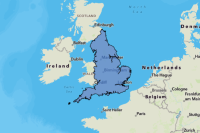

In [3]:
# Access England Boundary
england_border = gis.content.get('0856d38fea9149a48227cdc2f1e4f4f6')
england_border

In [4]:
# Get the feature layer
england_boundary_layer = england_border.layers[0]


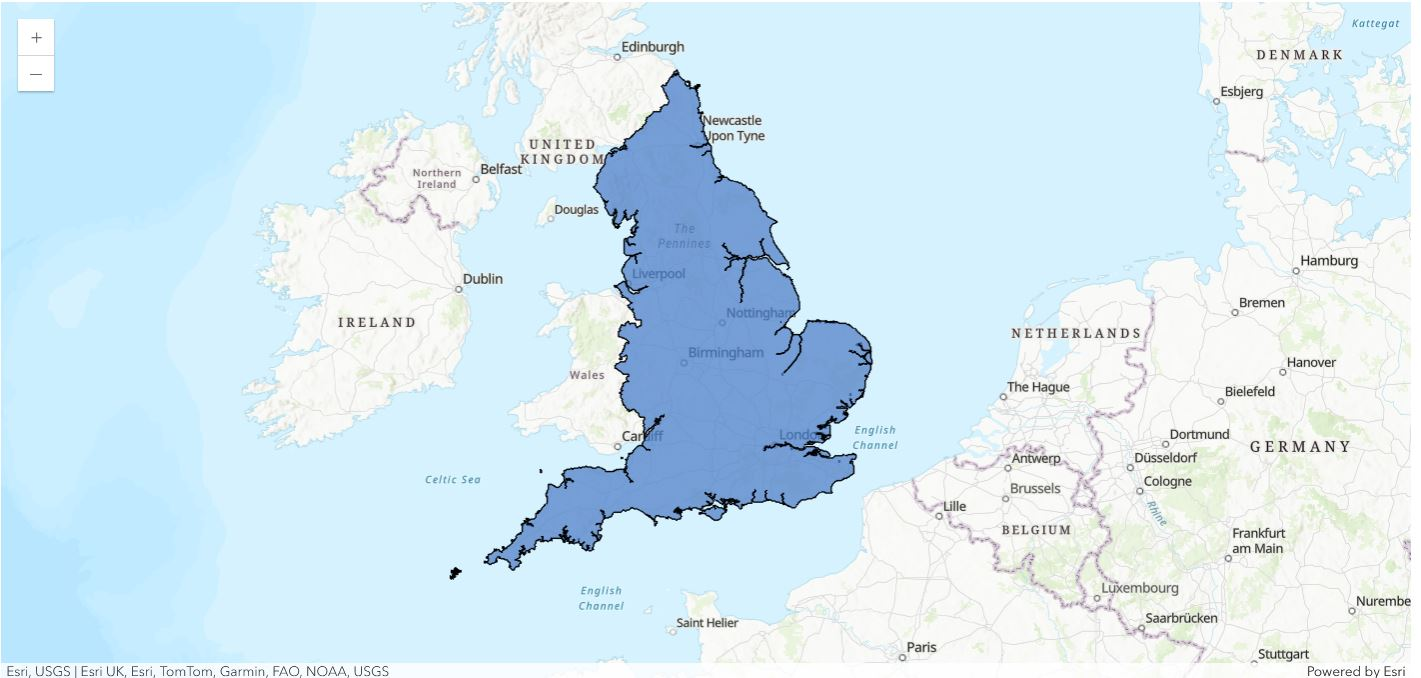

In [48]:
# Plot England boundary
england_map = gis.map('England')
england_map.content.add(england_boundary_layer)
england_map.basemap.basemap = 'topo-vector'
england_map

In [7]:
england_map.zoom = 6

### Data 2 — England Weather Stations  <a class="anchor" id="6"></a>
 
There are several weather stations in England that record a variety of weather data. Here 29 weather stations are strategically selected such that they are well distributed across England and can be used to forecast temperature which will cover the entire country. These include stations located at prominent English cities such as London, Birmingham, Cardiff, Exeter, Nottingham, Plymouth and others, as shown in the map below. 

<Item title:"england_weather_stations1" type:Feature Layer Collection owner:api_data_owner>
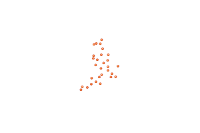

In [8]:
# Access England Weather Stations
england_weather_stations = gis.content.get('fd3ecbd95b7148b8a7cbcc866cedd514')
england_weather_stations

In [9]:
england_weather_stations_layer = england_weather_stations.layers[0]


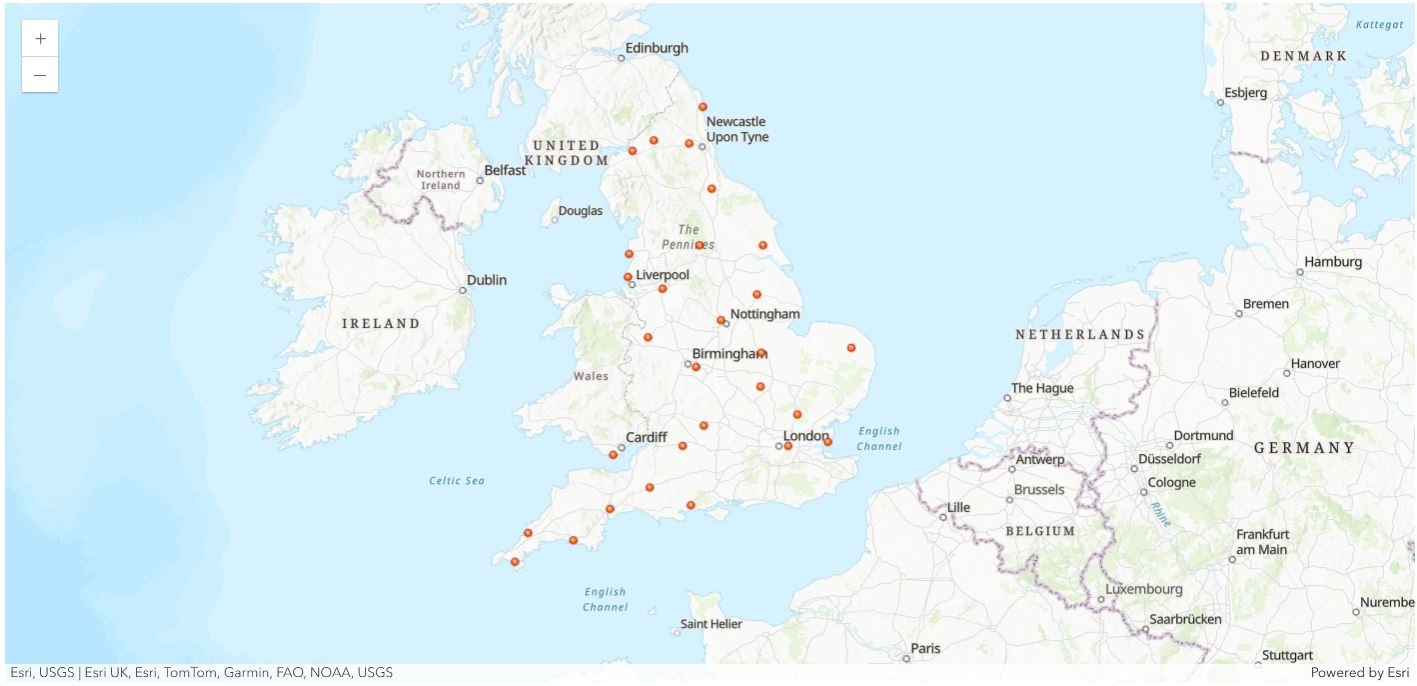

In [47]:
# England weather stations
england_weather_stations_map = gis.map('England')
england_weather_stations_map.basemap.basemap = 'topo-vector'
england_weather_stations_map.content.add(england_weather_stations_layer)
england_weather_stations_map

In [11]:
england_weather_stations_map.zoom = 6

The locations of the weather stations are mapped here which are uniformly distributed throughout England. This is necessary to create a well interpolated prediction surface. The more the number of weather stations, more precise would be the interpolated result.      

In [12]:
# Access spatial dataframe
england_weather_stations_layer_sdf = pd.DataFrame.spatial.from_layer(england_weather_stations_layer)
england_weather_stations_layer_sdf.head()

FID             Station          Y         X  \
0    1           Albemarle  55.016667 -1.866667   
1    2             Begwary  52.216667 -0.483333   
2    3  Birmingham_airport      52.45 -1.733333   
3    4   Blackpool_airport  53.766667 -3.033333   
4    5     Boulmer_airport    55.4203   -1.5997   

                                               SHAPE  
0  {"x": -207796.38285121127, "y": 7365101.445978...  
1  {"x": -53804.420512971476, "y": 6839396.777444...  
2  {"x": -192953.78400456344, "y": 6881903.804921...  
3  {"x": -337669.1220358203, "y": 7126089.0211904...  
4  {"x": -178077.78942199165, "y": 7443868.808735...

The table above shows the latitude (Y) and longitude (X) values of the 29 weather station used in this study.  

### Data 3 —  Historic Temperature  <a class="anchor" id="7"></a>
Daily Mean temperature in degree Celsius ranging from February, 2005 till September,2019 is accessed from the above mentioned weather stations. One issue with timeseries datasets that needed to be addressed was missing data. Thus, weather stations with the least amount of missing data were selected for the study.

In [13]:
# Access historic temperature data of England
table = gis.content.get('d15eba5e9fe54a968e272c32d8e58e1f')

In [14]:
temp_history = table.tables[0]

In [15]:
# Visualize as pandas dataframe
all_station_temp_history = temp_history.query().sdf

In [16]:
all_station_temp_history.tail()

Date Albemarle Begwary Birmingham_airport Blackpool_airport  \
5350  26-09-2019     13.79   16.15              15.62             15.24   
5351  27-09-2019      10.9   13.72              13.28             13.72   
5352  28-09-2019     11.26   14.11               13.9             14.12   
5353  29-09-2019     10.68   15.25              14.79             12.68   
5354  30-09-2019      10.1   12.91              12.73              13.6   

      Boulmer_airport Bournemouth_airport  BrizeNorton_airport  \
5350             <NA>               16.99                15.95   
5351             <NA>               15.08                14.05   
5352             <NA>               15.95                14.31   
5353             <NA>               15.88                15.38   
5354             <NA>               14.22                13.14   

     Cardiff_airport Carlisle  ... Nottingham Plymouth_weatherstation  \
5350           15.77     14.1  ...      14.46                   15.96   
5351           14.88    12.25  ...      12.79                    14.6   
5352           15.33    12.37  ...      13.46                   15.03   
5353           14.98     11.8  ...      13.66                   15.19   
5354           14.27    11.08  ...      12.11                   14.78   

     Rostherne Scampton_airport Shawbury_airport Southend_on_Sea_AWS  \
5350      14.9            15.21            14.65               17.16   
5351     12.77            13.05            13.37               15.76   
5352     13.67            13.36            13.91               15.68   
5353     13.19            13.49            14.14               16.18   
5354     12.12            12.08            12.02               14.31   

     Stansted_airport Wittering_airport  Yeovilton_airport ObjectId  
5350            16.27             15.85              16.64     5351  
5351            14.21             13.22              14.95     5352  
5352            14.19              14.1              15.37     5353  
5353            15.31             14.74              15.65     5354  
5354             13.5             12.56               13.7     5355  

[5 rows x 31 columns]

In [17]:
all_station_temp_history.shape

(5355, 31)

In [18]:
england_temp = all_station_temp_history[all_station_temp_history.columns[0:30]]

In [19]:
england_temp.tail()

Date Albemarle Begwary Birmingham_airport Blackpool_airport  \
5350  26-09-2019     13.79   16.15              15.62             15.24   
5351  27-09-2019      10.9   13.72              13.28             13.72   
5352  28-09-2019     11.26   14.11               13.9             14.12   
5353  29-09-2019     10.68   15.25              14.79             12.68   
5354  30-09-2019      10.1   12.91              12.73              13.6   

      Boulmer_airport Bournemouth_airport  BrizeNorton_airport  \
5350             <NA>               16.99                15.95   
5351             <NA>               15.08                14.05   
5352             <NA>               15.95                14.31   
5353             <NA>               15.88                15.38   
5354             <NA>               14.22                13.14   

     Cardiff_airport Carlisle  ... Norwich_airport Nottingham  \
5350           15.77     14.1  ...            16.6      14.46   
5351           14.88    12.25  ...           13.89      12.79   
5352           15.33    12.37  ...           14.42      13.46   
5353           14.98     11.8  ...           15.46      13.66   
5354           14.27    11.08  ...           13.87      12.11   

     Plymouth_weatherstation Rostherne Scampton_airport Shawbury_airport  \
5350                   15.96      14.9            15.21            14.65   
5351                    14.6     12.77            13.05            13.37   
5352                   15.03     13.67            13.36            13.91   
5353                   15.19     13.19            13.49            14.14   
5354                   14.78     12.12            12.08            12.02   

     Southend_on_Sea_AWS Stansted_airport  Wittering_airport Yeovilton_airport  
5350               17.16            16.27              15.85             16.64  
5351               15.76            14.21              13.22             14.95  
5352               15.68            14.19               14.1             15.37  
5353               16.18            15.31              14.74             15.65  
5354               14.31             13.5              12.56              13.7  

[5 rows x 30 columns]

The table above shows the historic temperature data in degree Celsius of all the weather stations starting from 2005 to September 2019. The first column is the Date field which is the day of the recorded temperature and rest of the columns are weather stations. 

## Convert to Timeseries format <a class="anchor" id="8"></a>

This temperature dataset is now transformed into a timeseries data format where the Date column is set as the index of the dataset.

In [20]:
# Change to datetime format
england_temp_new = england_temp.copy() 
england_temp_new[england_temp_new.columns[0]] = pd.to_datetime(england_temp_new[england_temp_new.columns[0]], format='%d-%m-%Y')
england_temp_new = england_temp_new.set_index(england_temp_new.columns[0])
england_temp_new = england_temp_new.sort_index()
all_station_temp = england_temp_new.astype('float')
all_station_temp.tail()

Albemarle  Begwary  Birmingham_airport  Blackpool_airport  \
Date                                                                    
2019-09-26      13.79    16.15               15.62              15.24   
2019-09-27      10.90    13.72               13.28              13.72   
2019-09-28      11.26    14.11               13.90              14.12   
2019-09-29      10.68    15.25               14.79              12.68   
2019-09-30      10.10    12.91               12.73              13.60   

            Boulmer_airport  Bournemouth_airport  BrizeNorton_airport  \
Date                                                                    
2019-09-26              NaN                16.99                15.95   
2019-09-27              NaN                15.08                14.05   
2019-09-28              NaN                15.95                14.31   
2019-09-29              NaN                15.88                15.38   
2019-09-30              NaN                14.22                13.14   

            Cardiff_airport  Carlisle  Crosby  ...  Norwich_airport  \
Date                                           ...                    
2019-09-26            15.77     14.10   15.45  ...            16.60   
2019-09-27            14.88     12.25   13.96  ...            13.89   
2019-09-28            15.33     12.37   14.40  ...            14.42   
2019-09-29            14.98     11.80   13.29  ...            15.46   
2019-09-30            14.27     11.08   13.82  ...            13.87   

            Nottingham  Plymouth_weatherstation  Rostherne  Scampton_airport  \
Date                                                                           
2019-09-26       14.46                    15.96      14.90             15.21   
2019-09-27       12.79                    14.60      12.77             13.05   
2019-09-28       13.46                    15.03      13.67             13.36   
2019-09-29       13.66                    15.19      13.19             13.49   
2019-09-30       12.11                    14.78      12.12             12.08   

            Shawbury_airport  Southend_on_Sea_AWS  Stansted_airport  \
Date                                                                  
2019-09-26             14.65                17.16             16.27   
2019-09-27             13.37                15.76             14.21   
2019-09-28             13.91                15.68             14.19   
2019-09-29             14.14                16.18             15.31   
2019-09-30             12.02                14.31             13.50   

            Wittering_airport  Yeovilton_airport  
Date                                              
2019-09-26              15.85              16.64  
2019-09-27              13.22              14.95  
2019-09-28              14.10              15.37  
2019-09-29              14.74              15.65  
2019-09-30              12.56              13.70  

[5 rows x 29 columns]

## Model Building <a class="anchor" id="9"></a>
Once the dataset is transformed into a timeseries dataset, it is ready to be used for modelling. In this sample two types of methodology are used for modelling: 

1) LSTM - First a deep learning framework of LSTM is used which is appropriate for handling time series data. 

2) Support Vector Machine  - In the second option the machine learning algorithm of Support Vector Regression(SVR) is used to compare the performance between the two methods in terms of accuracy and computation time.

### LSTM <a class="anchor" id="11"></a>

LSTM (Long short-term memory) first proposed by [Hochreiter & Schmidhuber](http://www.bioinf.jku.at/publications/older/2604.pdf), is a type of Recurrent Neural Network(RNN). RNN could be defined as a special kind of neural network which can retain information from past inputs which is not possible for traditional neural networks. This makes it suitable for forecasting timeseries data wherein prediction is done based on past data. 
LSTM is built of units, each consisting of four neural networks, which are used to update its cell state using information from new inputs and past outputs.

A function is created here which encapsulates the steps for processing and predicting from the timeseries data.

First an empty datetime DataFrame is created for the number of days the temperature is to be forecasted, where future predicted values will be stored.

In [21]:
# create future forecast dates
def create_dates(start,days):
    v = pd.date_range(start=start, periods=days+1, freq='D', inclusive='right')
    seven_day_forecast = pd.DataFrame(index=v) 
    return seven_day_forecast

This next method accesses the station name from the input data and the related values for that station. 

In [22]:
# get values, station name and drop null values
def get_value_name(all_station_temp,i):
    station_value = all_station_temp[[all_station_temp.columns[i]]].dropna()
    station_name = all_station_temp.columns[i]
    return station_value, station_name 

Sequence of a timeseries is very important, hence while splitting the values into train and test set, the order is to be retained. This method takes the above accessed values and divides it into user input ratio before and after a certain date.

In [23]:
# train-test split for a user input ratio
def train_test_split(value, name, ratio):
    nrow = len(value)
    print(name+' total samples: ',nrow)
    split_row = int((nrow)*ratio)
    print('Training samples: ',split_row)
    print('Testing samples: ',nrow-split_row)
    train = value.iloc[:split_row]
    test = value.iloc[split_row:]
    return train, test, split_row     

Data scaling is essential before feeding it to a LSTM, which helps it train better compared to raw unscaled data. This method scales the train and test data using a minmax scaler from sci-kit learn.

In [24]:
# data transformation
def data_transformation(train_tract1,test_tract1):
    scaler = MinMaxScaler()
    train_tract1_scaled = scaler.fit_transform(train_tract1)
    test_tract1_scaled = scaler.fit_transform(test_tract1)          
    train_tract1_scaled_df = pd.DataFrame(train_tract1_scaled, index = train_tract1.index, columns=[train_tract1.columns[0]])
    test_tract1_scaled_df = pd.DataFrame(test_tract1_scaled,
                                         index = test_tract1.index, columns=[test_tract1.columns[0]])
    return train_tract1_scaled_df, test_tract1_scaled_df, scaler     

Finally one more transformation of feature engineering is required, which is to create new features using lagged values of the time series data itself. Here the number of lag terms could be specified and the function would create lag number of new features using the lagged terms.  

In [25]:
# feature builder - This section creates feature set with lag number of predictors--Creating features using lagged data
def timeseries_feature_builder(df, lag):
    df_copy = df.copy()
    for i in range(1,lag):
        df_copy['lag'+str(i)] = df.shift(i) 
    return df_copy
    df_copy = df.copy()

Null values resulting from the above feature creation are dropped followed by converting the train and test values to arrays, which is the input data type for LSTM.

In [26]:
# preprocessing -- drop null values and make arrays 
def make_arrays(train_tract1,test_tract1):
    X_train_tract1_array = train_tract1.dropna().drop(train_tract1.columns[0], axis=1).values
    y_train_tract1_array = train_tract1.dropna()[train_tract1.columns[0]].values
    X_test_tract1_array = test_tract1.dropna().drop(test_tract1.columns[0], axis=1).values
    y_test_tract1_array = test_tract1.dropna()[test_tract1.columns[0]].values    
    return X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array

LSTM model with three hidden layer is created each having a user input number of LSTM memory units, with a dropout rate of 20% for each layer, and a final output dense layer predicting a single value. 

In [27]:
# Define LSTM model
def lstm_model(units, trainX, testX, y_train_tract1_array, y_test_tract1_array):
    model = Sequential()
    model.add(LSTM(units,return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2]),kernel_initializer='lecun_uniform'))
    model.add(Dropout(0.2))    
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(0.2))    
    model.add(LSTM(units))
    model.add(Dropout(0.2))
    model.add(Dense(1))        
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    model.fit(trainX, y_train_tract1_array, batch_size=120, epochs=100, validation_data=(testX, y_test_tract1_array), verbose=0)
    return model

In the validation method, the fitted model is used here to predict on the test set and the results are added to a column called Forecast for visualization. The accuracy of the predicted result is measured by r-square method, to check its similarity with the actual temperature readings, which is intuitive to interpret. 

In [28]:
# validation result 
def valid_result(model, testX, y_test_tract1_array, scaler, station_value, split_row, lag):    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = station_value.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

Once the results are validated, the model is used to forecast temperature for the next 31 days or the month of October, 2019 by a walk forward of each day. Here the past lag number of days are used to predict the temperature for October 1st. This predicted value is then included as a predictor for forecasting the next days value, and input into the fitted model along with past days temperatures, and so on till all the days are predicted. This is repeated for each weather station. 

In [29]:
# multi step future forecast for next days number of days. 
def forecast(model, testX, test_tract1, lag, scaler, days):
    seven_days = []
    new0 = testX[-1]        
    last = test_tract1.iloc[-1]
    new_predict = last[0]        
    new_array = np.insert(new0, 0, new_predict)        
    new_array = np.delete(new_array, -1)
    new_array_reshape = np.reshape(new_array, (-1,1,lag))       
    new_predict = model.predict(new_array_reshape)
    temp_predict = scaler.inverse_transform(new_predict) 
    seven_days.append(temp_predict[0][0].round(2))
    
    for i in range(1,days):
        new_array = np.insert(new_array, 0, new_predict)             
        new_array = np.delete(new_array, -1)
        new_array_reshape = np.reshape(new_array, (-1,1,lag))            
        new_predict = model.predict(new_array_reshape)
        temp_predict = scaler.inverse_transform(new_predict) 
        seven_days.append(temp_predict[0][0].round(2))
    return seven_days         

Finally the main function is created which calls the above modules for predicting the monthly forecast. This consists of first accessing time series data for each station, processing them into appropriate input format and fitting a LSTM model on 90% of the data as training set. This is followed by validating the trained model on the rest 10% of the data and final forecasting for the next 31 days using the trained model, which is then repeated for all the 29 station.

In [30]:
def england_temp_lstm(all_station_temp, lag, days):    
    
    seven_day_forecast_lstm = create_dates('2019-09-30',days) 
    
    for i in range(len(all_station_temp.columns)):
        
        # preprocessing
        station_value, station_name = get_value_name(all_station_temp,i)        
        train_tract1, test_tract1, split_row = train_test_split(station_value, station_name, 0.90)        
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                           test_tract1)        
        trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
        testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
        
        # LSTM modelling & forecast
        model = lstm_model(30, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
        test_tract1_pred = valid_result(model, testX, y_test_tract1_array, scaler, station_value, split_row, lag)        
        seven_days = forecast(model, testX, test_tract1, lag, scaler, days)       
        seven_day_forecast_lstm[station_name] = np.array(seven_days)       
        
        # plot result
        plt.figure(figsize=(20,5))
        plt.plot(test_tract1_pred)        
        plt.plot(seven_day_forecast_lstm[station_name], color='red', label='forecast')         
        plt.ylabel('Temperature(°C)')
        plt.legend(loc='upper right')
        plt.title(station_name + '- October 2019 Temperature Forecast')
        plt.show()        
        
    return(seven_day_forecast_lstm)

Once the main function is ready it is called on the weather station dataset consisting of past temperature data from the selected weather stations. It is given three input: the data table, number of past day's data to be used for forecasting and the number of days for which the temperature is to be predicted.

Albemarle total samples:  3648
Training samples:  3283
Testing samples:  365
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.858284
1/1 [==============================] - 0s 23ms/step


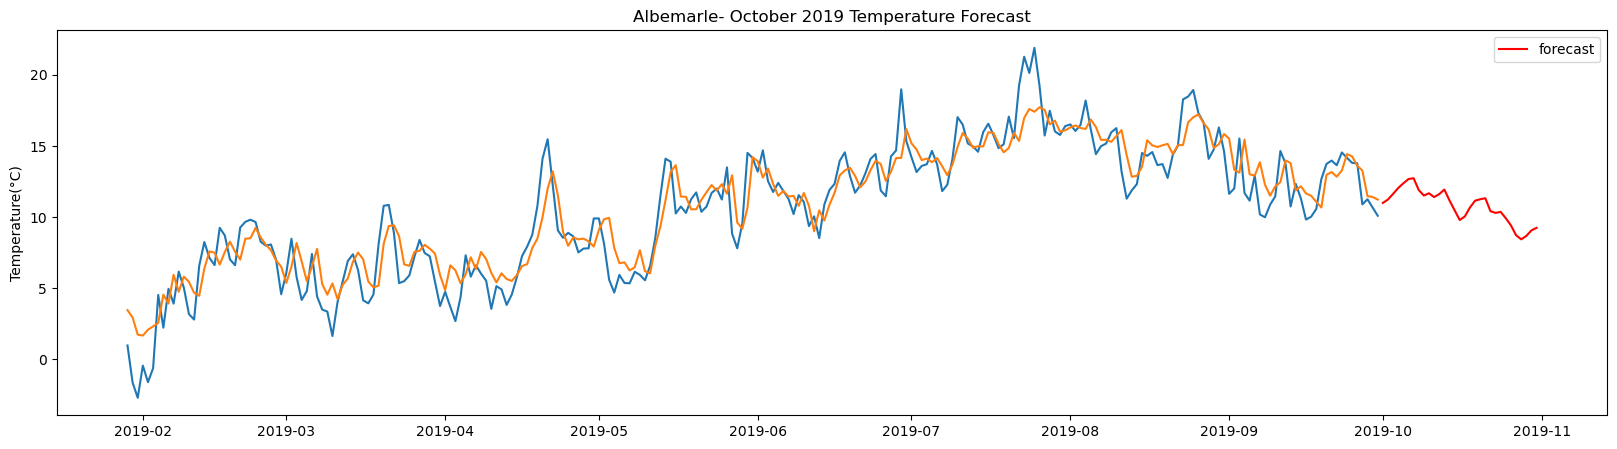

Begwary total samples:  3648
Training samples:  3283
Testing samples:  365
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.848154
1/1 [==============================] - 0s 24ms/step


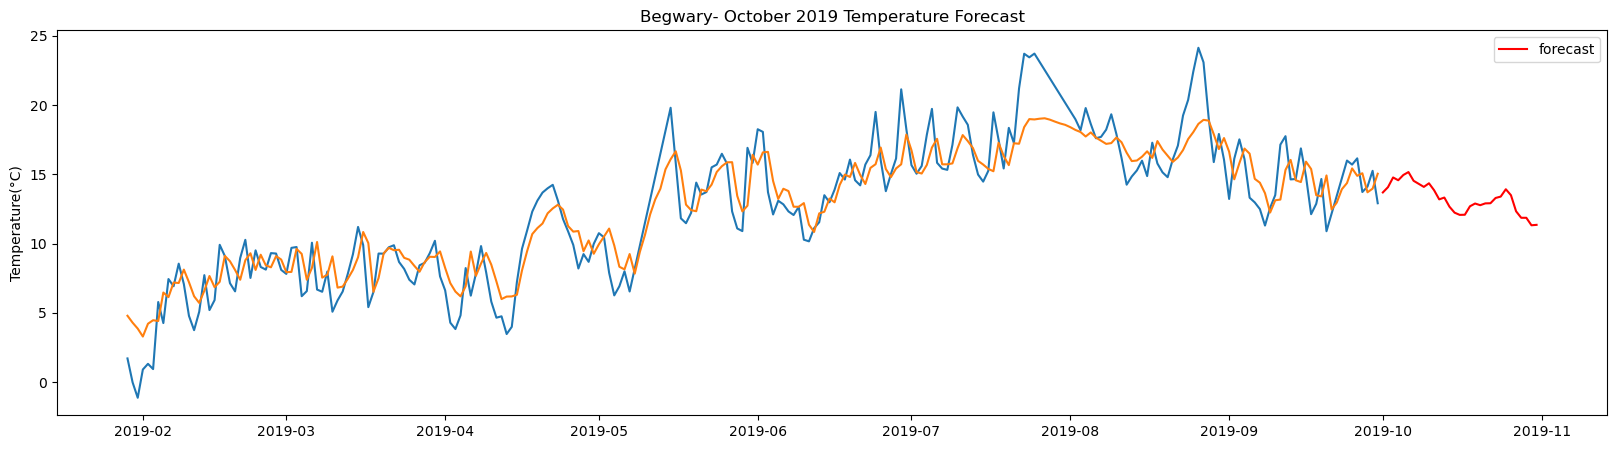

Birmingham_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 1ms/step
Test R-squared is: 0.528638
1/1 [==============================] - 0s 23ms/step


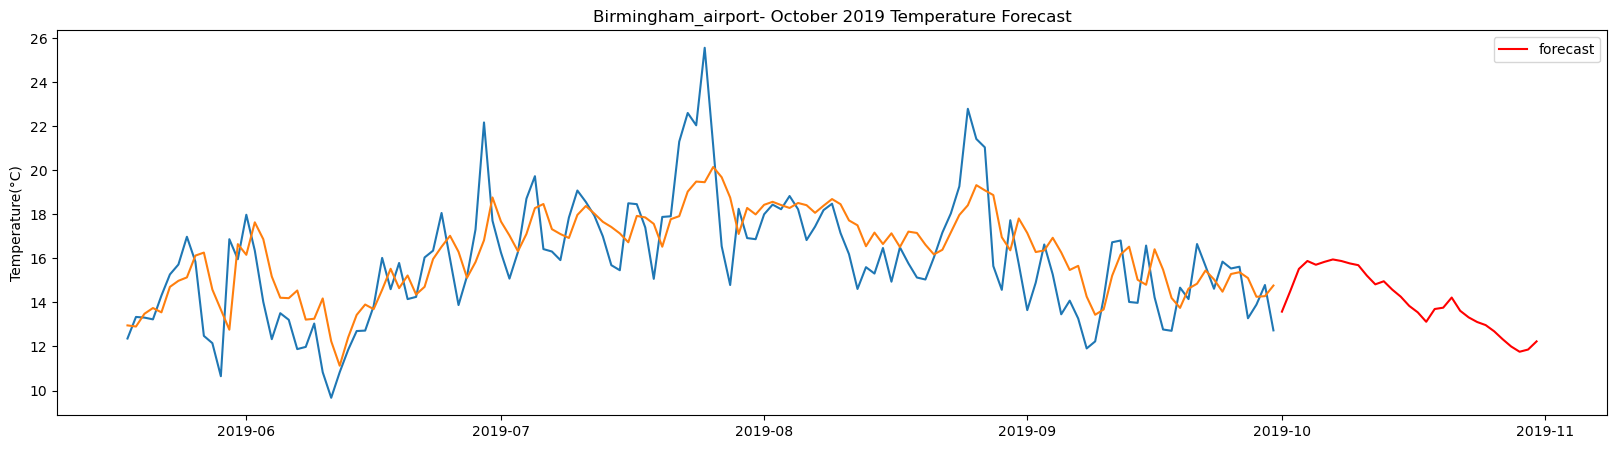

Blackpool_airport total samples:  3501
Training samples:  3150
Testing samples:  351
8/8 [==============================] - 1s 1ms/step
Test R-squared is: 0.878246
1/1 [==============================] - 0s 22ms/step


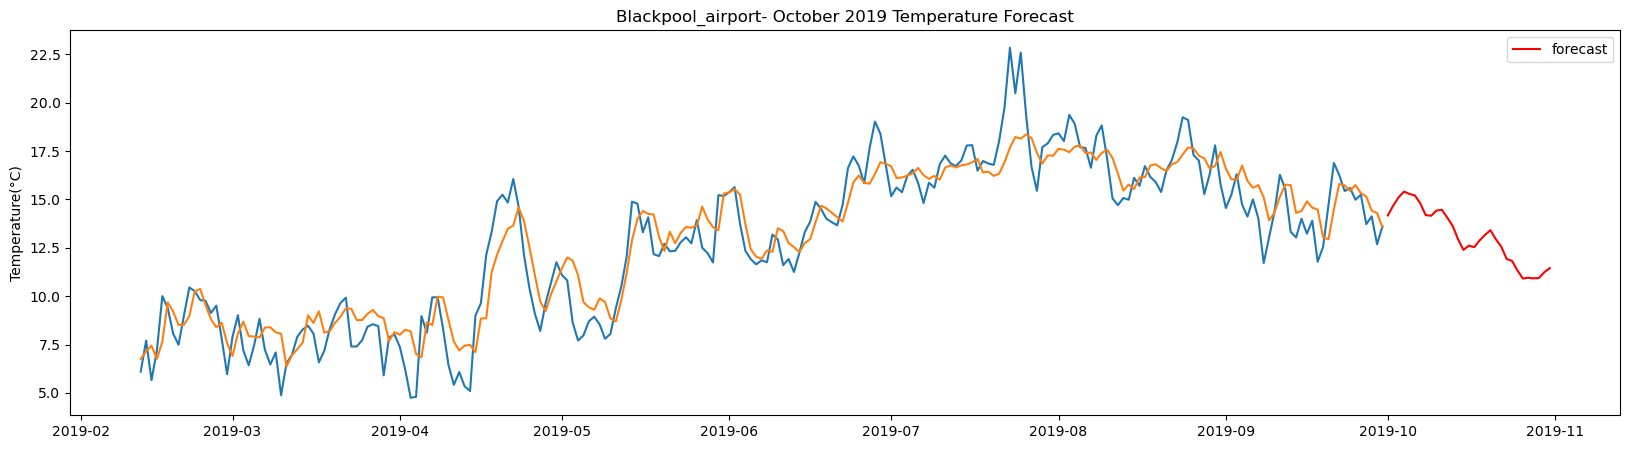

Boulmer_airport total samples:  5302
Training samples:  4771
Testing samples:  531
13/13 [==============================] - 1s 1ms/step
Test R-squared is: 0.837382
1/1 [==============================] - 0s 23ms/step


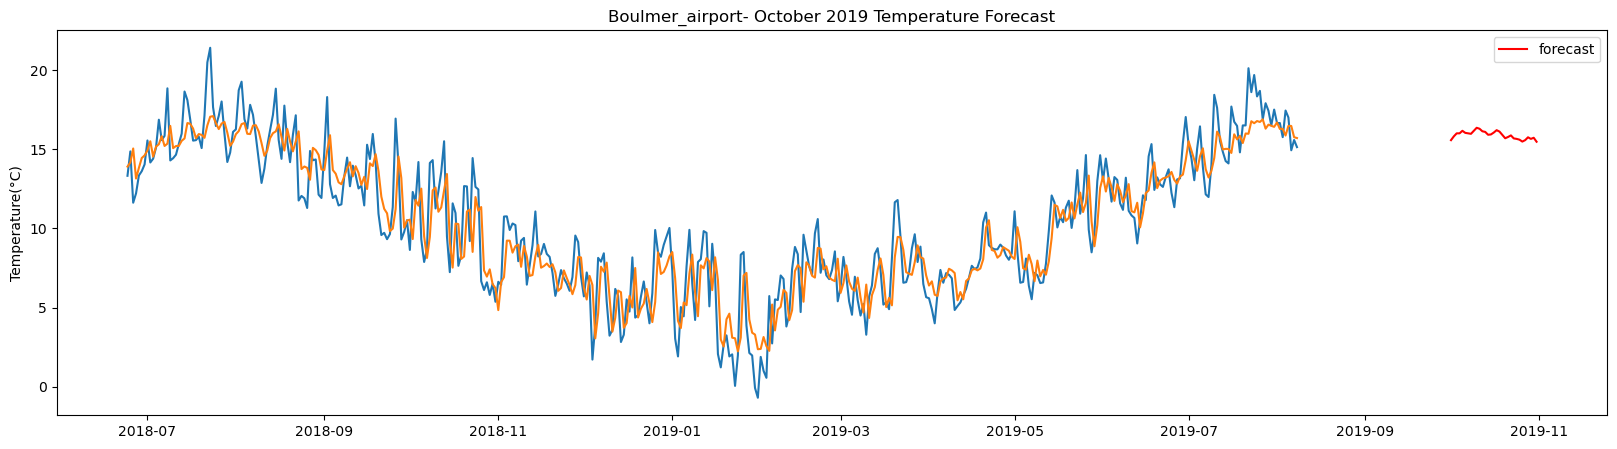

Bournemouth_airport total samples:  3648
Training samples:  3283
Testing samples:  365
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.853970
1/1 [==============================] - 0s 24ms/step


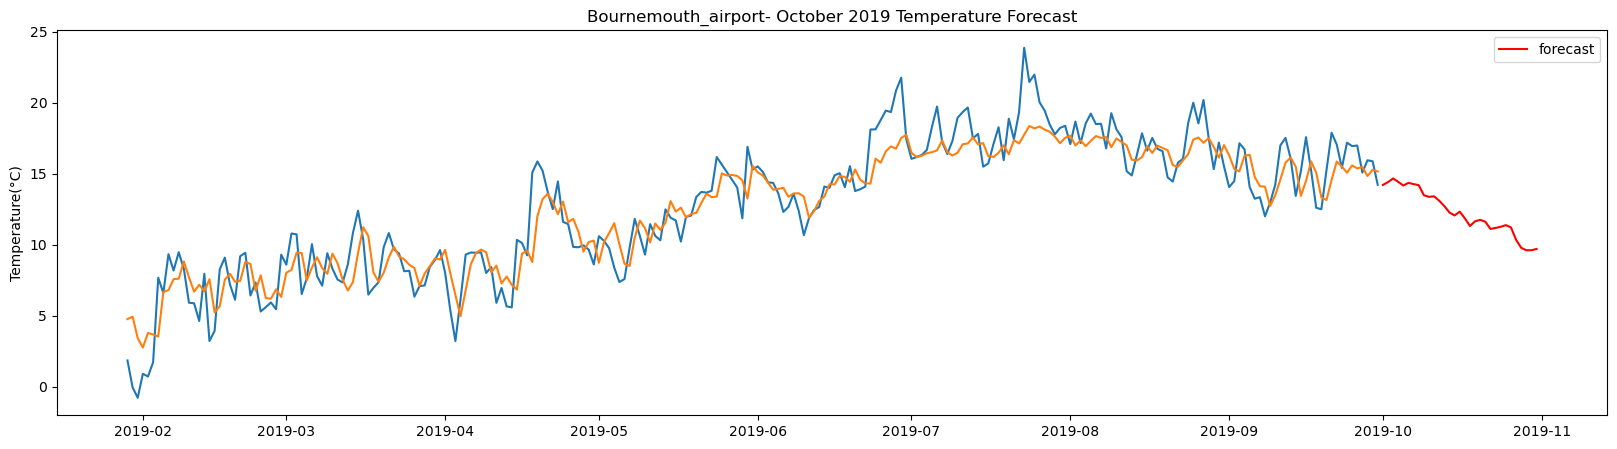

BrizeNorton_airport total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 1ms/step
Test R-squared is: 0.834449
1/1 [==============================] - 0s 25ms/step


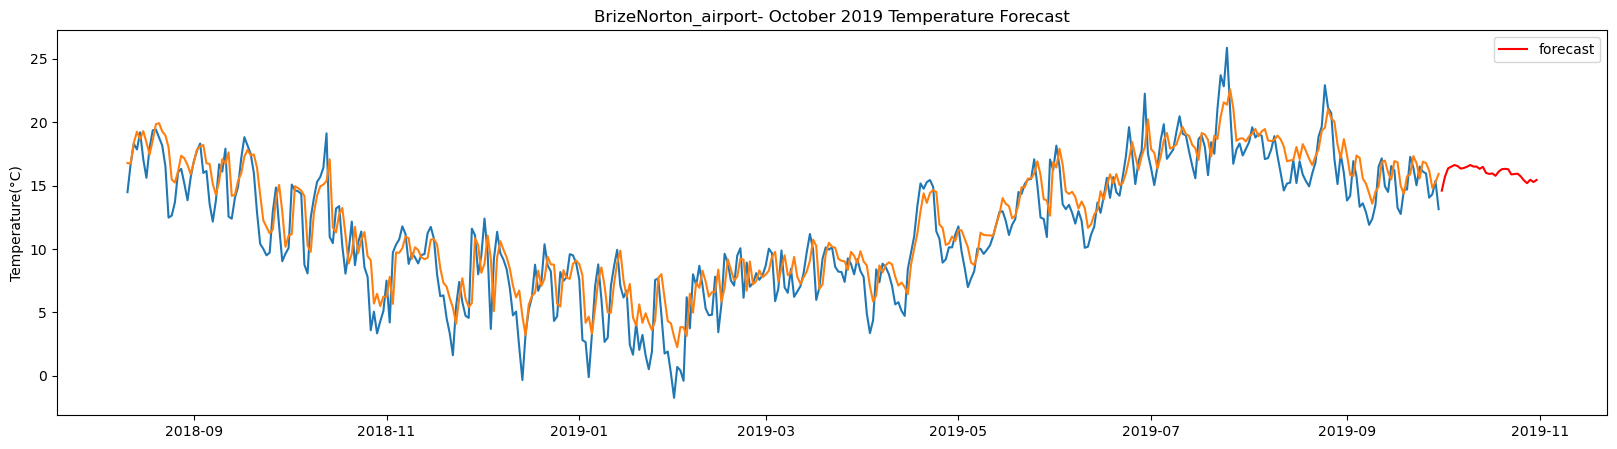

Cardiff_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.667280
1/1 [==============================] - 0s 25ms/step


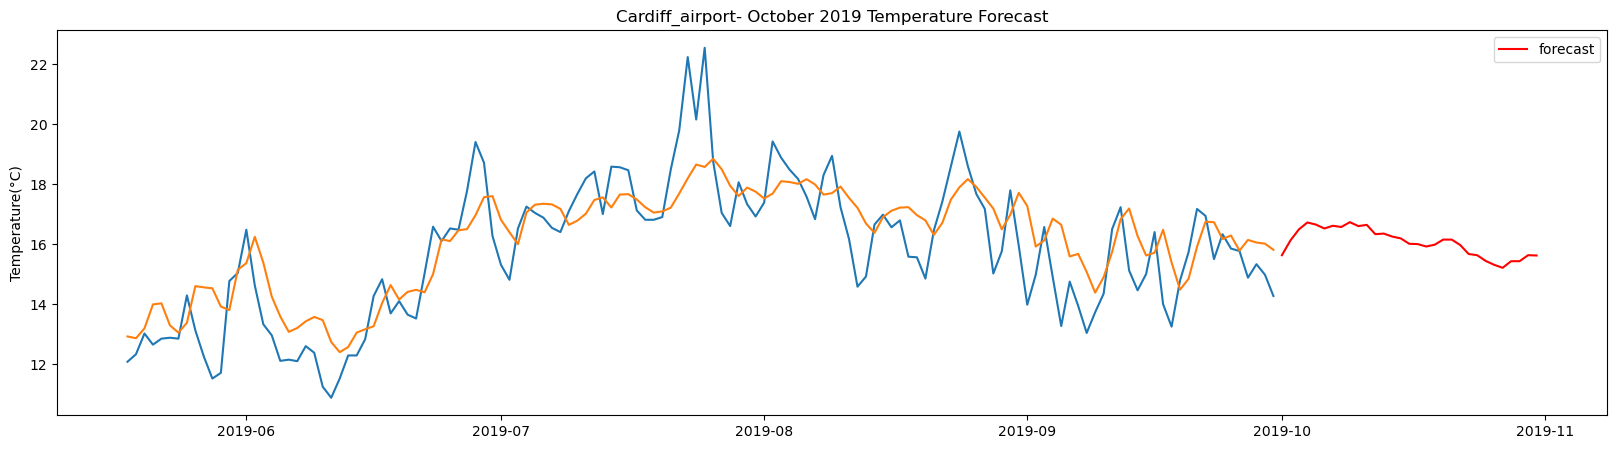

Carlisle total samples:  3529
Training samples:  3176
Testing samples:  353
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.808781
1/1 [==============================] - 0s 24ms/step


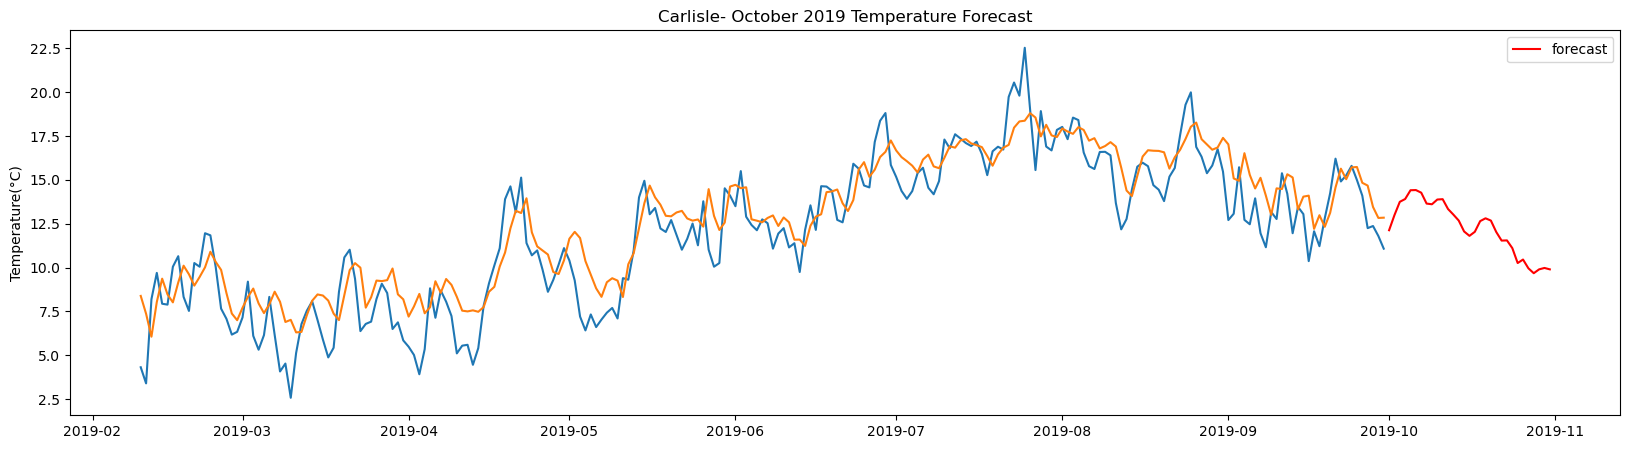

Crosby total samples:  3648
Training samples:  3283
Testing samples:  365
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.816017
1/1 [==============================] - 0s 25ms/step


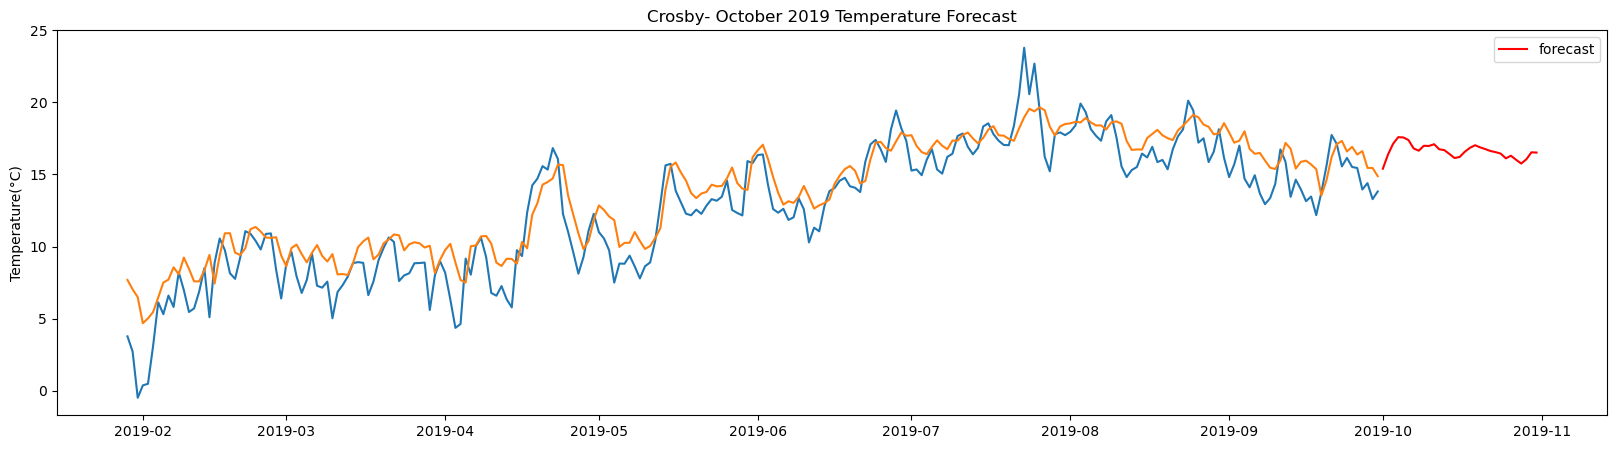

Culdrose_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.736764
1/1 [==============================] - 0s 26ms/step


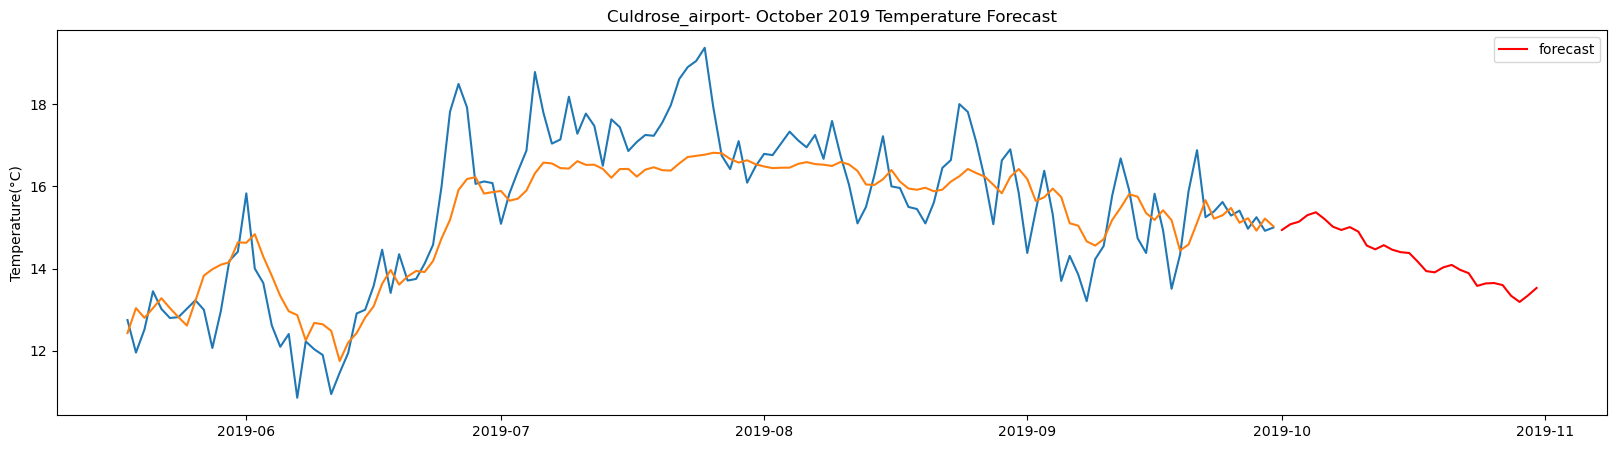

DurhamTeesValley_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.526400
1/1 [==============================] - 0s 26ms/step


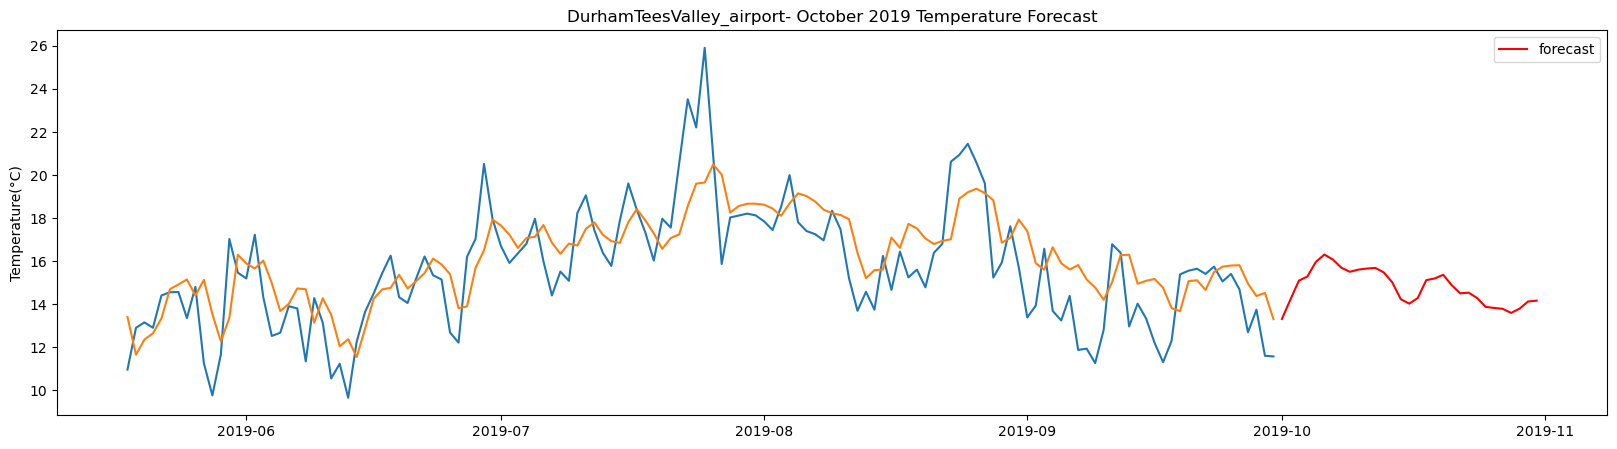

Exeter_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.620952
1/1 [==============================] - 0s 23ms/step


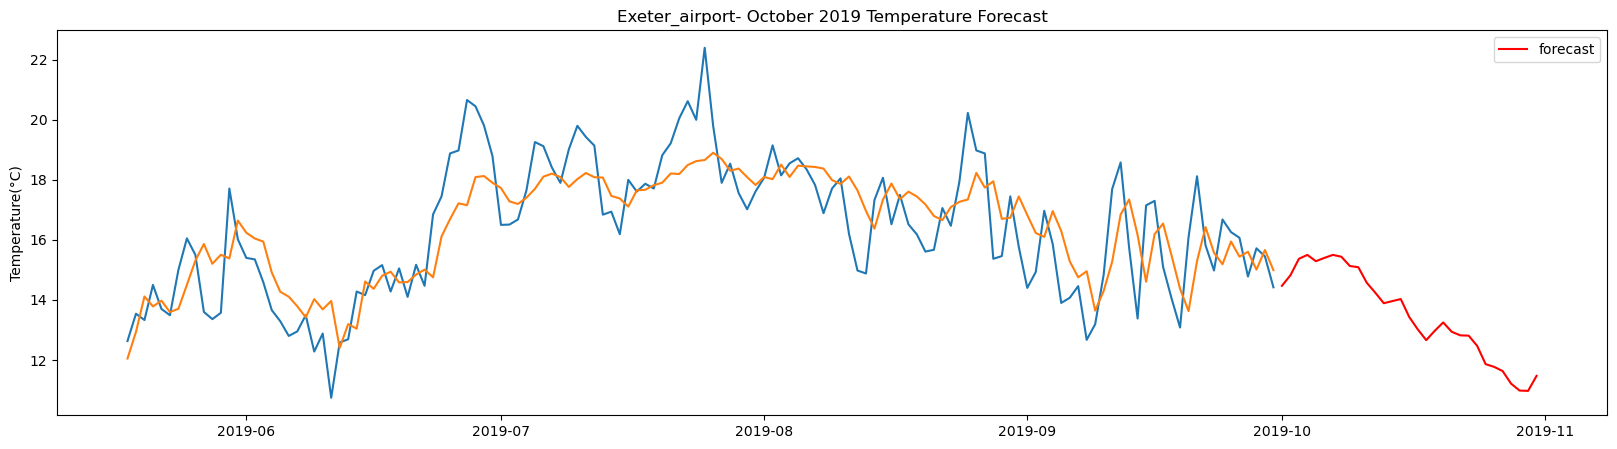

Leconfield_airport total samples:  2555
Training samples:  2299
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.523472
1/1 [==============================] - 0s 24ms/step


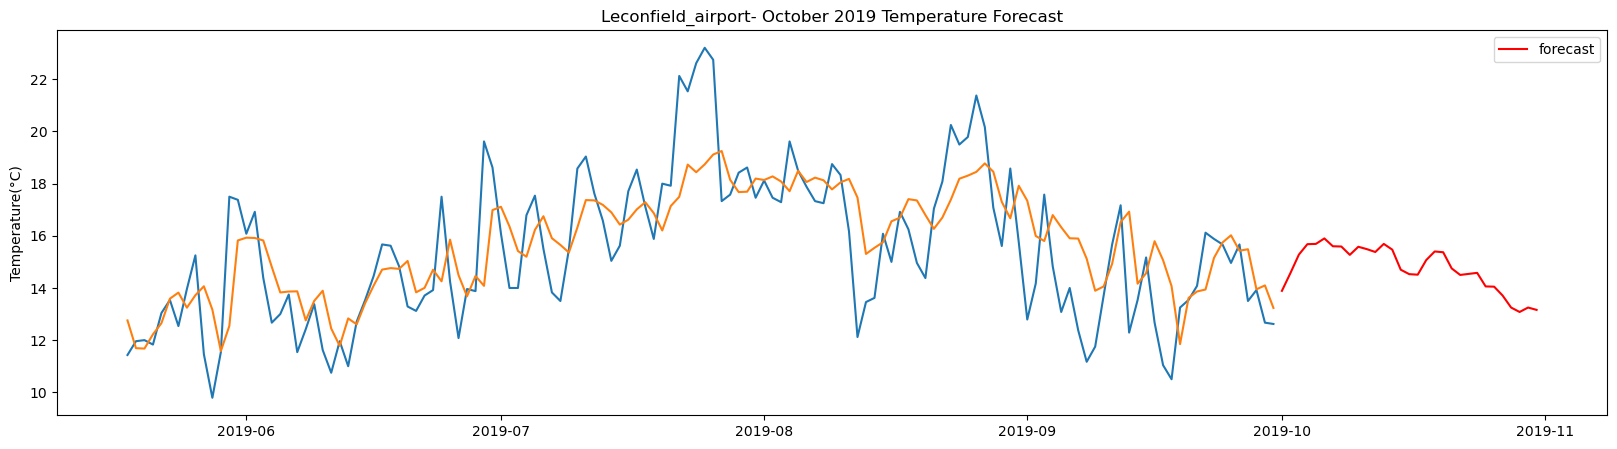

SpadeadamKingwater_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.399750
1/1 [==============================] - 0s 23ms/step


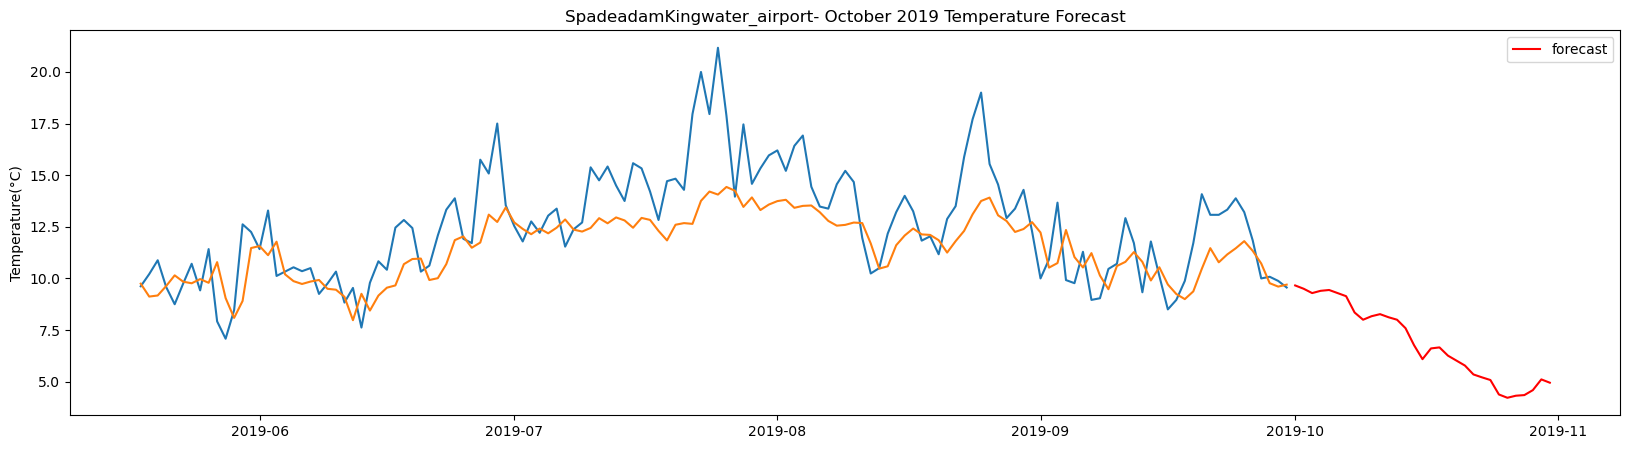

LeedsBradford_airport total samples:  2922
Training samples:  2629
Testing samples:  293
6/6 [==============================] - 1s 2ms/step
Test R-squared is: 0.761392
1/1 [==============================] - 0s 26ms/step


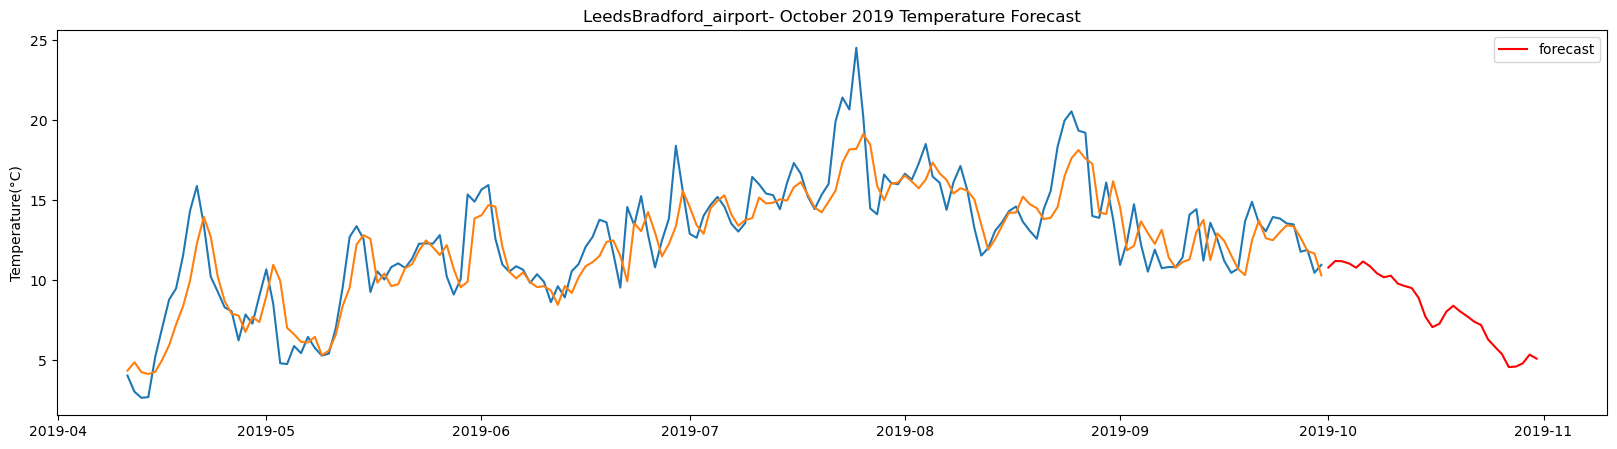

LondonCity_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.458854
1/1 [==============================] - 0s 24ms/step


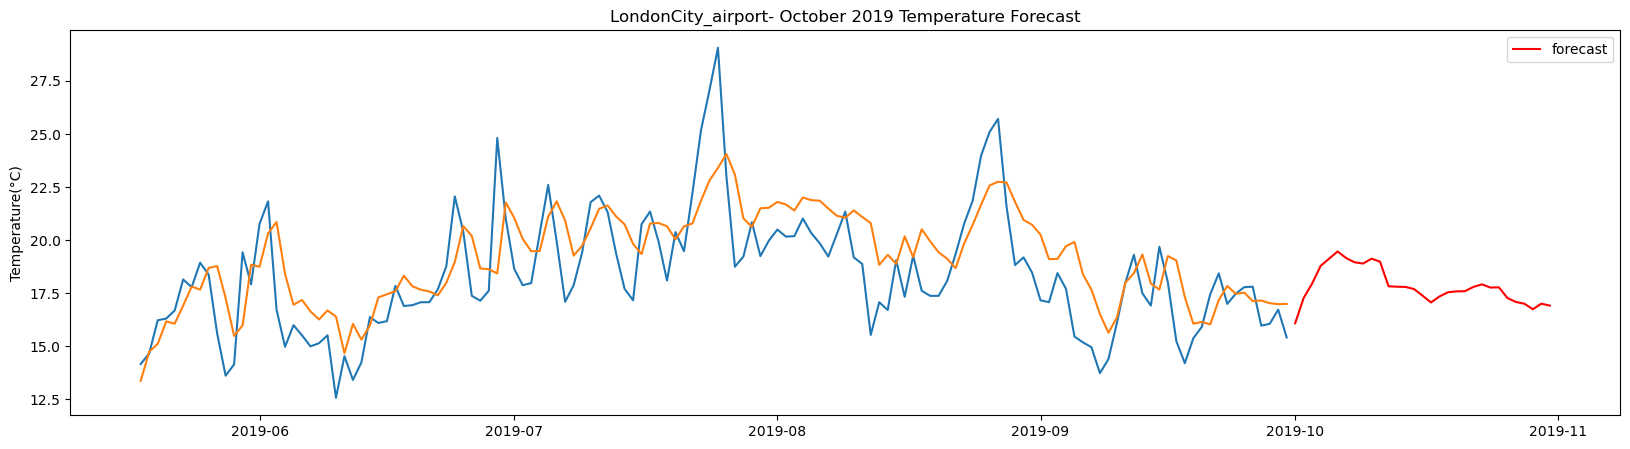

Lyneham_airport total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 1ms/step
Test R-squared is: 0.859376
1/1 [==============================] - 0s 24ms/step


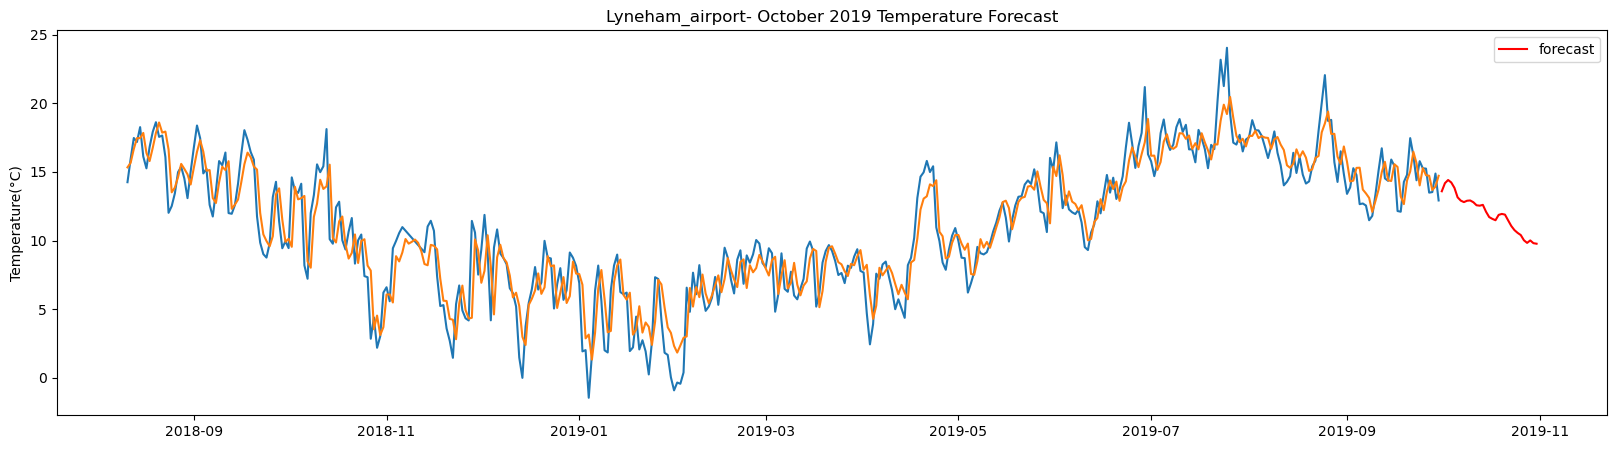

NewquayCornwall_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.574123
1/1 [==============================] - 0s 21ms/step


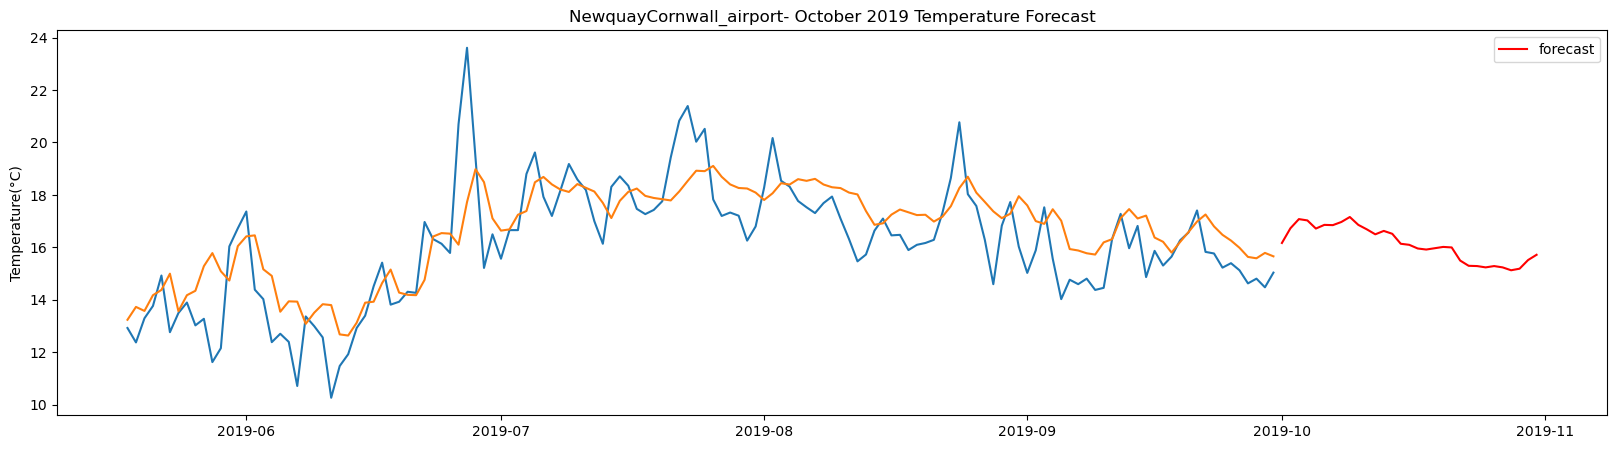

Norwich_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.490249
1/1 [==============================] - 0s 22ms/step


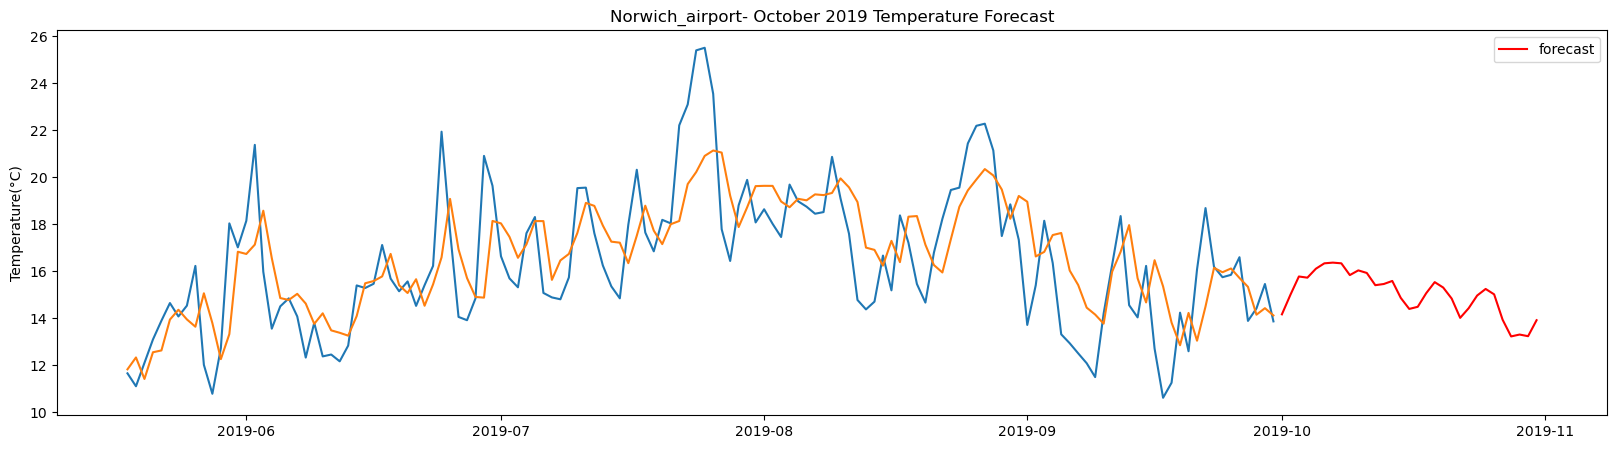

Nottingham total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 2ms/step
Test R-squared is: 0.844429
1/1 [==============================] - 0s 22ms/step


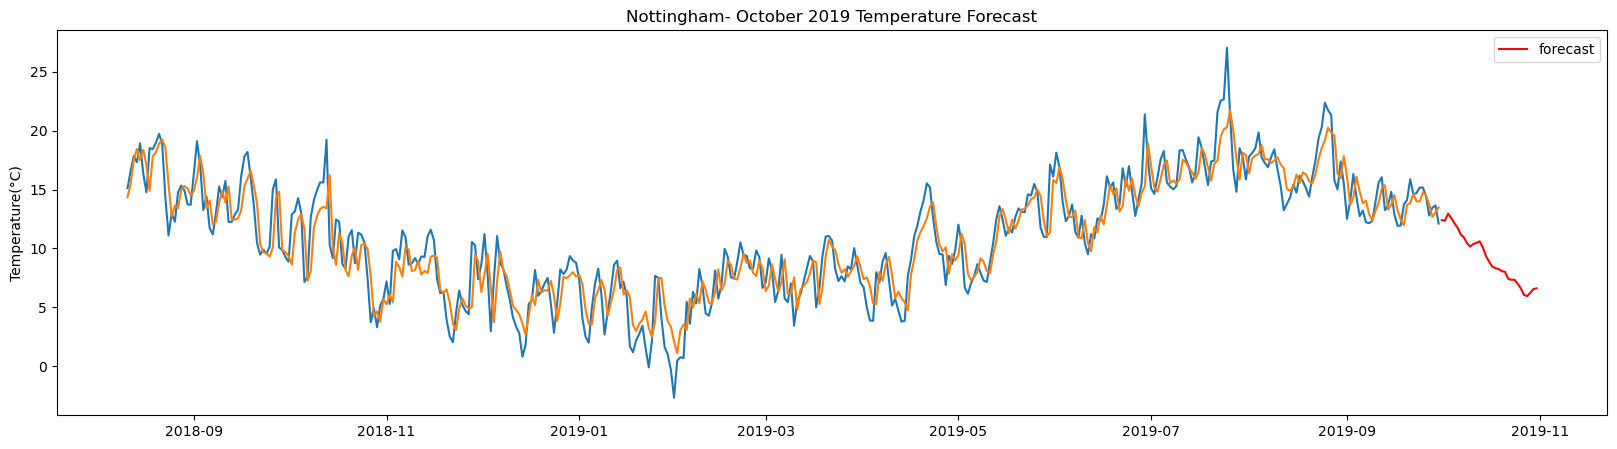

Plymouth_weatherstation total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 2ms/step
Test R-squared is: 0.848789
1/1 [==============================] - 0s 26ms/step


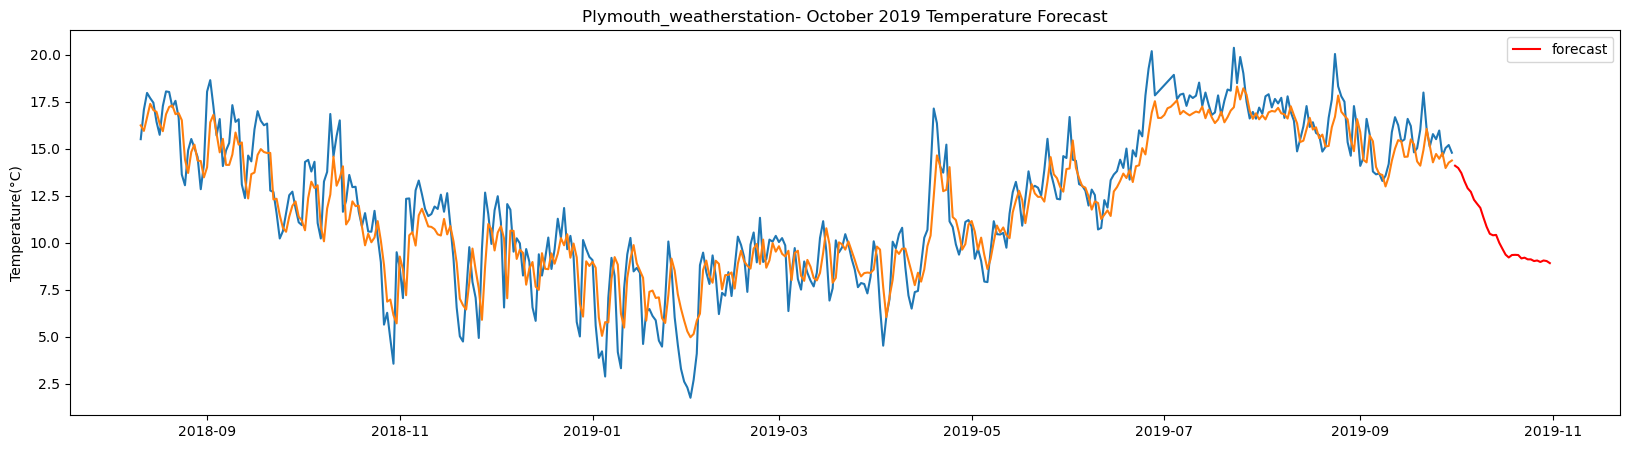

Rostherne total samples:  2495
Training samples:  2245
Testing samples:  250
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.585413
1/1 [==============================] - 0s 24ms/step


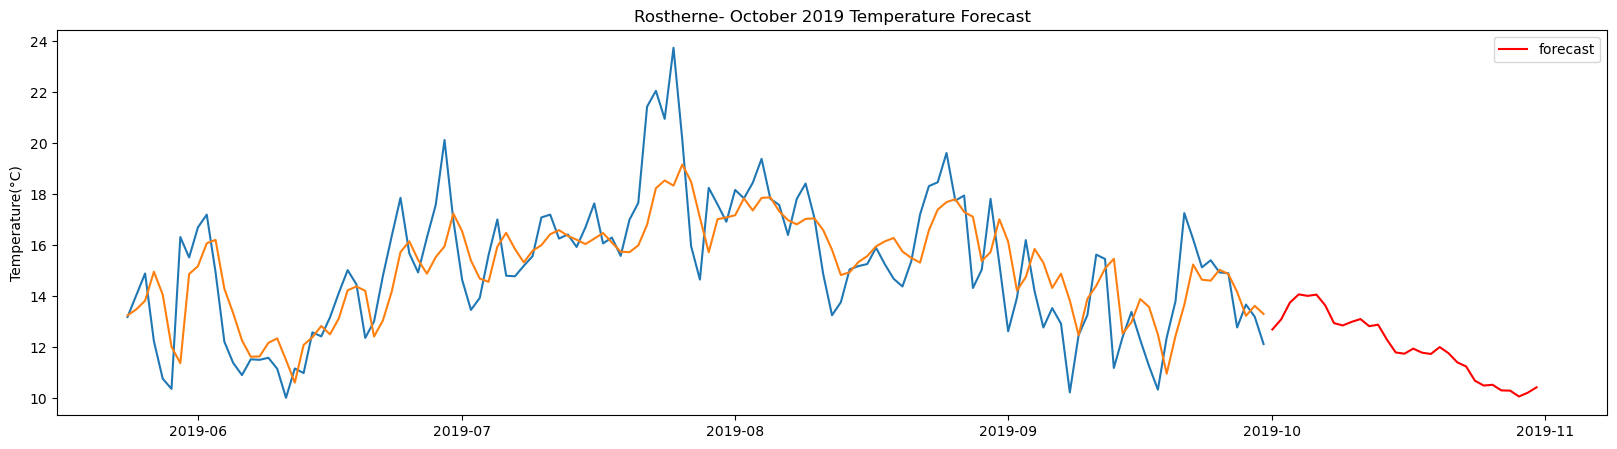

Scampton_airport total samples:  3543
Training samples:  3188
Testing samples:  355
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.783749
1/1 [==============================] - 0s 23ms/step


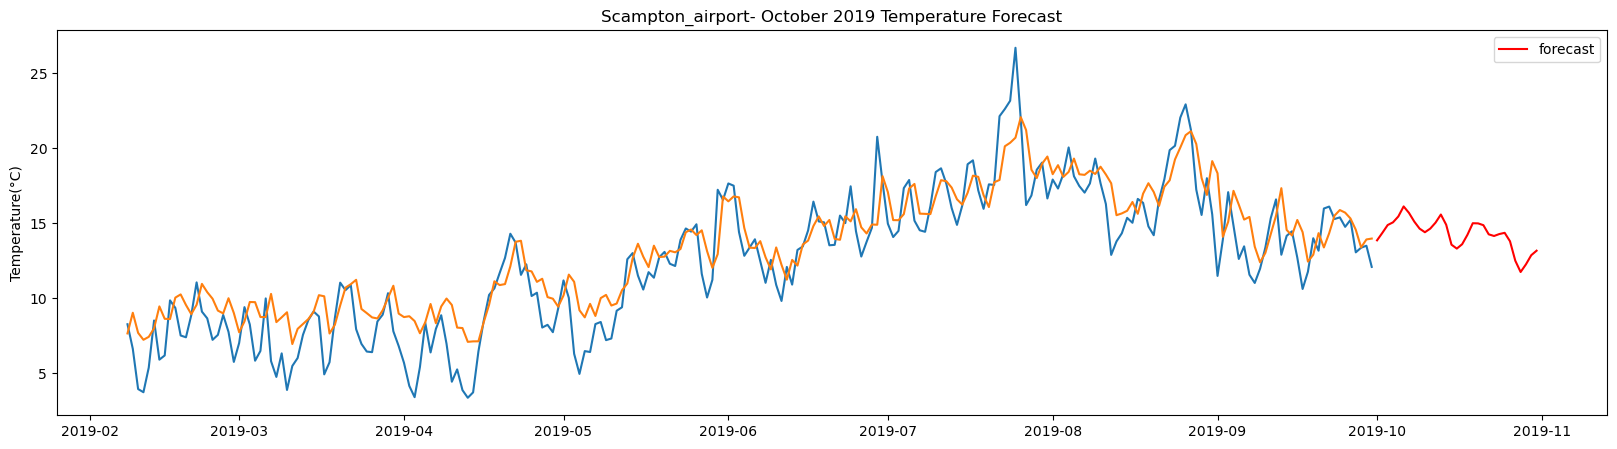

Shawbury_airport total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 2ms/step
Test R-squared is: 0.797613
1/1 [==============================] - 0s 24ms/step


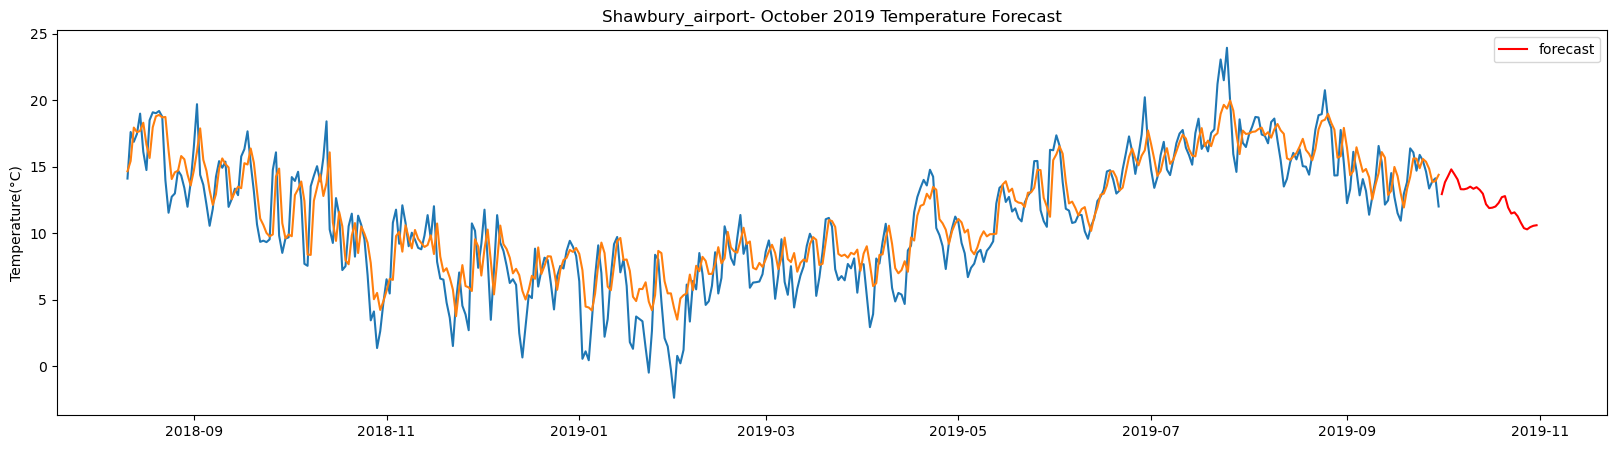

Southend_on_Sea_AWS total samples:  3648
Training samples:  3283
Testing samples:  365
8/8 [==============================] - 1s 2ms/step
Test R-squared is: 0.879167
1/1 [==============================] - 0s 24ms/step


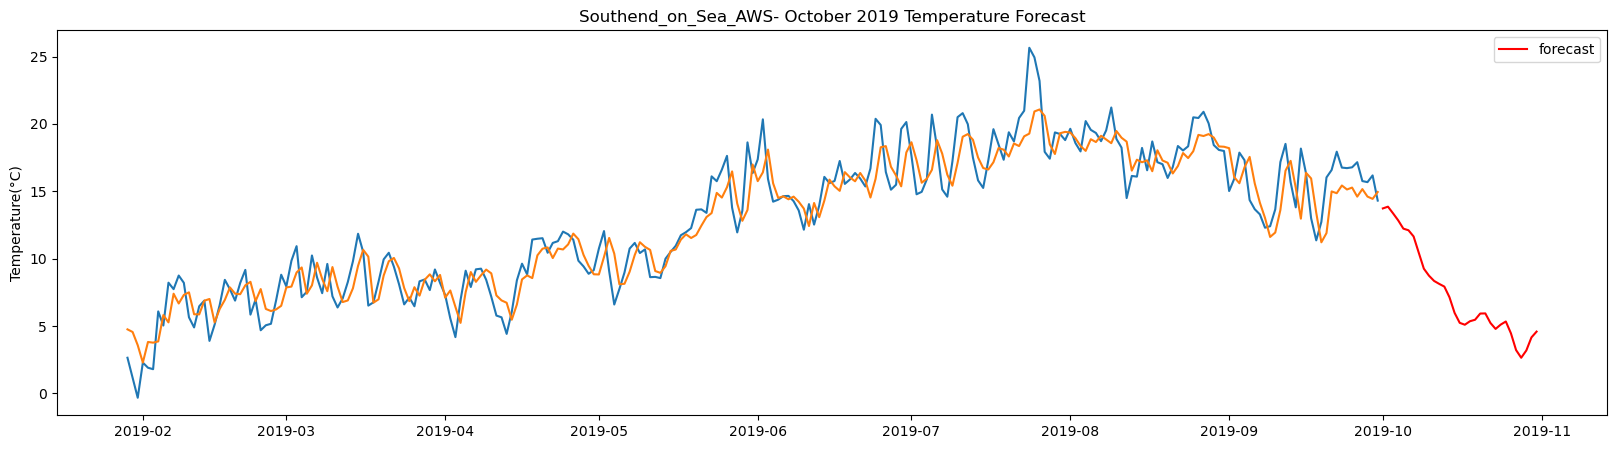

Stansted_airport total samples:  2556
Training samples:  2300
Testing samples:  256
5/5 [==============================] - 1s 2ms/step
Test R-squared is: 0.555955
1/1 [==============================] - 0s 25ms/step


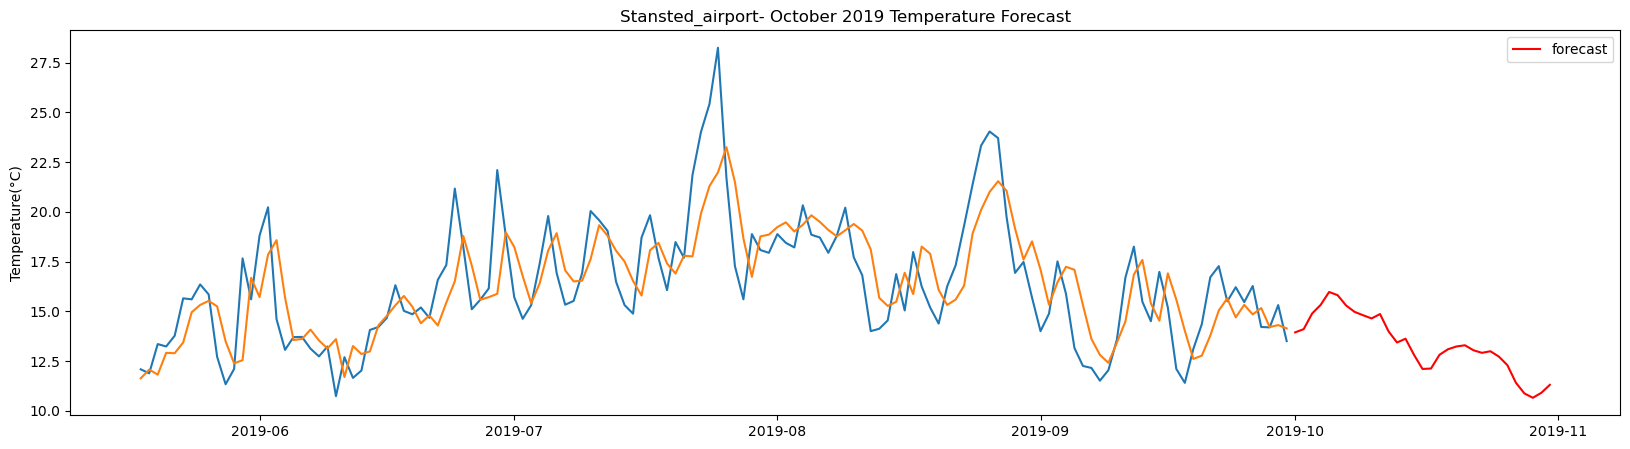

Wittering_airport total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 2ms/step
Test R-squared is: 0.808937
1/1 [==============================] - 0s 24ms/step


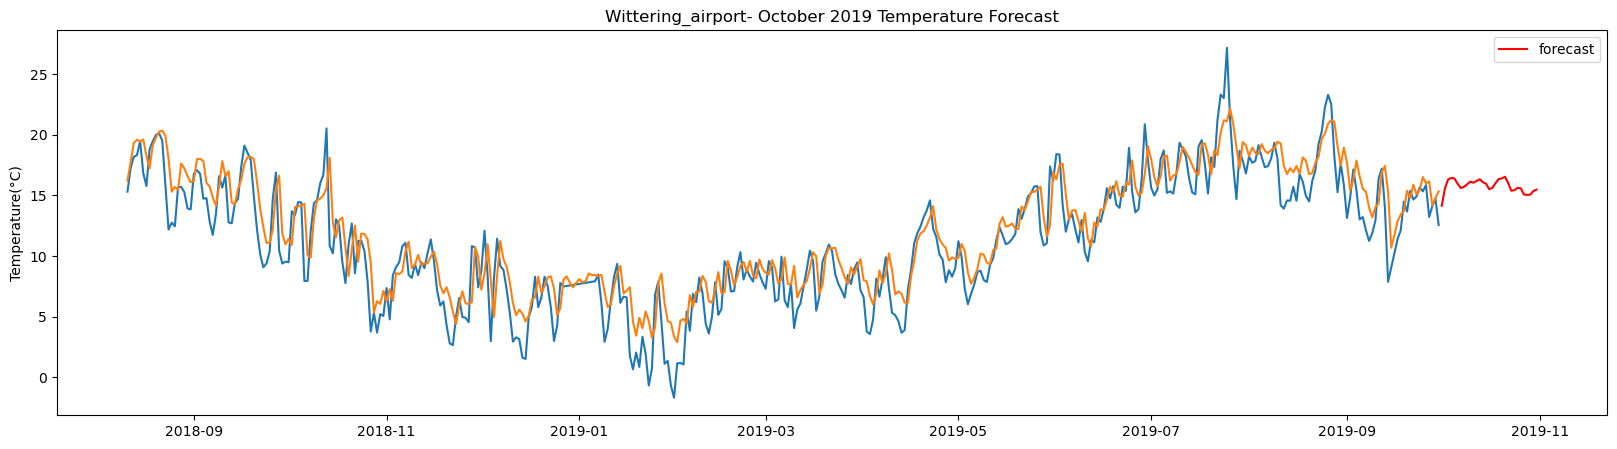

Yeovilton_airport total samples:  5355
Training samples:  4819
Testing samples:  536
13/13 [==============================] - 1s 2ms/step
Test R-squared is: 0.820970
1/1 [==============================] - 0s 22ms/step


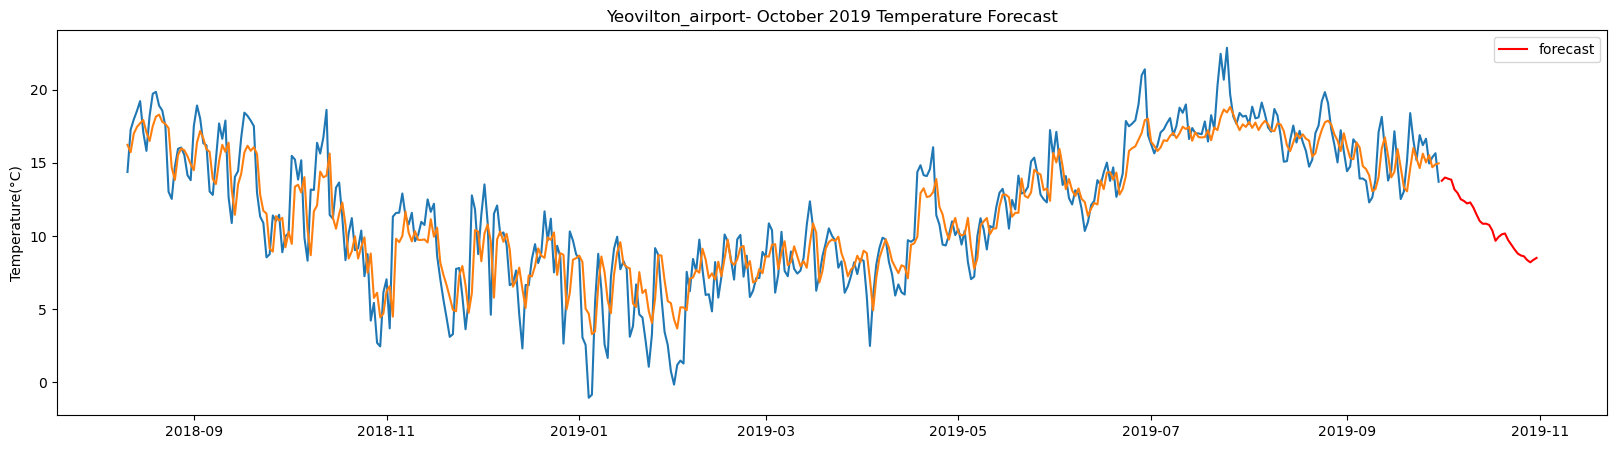

CPU times: total: 20min 45s
Wall time: 13min 56s


In [31]:
%%time
# Fitting and forecast using LSTM  -- output of train loss and valid loss is turned off
lstm_prediction = england_temp_lstm(all_station_temp,120,31)

The result above returns the model metric of R-squared for the test data for each weather station followed by visualization of the actual past observations and the output predicted by the model for the same observation and the monthly forecast of October,2019. Here the past observed temperatures is in Blue, validation is in Orange and forecast is in Red. It is observed that the data is fitted reasonably with high accuracy for most of the stations. 

#### Temperature forecasted by LSTM model <a class="anchor" id="12"></a>

The forecasted temperature for the weather stations by the model is as follows:   

In [32]:
# 30 days of forecast for October,2019 obtained from the LSTM model for each weather stations
lstm_prediction.head()

Albemarle  Begwary  Birmingham_airport  Blackpool_airport  \
2019-10-01      11.00    13.69               13.58              14.17   
2019-10-02      11.24    14.07               14.53              14.68   
2019-10-03      11.64    14.77               15.52              15.11   
2019-10-04      12.05    14.57               15.88              15.40   
2019-10-05      12.38    14.95               15.71              15.28   

            Boulmer_airport  Bournemouth_airport  BrizeNorton_airport  \
2019-10-01            15.57                14.21            14.600000   
2019-10-02            15.81                14.41            15.700000   
2019-10-03            16.00                14.67            16.360001   
2019-10-04            16.00                14.43            16.490000   
2019-10-05            16.16                14.17            16.620001   

            Cardiff_airport  Carlisle     Crosby  ...  Norwich_airport  \
2019-10-01        15.630000     12.13  15.400000  ...        14.170000   
2019-10-02        16.120001     12.99  16.379999  ...        15.000000   
2019-10-03        16.490000     13.75  17.129999  ...        15.780000   
2019-10-04        16.719999     13.91  17.590000  ...        15.730000   
2019-10-05        16.650000     14.41  17.570000  ...        16.110001   

            Nottingham  Plymouth_weatherstation  Rostherne  Scampton_airport  \
2019-10-01       12.40                    14.09      12.69             13.85   
2019-10-02       12.35                    13.97      13.09             14.35   
2019-10-03       12.96                    13.70      13.75             14.87   
2019-10-04       12.58                    13.26      14.07             15.05   
2019-10-05       12.15                    12.89      14.01             15.44   

            Shawbury_airport  Southend_on_Sea_AWS  Stansted_airport  \
2019-10-01             12.95                13.73             13.94   
2019-10-02             13.84                13.86             14.10   
2019-10-03             14.31                13.36             14.89   
2019-10-04             14.81                12.84             15.32   
2019-10-05             14.44                12.23             15.97   

            Wittering_airport  Yeovilton_airport  
2019-10-01          14.150000              13.77  
2019-10-02          15.580000              13.99  
2019-10-03          16.309999              13.91  
2019-10-04          16.430000              13.84  
2019-10-05          16.389999              13.18  

[5 rows x 29 columns]

The table above gives the daily forecast for the month of October for each of the 29-location using LSTM. The columns indicate the location of the weather stations and the rows are the forecasted temperature in degree Celsius for each day of the month starting from 2019-10-01.

### Support Vector Machine <a class="anchor" id="13"></a>

Support Vector Machine was first proposed by Vladimir Vapnik as a binary linear classifier in 1963 which was further developed in 1992 to a non linear classifier. This algorithm classifies data by creating hyperplanes between different classes using the maximal margin method. The maximum margin represented as epsilon(ε) is the maximum separation distance(2ε) that can be achieved between the nearest data points of the two classes. These data points which are critical for the hyperplane are known as support vectors. 

This study being a regression problem, here its regression variant also known as [Support Vector Regression (SVR)](https://papers.nips.cc/paper/1238-support-vector-regression-machines.pdf) is used, which was proposed in 1996 by Vapnik .et.al, suitable for regression in high dimensionality space. The algorithm uses the same maximal margin principle but instead of separating classes it creates a tube with a radius of epsilon(ε) to include the data points. The primary parameters for SVR are the kernel function and its coefficient required to map the data points to a higher dimension space, epsilon(ε) or tube radius, and C or cost as penalty.          

In the second method this machine learning algorithm of Support Vector Regression (SVR) is applied to compare performances by the deep learning framework, since it is suitable for fitting high dimensional data with comparatively fewer samples.


Accordingly a function is first created which would first receive the time series data, followed by fitting it using the ML model and forecasting daily for the month of October, 2019. 

The support vector regression here uses a radial basis function or rbf as the kernel, a moderate cost value of C=10 and an epsilon of 0.001. These are the critical parameters for the svr model, which can be further tuned for better result. This is then fitted on the train set and predicted on the test set, with accuracy of the fit measured in terms of R-squared.

In [33]:
# fitting & Validating using SVR
def fit_svr(X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array):
    model_svr = SVR(kernel='rbf', gamma='auto', tol=0.001, C=10.0, epsilon=0.001)
    model_svr.fit(X_train_tract1_array,y_train_tract1_array)
    y_pred_train_tract1 = model_svr.predict(X_train_tract1_array)
    y_pred_test_tract1 = model_svr.predict(X_test_tract1_array)        
    print('r-square_SVR_Test: ', round(model_svr.score(X_test_tract1_array,y_test_tract1_array),2))
    return model_svr, y_pred_test_tract1   

The forecasted value on the test set using the fitted model is estimated and included with the actual observed temperatures set for visualization

In [34]:
# validation result  
def valid_result_svr(scaler, y_pred_test_tract1, station_value, split_row, lag):
    new_test_tract1 = station_value.iloc[split_row:]
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    y_pred_test_tract1_transformed = scaler.inverse_transform([y_pred_test_tract1])
    y_pred_test_tract1_transformed_reshaped = np.reshape(y_pred_test_tract1_transformed,(y_pred_test_tract1_transformed.shape[1],-1))
    test_tract1_pred['Forecast'] = np.array(y_pred_test_tract1_transformed_reshaped)
    return test_tract1_pred

Once the model is validated the fitted model is used to forecast temperature for user input days using past data. This is also estimated using one day walk forward method as mentioned in case of LSTM.

In [35]:
# multi-step future forecast
def forecast_svr(X_test_tract1_array, days ,model_svr, lag, scaler):
    last_test_sample = X_test_tract1_array[-1]        
    X_last_test_sample = np.reshape(last_test_sample,(-1,X_test_tract1_array.shape[1]))        
    y_pred_last_sample = model_svr.predict(X_last_test_sample)                
    new_array = X_last_test_sample
    new_predict = y_pred_last_sample
    new_array = X_last_test_sample
    new_predict = y_pred_last_sample

    seven_days_svr=[]
    for i in range(0,days):               
            new_array = np.insert(new_array, 0, new_predict)                
            new_array = np.delete(new_array, -1)
            new_array_reshape = np.reshape(new_array, (-1,lag))                
            new_predict = model_svr.predict(new_array_reshape)
            temp_predict = scaler.inverse_transform([new_predict])
            seven_days_svr.append(temp_predict[0][0].round(2))
            
    return seven_days_svr 

All the above methods are finally included in the main function which will take three input of the historical temperature data, number of lag data to be used and the number of days to be forecasted. 

In [36]:
def england_temp_svr(all_station_temp, lag, days):     
    
    seven_day_forecast_svr = create_dates('2019-09-30',days)
    
    for i in range(len(all_station_temp.columns)):
        
        # preprocessing
        station_value, station_name = get_value_name(all_station_temp,i)       
        train_tract1, test_tract1, split_row = train_test_split(station_value, station_name, 0.80)              
        train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1)        
        train_tract1 = timeseries_feature_builder(train_tract1_scaled_df,lag+1)
        test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)        
        X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1,
                                                                                                           test_tract1)

        # SVR modeling
        model_svr, y_pred_test_tract1 = fit_svr(X_train_tract1_array, y_train_tract1_array,
                                                X_test_tract1_array, y_test_tract1_array)                       
        test_tract1_pred = valid_result_svr(scaler, y_pred_test_tract1, station_value, split_row, lag)        
        seven_days_svr = forecast_svr(X_test_tract1_array, days, model_svr, lag, scaler)            
        seven_day_forecast_svr[station_name] = np.array(seven_days_svr)        
        
        # plot result
        plt.figure(figsize=(20,5))
        plt.plot(test_tract1_pred)
        plt.plot(seven_day_forecast_svr[station_name], color='red', label='forecast') 
        plt.ylabel('Temperature(°C)')
        plt.legend(loc='upper right')
        plt.title(station_name + '- October 2019 Temperature Forecast')
        plt.show()    
        
    return(seven_day_forecast_svr)

The function is now called on the same temperature dataset and outputs are recorded. It is given three input: first the historic temperature dataset, the number of lagged terms to be used for prediction and finally the number of days of forecasting.   

Albemarle total samples:  3648
Training samples:  2918
Testing samples:  730
r-square_SVR_Test:  0.82


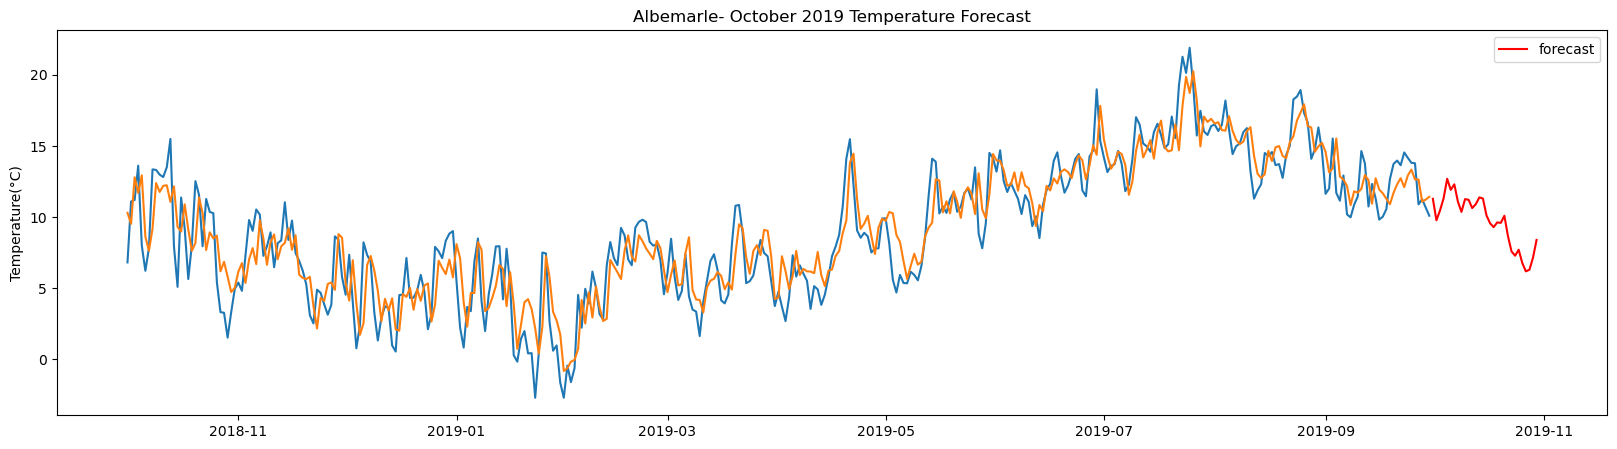

Begwary total samples:  3648
Training samples:  2918
Testing samples:  730
r-square_SVR_Test:  0.84


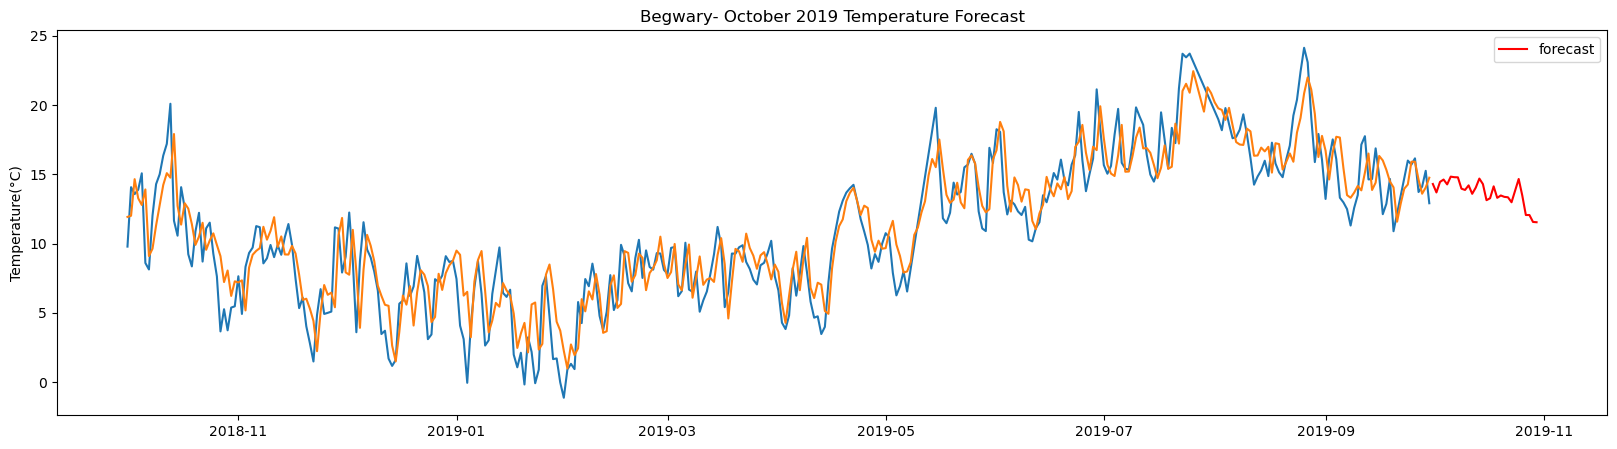

Birmingham_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.51


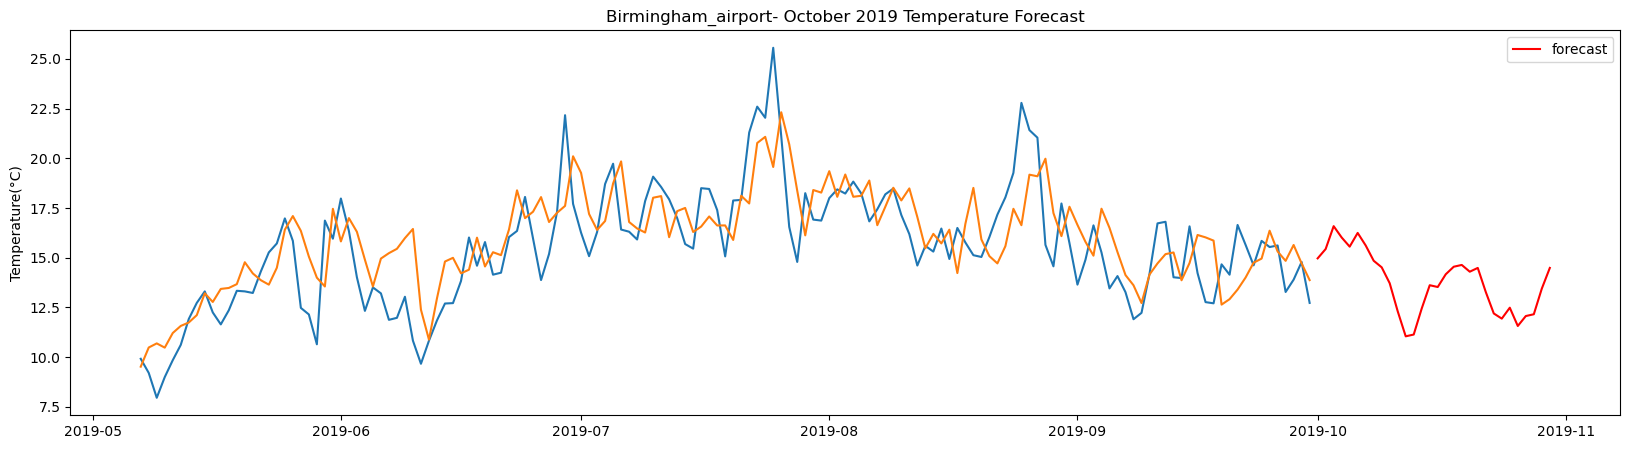

Blackpool_airport total samples:  3501
Training samples:  2800
Testing samples:  701
r-square_SVR_Test:  0.87


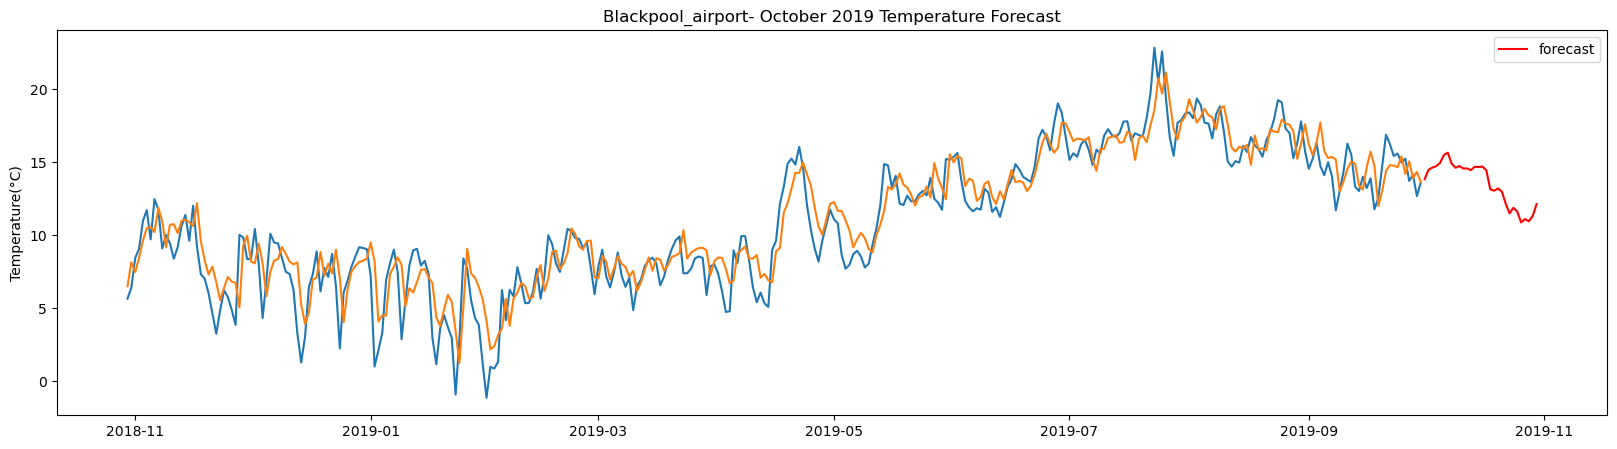

Boulmer_airport total samples:  5302
Training samples:  4241
Testing samples:  1061
r-square_SVR_Test:  0.83


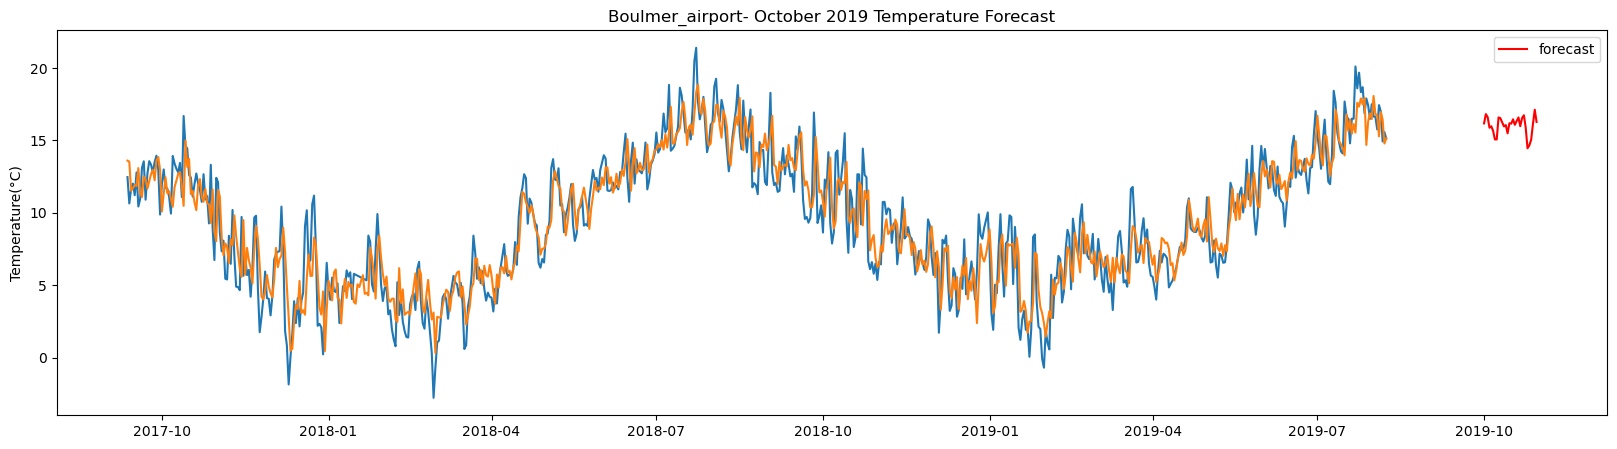

Bournemouth_airport total samples:  3648
Training samples:  2918
Testing samples:  730
r-square_SVR_Test:  0.8


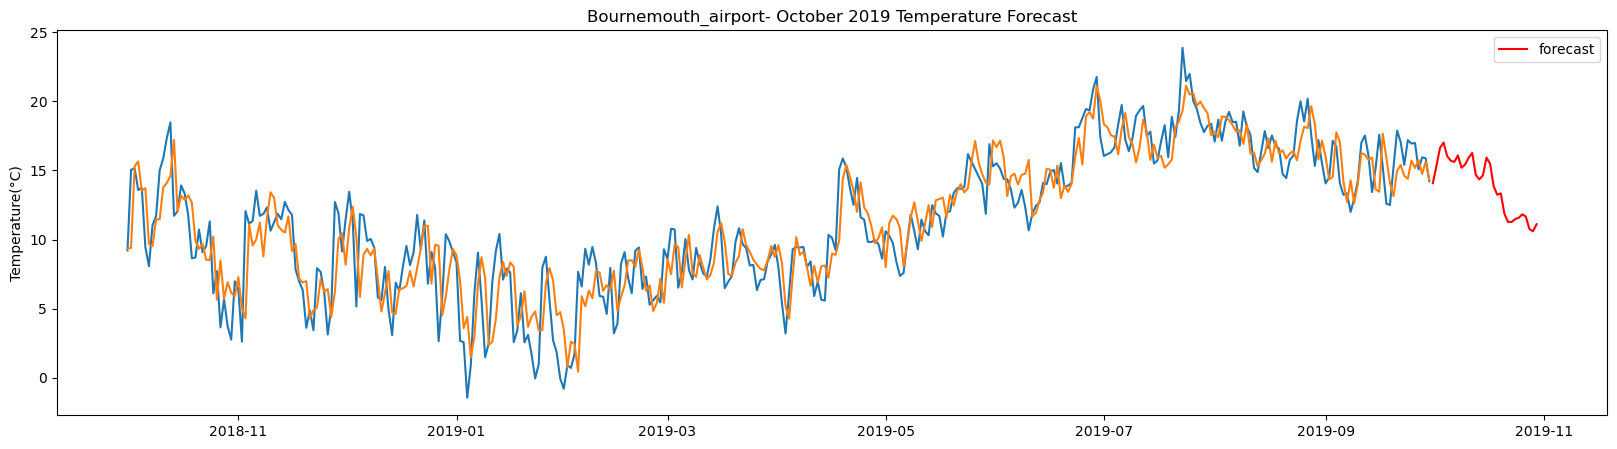

BrizeNorton_airport total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.87


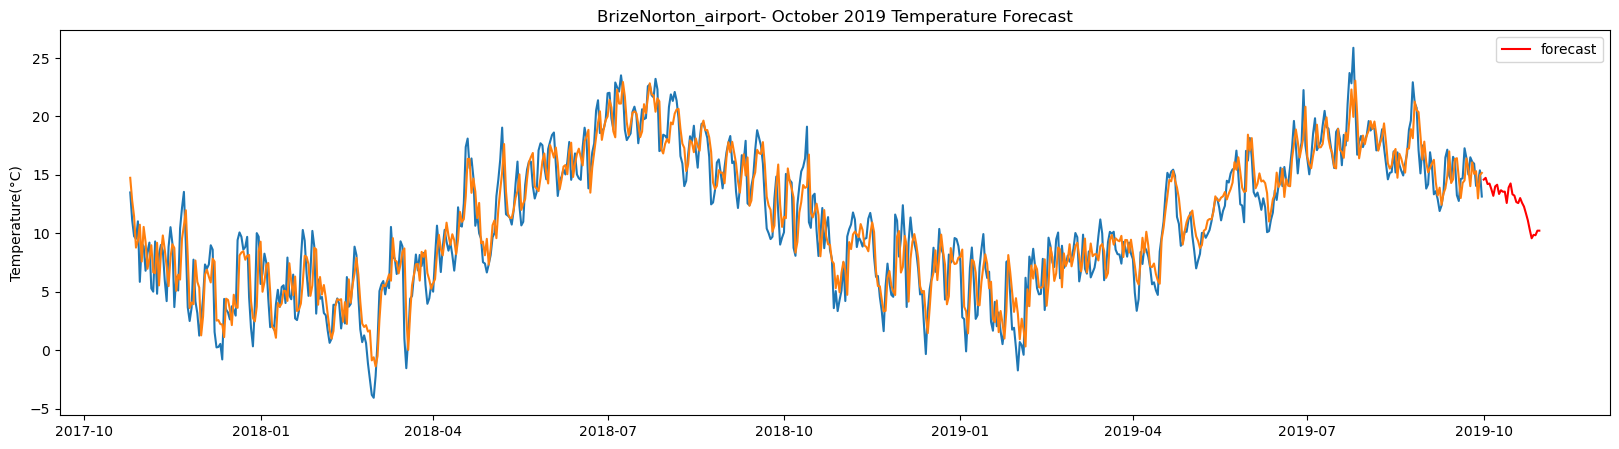

Cardiff_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.61


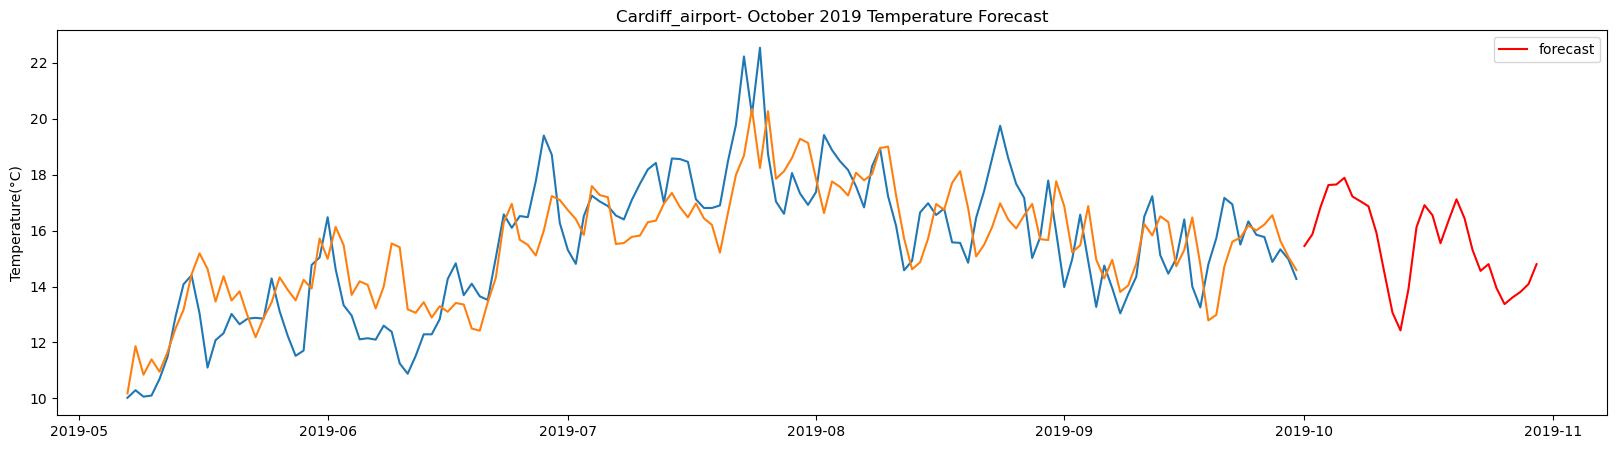

Carlisle total samples:  3529
Training samples:  2823
Testing samples:  706
r-square_SVR_Test:  0.8


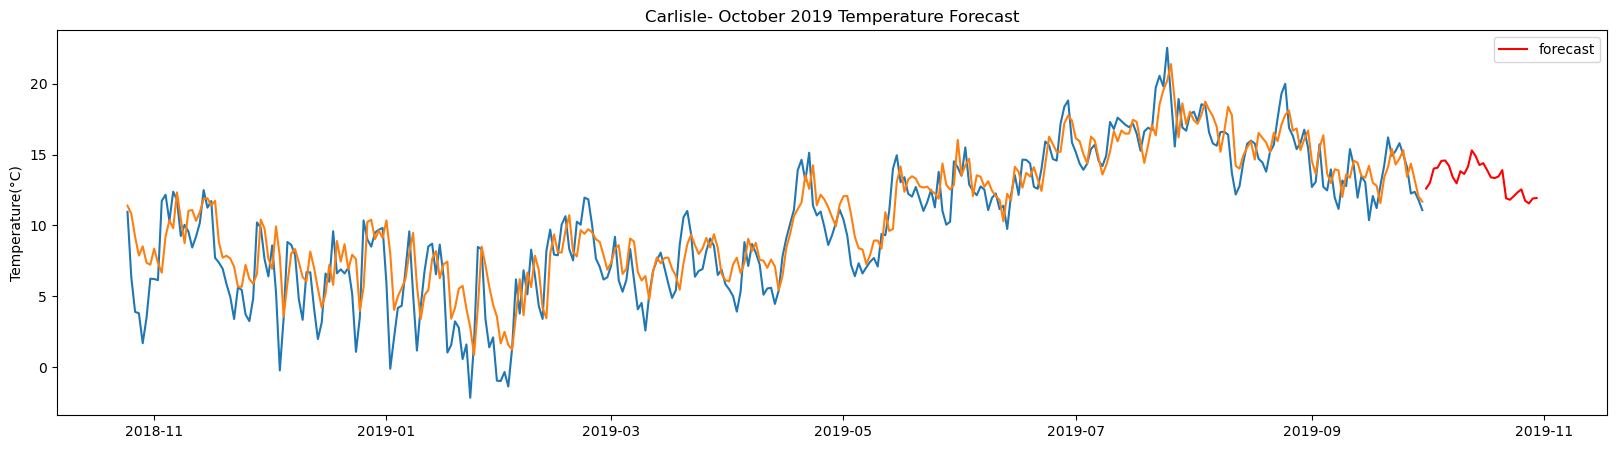

Crosby total samples:  3648
Training samples:  2918
Testing samples:  730
r-square_SVR_Test:  0.85


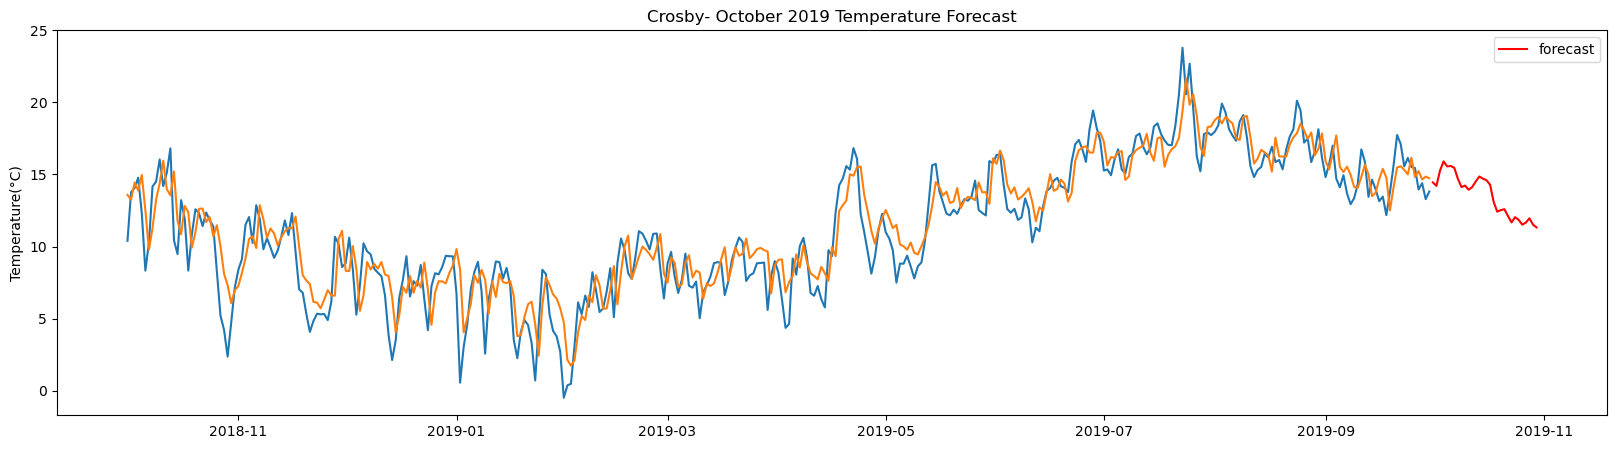

Culdrose_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.76


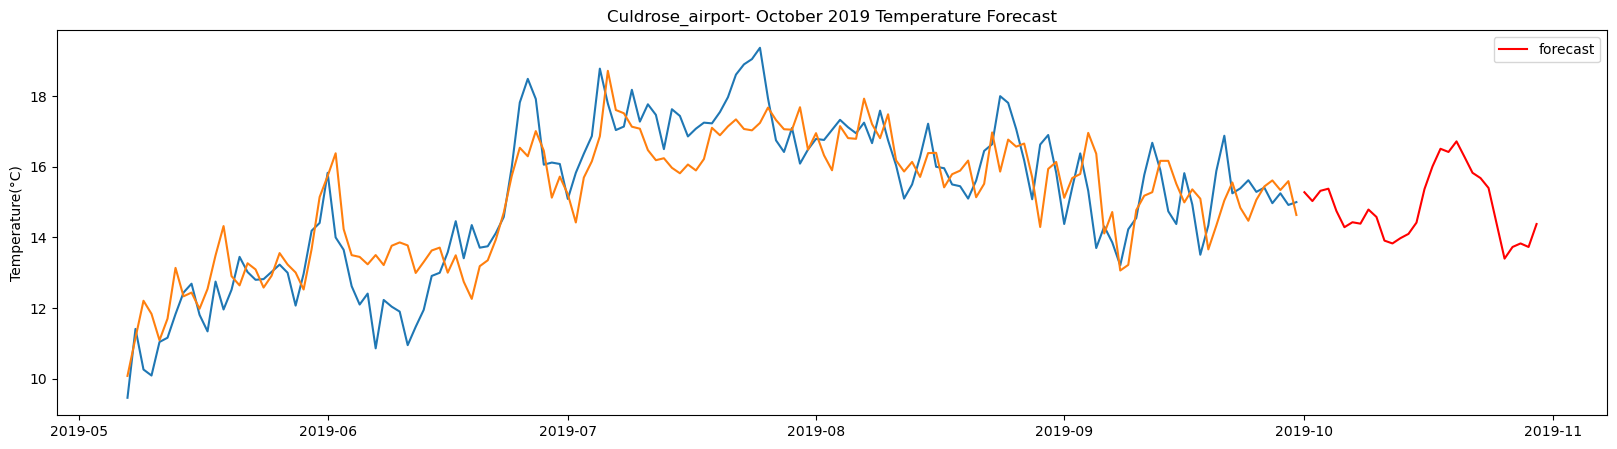

DurhamTeesValley_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.61


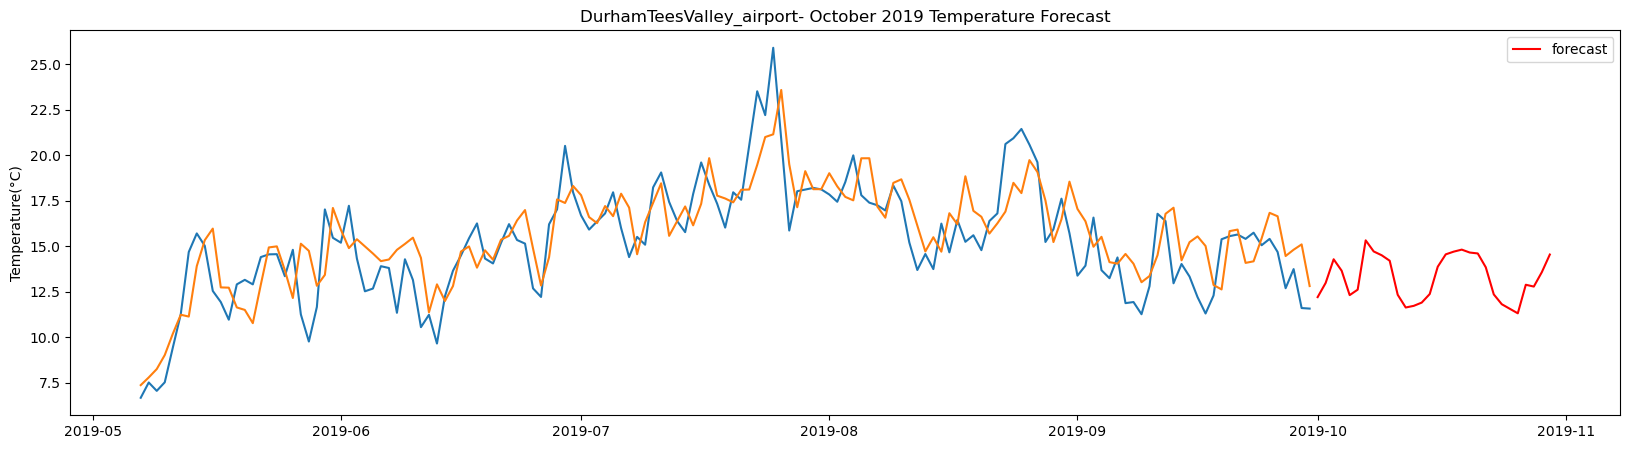

Exeter_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.5


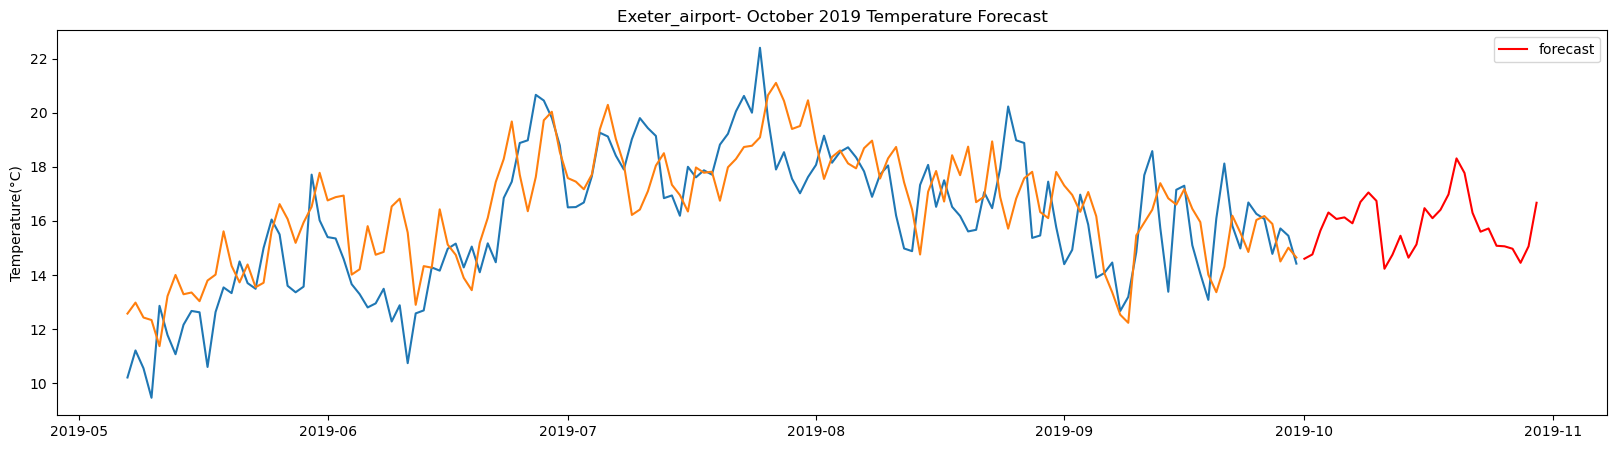

Leconfield_airport total samples:  2555
Training samples:  2044
Testing samples:  511
r-square_SVR_Test:  0.51


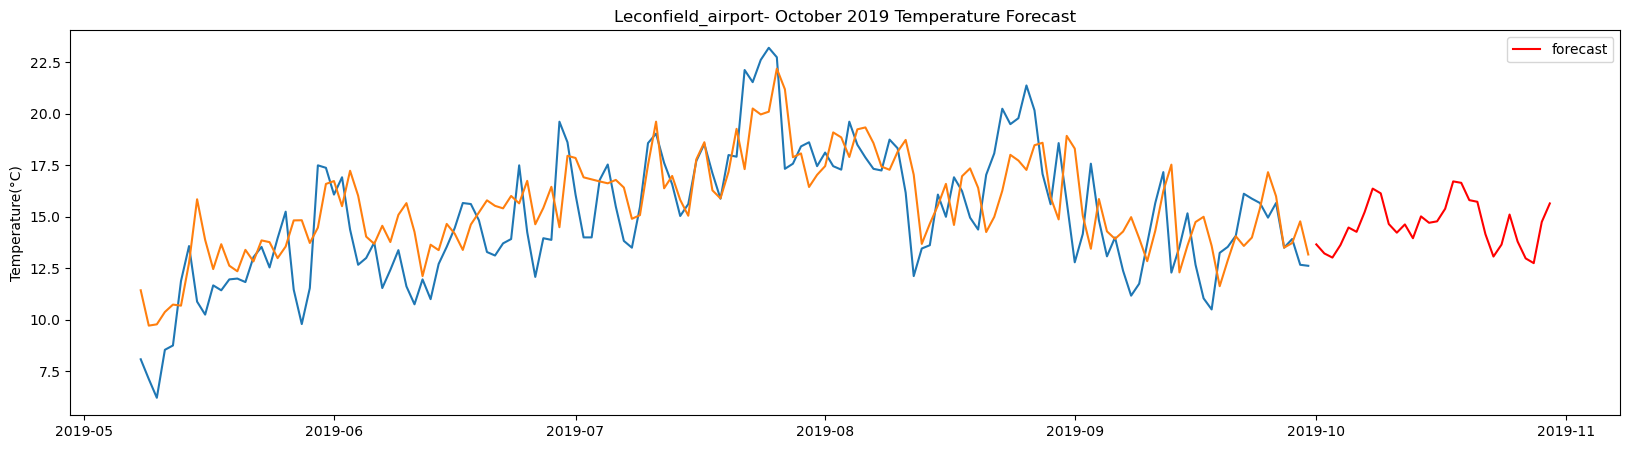

SpadeadamKingwater_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.62


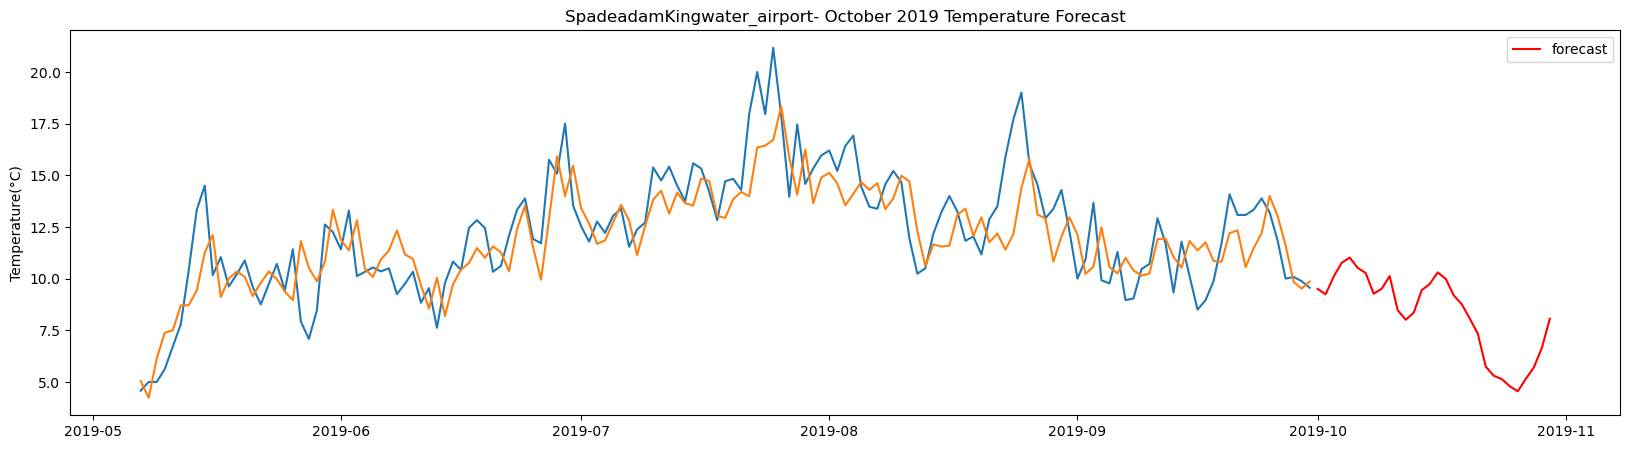

LeedsBradford_airport total samples:  2922
Training samples:  2337
Testing samples:  585
r-square_SVR_Test:  0.79


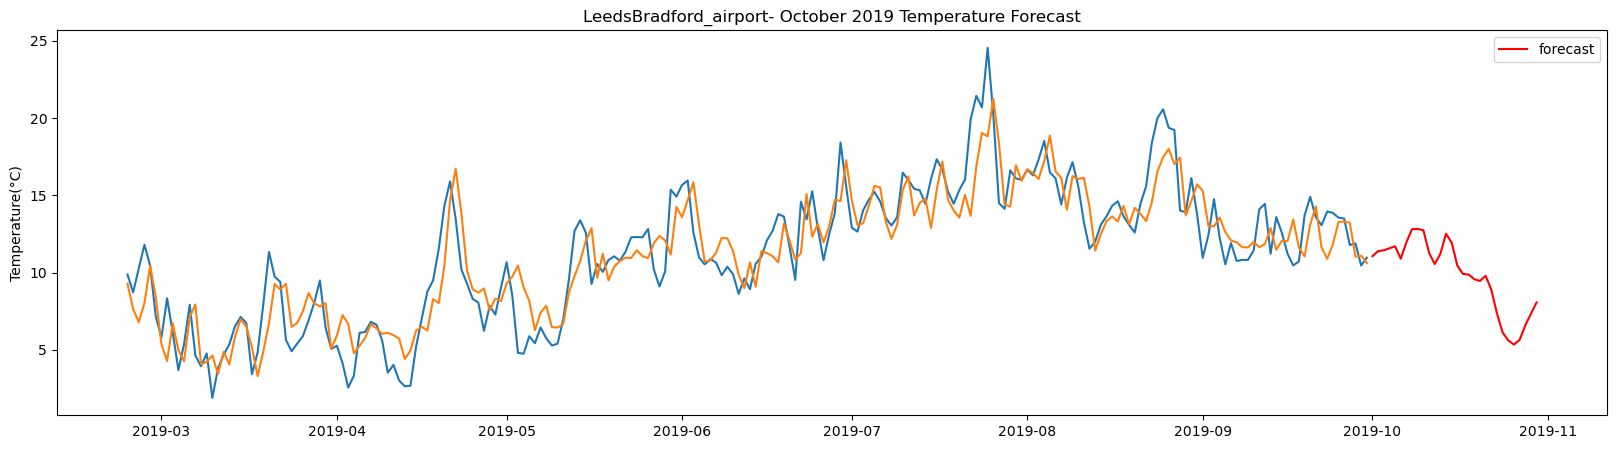

LondonCity_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.54


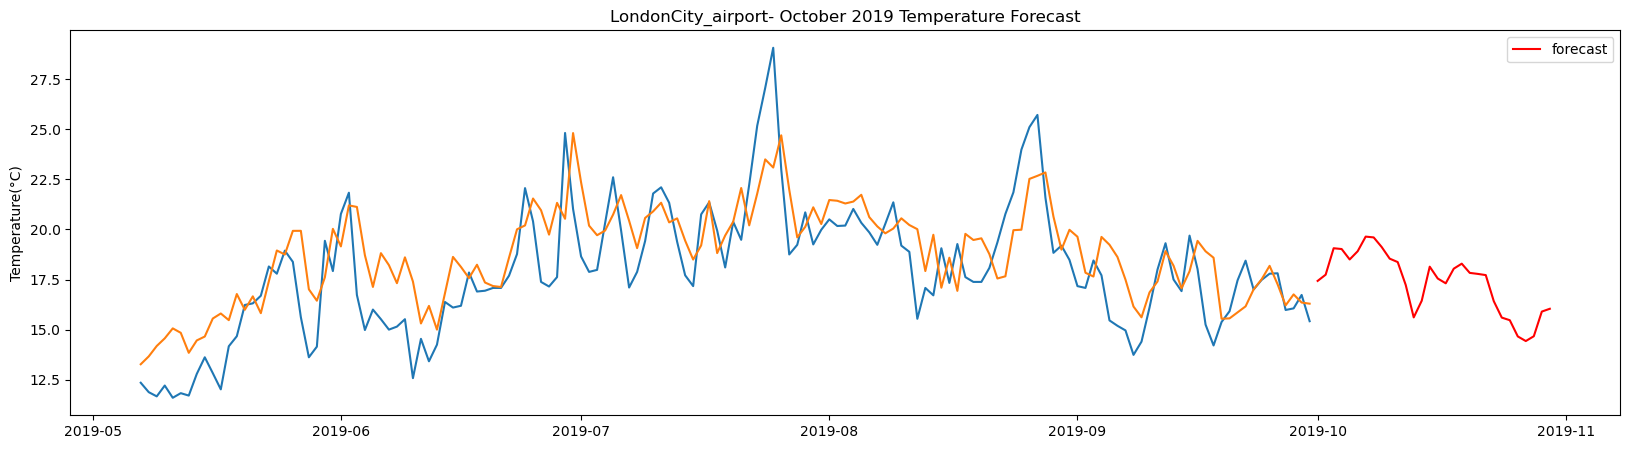

Lyneham_airport total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.87


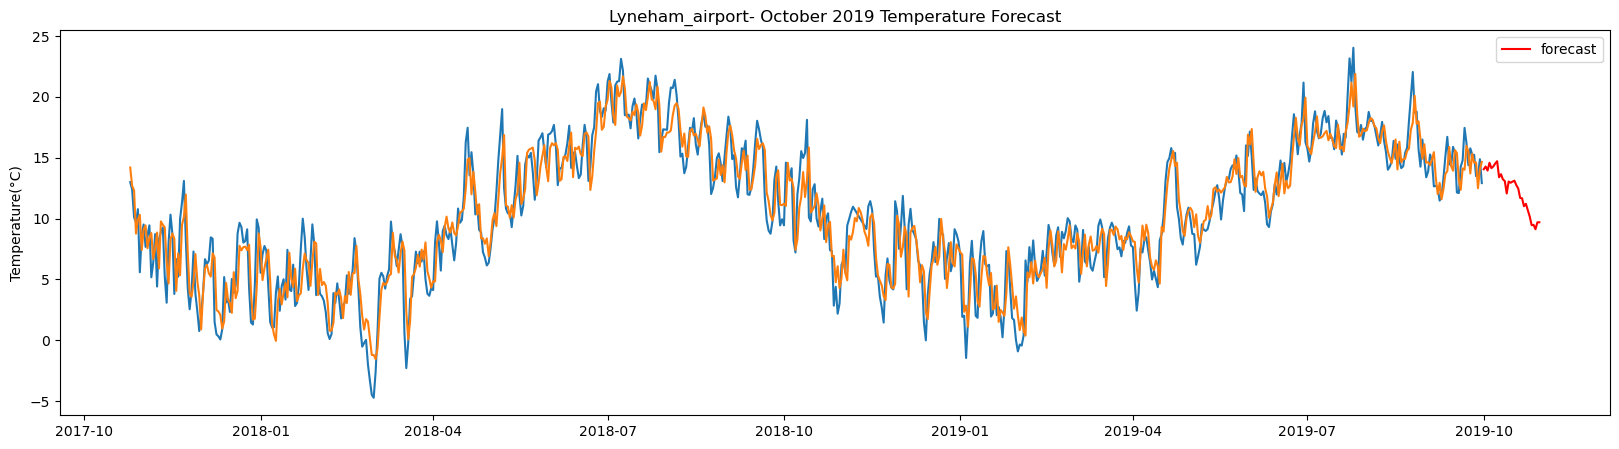

NewquayCornwall_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.64


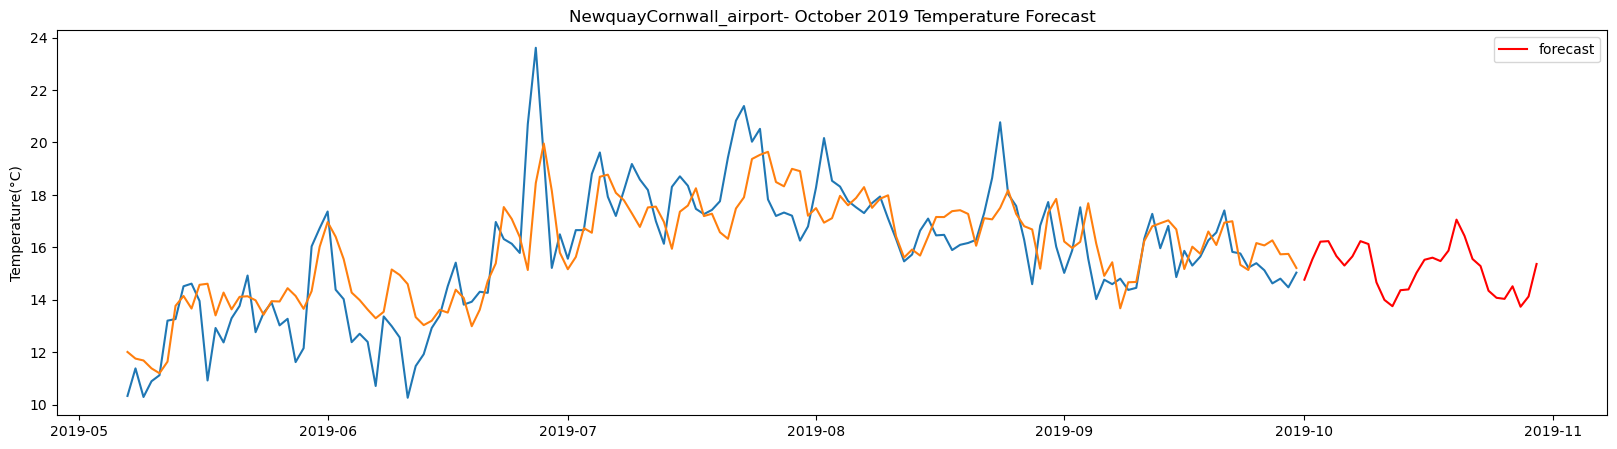

Norwich_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.54


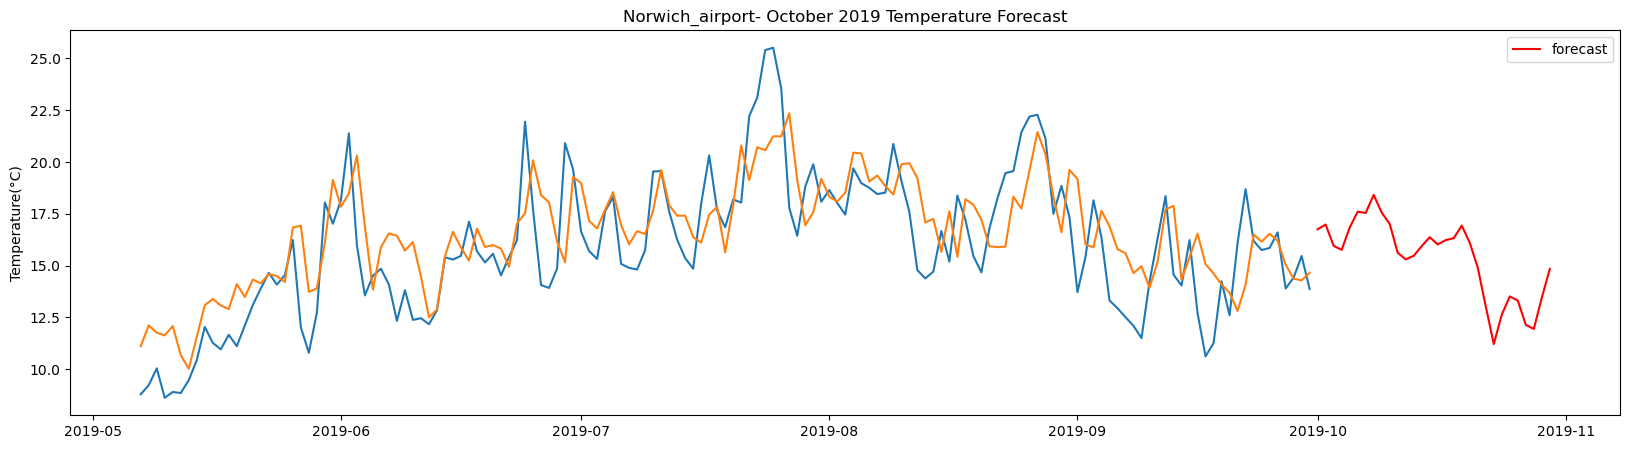

Nottingham total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.87


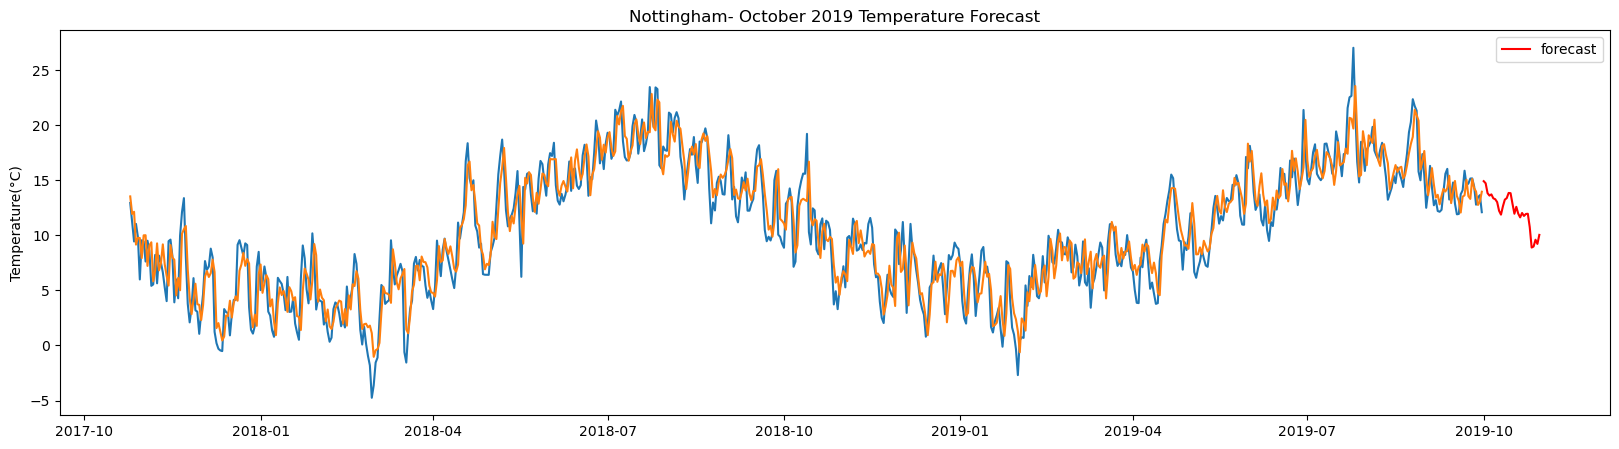

Plymouth_weatherstation total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.87


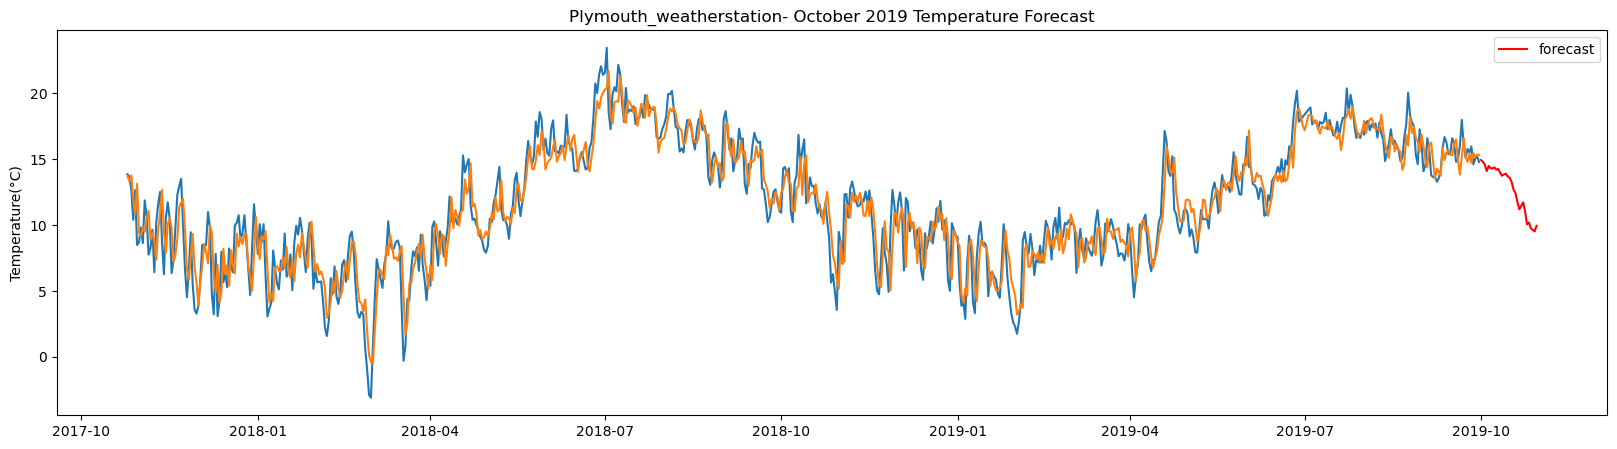

Rostherne total samples:  2495
Training samples:  1996
Testing samples:  499
r-square_SVR_Test:  0.5


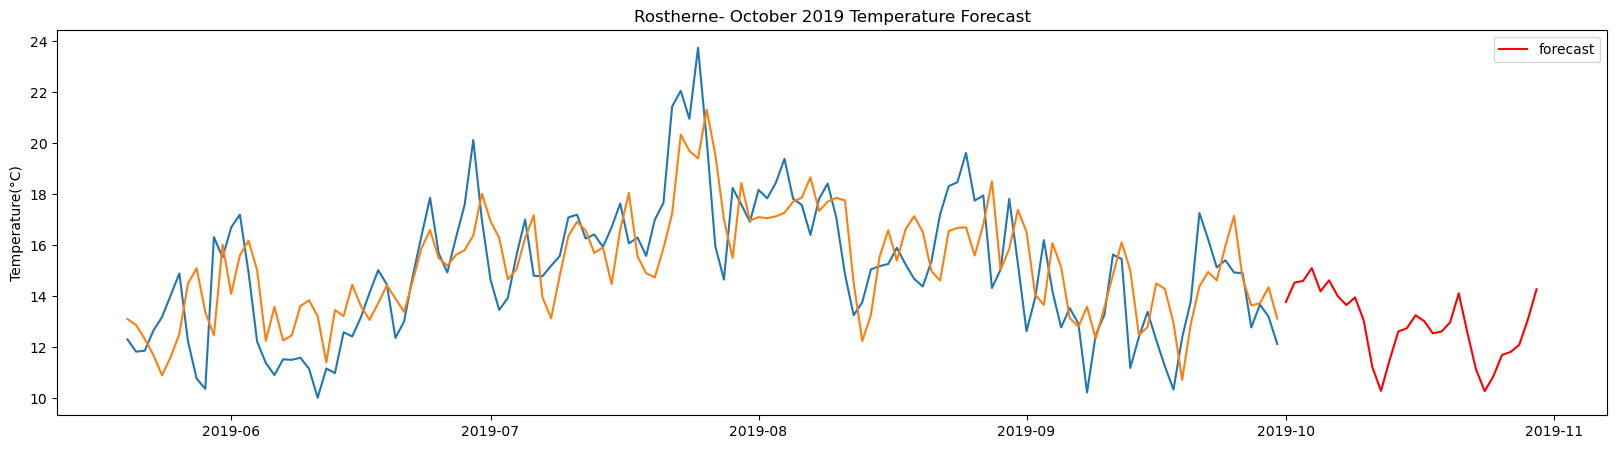

Scampton_airport total samples:  3543
Training samples:  2834
Testing samples:  709
r-square_SVR_Test:  0.79


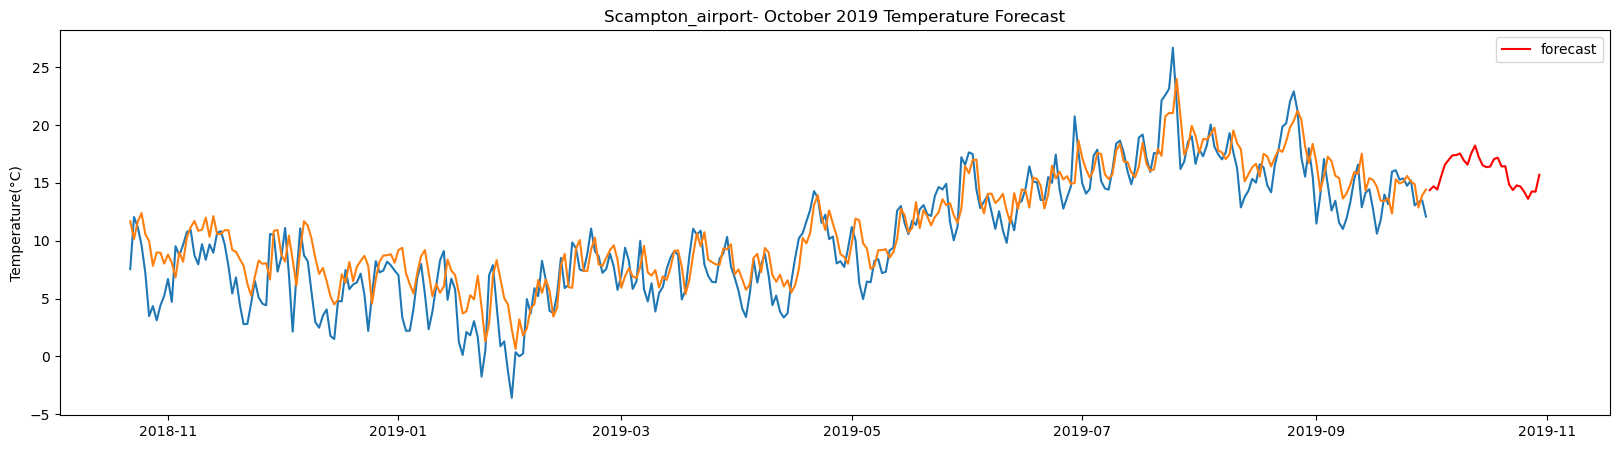

Shawbury_airport total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.84


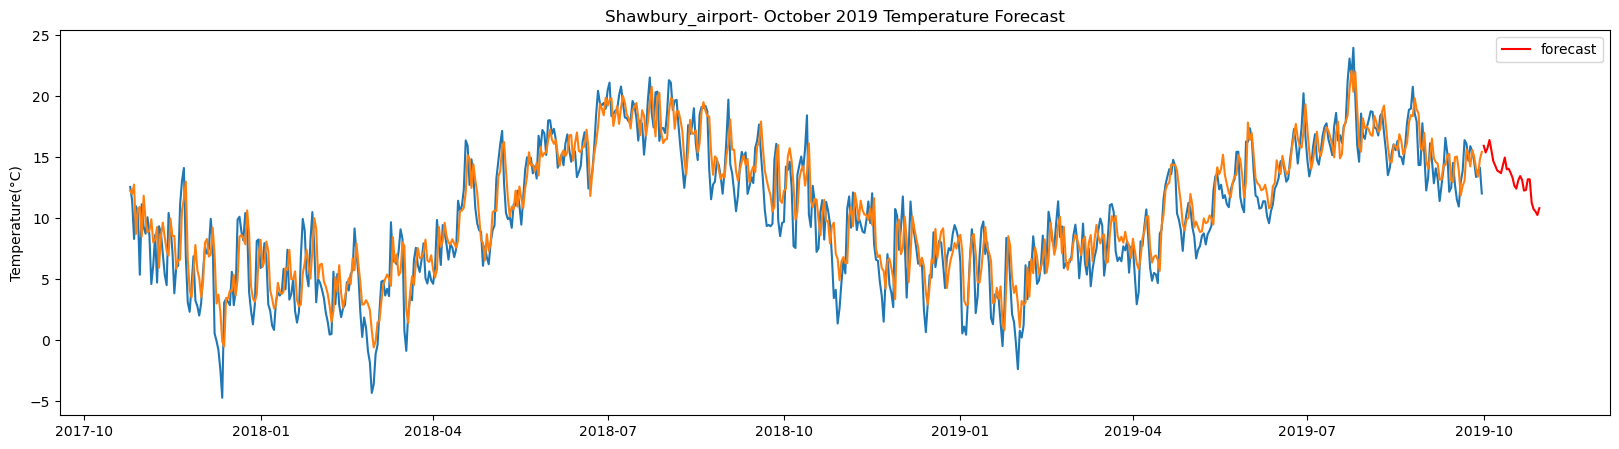

Southend_on_Sea_AWS total samples:  3648
Training samples:  2918
Testing samples:  730
r-square_SVR_Test:  0.86


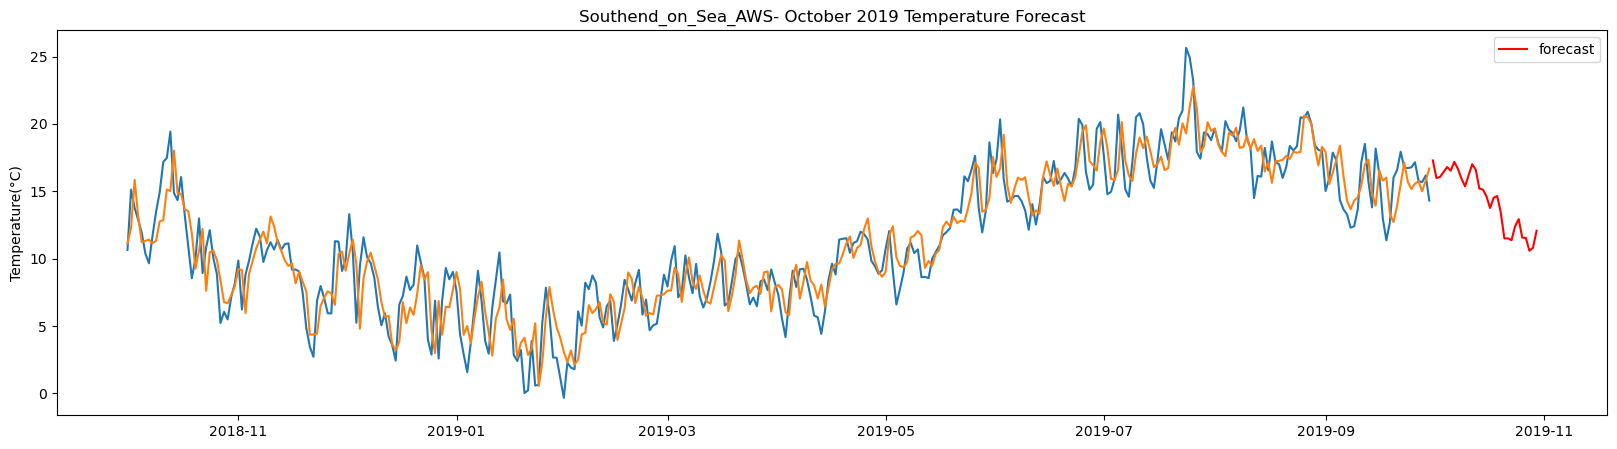

Stansted_airport total samples:  2556
Training samples:  2044
Testing samples:  512
r-square_SVR_Test:  0.53


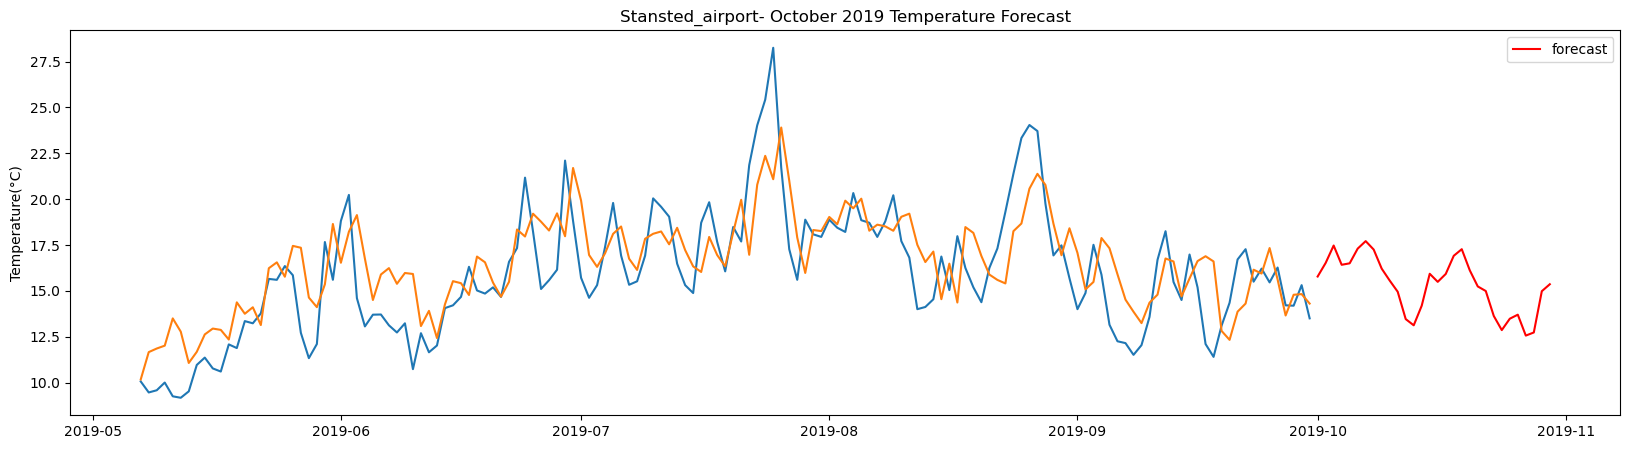

Wittering_airport total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.87


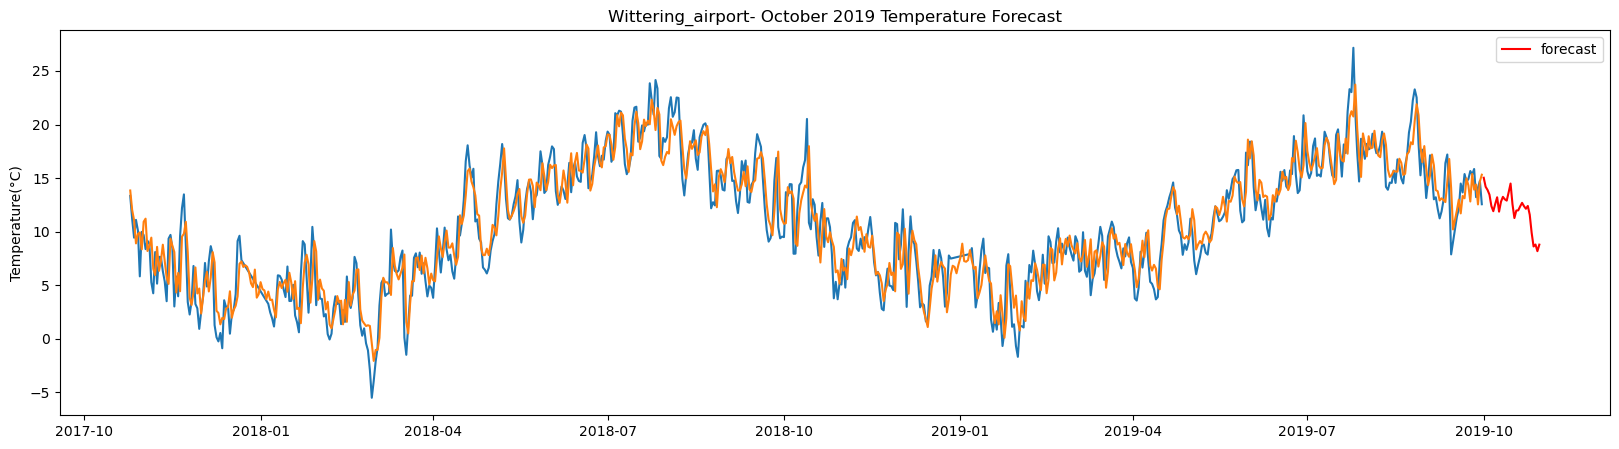

Yeovilton_airport total samples:  5355
Training samples:  4284
Testing samples:  1071
r-square_SVR_Test:  0.84


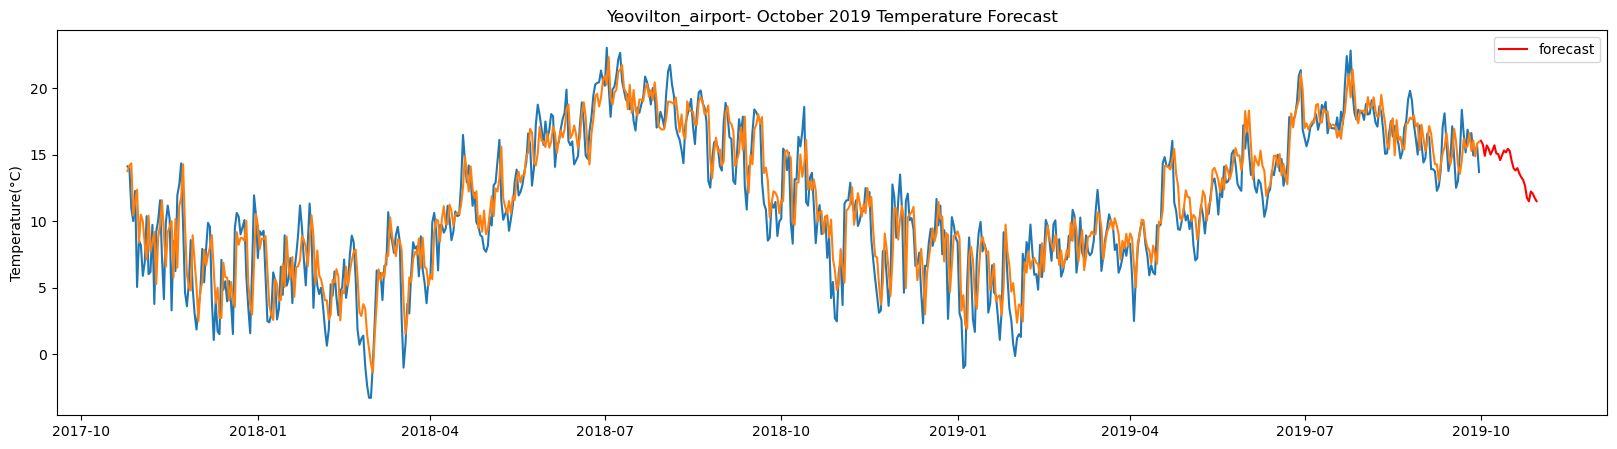

CPU times: total: 3min 13s
Wall time: 3min 13s


In [37]:
%%time
# Fitting and forecast using SVM
svr_prediction = england_temp_svr(all_station_temp, 365, 30)

In the above section the SVR model is trained on past time series data followed by forecasting temperature for the month of October,2019 for each of the stations. The results are plotted for each station with past observed temperatures in Blue, validation in Orange and forecast in Red. The validation closely matches the observed daily temperatures in most of the cases as also given by the test metrics of r-square with the highest values reaching up to 0.87 for the SVR model.    

#### Temperature forecasted by SVR model <a class="anchor" id="14"></a>
The output obtained by the above SVR model is visualized here which will now be processed to interpolate temperature for the whole of England. 

In [38]:
# Daily forecast obtained from the SVR model for each of the weather stations
svr_prediction.head()

Albemarle  Begwary  Birmingham_airport  Blackpool_airport  \
2019-10-01      11.29    14.30               14.97              13.83   
2019-10-02       9.78    13.69               15.44              14.48   
2019-10-03      10.47    14.45               16.59              14.63   
2019-10-04      11.32    14.62               16.02              14.73   
2019-10-05      12.70    14.27               15.56              14.95   

            Boulmer_airport  Bournemouth_airport  BrizeNorton_airport  \
2019-10-01            16.18                14.08                14.59   
2019-10-02            16.82                15.33                14.74   
2019-10-03            16.61                16.64                14.21   
2019-10-04            15.88                17.02                14.25   
2019-10-05            15.98                16.04                13.76   

            Cardiff_airport  Carlisle  Crosby  ...  Norwich_airport  \
2019-10-01            15.45     12.60   14.45  ...            16.75   
2019-10-02            15.87     13.01   14.21  ...            16.98   
2019-10-03            16.83     14.01   15.27  ...            15.95   
2019-10-04            17.63     14.07   15.91  ...            15.76   
2019-10-05            17.65     14.55   15.56  ...            16.83   

            Nottingham  Plymouth_weatherstation  Rostherne  Scampton_airport  \
2019-10-01       14.93                    14.93      13.77             14.37   
2019-10-02       14.74                    14.80      14.53             14.70   
2019-10-03       13.84                    14.56      14.60             14.43   
2019-10-04       13.62                    14.09      15.10             15.55   
2019-10-05       13.73                    14.48      14.19             16.57   

            Shawbury_airport  Southend_on_Sea_AWS  Stansted_airport  \
2019-10-01             15.93                17.29             15.78   
2019-10-02             15.38                15.99             16.52   
2019-10-03             15.76                16.06             17.47   
2019-10-04             16.40                16.43             16.42   
2019-10-05             15.57                16.80             16.50   

            Wittering_airport  Yeovilton_airport  
2019-10-01              15.03              16.06  
2019-10-02              14.19              15.77  
2019-10-03              13.89              14.92  
2019-10-04              13.45              15.71  
2019-10-05              12.39              15.46  

[5 rows x 29 columns]

## Temperature Interpolation for England <a class="anchor" id="15"></a>

Now the predictions obtained by the SVM method would be used for spatially mapping and estimating temperatures for the entire country for a certain day. Hence location of each weather station needs to be added to this table for the spatial operation. This is done in the following.    

In [39]:
# Change station names to index
england_temp_forecast = svr_prediction.transpose()
# Make station names to a column
england_temp_forecast_station = england_temp_forecast.reset_index()
england_temp_forecast_station = england_temp_forecast_station.rename(columns={'index':'Station'})
# Join forecast temperature data to weather station location using the Staion column
predicted_temp_by_station = pd.merge(england_temp_forecast_station, england_weather_stations_layer_sdf, left_on='Station', right_on='Station', how='left')
predicted_temp_by_station.head()

Station  2019-10-01 00:00:00  2019-10-02 00:00:00  \
0           Albemarle                11.29                 9.78   
1             Begwary                14.30                13.69   
2  Birmingham_airport                14.97                15.44   
3   Blackpool_airport                13.83                14.48   
4     Boulmer_airport                16.18                16.82   

   2019-10-03 00:00:00  2019-10-04 00:00:00  2019-10-05 00:00:00  \
0                10.47                11.32                12.70   
1                14.45                14.62                14.27   
2                16.59                16.02                15.56   
3                14.63                14.73                14.95   
4                16.61                15.88                15.98   

   2019-10-06 00:00:00  2019-10-07 00:00:00  2019-10-08 00:00:00  \
0                11.92                12.31                11.09   
1                14.83                14.79                14.78   
2                16.25                15.62                14.85   
3                15.49                15.65                14.91   
4                15.66                15.07                15.07   

   2019-10-09 00:00:00  ...  2019-10-25 00:00:00  2019-10-26 00:00:00  \
0                10.37  ...                 7.71                 6.78   
1                13.96  ...                14.66                13.47   
2                14.52  ...                12.49                11.57   
3                14.62  ...                11.62                10.88   
4                16.59  ...                14.46                14.66   

   2019-10-27 00:00:00  2019-10-28 00:00:00  2019-10-29 00:00:00  \
0                 6.19                 6.30                 7.15   
1                12.06                12.06                11.56   
2                12.07                12.16                13.45   
3                11.11                10.96                11.32   
4                15.04                16.14                17.12   

   2019-10-30 00:00:00  FID          Y         X  \
0                 8.40    1  55.016667 -1.866667   
1                11.54    2  52.216667 -0.483333   
2                14.49    3      52.45 -1.733333   
3                12.13    4  53.766667 -3.033333   
4                16.28    5    55.4203   -1.5997   

                                               SHAPE  
0  {"x": -207796.38285121127, "y": 7365101.445978...  
1  {"x": -53804.420512971476, "y": 6839396.777444...  
2  {"x": -192953.78400456344, "y": 6881903.804921...  
3  {"x": -337669.1220358203, "y": 7126089.0211904...  
4  {"x": -178077.78942199165, "y": 7443868.808735...  

[5 rows x 35 columns]

### Result Visualization <a class="anchor" id="16"></a>

Now the table above gives the daily temperature forecast for the month of October,2019 for all the 29 weather stations in England, with location of each station. Out of these predictions the first day of October is selected for creating a probable temperature surface for the entire country.

In [40]:
# Select the first day out 
oct1st_temp = predicted_temp_by_station.iloc[:, [0,1,33,32]]
oct1st_temp = oct1st_temp.rename(columns={oct1st_temp.columns[1]:'temp_pred'})
oct1st_temp.head()

Station  temp_pred         X          Y
0           Albemarle      11.29 -1.866667  55.016667
1             Begwary      14.30 -0.483333  52.216667
2  Birmingham_airport      14.97 -1.733333      52.45
3   Blackpool_airport      13.83 -3.033333  53.766667
4     Boulmer_airport      16.18   -1.5997    55.4203

The data is now converted into a spatial data frame in the following. 

In [41]:
# convert dataframe to a spatial dataframe
sdf = oct1st_temp.spatial.from_xy(df=oct1st_temp, sr=4326, x_column='X', y_column='Y')
# create feature layer from the spatial dataframe
oct1st_temp_points = gis.content.import_data(sdf, title='eng_temp_points')

In [42]:
oct1st_temp_points

<Item title:"eng_temp_points" type:Feature Layer Collection owner:MMajumdar_geosaurus>

The [interpolate_points](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html?highlight=interpolate%20points#arcgis.features.analysis.interpolate_points) method from the ArcGIS API for Python allows us to predict values at new locations based on measurements from a collection of points. The method takes point data with values at each point and returns areas classified by predicted values. 

For example, we are using interpolate_points tool to estimate temperature of England.
The input parameters required for the tool are:
- `input_layer`: feature layer having the predicted temperature for all the weather stations
- `interpolate_options` specify the speed v/s accuracy on a range of 1 to 9 with 9 as the maximum accuracy
- `field` indicates the column name in the feature layer which has the predicted temperatures
- `bounding_polygon_layer` here is the England boundary shapefile which sets the boundary within which the spatial interpolation would be estimated
- `output_name` the name of the resulting output interpolated surface.  


In [43]:
# Interpolate the predicted temperature data to create forecast surface for England
oct1st_temp_surface = interpolate_points(oct1st_temp_points, 
                                         interpolate_option=9,                                         
                                         field='temp_pred', 
                                         bounding_polygon_layer=england_boundary_layer,
                                         output_name='Interpolated Temperature'+ str(dt.now().microsecond))

{"cost": 0.334}


In [44]:
oct1st_temp_surface

<Item title:"Interpolated_Temperature460501" type:Feature Layer Collection owner:MMajumdar_geosaurus>


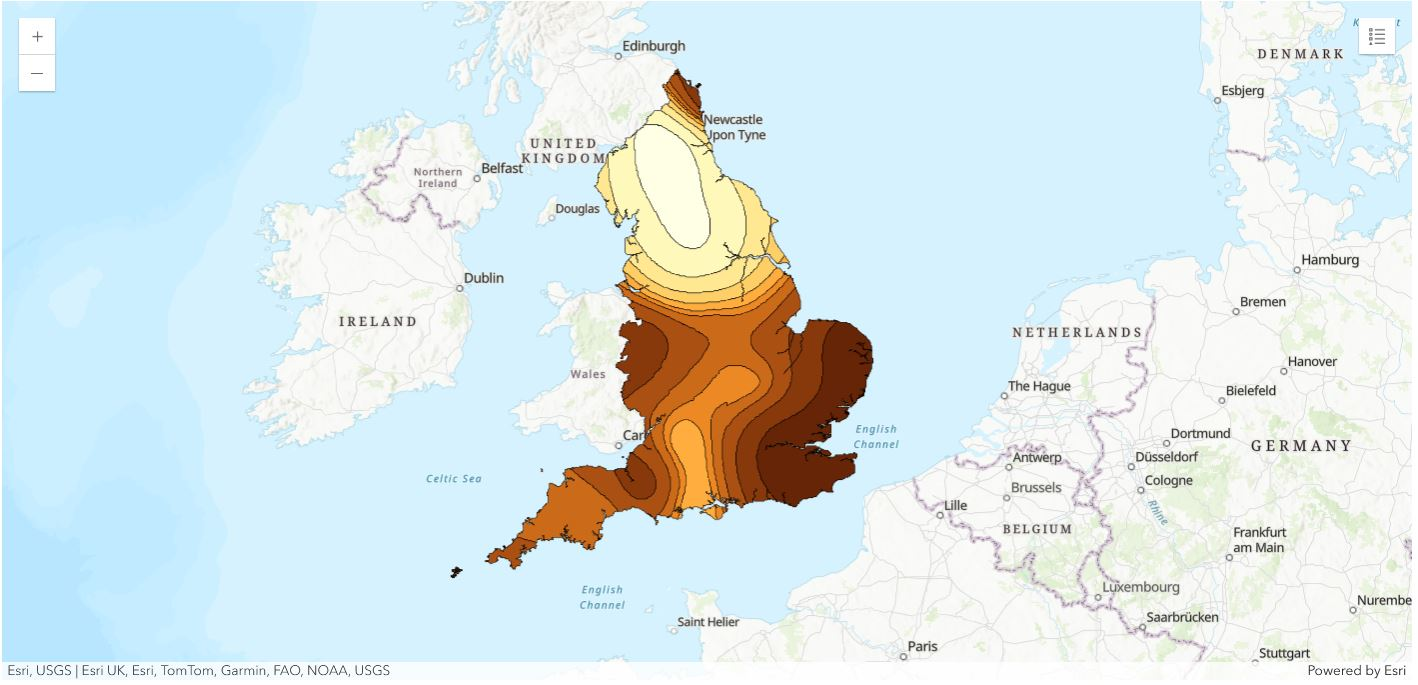

In [49]:
# Plot the interpolated temperature surface
eng_interpolated_temp = gis.map('England')
eng_interpolated_temp.basemap.basemap = 'topo-vector'
eng_interpolated_temp.content.add(oct1st_temp_surface)
eng_interpolated_temp

In [46]:
eng_interpolated_temp.zoom = 6
eng_interpolated_temp.legend.enabled = True

The interpolated forecast temperature surface above for England shows that temperature gradually increases from the northern to the southern part of the country, and ranges from a minimum of 9.5 degrees to a maximum of 17.43 degree Celsius respectively, with two distinct zones dividing the country. Lower temperatures are prevalent in the interior part of the country compared to the coastal belts, with London falling in the maximum temperature zone. This is expected since coastal regions are usually warmer than inland areas due to different climatic conditions.  

## Conclusion<a class="anchor" id="17"></a>

In this notebook, a timeseries temperature dataset was used to predict daily temperature for England for the month of October using historic data from 29 weather stations. Two methods were used for the study — first a deep learning framework of LSTM was used followed by a machine learning method of Support Vector Regression. Both the models were able to model the data relatively well as evident from the high accuracy obtained for both train and test set. However, the SVM model was consistently performing better than the LSTM model with higher accuracy. Some instances of low accuracy for both the models were caused for certain stations due to less training data points available. 

Similarly, interesting differences were observed while forecasting daily temperatures using the two models. Here the SVR model was able to capture the daily fluctuations in greater detail which looked more real compared to the forecast returned by the LSTM model, as observed from the forecast plots. Besides, the total run time for the SVR model for fitting the data was only  a few minutes and was far less than the time taken by the LSTM model, which was training for 100 epochs for each station. 

Finally, the sample shows how deep learning or machine learning models could be combined with spatial tools in ArcGIS to process timeseries data and produce meaningful results that could be valuable for various industry verticals. 

## Summary of methods used <a class="anchor" id="18"></a>

| Method | Question | Examples |
| -| - |-|
| interpolate_points| What is the value of any points located between other given points?  |Predicting temperature at any intermediate location based on measurement from surrounding station |


## Data resources <a class="anchor" id="19"></a>

| Shapefile | Source | Link |
| -| - |-|
| england_border| Counties and Unitary Authorities (December 2016) Full Clipped Boundaries in England and Wales  |https://data.gov.uk|
| england_weather_stations| Weather for 243 countries of the world  |https://rp5.ru/Weather_in_the_world|
| table(england historic weather data)| Weather for 243 countries of the world  |https://rp5.ru/Weather_in_the_world|   

| Articles | Source | Link |
| -| - |-|
| LONG SHORT-TERM MEMORY| Neural Computation 9(8):1735{1780, 1997  |http://www.bioinf.jku.at/publications/older/2604.pdf|
| Support Vector Regression Machines | Bell Labs and Monmouth University Department of Electronic Engineering |https://papers.nips.cc/paper/1238-support-vector-regression-machines.pdf|

